In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Presenting Signs of Burnout

In [3]:
data=pd.read_csv('train.csv')
data.head(2)

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200       9/30/2008  Female      Service   
1      fffe3700360033003500      11/30/2008    Male      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   

   Burn Rate  
0       0.16  
1       0.36

In [4]:
data.shape

(22750, 9)

## Data Understanding

In [5]:
data.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [6]:
data.dropna(subset=['Burn Rate'],inplace=True)

In [7]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

In [8]:
data.shape

(21626, 9)

In [9]:
data.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

#### Burn Rate

<AxesSubplot:xlabel='Burn Rate', ylabel='Count'>

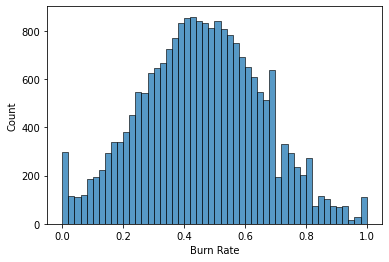

In [10]:
sns.histplot(data,x=data['Burn Rate'])

<AxesSubplot:xlabel='Burn Rate'>

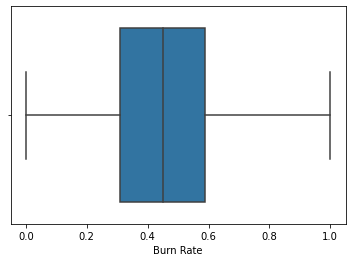

In [11]:
sns.boxplot(x=data['Burn Rate'])

In [12]:
data['Burn Rate']

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 21626, dtype: float64

In [13]:
data[(data['Resource Allocation'].notna()) | (data['Mental Fatigue Score'].notna())]

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200       9/30/2008  Female      Service   
1          fffe3700360033003500      11/30/2008    Male      Service   
2      fffe31003300320037003900       3/10/2008  Female      Product   
3      fffe32003400380032003900       11/3/2008    Male      Service   
4      fffe31003900340031003600       7/24/2008  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      12/30/2008  Female      Service   
22746  fffe33003000350031003800       1/19/2008  Female      Product   
22747          fffe390032003000       11/5/2008    Male      Service   
22748  fffe33003300320036003900       1/10/2008  Female      Service   
22749      fffe3400350031003800        1/6/2008    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1                     Yes            1                  2.0   
2                     Yes            2                  NaN   
3                     Yes            1                  1.0   
4                      No            3                  7.0   
...                   ...          ...                  ...   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[21439 rows x 9 columns]

In [14]:
data=data[(data['Resource Allocation'].notna()) | (data['Mental Fatigue Score'].notna())]

### Empoyee ID

<AxesSubplot:xlabel='Employee ID', ylabel='Burn Rate'>

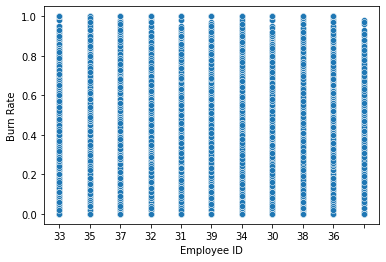

In [15]:
sns.scatterplot(data['Employee ID'].str.slice(16,18),data['Burn Rate'])
#no pattern hidden in employee ID

#### Gender

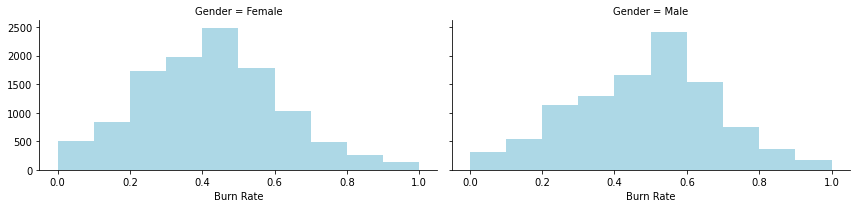

In [16]:
sns.FacetGrid(data,col='Gender',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=10)

#### Company Type

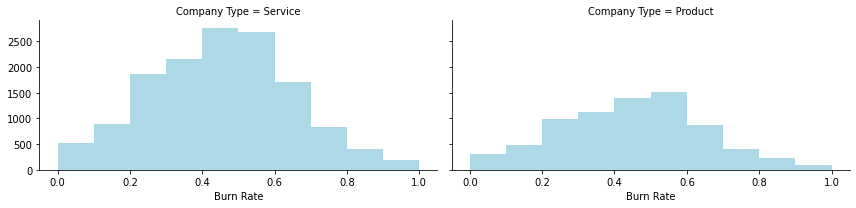

In [17]:
sns.FacetGrid(data,col='Company Type',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=10)

#### WFH Setup Available

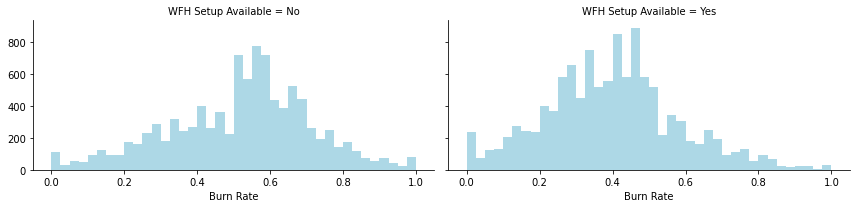

In [18]:
sns.FacetGrid(data,col='WFH Setup Available',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=40)

#### Date of Joining

In [19]:
data['Date of Joining'].nunique()

366

In [20]:
data['Date of Joining']=pd.to_datetime(data['Date of Joining'],format='%m/%d/%Y')

In [21]:
Day=data['Date of Joining'].map(lambda x:x.day)
Month=data['Date of Joining'].map(lambda x:x.month)
Year=data['Date of Joining'].map(lambda x:x.year)

In [22]:
Year.unique()
# All the data belong to 2008, therefore this feature is not useful

array([2008])

In [23]:
data.insert(1,'Day',Day)
data.insert(2,'Month',Month)
data.head(2)

Employee ID  Day  Month Date of Joining  Gender Company Type  \
0  fffe32003000360033003200   30      9      2008-09-30  Female      Service   
1      fffe3700360033003500   30     11      2008-11-30    Male      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   

   Burn Rate  
0       0.16  
1       0.36

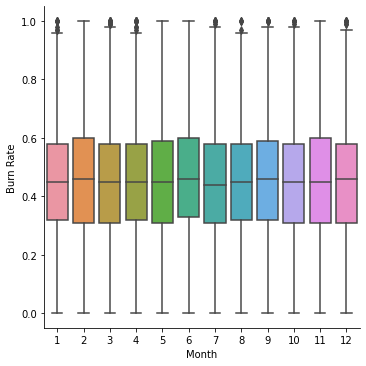

In [24]:
sns.catplot(data=data, x='Month', y='Burn Rate', kind='box')

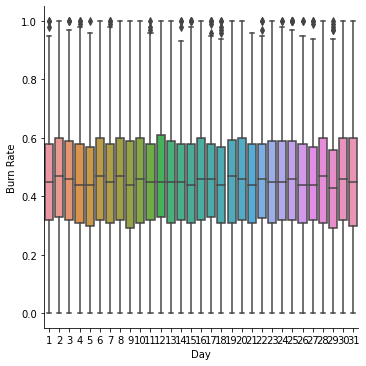

In [25]:
sns.catplot(data=data, x='Day', y='Burn Rate', kind='box')

#### Designation

In [26]:
data['Designation'].unique()

array([2, 1, 3, 0, 4, 5])

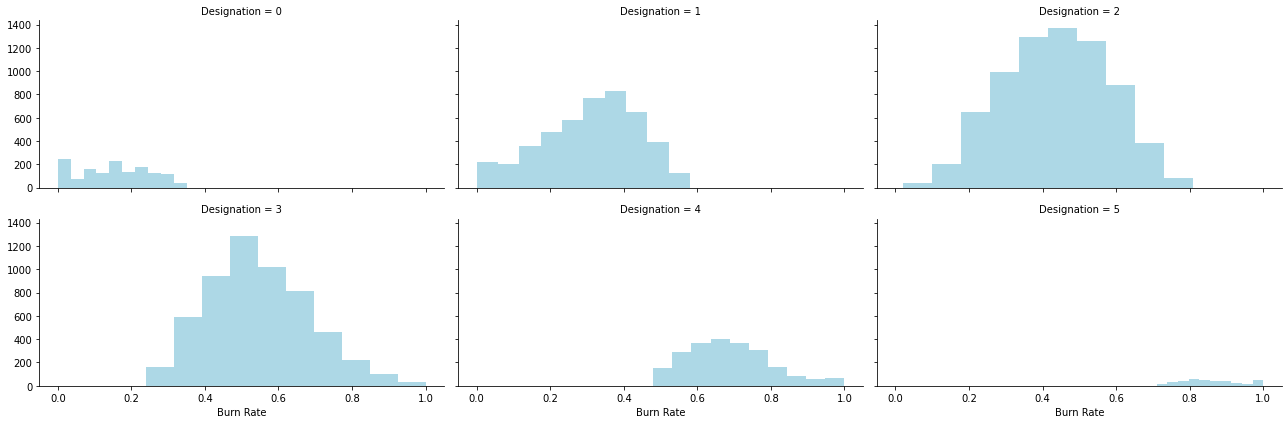

In [27]:
sns.FacetGrid(data,col='Designation',aspect=2,col_wrap=3).map(plt.hist,'Burn Rate',color='lightblue',bins=10)# Should consider as categorical,(will try as continous first though)

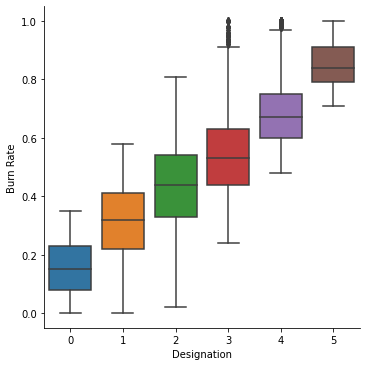

In [28]:
sns.catplot(data=data, x='Designation', y='Burn Rate', kind='box')
#looks like we found another jackpot, should use as categorical for sure

In [29]:
# data['Designation']=data['Designation'].astype(str)

#### Resource Allocation

In [30]:
data['Resource Allocation'].nunique()
# for nan 0 seems suitable number

10

<AxesSubplot:xlabel='Resource Allocation', ylabel='Count'>

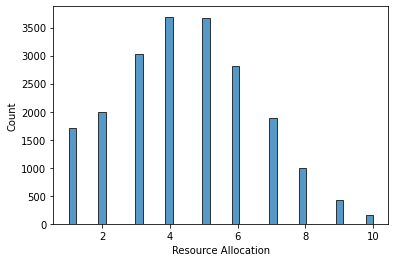

In [31]:
sns.histplot(x=data['Resource Allocation'])

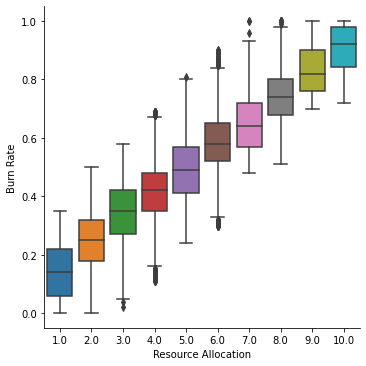

In [32]:
sns.catplot(data=data, x='Resource Allocation', y='Burn Rate', kind='box')
#should consider using as categorical Feature

In [33]:
# data['Resource Allocation'].fillna(5.0,inplace=True)
# data['Resource Allocation']=data['Resource Allocation'].astype(str)

#### Mental Fatigue Score

In [34]:
data['Mental Fatigue Score'].nunique()

101

<AxesSubplot:xlabel='Mental Fatigue Score', ylabel='Burn Rate'>

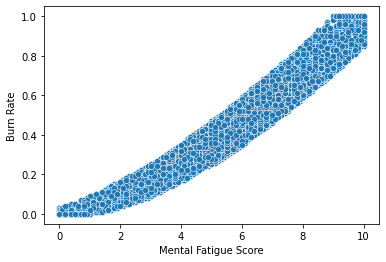

In [35]:
sns.scatterplot(x=data['Mental Fatigue Score'],y=data['Burn Rate'])
# seems like we found the jackpot

## Data Preparation

In [36]:
data.dtypes

Employee ID                     object
Day                              int64
Month                            int64
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [37]:
train=data.drop(['Employee ID','Date of Joining','Day','Month'],axis=1)
#train['Resource Allocation']=train['Resource Allocation'].astype(str)

In [38]:
train.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No            2                  3.0   
1    Male      Service                 Yes            1                  2.0   
2  Female      Product                 Yes            2                  NaN   
3    Male      Service                 Yes            1                  1.0   
4  Female      Service                  No            3                  7.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16  
1                   5.0       0.36  
2                   5.8       0.49  
3                   2.6       0.20  
4                   6.9       0.52

In [39]:
train=pd.get_dummies(train,drop_first=True)

In [40]:
cols=train.columns
cols

Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Gender_Male', 'Company Type_Service',
       'WFH Setup Available_Yes'],
      dtype='object')

##### Iterative imputation

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from catboost import CatBoostRegressor

In [42]:
imp=IterativeImputer(estimator=CatBoostRegressor(),random_state=200)

In [43]:
temp=imp.fit_transform(train)

Learning rate set to 0.067353
0:	learn: 1.0828783	total: 49.9ms	remaining: 49.9s
1:	learn: 1.0337166	total: 51.9ms	remaining: 25.9s
2:	learn: 0.9882430	total: 54.1ms	remaining: 18s
3:	learn: 0.9466572	total: 56.3ms	remaining: 14s
4:	learn: 0.9094074	total: 58.4ms	remaining: 11.6s
5:	learn: 0.8758030	total: 60.6ms	remaining: 10s
6:	learn: 0.8454401	total: 62.7ms	remaining: 8.9s
7:	learn: 0.8171211	total: 64.9ms	remaining: 8.05s
8:	learn: 0.7916882	total: 67ms	remaining: 7.38s
9:	learn: 0.7674205	total: 69.3ms	remaining: 6.86s
10:	learn: 0.7461914	total: 71.3ms	remaining: 6.41s
11:	learn: 0.7266863	total: 73.4ms	remaining: 6.04s
12:	learn: 0.7100506	total: 75.4ms	remaining: 5.72s
13:	learn: 0.6951200	total: 77.3ms	remaining: 5.45s
14:	learn: 0.6810284	total: 79ms	remaining: 5.19s
15:	learn: 0.6691596	total: 80.7ms	remaining: 4.96s
16:	learn: 0.6581749	total: 82.3ms	remaining: 4.76s
17:	learn: 0.6477388	total: 84ms	remaining: 4.58s
18:	learn: 0.6388651	total: 85.5ms	remaining: 4.41s
19:	l

187:	learn: 0.5329187	total: 385ms	remaining: 1.66s
188:	learn: 0.5328400	total: 387ms	remaining: 1.66s
189:	learn: 0.5327478	total: 393ms	remaining: 1.68s
190:	learn: 0.5326843	total: 395ms	remaining: 1.67s
191:	learn: 0.5326336	total: 396ms	remaining: 1.67s
192:	learn: 0.5325820	total: 398ms	remaining: 1.66s
193:	learn: 0.5325461	total: 400ms	remaining: 1.66s
194:	learn: 0.5324860	total: 401ms	remaining: 1.66s
195:	learn: 0.5324515	total: 403ms	remaining: 1.65s
196:	learn: 0.5324100	total: 405ms	remaining: 1.65s
197:	learn: 0.5323378	total: 407ms	remaining: 1.65s
198:	learn: 0.5322933	total: 409ms	remaining: 1.64s
199:	learn: 0.5322273	total: 410ms	remaining: 1.64s
200:	learn: 0.5321861	total: 412ms	remaining: 1.64s
201:	learn: 0.5321555	total: 414ms	remaining: 1.63s
202:	learn: 0.5321040	total: 415ms	remaining: 1.63s
203:	learn: 0.5320336	total: 417ms	remaining: 1.63s
204:	learn: 0.5319619	total: 419ms	remaining: 1.62s
205:	learn: 0.5318989	total: 421ms	remaining: 1.62s
206:	learn: 

400:	learn: 0.5241204	total: 775ms	remaining: 1.16s
401:	learn: 0.5240693	total: 777ms	remaining: 1.16s
402:	learn: 0.5240531	total: 779ms	remaining: 1.15s
403:	learn: 0.5240310	total: 780ms	remaining: 1.15s
404:	learn: 0.5240150	total: 782ms	remaining: 1.15s
405:	learn: 0.5239847	total: 784ms	remaining: 1.15s
406:	learn: 0.5239451	total: 786ms	remaining: 1.15s
407:	learn: 0.5239137	total: 788ms	remaining: 1.14s
408:	learn: 0.5238891	total: 790ms	remaining: 1.14s
409:	learn: 0.5238387	total: 792ms	remaining: 1.14s
410:	learn: 0.5238128	total: 793ms	remaining: 1.14s
411:	learn: 0.5237865	total: 795ms	remaining: 1.13s
412:	learn: 0.5237611	total: 797ms	remaining: 1.13s
413:	learn: 0.5237376	total: 799ms	remaining: 1.13s
414:	learn: 0.5237028	total: 801ms	remaining: 1.13s
415:	learn: 0.5236532	total: 803ms	remaining: 1.13s
416:	learn: 0.5236137	total: 805ms	remaining: 1.13s
417:	learn: 0.5235713	total: 807ms	remaining: 1.12s
418:	learn: 0.5235293	total: 809ms	remaining: 1.12s
419:	learn: 

618:	learn: 0.5177057	total: 1.16s	remaining: 716ms
619:	learn: 0.5176793	total: 1.16s	remaining: 714ms
620:	learn: 0.5176684	total: 1.17s	remaining: 712ms
621:	learn: 0.5176584	total: 1.17s	remaining: 710ms
622:	learn: 0.5176344	total: 1.17s	remaining: 708ms
623:	learn: 0.5175923	total: 1.17s	remaining: 706ms
624:	learn: 0.5175683	total: 1.17s	remaining: 704ms
625:	learn: 0.5175505	total: 1.18s	remaining: 702ms
626:	learn: 0.5175132	total: 1.18s	remaining: 700ms
627:	learn: 0.5174879	total: 1.18s	remaining: 698ms
628:	learn: 0.5174503	total: 1.18s	remaining: 696ms
629:	learn: 0.5174096	total: 1.18s	remaining: 694ms
630:	learn: 0.5173748	total: 1.18s	remaining: 692ms
631:	learn: 0.5173395	total: 1.19s	remaining: 691ms
632:	learn: 0.5173290	total: 1.19s	remaining: 689ms
633:	learn: 0.5173138	total: 1.19s	remaining: 687ms
634:	learn: 0.5172980	total: 1.19s	remaining: 685ms
635:	learn: 0.5172780	total: 1.19s	remaining: 683ms
636:	learn: 0.5172388	total: 1.2s	remaining: 681ms
637:	learn: 0

831:	learn: 0.5124335	total: 1.55s	remaining: 313ms
832:	learn: 0.5124094	total: 1.55s	remaining: 311ms
833:	learn: 0.5123836	total: 1.55s	remaining: 309ms
834:	learn: 0.5123465	total: 1.55s	remaining: 307ms
835:	learn: 0.5123112	total: 1.56s	remaining: 305ms
836:	learn: 0.5122877	total: 1.56s	remaining: 303ms
837:	learn: 0.5122313	total: 1.56s	remaining: 302ms
838:	learn: 0.5122074	total: 1.56s	remaining: 300ms
839:	learn: 0.5121911	total: 1.56s	remaining: 298ms
840:	learn: 0.5121584	total: 1.56s	remaining: 296ms
841:	learn: 0.5121469	total: 1.57s	remaining: 294ms
842:	learn: 0.5121083	total: 1.57s	remaining: 292ms
843:	learn: 0.5120860	total: 1.57s	remaining: 290ms
844:	learn: 0.5120600	total: 1.57s	remaining: 288ms
845:	learn: 0.5120487	total: 1.57s	remaining: 286ms
846:	learn: 0.5120410	total: 1.57s	remaining: 285ms
847:	learn: 0.5120284	total: 1.58s	remaining: 283ms
848:	learn: 0.5119950	total: 1.58s	remaining: 281ms
849:	learn: 0.5119871	total: 1.58s	remaining: 279ms
850:	learn: 

18:	learn: 0.0864698	total: 35.9ms	remaining: 1.85s
19:	learn: 0.0841001	total: 38.2ms	remaining: 1.87s
20:	learn: 0.0820086	total: 40.1ms	remaining: 1.87s
21:	learn: 0.0800281	total: 41.9ms	remaining: 1.86s
22:	learn: 0.0782961	total: 43.7ms	remaining: 1.86s
23:	learn: 0.0767022	total: 45.6ms	remaining: 1.85s
24:	learn: 0.0752730	total: 47.4ms	remaining: 1.85s
25:	learn: 0.0740247	total: 49.3ms	remaining: 1.85s
26:	learn: 0.0728498	total: 51.1ms	remaining: 1.84s
27:	learn: 0.0717912	total: 52.9ms	remaining: 1.84s
28:	learn: 0.0708269	total: 54.7ms	remaining: 1.83s
29:	learn: 0.0699875	total: 56.5ms	remaining: 1.83s
30:	learn: 0.0692210	total: 58.2ms	remaining: 1.82s
31:	learn: 0.0685091	total: 60.1ms	remaining: 1.82s
32:	learn: 0.0676263	total: 62.1ms	remaining: 1.82s
33:	learn: 0.0668186	total: 63.8ms	remaining: 1.81s
34:	learn: 0.0662945	total: 65.6ms	remaining: 1.81s
35:	learn: 0.0658260	total: 67.3ms	remaining: 1.8s
36:	learn: 0.0653889	total: 69ms	remaining: 1.8s
37:	learn: 0.065

237:	learn: 0.0573145	total: 423ms	remaining: 1.35s
238:	learn: 0.0573060	total: 425ms	remaining: 1.35s
239:	learn: 0.0572985	total: 427ms	remaining: 1.35s
240:	learn: 0.0572945	total: 428ms	remaining: 1.35s
241:	learn: 0.0572899	total: 430ms	remaining: 1.35s
242:	learn: 0.0572864	total: 432ms	remaining: 1.34s
243:	learn: 0.0572817	total: 434ms	remaining: 1.34s
244:	learn: 0.0572726	total: 435ms	remaining: 1.34s
245:	learn: 0.0572681	total: 437ms	remaining: 1.34s
246:	learn: 0.0572659	total: 439ms	remaining: 1.34s
247:	learn: 0.0572587	total: 441ms	remaining: 1.33s
248:	learn: 0.0572551	total: 442ms	remaining: 1.33s
249:	learn: 0.0572463	total: 444ms	remaining: 1.33s
250:	learn: 0.0572433	total: 446ms	remaining: 1.33s
251:	learn: 0.0572382	total: 448ms	remaining: 1.33s
252:	learn: 0.0572328	total: 449ms	remaining: 1.33s
253:	learn: 0.0572253	total: 451ms	remaining: 1.32s
254:	learn: 0.0572197	total: 453ms	remaining: 1.32s
255:	learn: 0.0572136	total: 455ms	remaining: 1.32s
256:	learn: 

455:	learn: 0.0565050	total: 811ms	remaining: 967ms
456:	learn: 0.0565029	total: 813ms	remaining: 966ms
457:	learn: 0.0564972	total: 815ms	remaining: 964ms
458:	learn: 0.0564939	total: 817ms	remaining: 962ms
459:	learn: 0.0564918	total: 818ms	remaining: 961ms
460:	learn: 0.0564892	total: 820ms	remaining: 959ms
461:	learn: 0.0564822	total: 822ms	remaining: 957ms
462:	learn: 0.0564809	total: 824ms	remaining: 956ms
463:	learn: 0.0564779	total: 826ms	remaining: 954ms
464:	learn: 0.0564755	total: 828ms	remaining: 953ms
465:	learn: 0.0564744	total: 830ms	remaining: 951ms
466:	learn: 0.0564723	total: 831ms	remaining: 949ms
467:	learn: 0.0564719	total: 833ms	remaining: 947ms
468:	learn: 0.0564703	total: 835ms	remaining: 945ms
469:	learn: 0.0564675	total: 837ms	remaining: 944ms
470:	learn: 0.0564663	total: 838ms	remaining: 942ms
471:	learn: 0.0564619	total: 840ms	remaining: 940ms
472:	learn: 0.0564598	total: 842ms	remaining: 938ms
473:	learn: 0.0564580	total: 844ms	remaining: 936ms
474:	learn: 

673:	learn: 0.0560739	total: 1.2s	remaining: 580ms
674:	learn: 0.0560714	total: 1.2s	remaining: 578ms
675:	learn: 0.0560701	total: 1.2s	remaining: 576ms
676:	learn: 0.0560687	total: 1.2s	remaining: 575ms
677:	learn: 0.0560680	total: 1.21s	remaining: 573ms
678:	learn: 0.0560658	total: 1.21s	remaining: 571ms
679:	learn: 0.0560624	total: 1.21s	remaining: 570ms
680:	learn: 0.0560607	total: 1.21s	remaining: 568ms
681:	learn: 0.0560586	total: 1.21s	remaining: 566ms
682:	learn: 0.0560554	total: 1.22s	remaining: 564ms
683:	learn: 0.0560540	total: 1.22s	remaining: 563ms
684:	learn: 0.0560532	total: 1.22s	remaining: 561ms
685:	learn: 0.0560525	total: 1.22s	remaining: 559ms
686:	learn: 0.0560513	total: 1.22s	remaining: 557ms
687:	learn: 0.0560486	total: 1.22s	remaining: 555ms
688:	learn: 0.0560469	total: 1.23s	remaining: 554ms
689:	learn: 0.0560454	total: 1.23s	remaining: 552ms
690:	learn: 0.0560442	total: 1.23s	remaining: 550ms
691:	learn: 0.0560426	total: 1.23s	remaining: 548ms
692:	learn: 0.05

890:	learn: 0.0557408	total: 1.59s	remaining: 194ms
891:	learn: 0.0557399	total: 1.59s	remaining: 192ms
892:	learn: 0.0557381	total: 1.59s	remaining: 191ms
893:	learn: 0.0557365	total: 1.59s	remaining: 189ms
894:	learn: 0.0557348	total: 1.59s	remaining: 187ms
895:	learn: 0.0557338	total: 1.6s	remaining: 185ms
896:	learn: 0.0557325	total: 1.6s	remaining: 184ms
897:	learn: 0.0557318	total: 1.6s	remaining: 182ms
898:	learn: 0.0557312	total: 1.6s	remaining: 180ms
899:	learn: 0.0557296	total: 1.6s	remaining: 178ms
900:	learn: 0.0557294	total: 1.6s	remaining: 176ms
901:	learn: 0.0557289	total: 1.61s	remaining: 175ms
902:	learn: 0.0557286	total: 1.61s	remaining: 173ms
903:	learn: 0.0557280	total: 1.61s	remaining: 171ms
904:	learn: 0.0557258	total: 1.61s	remaining: 169ms
905:	learn: 0.0557221	total: 1.61s	remaining: 167ms
906:	learn: 0.0557194	total: 1.61s	remaining: 166ms
907:	learn: 0.0557187	total: 1.62s	remaining: 164ms
908:	learn: 0.0557169	total: 1.62s	remaining: 162ms
909:	learn: 0.0557

78:	learn: 0.4877290	total: 136ms	remaining: 1.58s
79:	learn: 0.4876928	total: 138ms	remaining: 1.59s
80:	learn: 0.4876477	total: 140ms	remaining: 1.59s
81:	learn: 0.4876320	total: 142ms	remaining: 1.58s
82:	learn: 0.4876202	total: 143ms	remaining: 1.58s
83:	learn: 0.4875800	total: 145ms	remaining: 1.58s
84:	learn: 0.4875291	total: 147ms	remaining: 1.58s
85:	learn: 0.4875110	total: 149ms	remaining: 1.58s
86:	learn: 0.4874796	total: 150ms	remaining: 1.58s
87:	learn: 0.4874393	total: 152ms	remaining: 1.58s
88:	learn: 0.4874289	total: 154ms	remaining: 1.57s
89:	learn: 0.4873914	total: 156ms	remaining: 1.57s
90:	learn: 0.4873674	total: 157ms	remaining: 1.57s
91:	learn: 0.4873296	total: 159ms	remaining: 1.57s
92:	learn: 0.4872949	total: 161ms	remaining: 1.57s
93:	learn: 0.4872590	total: 163ms	remaining: 1.57s
94:	learn: 0.4872472	total: 165ms	remaining: 1.57s
95:	learn: 0.4872288	total: 166ms	remaining: 1.56s
96:	learn: 0.4872116	total: 168ms	remaining: 1.56s
97:	learn: 0.4871991	total: 170

295:	learn: 0.4801341	total: 523ms	remaining: 1.24s
296:	learn: 0.4800971	total: 526ms	remaining: 1.24s
297:	learn: 0.4800804	total: 527ms	remaining: 1.24s
298:	learn: 0.4800278	total: 529ms	remaining: 1.24s
299:	learn: 0.4799674	total: 531ms	remaining: 1.24s
300:	learn: 0.4799301	total: 533ms	remaining: 1.24s
301:	learn: 0.4798962	total: 534ms	remaining: 1.24s
302:	learn: 0.4798664	total: 536ms	remaining: 1.23s
303:	learn: 0.4798458	total: 538ms	remaining: 1.23s
304:	learn: 0.4798336	total: 540ms	remaining: 1.23s
305:	learn: 0.4798167	total: 541ms	remaining: 1.23s
306:	learn: 0.4797882	total: 543ms	remaining: 1.23s
307:	learn: 0.4797588	total: 545ms	remaining: 1.22s
308:	learn: 0.4797279	total: 546ms	remaining: 1.22s
309:	learn: 0.4797146	total: 548ms	remaining: 1.22s
310:	learn: 0.4797015	total: 550ms	remaining: 1.22s
311:	learn: 0.4796755	total: 552ms	remaining: 1.22s
312:	learn: 0.4796351	total: 553ms	remaining: 1.21s
313:	learn: 0.4796001	total: 555ms	remaining: 1.21s
314:	learn: 

517:	learn: 0.4742029	total: 912ms	remaining: 849ms
518:	learn: 0.4741816	total: 914ms	remaining: 847ms
519:	learn: 0.4741573	total: 916ms	remaining: 845ms
520:	learn: 0.4741392	total: 918ms	remaining: 844ms
521:	learn: 0.4741062	total: 919ms	remaining: 842ms
522:	learn: 0.4740654	total: 921ms	remaining: 840ms
523:	learn: 0.4740314	total: 923ms	remaining: 838ms
524:	learn: 0.4739867	total: 925ms	remaining: 836ms
525:	learn: 0.4739690	total: 926ms	remaining: 835ms
526:	learn: 0.4739329	total: 928ms	remaining: 833ms
527:	learn: 0.4739125	total: 930ms	remaining: 831ms
528:	learn: 0.4738746	total: 931ms	remaining: 829ms
529:	learn: 0.4738395	total: 933ms	remaining: 828ms
530:	learn: 0.4738193	total: 935ms	remaining: 826ms
531:	learn: 0.4738055	total: 937ms	remaining: 824ms
532:	learn: 0.4737851	total: 938ms	remaining: 822ms
533:	learn: 0.4737591	total: 940ms	remaining: 820ms
534:	learn: 0.4737351	total: 942ms	remaining: 819ms
535:	learn: 0.4737119	total: 944ms	remaining: 817ms
536:	learn: 

737:	learn: 0.4692902	total: 1.3s	remaining: 461ms
738:	learn: 0.4692753	total: 1.3s	remaining: 459ms
739:	learn: 0.4692589	total: 1.3s	remaining: 458ms
740:	learn: 0.4692432	total: 1.3s	remaining: 456ms
741:	learn: 0.4692117	total: 1.3s	remaining: 454ms
742:	learn: 0.4691986	total: 1.31s	remaining: 452ms
743:	learn: 0.4691896	total: 1.31s	remaining: 450ms
744:	learn: 0.4691761	total: 1.31s	remaining: 449ms
745:	learn: 0.4691632	total: 1.31s	remaining: 447ms
746:	learn: 0.4691504	total: 1.31s	remaining: 445ms
747:	learn: 0.4691383	total: 1.31s	remaining: 443ms
748:	learn: 0.4690905	total: 1.32s	remaining: 441ms
749:	learn: 0.4690606	total: 1.32s	remaining: 440ms
750:	learn: 0.4690418	total: 1.32s	remaining: 438ms
751:	learn: 0.4690317	total: 1.32s	remaining: 436ms
752:	learn: 0.4690021	total: 1.32s	remaining: 434ms
753:	learn: 0.4689918	total: 1.33s	remaining: 433ms
754:	learn: 0.4689728	total: 1.33s	remaining: 431ms
755:	learn: 0.4689607	total: 1.33s	remaining: 429ms
756:	learn: 0.468

959:	learn: 0.4652803	total: 1.69s	remaining: 70.3ms
960:	learn: 0.4652611	total: 1.69s	remaining: 68.5ms
961:	learn: 0.4652369	total: 1.69s	remaining: 66.8ms
962:	learn: 0.4652199	total: 1.69s	remaining: 65ms
963:	learn: 0.4652079	total: 1.69s	remaining: 63.3ms
964:	learn: 0.4652019	total: 1.7s	remaining: 61.5ms
965:	learn: 0.4651883	total: 1.7s	remaining: 59.8ms
966:	learn: 0.4651632	total: 1.7s	remaining: 58ms
967:	learn: 0.4651277	total: 1.7s	remaining: 56.3ms
968:	learn: 0.4651043	total: 1.7s	remaining: 54.5ms
969:	learn: 0.4650752	total: 1.71s	remaining: 52.7ms
970:	learn: 0.4650666	total: 1.71s	remaining: 51ms
971:	learn: 0.4650633	total: 1.71s	remaining: 49.2ms
972:	learn: 0.4650517	total: 1.71s	remaining: 47.5ms
973:	learn: 0.4650410	total: 1.71s	remaining: 45.7ms
974:	learn: 0.4650230	total: 1.71s	remaining: 43.9ms
975:	learn: 0.4650013	total: 1.72s	remaining: 42.2ms
976:	learn: 0.4649703	total: 1.72s	remaining: 40.4ms
977:	learn: 0.4649621	total: 1.72s	remaining: 38.7ms
978:

138:	learn: 0.4719277	total: 259ms	remaining: 1.61s
139:	learn: 0.4719065	total: 262ms	remaining: 1.61s
140:	learn: 0.4718559	total: 263ms	remaining: 1.6s
141:	learn: 0.4718301	total: 265ms	remaining: 1.6s
142:	learn: 0.4718049	total: 267ms	remaining: 1.6s
143:	learn: 0.4717873	total: 269ms	remaining: 1.6s
144:	learn: 0.4717576	total: 271ms	remaining: 1.6s
145:	learn: 0.4717376	total: 272ms	remaining: 1.59s
146:	learn: 0.4717149	total: 274ms	remaining: 1.59s
147:	learn: 0.4716818	total: 276ms	remaining: 1.59s
148:	learn: 0.4716398	total: 278ms	remaining: 1.59s
149:	learn: 0.4716133	total: 279ms	remaining: 1.58s
150:	learn: 0.4715787	total: 281ms	remaining: 1.58s
151:	learn: 0.4715627	total: 283ms	remaining: 1.58s
152:	learn: 0.4715481	total: 285ms	remaining: 1.57s
153:	learn: 0.4715017	total: 287ms	remaining: 1.57s
154:	learn: 0.4714646	total: 288ms	remaining: 1.57s
155:	learn: 0.4714356	total: 290ms	remaining: 1.57s
156:	learn: 0.4714123	total: 292ms	remaining: 1.57s
157:	learn: 0.471

304:	learn: 0.4663361	total: 641ms	remaining: 1.46s
305:	learn: 0.4663206	total: 642ms	remaining: 1.46s
306:	learn: 0.4662955	total: 645ms	remaining: 1.45s
307:	learn: 0.4662745	total: 646ms	remaining: 1.45s
308:	learn: 0.4662474	total: 648ms	remaining: 1.45s
309:	learn: 0.4662234	total: 650ms	remaining: 1.45s
310:	learn: 0.4661958	total: 652ms	remaining: 1.44s
311:	learn: 0.4661702	total: 654ms	remaining: 1.44s
312:	learn: 0.4661435	total: 655ms	remaining: 1.44s
313:	learn: 0.4661171	total: 657ms	remaining: 1.44s
314:	learn: 0.4660958	total: 659ms	remaining: 1.43s
315:	learn: 0.4660498	total: 661ms	remaining: 1.43s
316:	learn: 0.4660338	total: 662ms	remaining: 1.43s
317:	learn: 0.4659826	total: 664ms	remaining: 1.42s
318:	learn: 0.4659390	total: 666ms	remaining: 1.42s
319:	learn: 0.4659137	total: 668ms	remaining: 1.42s
320:	learn: 0.4658972	total: 669ms	remaining: 1.42s
321:	learn: 0.4658632	total: 671ms	remaining: 1.41s
322:	learn: 0.4658367	total: 673ms	remaining: 1.41s
323:	learn: 

502:	learn: 0.4610351	total: 1.03s	remaining: 1.01s
503:	learn: 0.4609933	total: 1.03s	remaining: 1.01s
504:	learn: 0.4609783	total: 1.03s	remaining: 1.01s
505:	learn: 0.4609715	total: 1.03s	remaining: 1.01s
506:	learn: 0.4609604	total: 1.03s	remaining: 1s
507:	learn: 0.4609436	total: 1.03s	remaining: 1s
508:	learn: 0.4609339	total: 1.04s	remaining: 1s
509:	learn: 0.4609091	total: 1.04s	remaining: 998ms
510:	learn: 0.4608952	total: 1.04s	remaining: 996ms
511:	learn: 0.4608846	total: 1.04s	remaining: 994ms
512:	learn: 0.4608674	total: 1.04s	remaining: 991ms
513:	learn: 0.4608397	total: 1.05s	remaining: 989ms
514:	learn: 0.4608248	total: 1.05s	remaining: 987ms
515:	learn: 0.4608078	total: 1.05s	remaining: 985ms
516:	learn: 0.4607991	total: 1.05s	remaining: 982ms
517:	learn: 0.4607869	total: 1.05s	remaining: 980ms
518:	learn: 0.4607635	total: 1.05s	remaining: 978ms
519:	learn: 0.4607453	total: 1.06s	remaining: 975ms
520:	learn: 0.4607165	total: 1.06s	remaining: 973ms
521:	learn: 0.4606942

696:	learn: 0.4566233	total: 1.41s	remaining: 614ms
697:	learn: 0.4565775	total: 1.41s	remaining: 612ms
698:	learn: 0.4565493	total: 1.42s	remaining: 610ms
699:	learn: 0.4565357	total: 1.42s	remaining: 608ms
700:	learn: 0.4564982	total: 1.42s	remaining: 606ms
701:	learn: 0.4564862	total: 1.42s	remaining: 604ms
702:	learn: 0.4564714	total: 1.42s	remaining: 602ms
703:	learn: 0.4564607	total: 1.43s	remaining: 600ms
704:	learn: 0.4564287	total: 1.43s	remaining: 598ms
705:	learn: 0.4563895	total: 1.43s	remaining: 596ms
706:	learn: 0.4563742	total: 1.43s	remaining: 594ms
707:	learn: 0.4563530	total: 1.43s	remaining: 591ms
708:	learn: 0.4563267	total: 1.44s	remaining: 589ms
709:	learn: 0.4562980	total: 1.44s	remaining: 587ms
710:	learn: 0.4562833	total: 1.44s	remaining: 585ms
711:	learn: 0.4562648	total: 1.44s	remaining: 583ms
712:	learn: 0.4562425	total: 1.44s	remaining: 581ms
713:	learn: 0.4562159	total: 1.45s	remaining: 579ms
714:	learn: 0.4561959	total: 1.45s	remaining: 577ms
715:	learn: 

928:	learn: 0.4519831	total: 1.99s	remaining: 152ms
929:	learn: 0.4519772	total: 1.99s	remaining: 150ms
930:	learn: 0.4519700	total: 1.99s	remaining: 148ms
931:	learn: 0.4519447	total: 2s	remaining: 146ms
932:	learn: 0.4519260	total: 2s	remaining: 143ms
933:	learn: 0.4519085	total: 2s	remaining: 141ms
934:	learn: 0.4518988	total: 2s	remaining: 139ms
935:	learn: 0.4518763	total: 2s	remaining: 137ms
936:	learn: 0.4518505	total: 2.01s	remaining: 135ms
937:	learn: 0.4518260	total: 2.01s	remaining: 133ms
938:	learn: 0.4517926	total: 2.01s	remaining: 131ms
939:	learn: 0.4517560	total: 2.01s	remaining: 128ms
940:	learn: 0.4517401	total: 2.01s	remaining: 126ms
941:	learn: 0.4517237	total: 2.02s	remaining: 124ms
942:	learn: 0.4516922	total: 2.02s	remaining: 122ms
943:	learn: 0.4516755	total: 2.02s	remaining: 120ms
944:	learn: 0.4516656	total: 2.02s	remaining: 118ms
945:	learn: 0.4516571	total: 2.02s	remaining: 115ms
946:	learn: 0.4516315	total: 2.02s	remaining: 113ms
947:	learn: 0.4516052	total

153:	learn: 0.4552416	total: 382ms	remaining: 2.1s
154:	learn: 0.4552049	total: 384ms	remaining: 2.09s
155:	learn: 0.4551612	total: 386ms	remaining: 2.09s
156:	learn: 0.4551163	total: 388ms	remaining: 2.08s
157:	learn: 0.4550844	total: 391ms	remaining: 2.08s
158:	learn: 0.4550454	total: 393ms	remaining: 2.08s
159:	learn: 0.4550333	total: 396ms	remaining: 2.08s
160:	learn: 0.4549981	total: 398ms	remaining: 2.08s
161:	learn: 0.4549838	total: 400ms	remaining: 2.07s
162:	learn: 0.4549407	total: 402ms	remaining: 2.06s
163:	learn: 0.4549026	total: 404ms	remaining: 2.06s
164:	learn: 0.4548567	total: 407ms	remaining: 2.06s
165:	learn: 0.4548050	total: 409ms	remaining: 2.05s
166:	learn: 0.4547689	total: 411ms	remaining: 2.05s
167:	learn: 0.4547269	total: 413ms	remaining: 2.04s
168:	learn: 0.4547070	total: 415ms	remaining: 2.04s
169:	learn: 0.4546444	total: 417ms	remaining: 2.04s
170:	learn: 0.4546205	total: 419ms	remaining: 2.03s
171:	learn: 0.4545738	total: 421ms	remaining: 2.03s
172:	learn: 0

406:	learn: 0.4471664	total: 965ms	remaining: 1.41s
407:	learn: 0.4471409	total: 967ms	remaining: 1.4s
408:	learn: 0.4471215	total: 970ms	remaining: 1.4s
409:	learn: 0.4470817	total: 974ms	remaining: 1.4s
410:	learn: 0.4470396	total: 977ms	remaining: 1.4s
411:	learn: 0.4470191	total: 979ms	remaining: 1.4s
412:	learn: 0.4470019	total: 981ms	remaining: 1.39s
413:	learn: 0.4469790	total: 983ms	remaining: 1.39s
414:	learn: 0.4469591	total: 986ms	remaining: 1.39s
415:	learn: 0.4469320	total: 989ms	remaining: 1.39s
416:	learn: 0.4468871	total: 992ms	remaining: 1.39s
417:	learn: 0.4468423	total: 994ms	remaining: 1.38s
418:	learn: 0.4468253	total: 996ms	remaining: 1.38s
419:	learn: 0.4467920	total: 999ms	remaining: 1.38s
420:	learn: 0.4467764	total: 1s	remaining: 1.38s
421:	learn: 0.4467594	total: 1s	remaining: 1.38s
422:	learn: 0.4467454	total: 1.01s	remaining: 1.37s
423:	learn: 0.4467204	total: 1.01s	remaining: 1.37s
424:	learn: 0.4466995	total: 1.01s	remaining: 1.37s
425:	learn: 0.4466828	t

584:	learn: 0.4427158	total: 1.34s	remaining: 955ms
585:	learn: 0.4427046	total: 1.35s	remaining: 952ms
586:	learn: 0.4426787	total: 1.35s	remaining: 950ms
587:	learn: 0.4426677	total: 1.35s	remaining: 947ms
588:	learn: 0.4426162	total: 1.35s	remaining: 944ms
589:	learn: 0.4425981	total: 1.35s	remaining: 942ms
590:	learn: 0.4425804	total: 1.36s	remaining: 939ms
591:	learn: 0.4425507	total: 1.36s	remaining: 936ms
592:	learn: 0.4425137	total: 1.36s	remaining: 934ms
593:	learn: 0.4424937	total: 1.36s	remaining: 931ms
594:	learn: 0.4424564	total: 1.36s	remaining: 929ms
595:	learn: 0.4424393	total: 1.36s	remaining: 926ms
596:	learn: 0.4424099	total: 1.37s	remaining: 923ms
597:	learn: 0.4424031	total: 1.37s	remaining: 921ms
598:	learn: 0.4423880	total: 1.37s	remaining: 918ms
599:	learn: 0.4423673	total: 1.37s	remaining: 915ms
600:	learn: 0.4423387	total: 1.37s	remaining: 913ms
601:	learn: 0.4423215	total: 1.38s	remaining: 910ms
602:	learn: 0.4422824	total: 1.38s	remaining: 907ms
603:	learn: 

784:	learn: 0.4383647	total: 1.73s	remaining: 474ms
785:	learn: 0.4383532	total: 1.73s	remaining: 472ms
786:	learn: 0.4383243	total: 1.74s	remaining: 470ms
787:	learn: 0.4382974	total: 1.74s	remaining: 468ms
788:	learn: 0.4382708	total: 1.74s	remaining: 465ms
789:	learn: 0.4382520	total: 1.74s	remaining: 463ms
790:	learn: 0.4382222	total: 1.74s	remaining: 461ms
791:	learn: 0.4382169	total: 1.75s	remaining: 458ms
792:	learn: 0.4381957	total: 1.75s	remaining: 456ms
793:	learn: 0.4381866	total: 1.75s	remaining: 454ms
794:	learn: 0.4381617	total: 1.75s	remaining: 451ms
795:	learn: 0.4381525	total: 1.75s	remaining: 449ms
796:	learn: 0.4381441	total: 1.75s	remaining: 447ms
797:	learn: 0.4381347	total: 1.75s	remaining: 444ms
798:	learn: 0.4381129	total: 1.76s	remaining: 442ms
799:	learn: 0.4380849	total: 1.76s	remaining: 440ms
800:	learn: 0.4380726	total: 1.76s	remaining: 438ms
801:	learn: 0.4380401	total: 1.76s	remaining: 435ms
802:	learn: 0.4380207	total: 1.76s	remaining: 433ms
803:	learn: 

980:	learn: 0.4345637	total: 2.12s	remaining: 41ms
981:	learn: 0.4345361	total: 2.12s	remaining: 38.8ms
982:	learn: 0.4345149	total: 2.12s	remaining: 36.7ms
983:	learn: 0.4344938	total: 2.12s	remaining: 34.5ms
984:	learn: 0.4344747	total: 2.12s	remaining: 32.4ms
985:	learn: 0.4344703	total: 2.13s	remaining: 30.2ms
986:	learn: 0.4344296	total: 2.13s	remaining: 28ms
987:	learn: 0.4344200	total: 2.13s	remaining: 25.9ms
988:	learn: 0.4344019	total: 2.13s	remaining: 23.7ms
989:	learn: 0.4343916	total: 2.13s	remaining: 21.6ms
990:	learn: 0.4343735	total: 2.13s	remaining: 19.4ms
991:	learn: 0.4343651	total: 2.14s	remaining: 17.2ms
992:	learn: 0.4343610	total: 2.14s	remaining: 15.1ms
993:	learn: 0.4343547	total: 2.14s	remaining: 12.9ms
994:	learn: 0.4343359	total: 2.14s	remaining: 10.8ms
995:	learn: 0.4343272	total: 2.14s	remaining: 8.61ms
996:	learn: 0.4343070	total: 2.15s	remaining: 6.46ms
997:	learn: 0.4342971	total: 2.15s	remaining: 4.3ms
998:	learn: 0.4342746	total: 2.15s	remaining: 2.15m

174:	learn: 0.6800447	total: 303ms	remaining: 1.43s
175:	learn: 0.6799664	total: 305ms	remaining: 1.43s
176:	learn: 0.6798749	total: 307ms	remaining: 1.43s
177:	learn: 0.6798245	total: 309ms	remaining: 1.42s
178:	learn: 0.6797390	total: 310ms	remaining: 1.42s
179:	learn: 0.6796718	total: 312ms	remaining: 1.42s
180:	learn: 0.6796357	total: 314ms	remaining: 1.42s
181:	learn: 0.6795633	total: 315ms	remaining: 1.42s
182:	learn: 0.6794901	total: 317ms	remaining: 1.41s
183:	learn: 0.6794310	total: 319ms	remaining: 1.41s
184:	learn: 0.6793857	total: 320ms	remaining: 1.41s
185:	learn: 0.6793109	total: 322ms	remaining: 1.41s
186:	learn: 0.6792547	total: 324ms	remaining: 1.41s
187:	learn: 0.6792073	total: 325ms	remaining: 1.41s
188:	learn: 0.6791329	total: 327ms	remaining: 1.4s
189:	learn: 0.6790550	total: 329ms	remaining: 1.4s
190:	learn: 0.6790187	total: 331ms	remaining: 1.4s
191:	learn: 0.6789760	total: 332ms	remaining: 1.4s
192:	learn: 0.6789151	total: 334ms	remaining: 1.4s
193:	learn: 0.678

382:	learn: 0.6701163	total: 688ms	remaining: 1.11s
383:	learn: 0.6700716	total: 690ms	remaining: 1.11s
384:	learn: 0.6700337	total: 692ms	remaining: 1.1s
385:	learn: 0.6699662	total: 693ms	remaining: 1.1s
386:	learn: 0.6699198	total: 695ms	remaining: 1.1s
387:	learn: 0.6698704	total: 697ms	remaining: 1.1s
388:	learn: 0.6697958	total: 699ms	remaining: 1.1s
389:	learn: 0.6697562	total: 701ms	remaining: 1.09s
390:	learn: 0.6697304	total: 703ms	remaining: 1.09s
391:	learn: 0.6696963	total: 704ms	remaining: 1.09s
392:	learn: 0.6696161	total: 706ms	remaining: 1.09s
393:	learn: 0.6695862	total: 708ms	remaining: 1.09s
394:	learn: 0.6695321	total: 710ms	remaining: 1.09s
395:	learn: 0.6694850	total: 712ms	remaining: 1.08s
396:	learn: 0.6694140	total: 714ms	remaining: 1.08s
397:	learn: 0.6693950	total: 715ms	remaining: 1.08s
398:	learn: 0.6693530	total: 717ms	remaining: 1.08s
399:	learn: 0.6693166	total: 719ms	remaining: 1.08s
400:	learn: 0.6692990	total: 720ms	remaining: 1.07s
401:	learn: 0.669

599:	learn: 0.6613599	total: 1.07s	remaining: 716ms
600:	learn: 0.6613205	total: 1.08s	remaining: 715ms
601:	learn: 0.6612906	total: 1.08s	remaining: 713ms
602:	learn: 0.6612497	total: 1.08s	remaining: 711ms
603:	learn: 0.6612015	total: 1.08s	remaining: 709ms
604:	learn: 0.6611605	total: 1.08s	remaining: 708ms
605:	learn: 0.6611411	total: 1.08s	remaining: 706ms
606:	learn: 0.6611258	total: 1.09s	remaining: 704ms
607:	learn: 0.6610738	total: 1.09s	remaining: 702ms
608:	learn: 0.6610297	total: 1.09s	remaining: 700ms
609:	learn: 0.6610009	total: 1.09s	remaining: 698ms
610:	learn: 0.6609456	total: 1.09s	remaining: 696ms
611:	learn: 0.6609388	total: 1.09s	remaining: 695ms
612:	learn: 0.6609012	total: 1.1s	remaining: 693ms
613:	learn: 0.6608636	total: 1.1s	remaining: 691ms
614:	learn: 0.6608292	total: 1.1s	remaining: 689ms
615:	learn: 0.6607902	total: 1.1s	remaining: 687ms
616:	learn: 0.6607360	total: 1.1s	remaining: 686ms
617:	learn: 0.6606962	total: 1.11s	remaining: 684ms
618:	learn: 0.660

823:	learn: 0.6544518	total: 1.46s	remaining: 312ms
824:	learn: 0.6544178	total: 1.46s	remaining: 311ms
825:	learn: 0.6544114	total: 1.47s	remaining: 309ms
826:	learn: 0.6543732	total: 1.47s	remaining: 307ms
827:	learn: 0.6543627	total: 1.47s	remaining: 305ms
828:	learn: 0.6543189	total: 1.47s	remaining: 303ms
829:	learn: 0.6542844	total: 1.47s	remaining: 302ms
830:	learn: 0.6542471	total: 1.47s	remaining: 300ms
831:	learn: 0.6542206	total: 1.48s	remaining: 298ms
832:	learn: 0.6541867	total: 1.48s	remaining: 296ms
833:	learn: 0.6541567	total: 1.48s	remaining: 294ms
834:	learn: 0.6541495	total: 1.48s	remaining: 293ms
835:	learn: 0.6541310	total: 1.48s	remaining: 291ms
836:	learn: 0.6541134	total: 1.48s	remaining: 289ms
837:	learn: 0.6540718	total: 1.49s	remaining: 287ms
838:	learn: 0.6540426	total: 1.49s	remaining: 285ms
839:	learn: 0.6540188	total: 1.49s	remaining: 284ms
840:	learn: 0.6539887	total: 1.49s	remaining: 282ms
841:	learn: 0.6539726	total: 1.49s	remaining: 280ms
842:	learn: 

Learning rate set to 0.066335
0:	learn: 1.8135676	total: 2.15ms	remaining: 2.15s
1:	learn: 1.7114342	total: 3.84ms	remaining: 1.92s
2:	learn: 1.6229368	total: 5.66ms	remaining: 1.88s
3:	learn: 1.5382600	total: 7.71ms	remaining: 1.92s
4:	learn: 1.4564778	total: 9.65ms	remaining: 1.92s
5:	learn: 1.3829938	total: 11.6ms	remaining: 1.93s
6:	learn: 1.3137702	total: 13.6ms	remaining: 1.94s
7:	learn: 1.2485642	total: 15.5ms	remaining: 1.93s
8:	learn: 1.1892083	total: 17.5ms	remaining: 1.93s
9:	learn: 1.1339365	total: 19.6ms	remaining: 1.94s
10:	learn: 1.0827788	total: 21.5ms	remaining: 1.94s
11:	learn: 1.0364422	total: 23.5ms	remaining: 1.94s
12:	learn: 0.9940376	total: 25.5ms	remaining: 1.94s
13:	learn: 0.9544580	total: 27.4ms	remaining: 1.93s
14:	learn: 0.9185173	total: 29.4ms	remaining: 1.93s
15:	learn: 0.8849689	total: 31.3ms	remaining: 1.92s
16:	learn: 0.8551867	total: 33.3ms	remaining: 1.93s
17:	learn: 0.8277875	total: 35.3ms	remaining: 1.92s
18:	learn: 0.8026047	total: 37.3ms	remaining

188:	learn: 0.5731858	total: 388ms	remaining: 1.66s
189:	learn: 0.5731605	total: 390ms	remaining: 1.66s
190:	learn: 0.5731170	total: 392ms	remaining: 1.66s
191:	learn: 0.5730963	total: 394ms	remaining: 1.66s
192:	learn: 0.5730215	total: 396ms	remaining: 1.65s
193:	learn: 0.5729702	total: 397ms	remaining: 1.65s
194:	learn: 0.5729278	total: 399ms	remaining: 1.65s
195:	learn: 0.5729019	total: 401ms	remaining: 1.65s
196:	learn: 0.5728582	total: 403ms	remaining: 1.64s
197:	learn: 0.5728403	total: 405ms	remaining: 1.64s
198:	learn: 0.5727906	total: 407ms	remaining: 1.64s
199:	learn: 0.5727521	total: 409ms	remaining: 1.64s
200:	learn: 0.5727219	total: 411ms	remaining: 1.63s
201:	learn: 0.5726854	total: 413ms	remaining: 1.63s
202:	learn: 0.5726377	total: 415ms	remaining: 1.63s
203:	learn: 0.5726056	total: 417ms	remaining: 1.63s
204:	learn: 0.5725827	total: 419ms	remaining: 1.62s
205:	learn: 0.5725596	total: 421ms	remaining: 1.62s
206:	learn: 0.5725339	total: 423ms	remaining: 1.62s
207:	learn: 

383:	learn: 0.5668764	total: 777ms	remaining: 1.25s
384:	learn: 0.5668423	total: 779ms	remaining: 1.25s
385:	learn: 0.5668041	total: 781ms	remaining: 1.24s
386:	learn: 0.5667835	total: 783ms	remaining: 1.24s
387:	learn: 0.5667448	total: 785ms	remaining: 1.24s
388:	learn: 0.5667153	total: 787ms	remaining: 1.24s
389:	learn: 0.5666934	total: 789ms	remaining: 1.23s
390:	learn: 0.5666837	total: 791ms	remaining: 1.23s
391:	learn: 0.5666637	total: 793ms	remaining: 1.23s
392:	learn: 0.5666071	total: 795ms	remaining: 1.23s
393:	learn: 0.5665944	total: 797ms	remaining: 1.23s
394:	learn: 0.5665810	total: 799ms	remaining: 1.22s
395:	learn: 0.5665545	total: 801ms	remaining: 1.22s
396:	learn: 0.5665361	total: 802ms	remaining: 1.22s
397:	learn: 0.5665005	total: 804ms	remaining: 1.22s
398:	learn: 0.5664888	total: 806ms	remaining: 1.21s
399:	learn: 0.5664322	total: 808ms	remaining: 1.21s
400:	learn: 0.5663990	total: 810ms	remaining: 1.21s
401:	learn: 0.5663700	total: 812ms	remaining: 1.21s
402:	learn: 

586:	learn: 0.5619053	total: 1.17s	remaining: 821ms
587:	learn: 0.5618864	total: 1.17s	remaining: 819ms
588:	learn: 0.5618638	total: 1.17s	remaining: 817ms
589:	learn: 0.5618525	total: 1.17s	remaining: 815ms
590:	learn: 0.5618415	total: 1.18s	remaining: 813ms
591:	learn: 0.5618353	total: 1.18s	remaining: 811ms
592:	learn: 0.5618239	total: 1.18s	remaining: 809ms
593:	learn: 0.5618064	total: 1.18s	remaining: 807ms
594:	learn: 0.5617700	total: 1.18s	remaining: 805ms
595:	learn: 0.5617500	total: 1.18s	remaining: 803ms
596:	learn: 0.5617239	total: 1.19s	remaining: 801ms
597:	learn: 0.5617124	total: 1.19s	remaining: 799ms
598:	learn: 0.5616888	total: 1.19s	remaining: 797ms
599:	learn: 0.5616764	total: 1.19s	remaining: 795ms
600:	learn: 0.5616642	total: 1.19s	remaining: 793ms
601:	learn: 0.5616255	total: 1.2s	remaining: 791ms
602:	learn: 0.5616186	total: 1.2s	remaining: 789ms
603:	learn: 0.5616064	total: 1.2s	remaining: 787ms
604:	learn: 0.5615997	total: 1.2s	remaining: 784ms
605:	learn: 0.56

789:	learn: 0.5582012	total: 1.56s	remaining: 414ms
790:	learn: 0.5581938	total: 1.56s	remaining: 412ms
791:	learn: 0.5581624	total: 1.56s	remaining: 410ms
792:	learn: 0.5581161	total: 1.56s	remaining: 408ms
793:	learn: 0.5581042	total: 1.56s	remaining: 406ms
794:	learn: 0.5580842	total: 1.57s	remaining: 404ms
795:	learn: 0.5580775	total: 1.57s	remaining: 402ms
796:	learn: 0.5580615	total: 1.57s	remaining: 400ms
797:	learn: 0.5580478	total: 1.57s	remaining: 398ms
798:	learn: 0.5580409	total: 1.57s	remaining: 396ms
799:	learn: 0.5580334	total: 1.57s	remaining: 394ms
800:	learn: 0.5580033	total: 1.58s	remaining: 392ms
801:	learn: 0.5579907	total: 1.58s	remaining: 390ms
802:	learn: 0.5579795	total: 1.58s	remaining: 388ms
803:	learn: 0.5579724	total: 1.58s	remaining: 386ms
804:	learn: 0.5579612	total: 1.58s	remaining: 384ms
805:	learn: 0.5579296	total: 1.59s	remaining: 382ms
806:	learn: 0.5578813	total: 1.59s	remaining: 380ms
807:	learn: 0.5578678	total: 1.59s	remaining: 378ms
808:	learn: 

994:	learn: 0.5551059	total: 1.95s	remaining: 9.78ms
995:	learn: 0.5550919	total: 1.95s	remaining: 7.83ms
996:	learn: 0.5550882	total: 1.95s	remaining: 5.87ms
997:	learn: 0.5550853	total: 1.95s	remaining: 3.91ms
998:	learn: 0.5550777	total: 1.95s	remaining: 1.96ms
999:	learn: 0.5550724	total: 1.96s	remaining: 0us
Learning rate set to 0.067353
0:	learn: 1.0794765	total: 2.31ms	remaining: 2.31s
1:	learn: 1.0268470	total: 4.43ms	remaining: 2.21s
2:	learn: 0.9808616	total: 6.66ms	remaining: 2.21s
3:	learn: 0.9379321	total: 8.81ms	remaining: 2.19s
4:	learn: 0.8977328	total: 10.9ms	remaining: 2.17s
5:	learn: 0.8608210	total: 13ms	remaining: 2.15s
6:	learn: 0.8289264	total: 15.8ms	remaining: 2.23s
7:	learn: 0.7985445	total: 18.4ms	remaining: 2.28s
8:	learn: 0.7711791	total: 21ms	remaining: 2.31s
9:	learn: 0.7458834	total: 23.5ms	remaining: 2.32s
10:	learn: 0.7231846	total: 25.9ms	remaining: 2.33s
11:	learn: 0.7025597	total: 28.5ms	remaining: 2.34s
12:	learn: 0.6840860	total: 30.9ms	remaining:

212:	learn: 0.5076025	total: 517ms	remaining: 1.91s
213:	learn: 0.5075739	total: 520ms	remaining: 1.91s
214:	learn: 0.5075050	total: 522ms	remaining: 1.91s
215:	learn: 0.5074537	total: 524ms	remaining: 1.9s
216:	learn: 0.5073959	total: 526ms	remaining: 1.9s
217:	learn: 0.5073272	total: 529ms	remaining: 1.9s
218:	learn: 0.5072961	total: 531ms	remaining: 1.89s
219:	learn: 0.5072641	total: 533ms	remaining: 1.89s
220:	learn: 0.5072335	total: 536ms	remaining: 1.89s
221:	learn: 0.5071732	total: 538ms	remaining: 1.88s
222:	learn: 0.5071426	total: 540ms	remaining: 1.88s
223:	learn: 0.5071017	total: 542ms	remaining: 1.88s
224:	learn: 0.5070745	total: 544ms	remaining: 1.87s
225:	learn: 0.5070318	total: 547ms	remaining: 1.87s
226:	learn: 0.5069920	total: 549ms	remaining: 1.87s
227:	learn: 0.5069648	total: 551ms	remaining: 1.87s
228:	learn: 0.5068913	total: 553ms	remaining: 1.86s
229:	learn: 0.5068084	total: 558ms	remaining: 1.87s
230:	learn: 0.5067627	total: 560ms	remaining: 1.86s
231:	learn: 0.5

371:	learn: 0.5014671	total: 902ms	remaining: 1.52s
372:	learn: 0.5014319	total: 906ms	remaining: 1.52s
373:	learn: 0.5013877	total: 908ms	remaining: 1.52s
374:	learn: 0.5013698	total: 911ms	remaining: 1.52s
375:	learn: 0.5013473	total: 913ms	remaining: 1.51s
376:	learn: 0.5013231	total: 915ms	remaining: 1.51s
377:	learn: 0.5012794	total: 917ms	remaining: 1.51s
378:	learn: 0.5012404	total: 920ms	remaining: 1.51s
379:	learn: 0.5012052	total: 922ms	remaining: 1.5s
380:	learn: 0.5011906	total: 925ms	remaining: 1.5s
381:	learn: 0.5011710	total: 928ms	remaining: 1.5s
382:	learn: 0.5011390	total: 930ms	remaining: 1.5s
383:	learn: 0.5011228	total: 933ms	remaining: 1.5s
384:	learn: 0.5010799	total: 936ms	remaining: 1.49s
385:	learn: 0.5010376	total: 938ms	remaining: 1.49s
386:	learn: 0.5010150	total: 941ms	remaining: 1.49s
387:	learn: 0.5009536	total: 944ms	remaining: 1.49s
388:	learn: 0.5009396	total: 947ms	remaining: 1.49s
389:	learn: 0.5009170	total: 951ms	remaining: 1.49s
390:	learn: 0.500

546:	learn: 0.4962332	total: 1.29s	remaining: 1.06s
547:	learn: 0.4962087	total: 1.29s	remaining: 1.06s
548:	learn: 0.4961895	total: 1.29s	remaining: 1.06s
549:	learn: 0.4961398	total: 1.29s	remaining: 1.06s
550:	learn: 0.4961147	total: 1.29s	remaining: 1.05s
551:	learn: 0.4960759	total: 1.3s	remaining: 1.05s
552:	learn: 0.4960658	total: 1.3s	remaining: 1.05s
553:	learn: 0.4960370	total: 1.3s	remaining: 1.05s
554:	learn: 0.4960092	total: 1.3s	remaining: 1.04s
555:	learn: 0.4959763	total: 1.3s	remaining: 1.04s
556:	learn: 0.4959611	total: 1.31s	remaining: 1.04s
557:	learn: 0.4959382	total: 1.31s	remaining: 1.04s
558:	learn: 0.4959089	total: 1.31s	remaining: 1.03s
559:	learn: 0.4958834	total: 1.31s	remaining: 1.03s
560:	learn: 0.4958560	total: 1.31s	remaining: 1.03s
561:	learn: 0.4958286	total: 1.32s	remaining: 1.03s
562:	learn: 0.4957872	total: 1.32s	remaining: 1.02s
563:	learn: 0.4957662	total: 1.32s	remaining: 1.02s
564:	learn: 0.4957328	total: 1.32s	remaining: 1.02s
565:	learn: 0.495

742:	learn: 0.4916051	total: 1.68s	remaining: 580ms
743:	learn: 0.4915695	total: 1.68s	remaining: 577ms
744:	learn: 0.4915600	total: 1.68s	remaining: 575ms
745:	learn: 0.4915454	total: 1.68s	remaining: 573ms
746:	learn: 0.4915325	total: 1.68s	remaining: 570ms
747:	learn: 0.4915086	total: 1.69s	remaining: 568ms
748:	learn: 0.4914898	total: 1.69s	remaining: 566ms
749:	learn: 0.4914794	total: 1.69s	remaining: 563ms
750:	learn: 0.4914453	total: 1.69s	remaining: 561ms
751:	learn: 0.4914246	total: 1.69s	remaining: 559ms
752:	learn: 0.4914016	total: 1.7s	remaining: 557ms
753:	learn: 0.4913795	total: 1.7s	remaining: 554ms
754:	learn: 0.4913515	total: 1.7s	remaining: 552ms
755:	learn: 0.4913082	total: 1.7s	remaining: 550ms
756:	learn: 0.4912825	total: 1.71s	remaining: 548ms
757:	learn: 0.4912571	total: 1.71s	remaining: 545ms
758:	learn: 0.4912370	total: 1.71s	remaining: 543ms
759:	learn: 0.4912222	total: 1.71s	remaining: 541ms
760:	learn: 0.4912101	total: 1.71s	remaining: 539ms
761:	learn: 0.49

919:	learn: 0.4879040	total: 2.06s	remaining: 179ms
920:	learn: 0.4878785	total: 2.06s	remaining: 177ms
921:	learn: 0.4878530	total: 2.06s	remaining: 175ms
922:	learn: 0.4878370	total: 2.07s	remaining: 173ms
923:	learn: 0.4878327	total: 2.07s	remaining: 170ms
924:	learn: 0.4878143	total: 2.07s	remaining: 168ms
925:	learn: 0.4877888	total: 2.07s	remaining: 166ms
926:	learn: 0.4877768	total: 2.08s	remaining: 163ms
927:	learn: 0.4877344	total: 2.08s	remaining: 161ms
928:	learn: 0.4877182	total: 2.08s	remaining: 159ms
929:	learn: 0.4877063	total: 2.08s	remaining: 157ms
930:	learn: 0.4876964	total: 2.08s	remaining: 154ms
931:	learn: 0.4876797	total: 2.08s	remaining: 152ms
932:	learn: 0.4876618	total: 2.09s	remaining: 150ms
933:	learn: 0.4876423	total: 2.09s	remaining: 148ms
934:	learn: 0.4876260	total: 2.09s	remaining: 145ms
935:	learn: 0.4876035	total: 2.09s	remaining: 143ms
936:	learn: 0.4875829	total: 2.1s	remaining: 141ms
937:	learn: 0.4875706	total: 2.1s	remaining: 139ms
938:	learn: 0.

94:	learn: 0.0515362	total: 192ms	remaining: 1.83s
95:	learn: 0.0515278	total: 195ms	remaining: 1.83s
96:	learn: 0.0515091	total: 197ms	remaining: 1.83s
97:	learn: 0.0514951	total: 199ms	remaining: 1.83s
98:	learn: 0.0514789	total: 201ms	remaining: 1.83s
99:	learn: 0.0514605	total: 203ms	remaining: 1.83s
100:	learn: 0.0514433	total: 205ms	remaining: 1.82s
101:	learn: 0.0514307	total: 207ms	remaining: 1.82s
102:	learn: 0.0514189	total: 209ms	remaining: 1.82s
103:	learn: 0.0514096	total: 211ms	remaining: 1.82s
104:	learn: 0.0514051	total: 213ms	remaining: 1.81s
105:	learn: 0.0513938	total: 215ms	remaining: 1.81s
106:	learn: 0.0513843	total: 217ms	remaining: 1.81s
107:	learn: 0.0513707	total: 219ms	remaining: 1.81s
108:	learn: 0.0513645	total: 221ms	remaining: 1.81s
109:	learn: 0.0513474	total: 223ms	remaining: 1.8s
110:	learn: 0.0513317	total: 225ms	remaining: 1.8s
111:	learn: 0.0513183	total: 227ms	remaining: 1.8s
112:	learn: 0.0513119	total: 229ms	remaining: 1.8s
113:	learn: 0.0513026	

285:	learn: 0.0502673	total: 582ms	remaining: 1.45s
286:	learn: 0.0502608	total: 585ms	remaining: 1.45s
287:	learn: 0.0502565	total: 587ms	remaining: 1.45s
288:	learn: 0.0502509	total: 589ms	remaining: 1.45s
289:	learn: 0.0502474	total: 591ms	remaining: 1.45s
290:	learn: 0.0502406	total: 593ms	remaining: 1.44s
291:	learn: 0.0502381	total: 595ms	remaining: 1.44s
292:	learn: 0.0502360	total: 597ms	remaining: 1.44s
293:	learn: 0.0502332	total: 599ms	remaining: 1.44s
294:	learn: 0.0502278	total: 601ms	remaining: 1.44s
295:	learn: 0.0502234	total: 603ms	remaining: 1.43s
296:	learn: 0.0502212	total: 605ms	remaining: 1.43s
297:	learn: 0.0502166	total: 607ms	remaining: 1.43s
298:	learn: 0.0502146	total: 609ms	remaining: 1.43s
299:	learn: 0.0502110	total: 611ms	remaining: 1.42s
300:	learn: 0.0502091	total: 613ms	remaining: 1.42s
301:	learn: 0.0502069	total: 615ms	remaining: 1.42s
302:	learn: 0.0502045	total: 617ms	remaining: 1.42s
303:	learn: 0.0502020	total: 618ms	remaining: 1.42s
304:	learn: 

479:	learn: 0.0496875	total: 974ms	remaining: 1.05s
480:	learn: 0.0496856	total: 976ms	remaining: 1.05s
481:	learn: 0.0496832	total: 978ms	remaining: 1.05s
482:	learn: 0.0496818	total: 980ms	remaining: 1.05s
483:	learn: 0.0496778	total: 982ms	remaining: 1.05s
484:	learn: 0.0496751	total: 984ms	remaining: 1.04s
485:	learn: 0.0496718	total: 986ms	remaining: 1.04s
486:	learn: 0.0496711	total: 988ms	remaining: 1.04s
487:	learn: 0.0496669	total: 990ms	remaining: 1.04s
488:	learn: 0.0496627	total: 992ms	remaining: 1.04s
489:	learn: 0.0496607	total: 994ms	remaining: 1.03s
490:	learn: 0.0496560	total: 996ms	remaining: 1.03s
491:	learn: 0.0496538	total: 998ms	remaining: 1.03s
492:	learn: 0.0496527	total: 1s	remaining: 1.03s
493:	learn: 0.0496513	total: 1s	remaining: 1.03s
494:	learn: 0.0496490	total: 1s	remaining: 1.02s
495:	learn: 0.0496467	total: 1s	remaining: 1.02s
496:	learn: 0.0496465	total: 1.01s	remaining: 1.02s
497:	learn: 0.0496441	total: 1.01s	remaining: 1.02s
498:	learn: 0.0496415	to

670:	learn: 0.0493141	total: 1.36s	remaining: 668ms
671:	learn: 0.0493132	total: 1.36s	remaining: 667ms
672:	learn: 0.0493117	total: 1.37s	remaining: 665ms
673:	learn: 0.0493111	total: 1.37s	remaining: 663ms
674:	learn: 0.0493093	total: 1.37s	remaining: 661ms
675:	learn: 0.0493078	total: 1.37s	remaining: 659ms
676:	learn: 0.0493056	total: 1.38s	remaining: 657ms
677:	learn: 0.0493024	total: 1.38s	remaining: 654ms
678:	learn: 0.0493016	total: 1.38s	remaining: 652ms
679:	learn: 0.0492995	total: 1.38s	remaining: 650ms
680:	learn: 0.0492984	total: 1.38s	remaining: 648ms
681:	learn: 0.0492965	total: 1.39s	remaining: 646ms
682:	learn: 0.0492958	total: 1.39s	remaining: 644ms
683:	learn: 0.0492950	total: 1.39s	remaining: 642ms
684:	learn: 0.0492927	total: 1.39s	remaining: 640ms
685:	learn: 0.0492904	total: 1.39s	remaining: 638ms
686:	learn: 0.0492880	total: 1.4s	remaining: 636ms
687:	learn: 0.0492866	total: 1.4s	remaining: 634ms
688:	learn: 0.0492842	total: 1.4s	remaining: 632ms
689:	learn: 0.0

863:	learn: 0.0490071	total: 1.75s	remaining: 276ms
864:	learn: 0.0490051	total: 1.76s	remaining: 274ms
865:	learn: 0.0490037	total: 1.76s	remaining: 272ms
866:	learn: 0.0490024	total: 1.76s	remaining: 270ms
867:	learn: 0.0490014	total: 1.76s	remaining: 268ms
868:	learn: 0.0489996	total: 1.76s	remaining: 266ms
869:	learn: 0.0489984	total: 1.77s	remaining: 264ms
870:	learn: 0.0489965	total: 1.77s	remaining: 262ms
871:	learn: 0.0489935	total: 1.77s	remaining: 260ms
872:	learn: 0.0489923	total: 1.77s	remaining: 258ms
873:	learn: 0.0489912	total: 1.77s	remaining: 256ms
874:	learn: 0.0489901	total: 1.78s	remaining: 254ms
875:	learn: 0.0489886	total: 1.78s	remaining: 252ms
876:	learn: 0.0489872	total: 1.78s	remaining: 250ms
877:	learn: 0.0489864	total: 1.78s	remaining: 248ms
878:	learn: 0.0489835	total: 1.78s	remaining: 246ms
879:	learn: 0.0489830	total: 1.79s	remaining: 244ms
880:	learn: 0.0489807	total: 1.79s	remaining: 242ms
881:	learn: 0.0489801	total: 1.79s	remaining: 240ms
882:	learn: 

27:	learn: 0.4893374	total: 56.3ms	remaining: 1.96s
28:	learn: 0.4892811	total: 59.5ms	remaining: 1.99s
29:	learn: 0.4892148	total: 61.5ms	remaining: 1.99s
30:	learn: 0.4891472	total: 63.6ms	remaining: 1.99s
31:	learn: 0.4890658	total: 65.6ms	remaining: 1.98s
32:	learn: 0.4890064	total: 67.6ms	remaining: 1.98s
33:	learn: 0.4889633	total: 69.8ms	remaining: 1.98s
34:	learn: 0.4889311	total: 71.8ms	remaining: 1.98s
35:	learn: 0.4889021	total: 73.7ms	remaining: 1.97s
36:	learn: 0.4888698	total: 75.8ms	remaining: 1.97s
37:	learn: 0.4887845	total: 77.9ms	remaining: 1.97s
38:	learn: 0.4887395	total: 79.9ms	remaining: 1.97s
39:	learn: 0.4887084	total: 81.9ms	remaining: 1.96s
40:	learn: 0.4886794	total: 83.8ms	remaining: 1.96s
41:	learn: 0.4886518	total: 85.7ms	remaining: 1.95s
42:	learn: 0.4885754	total: 87.7ms	remaining: 1.95s
43:	learn: 0.4885090	total: 89.8ms	remaining: 1.95s
44:	learn: 0.4884301	total: 91.7ms	remaining: 1.95s
45:	learn: 0.4884092	total: 93.6ms	remaining: 1.94s
46:	learn: 0

217:	learn: 0.4821869	total: 443ms	remaining: 1.59s
218:	learn: 0.4821414	total: 445ms	remaining: 1.59s
219:	learn: 0.4821105	total: 448ms	remaining: 1.59s
220:	learn: 0.4820651	total: 450ms	remaining: 1.58s
221:	learn: 0.4820418	total: 452ms	remaining: 1.58s
222:	learn: 0.4820119	total: 454ms	remaining: 1.58s
223:	learn: 0.4819916	total: 455ms	remaining: 1.58s
224:	learn: 0.4819459	total: 457ms	remaining: 1.57s
225:	learn: 0.4819186	total: 459ms	remaining: 1.57s
226:	learn: 0.4818902	total: 462ms	remaining: 1.57s
227:	learn: 0.4818502	total: 464ms	remaining: 1.57s
228:	learn: 0.4818206	total: 467ms	remaining: 1.57s
229:	learn: 0.4817554	total: 469ms	remaining: 1.57s
230:	learn: 0.4817106	total: 472ms	remaining: 1.57s
231:	learn: 0.4816727	total: 474ms	remaining: 1.57s
232:	learn: 0.4816476	total: 476ms	remaining: 1.57s
233:	learn: 0.4816123	total: 478ms	remaining: 1.57s
234:	learn: 0.4815652	total: 481ms	remaining: 1.56s
235:	learn: 0.4815341	total: 484ms	remaining: 1.56s
236:	learn: 

406:	learn: 0.4760179	total: 832ms	remaining: 1.21s
407:	learn: 0.4759916	total: 835ms	remaining: 1.21s
408:	learn: 0.4759525	total: 837ms	remaining: 1.21s
409:	learn: 0.4759276	total: 839ms	remaining: 1.21s
410:	learn: 0.4759054	total: 841ms	remaining: 1.2s
411:	learn: 0.4758841	total: 843ms	remaining: 1.2s
412:	learn: 0.4758535	total: 845ms	remaining: 1.2s
413:	learn: 0.4758188	total: 847ms	remaining: 1.2s
414:	learn: 0.4758046	total: 849ms	remaining: 1.2s
415:	learn: 0.4757694	total: 851ms	remaining: 1.19s
416:	learn: 0.4757436	total: 853ms	remaining: 1.19s
417:	learn: 0.4757131	total: 855ms	remaining: 1.19s
418:	learn: 0.4756906	total: 856ms	remaining: 1.19s
419:	learn: 0.4756667	total: 858ms	remaining: 1.19s
420:	learn: 0.4756453	total: 860ms	remaining: 1.18s
421:	learn: 0.4756348	total: 862ms	remaining: 1.18s
422:	learn: 0.4756114	total: 864ms	remaining: 1.18s
423:	learn: 0.4755714	total: 866ms	remaining: 1.18s
424:	learn: 0.4755543	total: 868ms	remaining: 1.17s
425:	learn: 0.475

600:	learn: 0.4712195	total: 1.22s	remaining: 810ms
601:	learn: 0.4711964	total: 1.22s	remaining: 808ms
602:	learn: 0.4711722	total: 1.22s	remaining: 806ms
603:	learn: 0.4711465	total: 1.23s	remaining: 804ms
604:	learn: 0.4711167	total: 1.23s	remaining: 802ms
605:	learn: 0.4711038	total: 1.23s	remaining: 800ms
606:	learn: 0.4710872	total: 1.23s	remaining: 798ms
607:	learn: 0.4710586	total: 1.24s	remaining: 796ms
608:	learn: 0.4710272	total: 1.24s	remaining: 794ms
609:	learn: 0.4709848	total: 1.24s	remaining: 792ms
610:	learn: 0.4709742	total: 1.24s	remaining: 790ms
611:	learn: 0.4709536	total: 1.24s	remaining: 788ms
612:	learn: 0.4709314	total: 1.25s	remaining: 786ms
613:	learn: 0.4709159	total: 1.25s	remaining: 784ms
614:	learn: 0.4708880	total: 1.25s	remaining: 782ms
615:	learn: 0.4708670	total: 1.25s	remaining: 780ms
616:	learn: 0.4708449	total: 1.25s	remaining: 778ms
617:	learn: 0.4708375	total: 1.25s	remaining: 776ms
618:	learn: 0.4708292	total: 1.26s	remaining: 774ms
619:	learn: 

797:	learn: 0.4671908	total: 1.61s	remaining: 407ms
798:	learn: 0.4671821	total: 1.61s	remaining: 405ms
799:	learn: 0.4671644	total: 1.61s	remaining: 403ms
800:	learn: 0.4671469	total: 1.61s	remaining: 401ms
801:	learn: 0.4671346	total: 1.62s	remaining: 399ms
802:	learn: 0.4670969	total: 1.62s	remaining: 397ms
803:	learn: 0.4670761	total: 1.62s	remaining: 395ms
804:	learn: 0.4670683	total: 1.62s	remaining: 393ms
805:	learn: 0.4670574	total: 1.62s	remaining: 391ms
806:	learn: 0.4670236	total: 1.63s	remaining: 389ms
807:	learn: 0.4670131	total: 1.63s	remaining: 387ms
808:	learn: 0.4670072	total: 1.63s	remaining: 385ms
809:	learn: 0.4669994	total: 1.63s	remaining: 383ms
810:	learn: 0.4669922	total: 1.64s	remaining: 382ms
811:	learn: 0.4669707	total: 1.64s	remaining: 380ms
812:	learn: 0.4669646	total: 1.64s	remaining: 378ms
813:	learn: 0.4669505	total: 1.64s	remaining: 376ms
814:	learn: 0.4669285	total: 1.65s	remaining: 374ms
815:	learn: 0.4668952	total: 1.65s	remaining: 371ms
816:	learn: 

990:	learn: 0.4636167	total: 2s	remaining: 18.1ms
991:	learn: 0.4636001	total: 2s	remaining: 16.1ms
992:	learn: 0.4635701	total: 2s	remaining: 14.1ms
993:	learn: 0.4635499	total: 2s	remaining: 12.1ms
994:	learn: 0.4635300	total: 2s	remaining: 10.1ms
995:	learn: 0.4635194	total: 2.01s	remaining: 8.06ms
996:	learn: 0.4634963	total: 2.01s	remaining: 6.04ms
997:	learn: 0.4634572	total: 2.01s	remaining: 4.03ms
998:	learn: 0.4634465	total: 2.01s	remaining: 2.01ms
999:	learn: 0.4634349	total: 2.01s	remaining: 0us
Learning rate set to 0.067353
0:	learn: 0.4757460	total: 2.15ms	remaining: 2.15s
1:	learn: 0.4756809	total: 3.79ms	remaining: 1.89s
2:	learn: 0.4756269	total: 5.93ms	remaining: 1.97s
3:	learn: 0.4756013	total: 8.01ms	remaining: 2s
4:	learn: 0.4755609	total: 10.1ms	remaining: 2.01s
5:	learn: 0.4755270	total: 12.2ms	remaining: 2.02s
6:	learn: 0.4754958	total: 14.3ms	remaining: 2.02s
7:	learn: 0.4754630	total: 16.3ms	remaining: 2.02s
8:	learn: 0.4753916	total: 18.5ms	remaining: 2.04s
9:

230:	learn: 0.4683954	total: 469ms	remaining: 1.56s
231:	learn: 0.4683676	total: 472ms	remaining: 1.56s
232:	learn: 0.4683464	total: 474ms	remaining: 1.56s
233:	learn: 0.4683064	total: 476ms	remaining: 1.56s
234:	learn: 0.4682658	total: 478ms	remaining: 1.55s
235:	learn: 0.4682364	total: 480ms	remaining: 1.55s
236:	learn: 0.4682075	total: 482ms	remaining: 1.55s
237:	learn: 0.4681878	total: 484ms	remaining: 1.55s
238:	learn: 0.4681673	total: 486ms	remaining: 1.55s
239:	learn: 0.4681387	total: 487ms	remaining: 1.54s
240:	learn: 0.4680893	total: 489ms	remaining: 1.54s
241:	learn: 0.4680600	total: 491ms	remaining: 1.54s
242:	learn: 0.4680380	total: 493ms	remaining: 1.54s
243:	learn: 0.4680050	total: 495ms	remaining: 1.53s
244:	learn: 0.4679694	total: 497ms	remaining: 1.53s
245:	learn: 0.4679479	total: 499ms	remaining: 1.53s
246:	learn: 0.4679209	total: 501ms	remaining: 1.53s
247:	learn: 0.4678873	total: 503ms	remaining: 1.52s
248:	learn: 0.4678618	total: 505ms	remaining: 1.52s
249:	learn: 

425:	learn: 0.4623063	total: 858ms	remaining: 1.16s
426:	learn: 0.4622728	total: 861ms	remaining: 1.15s
427:	learn: 0.4622545	total: 863ms	remaining: 1.15s
428:	learn: 0.4622405	total: 865ms	remaining: 1.15s
429:	learn: 0.4622185	total: 867ms	remaining: 1.15s
430:	learn: 0.4621952	total: 869ms	remaining: 1.15s
431:	learn: 0.4621787	total: 871ms	remaining: 1.14s
432:	learn: 0.4621550	total: 873ms	remaining: 1.14s
433:	learn: 0.4621168	total: 875ms	remaining: 1.14s
434:	learn: 0.4620722	total: 877ms	remaining: 1.14s
435:	learn: 0.4620432	total: 879ms	remaining: 1.14s
436:	learn: 0.4620107	total: 881ms	remaining: 1.13s
437:	learn: 0.4619896	total: 883ms	remaining: 1.13s
438:	learn: 0.4619620	total: 885ms	remaining: 1.13s
439:	learn: 0.4619153	total: 887ms	remaining: 1.13s
440:	learn: 0.4619018	total: 889ms	remaining: 1.13s
441:	learn: 0.4618808	total: 891ms	remaining: 1.12s
442:	learn: 0.4618543	total: 893ms	remaining: 1.12s
443:	learn: 0.4617940	total: 895ms	remaining: 1.12s
444:	learn: 

614:	learn: 0.4575468	total: 1.25s	remaining: 781ms
615:	learn: 0.4575356	total: 1.25s	remaining: 779ms
616:	learn: 0.4575198	total: 1.25s	remaining: 777ms
617:	learn: 0.4575008	total: 1.25s	remaining: 775ms
618:	learn: 0.4574771	total: 1.26s	remaining: 773ms
619:	learn: 0.4574444	total: 1.26s	remaining: 771ms
620:	learn: 0.4574104	total: 1.26s	remaining: 769ms
621:	learn: 0.4573985	total: 1.26s	remaining: 767ms
622:	learn: 0.4573829	total: 1.26s	remaining: 765ms
623:	learn: 0.4573485	total: 1.27s	remaining: 763ms
624:	learn: 0.4573342	total: 1.27s	remaining: 761ms
625:	learn: 0.4573240	total: 1.27s	remaining: 759ms
626:	learn: 0.4573129	total: 1.27s	remaining: 757ms
627:	learn: 0.4572896	total: 1.27s	remaining: 755ms
628:	learn: 0.4572673	total: 1.28s	remaining: 753ms
629:	learn: 0.4572486	total: 1.28s	remaining: 751ms
630:	learn: 0.4572386	total: 1.28s	remaining: 749ms
631:	learn: 0.4572253	total: 1.28s	remaining: 746ms
632:	learn: 0.4571820	total: 1.28s	remaining: 744ms
633:	learn: 

790:	learn: 0.4537638	total: 1.64s	remaining: 432ms
791:	learn: 0.4537385	total: 1.64s	remaining: 430ms
792:	learn: 0.4537336	total: 1.64s	remaining: 428ms
793:	learn: 0.4537227	total: 1.64s	remaining: 426ms
794:	learn: 0.4536777	total: 1.65s	remaining: 424ms
795:	learn: 0.4536422	total: 1.65s	remaining: 422ms
796:	learn: 0.4536351	total: 1.65s	remaining: 420ms
797:	learn: 0.4536044	total: 1.65s	remaining: 418ms
798:	learn: 0.4535630	total: 1.65s	remaining: 416ms
799:	learn: 0.4535538	total: 1.66s	remaining: 414ms
800:	learn: 0.4535065	total: 1.66s	remaining: 412ms
801:	learn: 0.4534692	total: 1.66s	remaining: 410ms
802:	learn: 0.4534456	total: 1.66s	remaining: 408ms
803:	learn: 0.4534108	total: 1.67s	remaining: 406ms
804:	learn: 0.4533902	total: 1.67s	remaining: 404ms
805:	learn: 0.4533735	total: 1.67s	remaining: 402ms
806:	learn: 0.4533572	total: 1.67s	remaining: 400ms
807:	learn: 0.4533458	total: 1.68s	remaining: 398ms
808:	learn: 0.4533346	total: 1.68s	remaining: 396ms
809:	learn: 

949:	learn: 0.4507757	total: 2.02s	remaining: 106ms
950:	learn: 0.4507662	total: 2.02s	remaining: 104ms
951:	learn: 0.4507450	total: 2.03s	remaining: 102ms
952:	learn: 0.4507401	total: 2.03s	remaining: 100ms
953:	learn: 0.4507324	total: 2.03s	remaining: 98ms
954:	learn: 0.4506953	total: 2.04s	remaining: 95.9ms
955:	learn: 0.4506680	total: 2.04s	remaining: 93.8ms
956:	learn: 0.4506394	total: 2.04s	remaining: 91.7ms
957:	learn: 0.4506335	total: 2.04s	remaining: 89.6ms
958:	learn: 0.4506046	total: 2.05s	remaining: 87.5ms
959:	learn: 0.4505965	total: 2.05s	remaining: 85.4ms
960:	learn: 0.4505935	total: 2.05s	remaining: 83.2ms
961:	learn: 0.4505804	total: 2.06s	remaining: 81.2ms
962:	learn: 0.4505581	total: 2.06s	remaining: 79.1ms
963:	learn: 0.4505359	total: 2.06s	remaining: 77ms
964:	learn: 0.4505096	total: 2.06s	remaining: 74.8ms
965:	learn: 0.4504852	total: 2.06s	remaining: 72.7ms
966:	learn: 0.4504560	total: 2.07s	remaining: 70.6ms
967:	learn: 0.4504334	total: 2.07s	remaining: 68.5ms
9

165:	learn: 0.4543297	total: 387ms	remaining: 1.94s
166:	learn: 0.4542890	total: 389ms	remaining: 1.94s
167:	learn: 0.4542478	total: 392ms	remaining: 1.94s
168:	learn: 0.4542105	total: 394ms	remaining: 1.94s
169:	learn: 0.4541747	total: 397ms	remaining: 1.94s
170:	learn: 0.4541458	total: 399ms	remaining: 1.93s
171:	learn: 0.4541293	total: 401ms	remaining: 1.93s
172:	learn: 0.4540824	total: 404ms	remaining: 1.93s
173:	learn: 0.4540455	total: 406ms	remaining: 1.93s
174:	learn: 0.4540129	total: 408ms	remaining: 1.93s
175:	learn: 0.4539697	total: 411ms	remaining: 1.92s
176:	learn: 0.4539252	total: 413ms	remaining: 1.92s
177:	learn: 0.4538840	total: 415ms	remaining: 1.92s
178:	learn: 0.4538415	total: 418ms	remaining: 1.92s
179:	learn: 0.4538065	total: 420ms	remaining: 1.91s
180:	learn: 0.4537796	total: 422ms	remaining: 1.91s
181:	learn: 0.4537474	total: 425ms	remaining: 1.91s
182:	learn: 0.4537330	total: 427ms	remaining: 1.91s
183:	learn: 0.4536999	total: 430ms	remaining: 1.91s
184:	learn: 

400:	learn: 0.4472052	total: 968ms	remaining: 1.45s
401:	learn: 0.4471744	total: 971ms	remaining: 1.44s
402:	learn: 0.4471433	total: 974ms	remaining: 1.44s
403:	learn: 0.4471186	total: 976ms	remaining: 1.44s
404:	learn: 0.4470851	total: 979ms	remaining: 1.44s
405:	learn: 0.4470566	total: 982ms	remaining: 1.44s
406:	learn: 0.4470376	total: 984ms	remaining: 1.43s
407:	learn: 0.4470023	total: 987ms	remaining: 1.43s
408:	learn: 0.4469443	total: 989ms	remaining: 1.43s
409:	learn: 0.4469179	total: 992ms	remaining: 1.43s
410:	learn: 0.4469016	total: 994ms	remaining: 1.42s
411:	learn: 0.4468763	total: 997ms	remaining: 1.42s
412:	learn: 0.4468625	total: 999ms	remaining: 1.42s
413:	learn: 0.4468521	total: 1s	remaining: 1.42s
414:	learn: 0.4468309	total: 1s	remaining: 1.42s
415:	learn: 0.4468037	total: 1.01s	remaining: 1.41s
416:	learn: 0.4467791	total: 1.01s	remaining: 1.41s
417:	learn: 0.4467645	total: 1.01s	remaining: 1.41s
418:	learn: 0.4467399	total: 1.01s	remaining: 1.41s
419:	learn: 0.4467

632:	learn: 0.4413523	total: 1.55s	remaining: 900ms
633:	learn: 0.4413253	total: 1.55s	remaining: 898ms
634:	learn: 0.4412997	total: 1.56s	remaining: 896ms
635:	learn: 0.4412822	total: 1.56s	remaining: 893ms
636:	learn: 0.4412668	total: 1.56s	remaining: 891ms
637:	learn: 0.4412411	total: 1.56s	remaining: 888ms
638:	learn: 0.4412244	total: 1.57s	remaining: 886ms
639:	learn: 0.4412047	total: 1.57s	remaining: 883ms
640:	learn: 0.4411955	total: 1.57s	remaining: 881ms
641:	learn: 0.4411798	total: 1.57s	remaining: 878ms
642:	learn: 0.4411509	total: 1.58s	remaining: 876ms
643:	learn: 0.4411326	total: 1.58s	remaining: 874ms
644:	learn: 0.4411222	total: 1.58s	remaining: 871ms
645:	learn: 0.4411050	total: 1.58s	remaining: 869ms
646:	learn: 0.4410911	total: 1.59s	remaining: 866ms
647:	learn: 0.4410588	total: 1.59s	remaining: 864ms
648:	learn: 0.4410261	total: 1.59s	remaining: 861ms
649:	learn: 0.4409847	total: 1.59s	remaining: 859ms
650:	learn: 0.4409543	total: 1.6s	remaining: 857ms
651:	learn: 0

862:	learn: 0.4366170	total: 2.13s	remaining: 339ms
863:	learn: 0.4366103	total: 2.14s	remaining: 337ms
864:	learn: 0.4365991	total: 2.14s	remaining: 334ms
865:	learn: 0.4365894	total: 2.14s	remaining: 332ms
866:	learn: 0.4365604	total: 2.15s	remaining: 329ms
867:	learn: 0.4365344	total: 2.15s	remaining: 327ms
868:	learn: 0.4365182	total: 2.15s	remaining: 324ms
869:	learn: 0.4365096	total: 2.15s	remaining: 322ms
870:	learn: 0.4364997	total: 2.15s	remaining: 319ms
871:	learn: 0.4364905	total: 2.16s	remaining: 317ms
872:	learn: 0.4364707	total: 2.16s	remaining: 314ms
873:	learn: 0.4364571	total: 2.16s	remaining: 312ms
874:	learn: 0.4364255	total: 2.17s	remaining: 309ms
875:	learn: 0.4364105	total: 2.17s	remaining: 307ms
876:	learn: 0.4364027	total: 2.17s	remaining: 304ms
877:	learn: 0.4363866	total: 2.17s	remaining: 302ms
878:	learn: 0.4363635	total: 2.17s	remaining: 299ms
879:	learn: 0.4363231	total: 2.18s	remaining: 297ms
880:	learn: 0.4362920	total: 2.18s	remaining: 294ms
881:	learn: 

83:	learn: 0.6863150	total: 191ms	remaining: 2.08s
84:	learn: 0.6861968	total: 193ms	remaining: 2.08s
85:	learn: 0.6860625	total: 196ms	remaining: 2.08s
86:	learn: 0.6859916	total: 198ms	remaining: 2.08s
87:	learn: 0.6859324	total: 201ms	remaining: 2.08s
88:	learn: 0.6858403	total: 203ms	remaining: 2.08s
89:	learn: 0.6857519	total: 205ms	remaining: 2.08s
90:	learn: 0.6856520	total: 207ms	remaining: 2.07s
91:	learn: 0.6855881	total: 210ms	remaining: 2.07s
92:	learn: 0.6855140	total: 212ms	remaining: 2.07s
93:	learn: 0.6854485	total: 214ms	remaining: 2.06s
94:	learn: 0.6853815	total: 216ms	remaining: 2.06s
95:	learn: 0.6853308	total: 218ms	remaining: 2.06s
96:	learn: 0.6852399	total: 220ms	remaining: 2.05s
97:	learn: 0.6851224	total: 223ms	remaining: 2.05s
98:	learn: 0.6850106	total: 225ms	remaining: 2.05s
99:	learn: 0.6849136	total: 228ms	remaining: 2.05s
100:	learn: 0.6848267	total: 230ms	remaining: 2.04s
101:	learn: 0.6847552	total: 232ms	remaining: 2.04s
102:	learn: 0.6846306	total: 

278:	learn: 0.6740778	total: 793ms	remaining: 2.05s
279:	learn: 0.6740185	total: 798ms	remaining: 2.05s
280:	learn: 0.6739544	total: 803ms	remaining: 2.05s
281:	learn: 0.6738688	total: 805ms	remaining: 2.05s
282:	learn: 0.6738160	total: 808ms	remaining: 2.05s
283:	learn: 0.6737888	total: 811ms	remaining: 2.04s
284:	learn: 0.6737413	total: 815ms	remaining: 2.04s
285:	learn: 0.6737052	total: 819ms	remaining: 2.04s
286:	learn: 0.6736590	total: 822ms	remaining: 2.04s
287:	learn: 0.6736140	total: 824ms	remaining: 2.04s
288:	learn: 0.6735504	total: 828ms	remaining: 2.04s
289:	learn: 0.6734965	total: 830ms	remaining: 2.03s
290:	learn: 0.6734501	total: 833ms	remaining: 2.03s
291:	learn: 0.6733886	total: 837ms	remaining: 2.03s
292:	learn: 0.6733292	total: 840ms	remaining: 2.03s
293:	learn: 0.6732966	total: 843ms	remaining: 2.02s
294:	learn: 0.6732295	total: 847ms	remaining: 2.02s
295:	learn: 0.6732041	total: 850ms	remaining: 2.02s
296:	learn: 0.6731766	total: 853ms	remaining: 2.02s
297:	learn: 

470:	learn: 0.6653311	total: 1.38s	remaining: 1.54s
471:	learn: 0.6652890	total: 1.38s	remaining: 1.54s
472:	learn: 0.6652526	total: 1.38s	remaining: 1.54s
473:	learn: 0.6652054	total: 1.38s	remaining: 1.53s
474:	learn: 0.6651723	total: 1.39s	remaining: 1.53s
475:	learn: 0.6651379	total: 1.39s	remaining: 1.53s
476:	learn: 0.6650799	total: 1.39s	remaining: 1.52s
477:	learn: 0.6650345	total: 1.39s	remaining: 1.52s
478:	learn: 0.6649822	total: 1.4s	remaining: 1.52s
479:	learn: 0.6649428	total: 1.4s	remaining: 1.52s
480:	learn: 0.6649181	total: 1.4s	remaining: 1.51s
481:	learn: 0.6648617	total: 1.41s	remaining: 1.51s
482:	learn: 0.6648192	total: 1.41s	remaining: 1.51s
483:	learn: 0.6647745	total: 1.41s	remaining: 1.5s
484:	learn: 0.6647432	total: 1.41s	remaining: 1.5s
485:	learn: 0.6647221	total: 1.42s	remaining: 1.5s
486:	learn: 0.6646828	total: 1.42s	remaining: 1.49s
487:	learn: 0.6646036	total: 1.42s	remaining: 1.49s
488:	learn: 0.6645670	total: 1.42s	remaining: 1.49s
489:	learn: 0.6645

675:	learn: 0.6583879	total: 1.95s	remaining: 936ms
676:	learn: 0.6583405	total: 1.95s	remaining: 933ms
677:	learn: 0.6583242	total: 1.96s	remaining: 930ms
678:	learn: 0.6583012	total: 1.96s	remaining: 927ms
679:	learn: 0.6582874	total: 1.96s	remaining: 923ms
680:	learn: 0.6582653	total: 1.96s	remaining: 920ms
681:	learn: 0.6582098	total: 1.97s	remaining: 917ms
682:	learn: 0.6581677	total: 1.97s	remaining: 914ms
683:	learn: 0.6581510	total: 1.97s	remaining: 911ms
684:	learn: 0.6581308	total: 1.97s	remaining: 908ms
685:	learn: 0.6581044	total: 1.98s	remaining: 905ms
686:	learn: 0.6580703	total: 1.98s	remaining: 902ms
687:	learn: 0.6580590	total: 1.98s	remaining: 899ms
688:	learn: 0.6580494	total: 1.98s	remaining: 895ms
689:	learn: 0.6580093	total: 1.99s	remaining: 892ms
690:	learn: 0.6579930	total: 1.99s	remaining: 889ms
691:	learn: 0.6579396	total: 1.99s	remaining: 886ms
692:	learn: 0.6578906	total: 1.99s	remaining: 883ms
693:	learn: 0.6578456	total: 2s	remaining: 880ms
694:	learn: 0.6

912:	learn: 0.6516445	total: 2.53s	remaining: 241ms
913:	learn: 0.6516281	total: 2.53s	remaining: 239ms
914:	learn: 0.6516003	total: 2.54s	remaining: 236ms
915:	learn: 0.6515854	total: 2.54s	remaining: 233ms
916:	learn: 0.6515653	total: 2.54s	remaining: 230ms
917:	learn: 0.6515570	total: 2.54s	remaining: 227ms
918:	learn: 0.6515532	total: 2.55s	remaining: 224ms
919:	learn: 0.6515249	total: 2.55s	remaining: 222ms
920:	learn: 0.6514889	total: 2.55s	remaining: 219ms
921:	learn: 0.6514727	total: 2.55s	remaining: 216ms
922:	learn: 0.6514318	total: 2.56s	remaining: 213ms
923:	learn: 0.6513958	total: 2.56s	remaining: 210ms
924:	learn: 0.6513712	total: 2.56s	remaining: 208ms
925:	learn: 0.6513407	total: 2.56s	remaining: 205ms
926:	learn: 0.6513225	total: 2.56s	remaining: 202ms
927:	learn: 0.6512844	total: 2.57s	remaining: 199ms
928:	learn: 0.6512676	total: 2.57s	remaining: 196ms
929:	learn: 0.6512452	total: 2.57s	remaining: 194ms
930:	learn: 0.6512128	total: 2.58s	remaining: 191ms
931:	learn: 

127:	learn: 0.5752674	total: 296ms	remaining: 2.02s
128:	learn: 0.5751754	total: 299ms	remaining: 2.02s
129:	learn: 0.5751420	total: 301ms	remaining: 2.02s
130:	learn: 0.5750962	total: 304ms	remaining: 2.02s
131:	learn: 0.5750445	total: 306ms	remaining: 2.01s
132:	learn: 0.5749963	total: 308ms	remaining: 2.01s
133:	learn: 0.5749805	total: 311ms	remaining: 2.01s
134:	learn: 0.5749461	total: 313ms	remaining: 2s
135:	learn: 0.5749231	total: 315ms	remaining: 2s
136:	learn: 0.5748828	total: 317ms	remaining: 2s
137:	learn: 0.5748257	total: 320ms	remaining: 2s
138:	learn: 0.5748134	total: 322ms	remaining: 1.99s
139:	learn: 0.5748060	total: 324ms	remaining: 1.99s
140:	learn: 0.5747508	total: 326ms	remaining: 1.99s
141:	learn: 0.5747216	total: 328ms	remaining: 1.98s
142:	learn: 0.5746985	total: 330ms	remaining: 1.98s
143:	learn: 0.5746553	total: 333ms	remaining: 1.98s
144:	learn: 0.5746205	total: 335ms	remaining: 1.98s
145:	learn: 0.5746141	total: 337ms	remaining: 1.97s
146:	learn: 0.5745734	to

293:	learn: 0.5694068	total: 686ms	remaining: 1.65s
294:	learn: 0.5693820	total: 689ms	remaining: 1.65s
295:	learn: 0.5693544	total: 691ms	remaining: 1.64s
296:	learn: 0.5693283	total: 693ms	remaining: 1.64s
297:	learn: 0.5693035	total: 696ms	remaining: 1.64s
298:	learn: 0.5692778	total: 698ms	remaining: 1.64s
299:	learn: 0.5692635	total: 701ms	remaining: 1.63s
300:	learn: 0.5692497	total: 703ms	remaining: 1.63s
301:	learn: 0.5692342	total: 705ms	remaining: 1.63s
302:	learn: 0.5691896	total: 708ms	remaining: 1.63s
303:	learn: 0.5691453	total: 710ms	remaining: 1.63s
304:	learn: 0.5691315	total: 713ms	remaining: 1.62s
305:	learn: 0.5691060	total: 715ms	remaining: 1.62s
306:	learn: 0.5690799	total: 717ms	remaining: 1.62s
307:	learn: 0.5690585	total: 720ms	remaining: 1.62s
308:	learn: 0.5690081	total: 722ms	remaining: 1.61s
309:	learn: 0.5689651	total: 725ms	remaining: 1.61s
310:	learn: 0.5689289	total: 727ms	remaining: 1.61s
311:	learn: 0.5689163	total: 730ms	remaining: 1.61s
312:	learn: 

457:	learn: 0.5654050	total: 1.07s	remaining: 1.27s
458:	learn: 0.5653904	total: 1.08s	remaining: 1.27s
459:	learn: 0.5653696	total: 1.08s	remaining: 1.27s
460:	learn: 0.5653122	total: 1.08s	remaining: 1.26s
461:	learn: 0.5652741	total: 1.08s	remaining: 1.26s
462:	learn: 0.5652496	total: 1.09s	remaining: 1.26s
463:	learn: 0.5652272	total: 1.09s	remaining: 1.26s
464:	learn: 0.5652191	total: 1.09s	remaining: 1.26s
465:	learn: 0.5652000	total: 1.09s	remaining: 1.25s
466:	learn: 0.5651916	total: 1.1s	remaining: 1.25s
467:	learn: 0.5651571	total: 1.1s	remaining: 1.25s
468:	learn: 0.5651318	total: 1.1s	remaining: 1.25s
469:	learn: 0.5651105	total: 1.1s	remaining: 1.24s
470:	learn: 0.5650982	total: 1.1s	remaining: 1.24s
471:	learn: 0.5650606	total: 1.11s	remaining: 1.24s
472:	learn: 0.5650497	total: 1.11s	remaining: 1.24s
473:	learn: 0.5650290	total: 1.11s	remaining: 1.23s
474:	learn: 0.5650123	total: 1.11s	remaining: 1.23s
475:	learn: 0.5649797	total: 1.12s	remaining: 1.23s
476:	learn: 0.564

620:	learn: 0.5619534	total: 1.47s	remaining: 895ms
621:	learn: 0.5619281	total: 1.47s	remaining: 892ms
622:	learn: 0.5619157	total: 1.47s	remaining: 890ms
623:	learn: 0.5619077	total: 1.47s	remaining: 888ms
624:	learn: 0.5618745	total: 1.48s	remaining: 885ms
625:	learn: 0.5618429	total: 1.48s	remaining: 883ms
626:	learn: 0.5618220	total: 1.48s	remaining: 880ms
627:	learn: 0.5617975	total: 1.48s	remaining: 878ms
628:	learn: 0.5617814	total: 1.48s	remaining: 876ms
629:	learn: 0.5617605	total: 1.49s	remaining: 873ms
630:	learn: 0.5617191	total: 1.49s	remaining: 871ms
631:	learn: 0.5617052	total: 1.49s	remaining: 868ms
632:	learn: 0.5616826	total: 1.49s	remaining: 866ms
633:	learn: 0.5616654	total: 1.5s	remaining: 864ms
634:	learn: 0.5616600	total: 1.5s	remaining: 861ms
635:	learn: 0.5616524	total: 1.5s	remaining: 859ms
636:	learn: 0.5616497	total: 1.5s	remaining: 856ms
637:	learn: 0.5616252	total: 1.5s	remaining: 854ms
638:	learn: 0.5616161	total: 1.51s	remaining: 851ms
639:	learn: 0.561

788:	learn: 0.5590199	total: 1.85s	remaining: 495ms
789:	learn: 0.5590167	total: 1.85s	remaining: 493ms
790:	learn: 0.5589968	total: 1.86s	remaining: 491ms
791:	learn: 0.5589753	total: 1.86s	remaining: 488ms
792:	learn: 0.5589697	total: 1.86s	remaining: 486ms
793:	learn: 0.5589517	total: 1.86s	remaining: 484ms
794:	learn: 0.5589378	total: 1.86s	remaining: 481ms
795:	learn: 0.5589311	total: 1.87s	remaining: 479ms
796:	learn: 0.5589097	total: 1.87s	remaining: 476ms
797:	learn: 0.5589070	total: 1.87s	remaining: 474ms
798:	learn: 0.5589011	total: 1.87s	remaining: 472ms
799:	learn: 0.5588975	total: 1.88s	remaining: 469ms
800:	learn: 0.5588922	total: 1.88s	remaining: 467ms
801:	learn: 0.5588719	total: 1.88s	remaining: 464ms
802:	learn: 0.5588678	total: 1.88s	remaining: 462ms
803:	learn: 0.5588434	total: 1.89s	remaining: 460ms
804:	learn: 0.5588260	total: 1.89s	remaining: 457ms
805:	learn: 0.5587904	total: 1.89s	remaining: 455ms
806:	learn: 0.5587693	total: 1.89s	remaining: 453ms
807:	learn: 

952:	learn: 0.5565169	total: 2.24s	remaining: 111ms
953:	learn: 0.5565095	total: 2.24s	remaining: 108ms
954:	learn: 0.5564769	total: 2.25s	remaining: 106ms
955:	learn: 0.5564570	total: 2.25s	remaining: 103ms
956:	learn: 0.5564536	total: 2.25s	remaining: 101ms
957:	learn: 0.5564523	total: 2.25s	remaining: 98.8ms
958:	learn: 0.5564440	total: 2.25s	remaining: 96.4ms
959:	learn: 0.5564349	total: 2.26s	remaining: 94ms
960:	learn: 0.5564110	total: 2.26s	remaining: 91.7ms
961:	learn: 0.5564045	total: 2.26s	remaining: 89.3ms
962:	learn: 0.5563959	total: 2.26s	remaining: 87ms
963:	learn: 0.5563691	total: 2.27s	remaining: 84.7ms
964:	learn: 0.5563671	total: 2.27s	remaining: 82.3ms
965:	learn: 0.5563579	total: 2.27s	remaining: 80ms
966:	learn: 0.5563560	total: 2.27s	remaining: 77.6ms
967:	learn: 0.5563445	total: 2.28s	remaining: 75.3ms
968:	learn: 0.5563329	total: 2.28s	remaining: 72.9ms
969:	learn: 0.5563149	total: 2.28s	remaining: 70.6ms
970:	learn: 0.5562985	total: 2.28s	remaining: 68.2ms
971:

145:	learn: 0.5117529	total: 386ms	remaining: 2.26s
146:	learn: 0.5116732	total: 391ms	remaining: 2.27s
147:	learn: 0.5115634	total: 394ms	remaining: 2.27s
148:	learn: 0.5114984	total: 397ms	remaining: 2.27s
149:	learn: 0.5113764	total: 402ms	remaining: 2.28s
150:	learn: 0.5113040	total: 405ms	remaining: 2.28s
151:	learn: 0.5112562	total: 408ms	remaining: 2.27s
152:	learn: 0.5111885	total: 411ms	remaining: 2.27s
153:	learn: 0.5111370	total: 414ms	remaining: 2.27s
154:	learn: 0.5110669	total: 417ms	remaining: 2.27s
155:	learn: 0.5110095	total: 421ms	remaining: 2.28s
156:	learn: 0.5109591	total: 425ms	remaining: 2.28s
157:	learn: 0.5108723	total: 428ms	remaining: 2.28s
158:	learn: 0.5107476	total: 432ms	remaining: 2.29s
159:	learn: 0.5106768	total: 436ms	remaining: 2.29s
160:	learn: 0.5106233	total: 439ms	remaining: 2.29s
161:	learn: 0.5105162	total: 443ms	remaining: 2.29s
162:	learn: 0.5103923	total: 446ms	remaining: 2.29s
163:	learn: 0.5102980	total: 450ms	remaining: 2.29s
164:	learn: 

346:	learn: 0.5019387	total: 969ms	remaining: 1.82s
347:	learn: 0.5019016	total: 971ms	remaining: 1.82s
348:	learn: 0.5018497	total: 974ms	remaining: 1.82s
349:	learn: 0.5018369	total: 976ms	remaining: 1.81s
350:	learn: 0.5018140	total: 979ms	remaining: 1.81s
351:	learn: 0.5017774	total: 981ms	remaining: 1.81s
352:	learn: 0.5017556	total: 984ms	remaining: 1.8s
353:	learn: 0.5017242	total: 987ms	remaining: 1.8s
354:	learn: 0.5017004	total: 989ms	remaining: 1.8s
355:	learn: 0.5016240	total: 993ms	remaining: 1.79s
356:	learn: 0.5015844	total: 995ms	remaining: 1.79s
357:	learn: 0.5015453	total: 998ms	remaining: 1.79s
358:	learn: 0.5015247	total: 1s	remaining: 1.78s
359:	learn: 0.5015023	total: 1s	remaining: 1.78s
360:	learn: 0.5014463	total: 1s	remaining: 1.78s
361:	learn: 0.5013920	total: 1.01s	remaining: 1.77s
362:	learn: 0.5013494	total: 1.01s	remaining: 1.77s
363:	learn: 0.5013352	total: 1.01s	remaining: 1.77s
364:	learn: 0.5013004	total: 1.01s	remaining: 1.77s
365:	learn: 0.5012710	to

562:	learn: 0.4955095	total: 1.55s	remaining: 1.2s
563:	learn: 0.4954725	total: 1.55s	remaining: 1.2s
564:	learn: 0.4954532	total: 1.55s	remaining: 1.2s
565:	learn: 0.4954306	total: 1.56s	remaining: 1.2s
566:	learn: 0.4954119	total: 1.56s	remaining: 1.19s
567:	learn: 0.4953771	total: 1.57s	remaining: 1.19s
568:	learn: 0.4953533	total: 1.57s	remaining: 1.19s
569:	learn: 0.4953248	total: 1.57s	remaining: 1.19s
570:	learn: 0.4953048	total: 1.58s	remaining: 1.18s
571:	learn: 0.4952853	total: 1.58s	remaining: 1.18s
572:	learn: 0.4952650	total: 1.58s	remaining: 1.18s
573:	learn: 0.4952524	total: 1.59s	remaining: 1.18s
574:	learn: 0.4952154	total: 1.59s	remaining: 1.18s
575:	learn: 0.4951810	total: 1.6s	remaining: 1.18s
576:	learn: 0.4951546	total: 1.6s	remaining: 1.17s
577:	learn: 0.4951302	total: 1.6s	remaining: 1.17s
578:	learn: 0.4951102	total: 1.61s	remaining: 1.17s
579:	learn: 0.4950914	total: 1.61s	remaining: 1.17s
580:	learn: 0.4950736	total: 1.62s	remaining: 1.17s
581:	learn: 0.49505

778:	learn: 0.4903832	total: 2.13s	remaining: 604ms
779:	learn: 0.4903484	total: 2.13s	remaining: 601ms
780:	learn: 0.4903176	total: 2.13s	remaining: 598ms
781:	learn: 0.4902947	total: 2.14s	remaining: 596ms
782:	learn: 0.4902572	total: 2.14s	remaining: 593ms
783:	learn: 0.4902294	total: 2.14s	remaining: 590ms
784:	learn: 0.4902032	total: 2.14s	remaining: 587ms
785:	learn: 0.4901732	total: 2.15s	remaining: 585ms
786:	learn: 0.4901503	total: 2.15s	remaining: 582ms
787:	learn: 0.4901023	total: 2.15s	remaining: 579ms
788:	learn: 0.4900726	total: 2.15s	remaining: 576ms
789:	learn: 0.4900570	total: 2.16s	remaining: 573ms
790:	learn: 0.4900237	total: 2.16s	remaining: 571ms
791:	learn: 0.4899997	total: 2.16s	remaining: 568ms
792:	learn: 0.4899829	total: 2.16s	remaining: 565ms
793:	learn: 0.4899612	total: 2.17s	remaining: 562ms
794:	learn: 0.4899408	total: 2.17s	remaining: 559ms
795:	learn: 0.4899323	total: 2.17s	remaining: 557ms
796:	learn: 0.4899217	total: 2.17s	remaining: 554ms
797:	learn: 

Learning rate set to 0.067353
0:	learn: 0.1869044	total: 2.79ms	remaining: 2.78s
1:	learn: 0.1761379	total: 5.23ms	remaining: 2.61s
2:	learn: 0.1663920	total: 7.53ms	remaining: 2.5s
3:	learn: 0.1571357	total: 9.93ms	remaining: 2.47s
4:	learn: 0.1487430	total: 12.2ms	remaining: 2.43s
5:	learn: 0.1410450	total: 14.6ms	remaining: 2.42s
6:	learn: 0.1335152	total: 17ms	remaining: 2.4s
7:	learn: 0.1266145	total: 19.4ms	remaining: 2.4s
8:	learn: 0.1201256	total: 21.6ms	remaining: 2.38s
9:	learn: 0.1142658	total: 23.8ms	remaining: 2.36s
10:	learn: 0.1089149	total: 26.1ms	remaining: 2.35s
11:	learn: 0.1039576	total: 28.7ms	remaining: 2.36s
12:	learn: 0.0992110	total: 31ms	remaining: 2.35s
13:	learn: 0.0949281	total: 33.6ms	remaining: 2.37s
14:	learn: 0.0910007	total: 35.8ms	remaining: 2.35s
15:	learn: 0.0874125	total: 38.1ms	remaining: 2.34s
16:	learn: 0.0840739	total: 40.6ms	remaining: 2.35s
17:	learn: 0.0810252	total: 42.8ms	remaining: 2.34s
18:	learn: 0.0781983	total: 45.1ms	remaining: 2.33s

162:	learn: 0.0508508	total: 388ms	remaining: 1.99s
163:	learn: 0.0508448	total: 391ms	remaining: 1.99s
164:	learn: 0.0508388	total: 393ms	remaining: 1.99s
165:	learn: 0.0508352	total: 396ms	remaining: 1.99s
166:	learn: 0.0508288	total: 398ms	remaining: 1.99s
167:	learn: 0.0508213	total: 400ms	remaining: 1.98s
168:	learn: 0.0508129	total: 403ms	remaining: 1.98s
169:	learn: 0.0508053	total: 405ms	remaining: 1.98s
170:	learn: 0.0507964	total: 408ms	remaining: 1.98s
171:	learn: 0.0507880	total: 410ms	remaining: 1.98s
172:	learn: 0.0507823	total: 413ms	remaining: 1.97s
173:	learn: 0.0507772	total: 415ms	remaining: 1.97s
174:	learn: 0.0507721	total: 418ms	remaining: 1.97s
175:	learn: 0.0507671	total: 420ms	remaining: 1.97s
176:	learn: 0.0507615	total: 423ms	remaining: 1.97s
177:	learn: 0.0507534	total: 425ms	remaining: 1.96s
178:	learn: 0.0507485	total: 427ms	remaining: 1.96s
179:	learn: 0.0507429	total: 430ms	remaining: 1.96s
180:	learn: 0.0507369	total: 432ms	remaining: 1.96s
181:	learn: 

320:	learn: 0.0501037	total: 776ms	remaining: 1.64s
321:	learn: 0.0501013	total: 779ms	remaining: 1.64s
322:	learn: 0.0500963	total: 782ms	remaining: 1.64s
323:	learn: 0.0500901	total: 784ms	remaining: 1.64s
324:	learn: 0.0500852	total: 786ms	remaining: 1.63s
325:	learn: 0.0500809	total: 789ms	remaining: 1.63s
326:	learn: 0.0500765	total: 791ms	remaining: 1.63s
327:	learn: 0.0500748	total: 794ms	remaining: 1.63s
328:	learn: 0.0500724	total: 796ms	remaining: 1.62s
329:	learn: 0.0500679	total: 798ms	remaining: 1.62s
330:	learn: 0.0500648	total: 801ms	remaining: 1.62s
331:	learn: 0.0500596	total: 803ms	remaining: 1.62s
332:	learn: 0.0500567	total: 806ms	remaining: 1.61s
333:	learn: 0.0500552	total: 808ms	remaining: 1.61s
334:	learn: 0.0500525	total: 811ms	remaining: 1.61s
335:	learn: 0.0500497	total: 813ms	remaining: 1.61s
336:	learn: 0.0500465	total: 816ms	remaining: 1.6s
337:	learn: 0.0500448	total: 818ms	remaining: 1.6s
338:	learn: 0.0500412	total: 820ms	remaining: 1.6s
339:	learn: 0.0

480:	learn: 0.0496438	total: 1.17s	remaining: 1.26s
481:	learn: 0.0496409	total: 1.17s	remaining: 1.25s
482:	learn: 0.0496379	total: 1.17s	remaining: 1.25s
483:	learn: 0.0496351	total: 1.17s	remaining: 1.25s
484:	learn: 0.0496330	total: 1.18s	remaining: 1.25s
485:	learn: 0.0496312	total: 1.18s	remaining: 1.25s
486:	learn: 0.0496287	total: 1.18s	remaining: 1.24s
487:	learn: 0.0496278	total: 1.18s	remaining: 1.24s
488:	learn: 0.0496262	total: 1.18s	remaining: 1.24s
489:	learn: 0.0496252	total: 1.19s	remaining: 1.24s
490:	learn: 0.0496240	total: 1.19s	remaining: 1.23s
491:	learn: 0.0496215	total: 1.19s	remaining: 1.23s
492:	learn: 0.0496175	total: 1.19s	remaining: 1.23s
493:	learn: 0.0496154	total: 1.2s	remaining: 1.23s
494:	learn: 0.0496121	total: 1.2s	remaining: 1.22s
495:	learn: 0.0496095	total: 1.2s	remaining: 1.22s
496:	learn: 0.0496074	total: 1.2s	remaining: 1.22s
497:	learn: 0.0496053	total: 1.21s	remaining: 1.22s
498:	learn: 0.0496028	total: 1.21s	remaining: 1.21s
499:	learn: 0.04

711:	learn: 0.0492027	total: 1.75s	remaining: 707ms
712:	learn: 0.0492013	total: 1.75s	remaining: 705ms
713:	learn: 0.0491999	total: 1.75s	remaining: 702ms
714:	learn: 0.0491983	total: 1.75s	remaining: 700ms
715:	learn: 0.0491976	total: 1.76s	remaining: 697ms
716:	learn: 0.0491964	total: 1.76s	remaining: 695ms
717:	learn: 0.0491946	total: 1.76s	remaining: 693ms
718:	learn: 0.0491938	total: 1.77s	remaining: 690ms
719:	learn: 0.0491913	total: 1.77s	remaining: 688ms
720:	learn: 0.0491880	total: 1.77s	remaining: 686ms
721:	learn: 0.0491862	total: 1.77s	remaining: 683ms
722:	learn: 0.0491838	total: 1.78s	remaining: 681ms
723:	learn: 0.0491828	total: 1.78s	remaining: 678ms
724:	learn: 0.0491813	total: 1.78s	remaining: 676ms
725:	learn: 0.0491802	total: 1.78s	remaining: 673ms
726:	learn: 0.0491779	total: 1.79s	remaining: 671ms
727:	learn: 0.0491772	total: 1.79s	remaining: 669ms
728:	learn: 0.0491766	total: 1.79s	remaining: 666ms
729:	learn: 0.0491746	total: 1.79s	remaining: 664ms
730:	learn: 

871:	learn: 0.0489510	total: 2.14s	remaining: 314ms
872:	learn: 0.0489499	total: 2.14s	remaining: 311ms
873:	learn: 0.0489471	total: 2.14s	remaining: 309ms
874:	learn: 0.0489462	total: 2.14s	remaining: 306ms
875:	learn: 0.0489440	total: 2.15s	remaining: 304ms
876:	learn: 0.0489432	total: 2.15s	remaining: 301ms
877:	learn: 0.0489415	total: 2.15s	remaining: 299ms
878:	learn: 0.0489409	total: 2.15s	remaining: 297ms
879:	learn: 0.0489374	total: 2.16s	remaining: 294ms
880:	learn: 0.0489360	total: 2.16s	remaining: 292ms
881:	learn: 0.0489349	total: 2.16s	remaining: 289ms
882:	learn: 0.0489336	total: 2.16s	remaining: 287ms
883:	learn: 0.0489327	total: 2.17s	remaining: 284ms
884:	learn: 0.0489319	total: 2.17s	remaining: 282ms
885:	learn: 0.0489314	total: 2.17s	remaining: 279ms
886:	learn: 0.0489302	total: 2.17s	remaining: 277ms
887:	learn: 0.0489287	total: 2.18s	remaining: 275ms
888:	learn: 0.0489275	total: 2.18s	remaining: 272ms
889:	learn: 0.0489268	total: 2.18s	remaining: 270ms
890:	learn: 

82:	learn: 0.4870916	total: 194ms	remaining: 2.14s
83:	learn: 0.4870442	total: 197ms	remaining: 2.14s
84:	learn: 0.4870031	total: 199ms	remaining: 2.14s
85:	learn: 0.4869582	total: 201ms	remaining: 2.14s
86:	learn: 0.4869296	total: 204ms	remaining: 2.14s
87:	learn: 0.4868883	total: 206ms	remaining: 2.14s
88:	learn: 0.4868594	total: 208ms	remaining: 2.13s
89:	learn: 0.4868128	total: 211ms	remaining: 2.13s
90:	learn: 0.4867848	total: 213ms	remaining: 2.13s
91:	learn: 0.4867095	total: 216ms	remaining: 2.13s
92:	learn: 0.4866749	total: 218ms	remaining: 2.13s
93:	learn: 0.4866650	total: 220ms	remaining: 2.12s
94:	learn: 0.4866083	total: 223ms	remaining: 2.12s
95:	learn: 0.4865780	total: 225ms	remaining: 2.12s
96:	learn: 0.4865393	total: 228ms	remaining: 2.12s
97:	learn: 0.4865009	total: 230ms	remaining: 2.12s
98:	learn: 0.4864838	total: 232ms	remaining: 2.11s
99:	learn: 0.4864633	total: 235ms	remaining: 2.11s
100:	learn: 0.4864474	total: 237ms	remaining: 2.11s
101:	learn: 0.4863927	total: 2

283:	learn: 0.4798513	total: 777ms	remaining: 1.96s
284:	learn: 0.4798110	total: 779ms	remaining: 1.95s
285:	learn: 0.4797931	total: 782ms	remaining: 1.95s
286:	learn: 0.4797636	total: 784ms	remaining: 1.95s
287:	learn: 0.4797453	total: 787ms	remaining: 1.94s
288:	learn: 0.4796981	total: 789ms	remaining: 1.94s
289:	learn: 0.4796761	total: 792ms	remaining: 1.94s
290:	learn: 0.4796436	total: 794ms	remaining: 1.94s
291:	learn: 0.4796216	total: 797ms	remaining: 1.93s
292:	learn: 0.4795884	total: 800ms	remaining: 1.93s
293:	learn: 0.4795594	total: 802ms	remaining: 1.93s
294:	learn: 0.4795380	total: 804ms	remaining: 1.92s
295:	learn: 0.4794877	total: 807ms	remaining: 1.92s
296:	learn: 0.4794521	total: 810ms	remaining: 1.92s
297:	learn: 0.4793988	total: 812ms	remaining: 1.91s
298:	learn: 0.4793837	total: 815ms	remaining: 1.91s
299:	learn: 0.4793595	total: 817ms	remaining: 1.91s
300:	learn: 0.4793337	total: 820ms	remaining: 1.9s
301:	learn: 0.4792981	total: 822ms	remaining: 1.9s
302:	learn: 0.

516:	learn: 0.4734370	total: 1.36s	remaining: 1.27s
517:	learn: 0.4734107	total: 1.36s	remaining: 1.27s
518:	learn: 0.4733627	total: 1.36s	remaining: 1.26s
519:	learn: 0.4733366	total: 1.37s	remaining: 1.26s
520:	learn: 0.4732976	total: 1.37s	remaining: 1.26s
521:	learn: 0.4732673	total: 1.37s	remaining: 1.26s
522:	learn: 0.4732580	total: 1.37s	remaining: 1.25s
523:	learn: 0.4732282	total: 1.38s	remaining: 1.25s
524:	learn: 0.4731782	total: 1.38s	remaining: 1.25s
525:	learn: 0.4731525	total: 1.38s	remaining: 1.24s
526:	learn: 0.4731231	total: 1.38s	remaining: 1.24s
527:	learn: 0.4731077	total: 1.39s	remaining: 1.24s
528:	learn: 0.4730764	total: 1.39s	remaining: 1.24s
529:	learn: 0.4730585	total: 1.39s	remaining: 1.23s
530:	learn: 0.4730481	total: 1.39s	remaining: 1.23s
531:	learn: 0.4730087	total: 1.4s	remaining: 1.23s
532:	learn: 0.4729831	total: 1.4s	remaining: 1.22s
533:	learn: 0.4729667	total: 1.4s	remaining: 1.22s
534:	learn: 0.4729479	total: 1.4s	remaining: 1.22s
535:	learn: 0.47

752:	learn: 0.4680292	total: 1.94s	remaining: 637ms
753:	learn: 0.4679882	total: 1.95s	remaining: 635ms
754:	learn: 0.4679766	total: 1.95s	remaining: 632ms
755:	learn: 0.4679582	total: 1.95s	remaining: 629ms
756:	learn: 0.4679279	total: 1.95s	remaining: 627ms
757:	learn: 0.4679133	total: 1.95s	remaining: 624ms
758:	learn: 0.4679022	total: 1.96s	remaining: 621ms
759:	learn: 0.4678858	total: 1.96s	remaining: 619ms
760:	learn: 0.4678785	total: 1.96s	remaining: 616ms
761:	learn: 0.4678672	total: 1.96s	remaining: 613ms
762:	learn: 0.4678352	total: 1.97s	remaining: 611ms
763:	learn: 0.4678073	total: 1.97s	remaining: 608ms
764:	learn: 0.4677900	total: 1.97s	remaining: 606ms
765:	learn: 0.4677590	total: 1.97s	remaining: 603ms
766:	learn: 0.4677524	total: 1.98s	remaining: 600ms
767:	learn: 0.4677434	total: 1.98s	remaining: 598ms
768:	learn: 0.4677319	total: 1.98s	remaining: 595ms
769:	learn: 0.4677047	total: 1.98s	remaining: 592ms
770:	learn: 0.4676818	total: 1.99s	remaining: 590ms
771:	learn: 

913:	learn: 0.4649658	total: 2.33s	remaining: 219ms
914:	learn: 0.4649274	total: 2.33s	remaining: 217ms
915:	learn: 0.4649012	total: 2.34s	remaining: 214ms
916:	learn: 0.4648829	total: 2.34s	remaining: 212ms
917:	learn: 0.4648727	total: 2.34s	remaining: 209ms
918:	learn: 0.4648494	total: 2.34s	remaining: 207ms
919:	learn: 0.4648403	total: 2.35s	remaining: 204ms
920:	learn: 0.4648075	total: 2.35s	remaining: 202ms
921:	learn: 0.4647963	total: 2.35s	remaining: 199ms
922:	learn: 0.4647623	total: 2.35s	remaining: 196ms
923:	learn: 0.4647561	total: 2.36s	remaining: 194ms
924:	learn: 0.4647498	total: 2.36s	remaining: 191ms
925:	learn: 0.4647377	total: 2.36s	remaining: 189ms
926:	learn: 0.4647172	total: 2.36s	remaining: 186ms
927:	learn: 0.4646914	total: 2.37s	remaining: 184ms
928:	learn: 0.4646721	total: 2.37s	remaining: 181ms
929:	learn: 0.4646544	total: 2.37s	remaining: 178ms
930:	learn: 0.4646401	total: 2.37s	remaining: 176ms
931:	learn: 0.4646300	total: 2.38s	remaining: 173ms
932:	learn: 

117:	learn: 0.4717602	total: 274ms	remaining: 2.05s
118:	learn: 0.4717455	total: 277ms	remaining: 2.05s
119:	learn: 0.4717103	total: 279ms	remaining: 2.05s
120:	learn: 0.4716638	total: 282ms	remaining: 2.05s
121:	learn: 0.4716465	total: 284ms	remaining: 2.04s
122:	learn: 0.4716019	total: 287ms	remaining: 2.04s
123:	learn: 0.4715613	total: 289ms	remaining: 2.04s
124:	learn: 0.4715534	total: 291ms	remaining: 2.04s
125:	learn: 0.4715250	total: 293ms	remaining: 2.04s
126:	learn: 0.4715031	total: 296ms	remaining: 2.03s
127:	learn: 0.4715007	total: 298ms	remaining: 2.03s
128:	learn: 0.4714872	total: 300ms	remaining: 2.03s
129:	learn: 0.4714673	total: 303ms	remaining: 2.02s
130:	learn: 0.4714430	total: 304ms	remaining: 2.02s
131:	learn: 0.4714155	total: 307ms	remaining: 2.02s
132:	learn: 0.4713921	total: 309ms	remaining: 2.02s
133:	learn: 0.4713749	total: 312ms	remaining: 2.01s
134:	learn: 0.4713497	total: 314ms	remaining: 2.01s
135:	learn: 0.4713401	total: 316ms	remaining: 2.01s
136:	learn: 

277:	learn: 0.4663818	total: 661ms	remaining: 1.72s
278:	learn: 0.4663605	total: 664ms	remaining: 1.71s
279:	learn: 0.4663306	total: 666ms	remaining: 1.71s
280:	learn: 0.4662883	total: 669ms	remaining: 1.71s
281:	learn: 0.4662603	total: 671ms	remaining: 1.71s
282:	learn: 0.4662359	total: 673ms	remaining: 1.71s
283:	learn: 0.4661976	total: 676ms	remaining: 1.7s
284:	learn: 0.4661624	total: 678ms	remaining: 1.7s
285:	learn: 0.4661227	total: 681ms	remaining: 1.7s
286:	learn: 0.4660991	total: 683ms	remaining: 1.7s
287:	learn: 0.4660822	total: 686ms	remaining: 1.7s
288:	learn: 0.4660408	total: 688ms	remaining: 1.69s
289:	learn: 0.4660282	total: 690ms	remaining: 1.69s
290:	learn: 0.4660032	total: 693ms	remaining: 1.69s
291:	learn: 0.4659668	total: 695ms	remaining: 1.69s
292:	learn: 0.4659227	total: 698ms	remaining: 1.68s
293:	learn: 0.4658873	total: 700ms	remaining: 1.68s
294:	learn: 0.4658489	total: 703ms	remaining: 1.68s
295:	learn: 0.4657882	total: 705ms	remaining: 1.68s
296:	learn: 0.465

437:	learn: 0.4616683	total: 1.05s	remaining: 1.35s
438:	learn: 0.4616240	total: 1.05s	remaining: 1.35s
439:	learn: 0.4616120	total: 1.06s	remaining: 1.34s
440:	learn: 0.4615732	total: 1.06s	remaining: 1.34s
441:	learn: 0.4615501	total: 1.06s	remaining: 1.34s
442:	learn: 0.4614881	total: 1.06s	remaining: 1.34s
443:	learn: 0.4614641	total: 1.07s	remaining: 1.33s
444:	learn: 0.4614135	total: 1.07s	remaining: 1.33s
445:	learn: 0.4613890	total: 1.07s	remaining: 1.33s
446:	learn: 0.4613750	total: 1.07s	remaining: 1.33s
447:	learn: 0.4613561	total: 1.08s	remaining: 1.33s
448:	learn: 0.4613243	total: 1.08s	remaining: 1.32s
449:	learn: 0.4612970	total: 1.08s	remaining: 1.32s
450:	learn: 0.4612752	total: 1.08s	remaining: 1.32s
451:	learn: 0.4612588	total: 1.09s	remaining: 1.32s
452:	learn: 0.4612168	total: 1.09s	remaining: 1.31s
453:	learn: 0.4611924	total: 1.09s	remaining: 1.31s
454:	learn: 0.4611804	total: 1.09s	remaining: 1.31s
455:	learn: 0.4611601	total: 1.1s	remaining: 1.31s
456:	learn: 0

672:	learn: 0.4559343	total: 1.63s	remaining: 794ms
673:	learn: 0.4559232	total: 1.64s	remaining: 792ms
674:	learn: 0.4559095	total: 1.64s	remaining: 789ms
675:	learn: 0.4558781	total: 1.64s	remaining: 787ms
676:	learn: 0.4558443	total: 1.64s	remaining: 784ms
677:	learn: 0.4558070	total: 1.65s	remaining: 782ms
678:	learn: 0.4557900	total: 1.65s	remaining: 780ms
679:	learn: 0.4557750	total: 1.65s	remaining: 777ms
680:	learn: 0.4557430	total: 1.65s	remaining: 775ms
681:	learn: 0.4557052	total: 1.66s	remaining: 772ms
682:	learn: 0.4556808	total: 1.66s	remaining: 770ms
683:	learn: 0.4556682	total: 1.66s	remaining: 767ms
684:	learn: 0.4556468	total: 1.66s	remaining: 765ms
685:	learn: 0.4556186	total: 1.67s	remaining: 763ms
686:	learn: 0.4556041	total: 1.67s	remaining: 760ms
687:	learn: 0.4555779	total: 1.67s	remaining: 758ms
688:	learn: 0.4555630	total: 1.67s	remaining: 755ms
689:	learn: 0.4555341	total: 1.68s	remaining: 753ms
690:	learn: 0.4555106	total: 1.68s	remaining: 751ms
691:	learn: 

909:	learn: 0.4512546	total: 2.23s	remaining: 221ms
910:	learn: 0.4512484	total: 2.25s	remaining: 220ms
911:	learn: 0.4512155	total: 2.26s	remaining: 218ms
912:	learn: 0.4511966	total: 2.26s	remaining: 215ms
913:	learn: 0.4511812	total: 2.26s	remaining: 213ms
914:	learn: 0.4511694	total: 2.27s	remaining: 211ms
915:	learn: 0.4511451	total: 2.27s	remaining: 208ms
916:	learn: 0.4511393	total: 2.27s	remaining: 206ms
917:	learn: 0.4511143	total: 2.27s	remaining: 203ms
918:	learn: 0.4510818	total: 2.28s	remaining: 201ms
919:	learn: 0.4510731	total: 2.28s	remaining: 198ms
920:	learn: 0.4510566	total: 2.28s	remaining: 196ms
921:	learn: 0.4510358	total: 2.28s	remaining: 193ms
922:	learn: 0.4510231	total: 2.29s	remaining: 191ms
923:	learn: 0.4509979	total: 2.29s	remaining: 188ms
924:	learn: 0.4509931	total: 2.29s	remaining: 186ms
925:	learn: 0.4509616	total: 2.29s	remaining: 183ms
926:	learn: 0.4509518	total: 2.3s	remaining: 181ms
927:	learn: 0.4509237	total: 2.3s	remaining: 178ms
928:	learn: 0.

100:	learn: 0.4565204	total: 228ms	remaining: 2.03s
101:	learn: 0.4564936	total: 231ms	remaining: 2.03s
102:	learn: 0.4564746	total: 234ms	remaining: 2.03s
103:	learn: 0.4564423	total: 236ms	remaining: 2.03s
104:	learn: 0.4563933	total: 238ms	remaining: 2.03s
105:	learn: 0.4563474	total: 241ms	remaining: 2.03s
106:	learn: 0.4563213	total: 243ms	remaining: 2.03s
107:	learn: 0.4562602	total: 246ms	remaining: 2.03s
108:	learn: 0.4562454	total: 248ms	remaining: 2.03s
109:	learn: 0.4562134	total: 250ms	remaining: 2.03s
110:	learn: 0.4561728	total: 253ms	remaining: 2.03s
111:	learn: 0.4561635	total: 255ms	remaining: 2.02s
112:	learn: 0.4561289	total: 258ms	remaining: 2.02s
113:	learn: 0.4561081	total: 260ms	remaining: 2.02s
114:	learn: 0.4560727	total: 263ms	remaining: 2.02s
115:	learn: 0.4560336	total: 265ms	remaining: 2.02s
116:	learn: 0.4559943	total: 268ms	remaining: 2.02s
117:	learn: 0.4559640	total: 270ms	remaining: 2.02s
118:	learn: 0.4559437	total: 273ms	remaining: 2.02s
119:	learn: 

260:	learn: 0.4510187	total: 617ms	remaining: 1.75s
261:	learn: 0.4509848	total: 620ms	remaining: 1.75s
262:	learn: 0.4509487	total: 622ms	remaining: 1.74s
263:	learn: 0.4509297	total: 625ms	remaining: 1.74s
264:	learn: 0.4508923	total: 627ms	remaining: 1.74s
265:	learn: 0.4508694	total: 629ms	remaining: 1.74s
266:	learn: 0.4508213	total: 632ms	remaining: 1.73s
267:	learn: 0.4508083	total: 634ms	remaining: 1.73s
268:	learn: 0.4507682	total: 637ms	remaining: 1.73s
269:	learn: 0.4507327	total: 639ms	remaining: 1.73s
270:	learn: 0.4506801	total: 642ms	remaining: 1.73s
271:	learn: 0.4506600	total: 644ms	remaining: 1.72s
272:	learn: 0.4506111	total: 647ms	remaining: 1.72s
273:	learn: 0.4505990	total: 649ms	remaining: 1.72s
274:	learn: 0.4505615	total: 651ms	remaining: 1.72s
275:	learn: 0.4505380	total: 654ms	remaining: 1.71s
276:	learn: 0.4505157	total: 656ms	remaining: 1.71s
277:	learn: 0.4504882	total: 658ms	remaining: 1.71s
278:	learn: 0.4504550	total: 661ms	remaining: 1.71s
279:	learn: 

422:	learn: 0.4463785	total: 1s	remaining: 1.37s
423:	learn: 0.4463670	total: 1.01s	remaining: 1.37s
424:	learn: 0.4463321	total: 1.01s	remaining: 1.37s
425:	learn: 0.4462950	total: 1.01s	remaining: 1.36s
426:	learn: 0.4462865	total: 1.02s	remaining: 1.36s
427:	learn: 0.4462724	total: 1.02s	remaining: 1.36s
428:	learn: 0.4462596	total: 1.02s	remaining: 1.36s
429:	learn: 0.4462465	total: 1.02s	remaining: 1.36s
430:	learn: 0.4462200	total: 1.02s	remaining: 1.35s
431:	learn: 0.4461915	total: 1.03s	remaining: 1.35s
432:	learn: 0.4461583	total: 1.03s	remaining: 1.35s
433:	learn: 0.4461176	total: 1.03s	remaining: 1.35s
434:	learn: 0.4460746	total: 1.03s	remaining: 1.34s
435:	learn: 0.4460565	total: 1.04s	remaining: 1.34s
436:	learn: 0.4460136	total: 1.04s	remaining: 1.34s
437:	learn: 0.4459827	total: 1.04s	remaining: 1.34s
438:	learn: 0.4459566	total: 1.04s	remaining: 1.33s
439:	learn: 0.4459258	total: 1.05s	remaining: 1.33s
440:	learn: 0.4459127	total: 1.05s	remaining: 1.33s
441:	learn: 0.4

583:	learn: 0.4424452	total: 1.39s	remaining: 994ms
584:	learn: 0.4424153	total: 1.4s	remaining: 992ms
585:	learn: 0.4423757	total: 1.4s	remaining: 989ms
586:	learn: 0.4423642	total: 1.4s	remaining: 987ms
587:	learn: 0.4423375	total: 1.41s	remaining: 985ms
588:	learn: 0.4423101	total: 1.41s	remaining: 982ms
589:	learn: 0.4422842	total: 1.41s	remaining: 980ms
590:	learn: 0.4422451	total: 1.41s	remaining: 978ms
591:	learn: 0.4422353	total: 1.41s	remaining: 975ms
592:	learn: 0.4422088	total: 1.42s	remaining: 973ms
593:	learn: 0.4421921	total: 1.42s	remaining: 970ms
594:	learn: 0.4421569	total: 1.42s	remaining: 968ms
595:	learn: 0.4421267	total: 1.42s	remaining: 965ms
596:	learn: 0.4421150	total: 1.43s	remaining: 963ms
597:	learn: 0.4420757	total: 1.43s	remaining: 961ms
598:	learn: 0.4420585	total: 1.43s	remaining: 959ms
599:	learn: 0.4420335	total: 1.44s	remaining: 957ms
600:	learn: 0.4420203	total: 1.44s	remaining: 954ms
601:	learn: 0.4419841	total: 1.44s	remaining: 952ms
602:	learn: 0.4

819:	learn: 0.4373859	total: 1.98s	remaining: 434ms
820:	learn: 0.4373686	total: 1.98s	remaining: 432ms
821:	learn: 0.4373426	total: 1.98s	remaining: 430ms
822:	learn: 0.4373261	total: 1.99s	remaining: 427ms
823:	learn: 0.4373158	total: 1.99s	remaining: 425ms
824:	learn: 0.4372906	total: 1.99s	remaining: 423ms
825:	learn: 0.4372763	total: 1.99s	remaining: 420ms
826:	learn: 0.4372359	total: 2s	remaining: 418ms
827:	learn: 0.4372228	total: 2s	remaining: 415ms
828:	learn: 0.4371972	total: 2s	remaining: 413ms
829:	learn: 0.4371750	total: 2s	remaining: 410ms
830:	learn: 0.4371657	total: 2.01s	remaining: 408ms
831:	learn: 0.4371598	total: 2.01s	remaining: 406ms
832:	learn: 0.4371484	total: 2.01s	remaining: 403ms
833:	learn: 0.4371278	total: 2.01s	remaining: 401ms
834:	learn: 0.4371048	total: 2.02s	remaining: 398ms
835:	learn: 0.4370840	total: 2.02s	remaining: 396ms
836:	learn: 0.4370739	total: 2.02s	remaining: 393ms
837:	learn: 0.4370427	total: 2.02s	remaining: 391ms
838:	learn: 0.4370162	to

977:	learn: 0.4345767	total: 2.37s	remaining: 53.3ms
978:	learn: 0.4345495	total: 2.37s	remaining: 50.8ms
979:	learn: 0.4345337	total: 2.37s	remaining: 48.4ms
980:	learn: 0.4345253	total: 2.38s	remaining: 46ms
981:	learn: 0.4344945	total: 2.38s	remaining: 43.6ms
982:	learn: 0.4344838	total: 2.38s	remaining: 41.2ms
983:	learn: 0.4344626	total: 2.38s	remaining: 38.7ms
984:	learn: 0.4344561	total: 2.38s	remaining: 36.3ms
985:	learn: 0.4344422	total: 2.39s	remaining: 33.9ms
986:	learn: 0.4344320	total: 2.39s	remaining: 31.5ms
987:	learn: 0.4343959	total: 2.4s	remaining: 29.1ms
988:	learn: 0.4343896	total: 2.4s	remaining: 26.7ms
989:	learn: 0.4343853	total: 2.4s	remaining: 24.2ms
990:	learn: 0.4343748	total: 2.4s	remaining: 21.8ms
991:	learn: 0.4343352	total: 2.4s	remaining: 19.4ms
992:	learn: 0.4343246	total: 2.41s	remaining: 17ms
993:	learn: 0.4343060	total: 2.41s	remaining: 14.6ms
994:	learn: 0.4342969	total: 2.41s	remaining: 12.1ms
995:	learn: 0.4342783	total: 2.42s	remaining: 9.71ms
99

189:	learn: 0.6791019	total: 458ms	remaining: 1.95s
190:	learn: 0.6790630	total: 460ms	remaining: 1.95s
191:	learn: 0.6789853	total: 463ms	remaining: 1.95s
192:	learn: 0.6789456	total: 465ms	remaining: 1.94s
193:	learn: 0.6789040	total: 467ms	remaining: 1.94s
194:	learn: 0.6788259	total: 469ms	remaining: 1.94s
195:	learn: 0.6787304	total: 472ms	remaining: 1.94s
196:	learn: 0.6786828	total: 474ms	remaining: 1.93s
197:	learn: 0.6786054	total: 476ms	remaining: 1.93s
198:	learn: 0.6785239	total: 479ms	remaining: 1.93s
199:	learn: 0.6784494	total: 481ms	remaining: 1.92s
200:	learn: 0.6784034	total: 483ms	remaining: 1.92s
201:	learn: 0.6783593	total: 486ms	remaining: 1.92s
202:	learn: 0.6783258	total: 488ms	remaining: 1.92s
203:	learn: 0.6782691	total: 490ms	remaining: 1.91s
204:	learn: 0.6782039	total: 492ms	remaining: 1.91s
205:	learn: 0.6781745	total: 494ms	remaining: 1.91s
206:	learn: 0.6781330	total: 497ms	remaining: 1.9s
207:	learn: 0.6780777	total: 499ms	remaining: 1.9s
208:	learn: 0.

358:	learn: 0.6705124	total: 847ms	remaining: 1.51s
359:	learn: 0.6704794	total: 849ms	remaining: 1.51s
360:	learn: 0.6704336	total: 852ms	remaining: 1.51s
361:	learn: 0.6703990	total: 855ms	remaining: 1.51s
362:	learn: 0.6703637	total: 858ms	remaining: 1.5s
363:	learn: 0.6703051	total: 860ms	remaining: 1.5s
364:	learn: 0.6702673	total: 863ms	remaining: 1.5s
365:	learn: 0.6702127	total: 865ms	remaining: 1.5s
366:	learn: 0.6701598	total: 867ms	remaining: 1.5s
367:	learn: 0.6700916	total: 870ms	remaining: 1.49s
368:	learn: 0.6700531	total: 872ms	remaining: 1.49s
369:	learn: 0.6700165	total: 875ms	remaining: 1.49s
370:	learn: 0.6699734	total: 877ms	remaining: 1.49s
371:	learn: 0.6699461	total: 879ms	remaining: 1.48s
372:	learn: 0.6698857	total: 882ms	remaining: 1.48s
373:	learn: 0.6698589	total: 884ms	remaining: 1.48s
374:	learn: 0.6697932	total: 887ms	remaining: 1.48s
375:	learn: 0.6697408	total: 889ms	remaining: 1.48s
376:	learn: 0.6696733	total: 892ms	remaining: 1.47s
377:	learn: 0.669

518:	learn: 0.6644682	total: 1.23s	remaining: 1.14s
519:	learn: 0.6644150	total: 1.24s	remaining: 1.14s
520:	learn: 0.6643560	total: 1.24s	remaining: 1.14s
521:	learn: 0.6643294	total: 1.24s	remaining: 1.14s
522:	learn: 0.6642692	total: 1.24s	remaining: 1.13s
523:	learn: 0.6642449	total: 1.24s	remaining: 1.13s
524:	learn: 0.6642121	total: 1.25s	remaining: 1.13s
525:	learn: 0.6641859	total: 1.25s	remaining: 1.13s
526:	learn: 0.6641502	total: 1.25s	remaining: 1.12s
527:	learn: 0.6640995	total: 1.25s	remaining: 1.12s
528:	learn: 0.6640764	total: 1.26s	remaining: 1.12s
529:	learn: 0.6640514	total: 1.26s	remaining: 1.12s
530:	learn: 0.6640135	total: 1.26s	remaining: 1.11s
531:	learn: 0.6639997	total: 1.26s	remaining: 1.11s
532:	learn: 0.6639842	total: 1.26s	remaining: 1.11s
533:	learn: 0.6639532	total: 1.27s	remaining: 1.11s
534:	learn: 0.6639033	total: 1.27s	remaining: 1.1s
535:	learn: 0.6638599	total: 1.27s	remaining: 1.1s
536:	learn: 0.6638394	total: 1.27s	remaining: 1.1s
537:	learn: 0.6

685:	learn: 0.6588713	total: 1.62s	remaining: 742ms
686:	learn: 0.6588415	total: 1.62s	remaining: 740ms
687:	learn: 0.6587831	total: 1.63s	remaining: 737ms
688:	learn: 0.6587622	total: 1.63s	remaining: 735ms
689:	learn: 0.6587538	total: 1.63s	remaining: 732ms
690:	learn: 0.6587423	total: 1.63s	remaining: 730ms
691:	learn: 0.6587200	total: 1.63s	remaining: 728ms
692:	learn: 0.6587128	total: 1.64s	remaining: 725ms
693:	learn: 0.6586772	total: 1.64s	remaining: 723ms
694:	learn: 0.6586378	total: 1.64s	remaining: 720ms
695:	learn: 0.6586086	total: 1.64s	remaining: 718ms
696:	learn: 0.6585821	total: 1.65s	remaining: 716ms
697:	learn: 0.6585477	total: 1.65s	remaining: 713ms
698:	learn: 0.6585294	total: 1.65s	remaining: 711ms
699:	learn: 0.6584844	total: 1.65s	remaining: 709ms
700:	learn: 0.6584711	total: 1.66s	remaining: 706ms
701:	learn: 0.6584571	total: 1.66s	remaining: 704ms
702:	learn: 0.6583844	total: 1.66s	remaining: 701ms
703:	learn: 0.6583657	total: 1.66s	remaining: 699ms
704:	learn: 

870:	learn: 0.6535491	total: 2.2s	remaining: 326ms
871:	learn: 0.6535059	total: 2.2s	remaining: 323ms
872:	learn: 0.6534895	total: 2.21s	remaining: 321ms
873:	learn: 0.6534736	total: 2.21s	remaining: 318ms
874:	learn: 0.6534390	total: 2.21s	remaining: 316ms
875:	learn: 0.6534051	total: 2.21s	remaining: 313ms
876:	learn: 0.6533757	total: 2.21s	remaining: 311ms
877:	learn: 0.6533625	total: 2.22s	remaining: 308ms
878:	learn: 0.6533180	total: 2.22s	remaining: 306ms
879:	learn: 0.6532850	total: 2.22s	remaining: 303ms
880:	learn: 0.6532262	total: 2.23s	remaining: 301ms
881:	learn: 0.6532155	total: 2.23s	remaining: 298ms
882:	learn: 0.6531788	total: 2.23s	remaining: 296ms
883:	learn: 0.6531581	total: 2.23s	remaining: 293ms
884:	learn: 0.6531296	total: 2.23s	remaining: 290ms
885:	learn: 0.6530943	total: 2.24s	remaining: 288ms
886:	learn: 0.6530585	total: 2.24s	remaining: 285ms
887:	learn: 0.6530466	total: 2.24s	remaining: 283ms
888:	learn: 0.6530233	total: 2.25s	remaining: 280ms
889:	learn: 0.

83:	learn: 0.5772103	total: 191ms	remaining: 2.09s
84:	learn: 0.5771525	total: 194ms	remaining: 2.09s
85:	learn: 0.5770757	total: 197ms	remaining: 2.09s
86:	learn: 0.5769929	total: 199ms	remaining: 2.09s
87:	learn: 0.5769394	total: 201ms	remaining: 2.09s
88:	learn: 0.5768884	total: 203ms	remaining: 2.08s
89:	learn: 0.5768596	total: 206ms	remaining: 2.08s
90:	learn: 0.5768217	total: 208ms	remaining: 2.08s
91:	learn: 0.5767929	total: 210ms	remaining: 2.08s
92:	learn: 0.5767449	total: 213ms	remaining: 2.07s
93:	learn: 0.5766633	total: 215ms	remaining: 2.07s
94:	learn: 0.5766183	total: 217ms	remaining: 2.07s
95:	learn: 0.5765923	total: 220ms	remaining: 2.07s
96:	learn: 0.5765312	total: 222ms	remaining: 2.07s
97:	learn: 0.5764875	total: 224ms	remaining: 2.06s
98:	learn: 0.5764446	total: 227ms	remaining: 2.06s
99:	learn: 0.5764146	total: 229ms	remaining: 2.06s
100:	learn: 0.5763720	total: 231ms	remaining: 2.06s
101:	learn: 0.5763472	total: 233ms	remaining: 2.05s
102:	learn: 0.5762727	total: 

252:	learn: 0.5706889	total: 579ms	remaining: 1.71s
253:	learn: 0.5706654	total: 582ms	remaining: 1.71s
254:	learn: 0.5706327	total: 584ms	remaining: 1.71s
255:	learn: 0.5706117	total: 587ms	remaining: 1.71s
256:	learn: 0.5705388	total: 589ms	remaining: 1.7s
257:	learn: 0.5704947	total: 592ms	remaining: 1.7s
258:	learn: 0.5704600	total: 594ms	remaining: 1.7s
259:	learn: 0.5704400	total: 596ms	remaining: 1.7s
260:	learn: 0.5704112	total: 599ms	remaining: 1.7s
261:	learn: 0.5703754	total: 601ms	remaining: 1.69s
262:	learn: 0.5703410	total: 603ms	remaining: 1.69s
263:	learn: 0.5703111	total: 606ms	remaining: 1.69s
264:	learn: 0.5702943	total: 608ms	remaining: 1.69s
265:	learn: 0.5702661	total: 610ms	remaining: 1.68s
266:	learn: 0.5702137	total: 613ms	remaining: 1.68s
267:	learn: 0.5701894	total: 615ms	remaining: 1.68s
268:	learn: 0.5701656	total: 617ms	remaining: 1.68s
269:	learn: 0.5701294	total: 620ms	remaining: 1.68s
270:	learn: 0.5700863	total: 622ms	remaining: 1.67s
271:	learn: 0.570

459:	learn: 0.5649251	total: 1.16s	remaining: 1.36s
460:	learn: 0.5648825	total: 1.16s	remaining: 1.36s
461:	learn: 0.5648542	total: 1.17s	remaining: 1.36s
462:	learn: 0.5648400	total: 1.17s	remaining: 1.35s
463:	learn: 0.5648304	total: 1.17s	remaining: 1.35s
464:	learn: 0.5648080	total: 1.17s	remaining: 1.35s
465:	learn: 0.5647953	total: 1.18s	remaining: 1.35s
466:	learn: 0.5647672	total: 1.18s	remaining: 1.34s
467:	learn: 0.5647606	total: 1.18s	remaining: 1.34s
468:	learn: 0.5647467	total: 1.18s	remaining: 1.34s
469:	learn: 0.5647128	total: 1.18s	remaining: 1.34s
470:	learn: 0.5646913	total: 1.19s	remaining: 1.33s
471:	learn: 0.5646482	total: 1.19s	remaining: 1.33s
472:	learn: 0.5646320	total: 1.19s	remaining: 1.33s
473:	learn: 0.5646167	total: 1.19s	remaining: 1.32s
474:	learn: 0.5645851	total: 1.2s	remaining: 1.32s
475:	learn: 0.5645510	total: 1.2s	remaining: 1.32s
476:	learn: 0.5645375	total: 1.2s	remaining: 1.32s
477:	learn: 0.5645094	total: 1.2s	remaining: 1.31s
478:	learn: 0.56

693:	learn: 0.5605560	total: 1.74s	remaining: 768ms
694:	learn: 0.5605506	total: 1.74s	remaining: 766ms
695:	learn: 0.5605188	total: 1.75s	remaining: 763ms
696:	learn: 0.5604861	total: 1.75s	remaining: 760ms
697:	learn: 0.5604631	total: 1.75s	remaining: 758ms
698:	learn: 0.5604459	total: 1.75s	remaining: 755ms
699:	learn: 0.5604386	total: 1.76s	remaining: 753ms
700:	learn: 0.5604112	total: 1.76s	remaining: 750ms
701:	learn: 0.5603820	total: 1.76s	remaining: 748ms
702:	learn: 0.5603719	total: 1.76s	remaining: 745ms
703:	learn: 0.5603621	total: 1.77s	remaining: 743ms
704:	learn: 0.5603401	total: 1.77s	remaining: 740ms
705:	learn: 0.5603077	total: 1.77s	remaining: 738ms
706:	learn: 0.5602768	total: 1.77s	remaining: 735ms
707:	learn: 0.5602680	total: 1.78s	remaining: 733ms
708:	learn: 0.5602558	total: 1.78s	remaining: 731ms
709:	learn: 0.5602306	total: 1.78s	remaining: 728ms
710:	learn: 0.5602199	total: 1.78s	remaining: 726ms
711:	learn: 0.5602132	total: 1.79s	remaining: 723ms
712:	learn: 

915:	learn: 0.5568864	total: 2.32s	remaining: 213ms
916:	learn: 0.5568723	total: 2.32s	remaining: 210ms
917:	learn: 0.5568655	total: 2.32s	remaining: 208ms
918:	learn: 0.5568556	total: 2.33s	remaining: 205ms
919:	learn: 0.5568437	total: 2.33s	remaining: 203ms
920:	learn: 0.5568389	total: 2.33s	remaining: 200ms
921:	learn: 0.5568220	total: 2.33s	remaining: 197ms
922:	learn: 0.5568099	total: 2.33s	remaining: 195ms
923:	learn: 0.5568046	total: 2.34s	remaining: 192ms
924:	learn: 0.5568027	total: 2.34s	remaining: 190ms
925:	learn: 0.5567966	total: 2.34s	remaining: 187ms
926:	learn: 0.5567913	total: 2.34s	remaining: 185ms
927:	learn: 0.5567571	total: 2.35s	remaining: 182ms
928:	learn: 0.5567466	total: 2.35s	remaining: 180ms
929:	learn: 0.5567221	total: 2.35s	remaining: 177ms
930:	learn: 0.5566957	total: 2.35s	remaining: 174ms
931:	learn: 0.5566934	total: 2.36s	remaining: 172ms
932:	learn: 0.5566634	total: 2.36s	remaining: 169ms
933:	learn: 0.5566550	total: 2.36s	remaining: 167ms
934:	learn: 

79:	learn: 0.5183965	total: 303ms	remaining: 3.48s
80:	learn: 0.5182680	total: 307ms	remaining: 3.48s
81:	learn: 0.5179458	total: 309ms	remaining: 3.46s
82:	learn: 0.5178145	total: 312ms	remaining: 3.44s
83:	learn: 0.5176700	total: 315ms	remaining: 3.44s
84:	learn: 0.5175425	total: 319ms	remaining: 3.43s
85:	learn: 0.5174116	total: 321ms	remaining: 3.41s
86:	learn: 0.5173023	total: 324ms	remaining: 3.4s
87:	learn: 0.5171251	total: 326ms	remaining: 3.38s
88:	learn: 0.5170003	total: 328ms	remaining: 3.36s
89:	learn: 0.5167861	total: 331ms	remaining: 3.35s
90:	learn: 0.5166849	total: 333ms	remaining: 3.33s
91:	learn: 0.5165454	total: 336ms	remaining: 3.31s
92:	learn: 0.5164622	total: 338ms	remaining: 3.3s
93:	learn: 0.5163734	total: 341ms	remaining: 3.29s
94:	learn: 0.5162315	total: 344ms	remaining: 3.27s
95:	learn: 0.5161679	total: 346ms	remaining: 3.26s
96:	learn: 0.5160069	total: 348ms	remaining: 3.24s
97:	learn: 0.5159131	total: 351ms	remaining: 3.23s
98:	learn: 0.5158415	total: 353ms

309:	learn: 0.5033662	total: 884ms	remaining: 1.97s
310:	learn: 0.5033374	total: 886ms	remaining: 1.96s
311:	learn: 0.5032887	total: 888ms	remaining: 1.96s
312:	learn: 0.5032613	total: 891ms	remaining: 1.96s
313:	learn: 0.5032177	total: 893ms	remaining: 1.95s
314:	learn: 0.5031874	total: 896ms	remaining: 1.95s
315:	learn: 0.5031414	total: 898ms	remaining: 1.94s
316:	learn: 0.5031182	total: 900ms	remaining: 1.94s
317:	learn: 0.5030663	total: 903ms	remaining: 1.94s
318:	learn: 0.5030374	total: 905ms	remaining: 1.93s
319:	learn: 0.5030081	total: 907ms	remaining: 1.93s
320:	learn: 0.5029869	total: 910ms	remaining: 1.92s
321:	learn: 0.5029716	total: 912ms	remaining: 1.92s
322:	learn: 0.5029089	total: 914ms	remaining: 1.92s
323:	learn: 0.5028784	total: 917ms	remaining: 1.91s
324:	learn: 0.5028313	total: 919ms	remaining: 1.91s
325:	learn: 0.5027877	total: 922ms	remaining: 1.91s
326:	learn: 0.5027522	total: 924ms	remaining: 1.9s
327:	learn: 0.5027287	total: 926ms	remaining: 1.9s
328:	learn: 0.

470:	learn: 0.4982959	total: 1.27s	remaining: 1.43s
471:	learn: 0.4982761	total: 1.27s	remaining: 1.42s
472:	learn: 0.4982497	total: 1.27s	remaining: 1.42s
473:	learn: 0.4982076	total: 1.28s	remaining: 1.42s
474:	learn: 0.4981882	total: 1.28s	remaining: 1.41s
475:	learn: 0.4981729	total: 1.28s	remaining: 1.41s
476:	learn: 0.4981580	total: 1.28s	remaining: 1.41s
477:	learn: 0.4981360	total: 1.29s	remaining: 1.41s
478:	learn: 0.4980911	total: 1.29s	remaining: 1.4s
479:	learn: 0.4980728	total: 1.29s	remaining: 1.4s
480:	learn: 0.4980493	total: 1.29s	remaining: 1.4s
481:	learn: 0.4980316	total: 1.3s	remaining: 1.39s
482:	learn: 0.4980201	total: 1.3s	remaining: 1.39s
483:	learn: 0.4979854	total: 1.3s	remaining: 1.39s
484:	learn: 0.4979548	total: 1.3s	remaining: 1.39s
485:	learn: 0.4979345	total: 1.31s	remaining: 1.38s
486:	learn: 0.4979110	total: 1.31s	remaining: 1.38s
487:	learn: 0.4978865	total: 1.31s	remaining: 1.38s
488:	learn: 0.4978682	total: 1.31s	remaining: 1.37s
489:	learn: 0.49785

709:	learn: 0.4921130	total: 1.85s	remaining: 756ms
710:	learn: 0.4920926	total: 1.85s	remaining: 753ms
711:	learn: 0.4920795	total: 1.85s	remaining: 750ms
712:	learn: 0.4920633	total: 1.86s	remaining: 748ms
713:	learn: 0.4920346	total: 1.86s	remaining: 745ms
714:	learn: 0.4920033	total: 1.86s	remaining: 742ms
715:	learn: 0.4919547	total: 1.86s	remaining: 740ms
716:	learn: 0.4919142	total: 1.87s	remaining: 737ms
717:	learn: 0.4918958	total: 1.87s	remaining: 734ms
718:	learn: 0.4918734	total: 1.87s	remaining: 732ms
719:	learn: 0.4918275	total: 1.88s	remaining: 729ms
720:	learn: 0.4918053	total: 1.88s	remaining: 727ms
721:	learn: 0.4917961	total: 1.88s	remaining: 724ms
722:	learn: 0.4917602	total: 1.88s	remaining: 722ms
723:	learn: 0.4917463	total: 1.89s	remaining: 719ms
724:	learn: 0.4917346	total: 1.89s	remaining: 716ms
725:	learn: 0.4916984	total: 1.89s	remaining: 714ms
726:	learn: 0.4916698	total: 1.89s	remaining: 711ms
727:	learn: 0.4916566	total: 1.9s	remaining: 708ms
728:	learn: 0

945:	learn: 0.4872715	total: 2.43s	remaining: 139ms
946:	learn: 0.4872524	total: 2.43s	remaining: 136ms
947:	learn: 0.4872156	total: 2.44s	remaining: 134ms
948:	learn: 0.4872062	total: 2.44s	remaining: 131ms
949:	learn: 0.4871777	total: 2.44s	remaining: 128ms
950:	learn: 0.4871737	total: 2.44s	remaining: 126ms
951:	learn: 0.4871474	total: 2.45s	remaining: 123ms
952:	learn: 0.4871354	total: 2.45s	remaining: 121ms
953:	learn: 0.4871126	total: 2.45s	remaining: 118ms
954:	learn: 0.4870912	total: 2.45s	remaining: 116ms
955:	learn: 0.4870818	total: 2.46s	remaining: 113ms
956:	learn: 0.4870669	total: 2.46s	remaining: 110ms
957:	learn: 0.4870297	total: 2.46s	remaining: 108ms
958:	learn: 0.4870127	total: 2.46s	remaining: 105ms
959:	learn: 0.4870001	total: 2.46s	remaining: 103ms
960:	learn: 0.4869748	total: 2.47s	remaining: 100ms
961:	learn: 0.4869492	total: 2.47s	remaining: 97.6ms
962:	learn: 0.4869385	total: 2.47s	remaining: 95ms
963:	learn: 0.4869223	total: 2.47s	remaining: 92.4ms
964:	learn:

164:	learn: 0.0508619	total: 387ms	remaining: 1.96s
165:	learn: 0.0508554	total: 390ms	remaining: 1.96s
166:	learn: 0.0508514	total: 393ms	remaining: 1.96s
167:	learn: 0.0508464	total: 395ms	remaining: 1.96s
168:	learn: 0.0508430	total: 397ms	remaining: 1.95s
169:	learn: 0.0508315	total: 400ms	remaining: 1.95s
170:	learn: 0.0508250	total: 402ms	remaining: 1.95s
171:	learn: 0.0508149	total: 404ms	remaining: 1.95s
172:	learn: 0.0508098	total: 407ms	remaining: 1.94s
173:	learn: 0.0508053	total: 409ms	remaining: 1.94s
174:	learn: 0.0507942	total: 411ms	remaining: 1.94s
175:	learn: 0.0507869	total: 414ms	remaining: 1.94s
176:	learn: 0.0507713	total: 416ms	remaining: 1.94s
177:	learn: 0.0507672	total: 419ms	remaining: 1.93s
178:	learn: 0.0507577	total: 421ms	remaining: 1.93s
179:	learn: 0.0507541	total: 423ms	remaining: 1.93s
180:	learn: 0.0507518	total: 426ms	remaining: 1.93s
181:	learn: 0.0507468	total: 428ms	remaining: 1.92s
182:	learn: 0.0507387	total: 431ms	remaining: 1.92s
183:	learn: 

322:	learn: 0.0501034	total: 776ms	remaining: 1.63s
323:	learn: 0.0500987	total: 779ms	remaining: 1.62s
324:	learn: 0.0500943	total: 781ms	remaining: 1.62s
325:	learn: 0.0500916	total: 784ms	remaining: 1.62s
326:	learn: 0.0500890	total: 786ms	remaining: 1.62s
327:	learn: 0.0500860	total: 789ms	remaining: 1.61s
328:	learn: 0.0500840	total: 791ms	remaining: 1.61s
329:	learn: 0.0500821	total: 793ms	remaining: 1.61s
330:	learn: 0.0500789	total: 796ms	remaining: 1.61s
331:	learn: 0.0500728	total: 798ms	remaining: 1.61s
332:	learn: 0.0500681	total: 801ms	remaining: 1.6s
333:	learn: 0.0500670	total: 803ms	remaining: 1.6s
334:	learn: 0.0500655	total: 805ms	remaining: 1.6s
335:	learn: 0.0500614	total: 808ms	remaining: 1.6s
336:	learn: 0.0500601	total: 810ms	remaining: 1.59s
337:	learn: 0.0500579	total: 813ms	remaining: 1.59s
338:	learn: 0.0500558	total: 815ms	remaining: 1.59s
339:	learn: 0.0500510	total: 818ms	remaining: 1.59s
340:	learn: 0.0500498	total: 820ms	remaining: 1.58s
341:	learn: 0.05

560:	learn: 0.0494844	total: 1.36s	remaining: 1.06s
561:	learn: 0.0494808	total: 1.36s	remaining: 1.06s
562:	learn: 0.0494780	total: 1.36s	remaining: 1.06s
563:	learn: 0.0494737	total: 1.36s	remaining: 1.05s
564:	learn: 0.0494729	total: 1.37s	remaining: 1.05s
565:	learn: 0.0494721	total: 1.37s	remaining: 1.05s
566:	learn: 0.0494708	total: 1.37s	remaining: 1.05s
567:	learn: 0.0494693	total: 1.38s	remaining: 1.05s
568:	learn: 0.0494684	total: 1.38s	remaining: 1.04s
569:	learn: 0.0494648	total: 1.38s	remaining: 1.04s
570:	learn: 0.0494634	total: 1.38s	remaining: 1.04s
571:	learn: 0.0494619	total: 1.39s	remaining: 1.04s
572:	learn: 0.0494602	total: 1.39s	remaining: 1.03s
573:	learn: 0.0494565	total: 1.39s	remaining: 1.03s
574:	learn: 0.0494544	total: 1.39s	remaining: 1.03s
575:	learn: 0.0494524	total: 1.39s	remaining: 1.03s
576:	learn: 0.0494496	total: 1.4s	remaining: 1.02s
577:	learn: 0.0494468	total: 1.4s	remaining: 1.02s
578:	learn: 0.0494456	total: 1.4s	remaining: 1.02s
579:	learn: 0.0

793:	learn: 0.0490538	total: 1.94s	remaining: 504ms
794:	learn: 0.0490527	total: 1.95s	remaining: 502ms
795:	learn: 0.0490521	total: 1.95s	remaining: 499ms
796:	learn: 0.0490491	total: 1.95s	remaining: 497ms
797:	learn: 0.0490480	total: 1.95s	remaining: 495ms
798:	learn: 0.0490473	total: 1.96s	remaining: 492ms
799:	learn: 0.0490465	total: 1.96s	remaining: 490ms
800:	learn: 0.0490451	total: 1.96s	remaining: 487ms
801:	learn: 0.0490437	total: 1.96s	remaining: 485ms
802:	learn: 0.0490432	total: 1.97s	remaining: 482ms
803:	learn: 0.0490412	total: 1.97s	remaining: 480ms
804:	learn: 0.0490395	total: 1.97s	remaining: 478ms
805:	learn: 0.0490359	total: 1.97s	remaining: 475ms
806:	learn: 0.0490353	total: 1.98s	remaining: 473ms
807:	learn: 0.0490329	total: 1.98s	remaining: 470ms
808:	learn: 0.0490316	total: 1.98s	remaining: 468ms
809:	learn: 0.0490312	total: 1.98s	remaining: 466ms
810:	learn: 0.0490297	total: 1.99s	remaining: 463ms
811:	learn: 0.0490284	total: 1.99s	remaining: 461ms
812:	learn: 

2:	learn: 0.4961910	total: 8.59ms	remaining: 2.85s
3:	learn: 0.4953372	total: 11.7ms	remaining: 2.91s
4:	learn: 0.4945813	total: 14.3ms	remaining: 2.84s
5:	learn: 0.4939282	total: 16.8ms	remaining: 2.78s
6:	learn: 0.4933624	total: 19.2ms	remaining: 2.72s
7:	learn: 0.4928427	total: 21.5ms	remaining: 2.67s
8:	learn: 0.4923646	total: 23.9ms	remaining: 2.63s
9:	learn: 0.4919943	total: 26.3ms	remaining: 2.6s
10:	learn: 0.4916460	total: 28.8ms	remaining: 2.59s
11:	learn: 0.4913860	total: 31ms	remaining: 2.55s
12:	learn: 0.4911104	total: 33.2ms	remaining: 2.52s
13:	learn: 0.4909074	total: 35.6ms	remaining: 2.5s
14:	learn: 0.4907212	total: 37.8ms	remaining: 2.48s
15:	learn: 0.4905442	total: 40.2ms	remaining: 2.47s
16:	learn: 0.4903872	total: 42.6ms	remaining: 2.46s
17:	learn: 0.4902717	total: 44.1ms	remaining: 2.41s
18:	learn: 0.4901454	total: 46.4ms	remaining: 2.4s
19:	learn: 0.4900304	total: 48.7ms	remaining: 2.38s
20:	learn: 0.4899266	total: 51ms	remaining: 2.38s
21:	learn: 0.4898257	total:

163:	learn: 0.4843271	total: 397ms	remaining: 2.02s
164:	learn: 0.4842999	total: 400ms	remaining: 2.02s
165:	learn: 0.4842713	total: 403ms	remaining: 2.02s
166:	learn: 0.4842390	total: 405ms	remaining: 2.02s
167:	learn: 0.4842064	total: 407ms	remaining: 2.02s
168:	learn: 0.4841488	total: 410ms	remaining: 2.02s
169:	learn: 0.4841139	total: 412ms	remaining: 2.01s
170:	learn: 0.4840833	total: 415ms	remaining: 2.01s
171:	learn: 0.4840414	total: 417ms	remaining: 2.01s
172:	learn: 0.4839731	total: 420ms	remaining: 2s
173:	learn: 0.4839330	total: 422ms	remaining: 2s
174:	learn: 0.4839003	total: 424ms	remaining: 2s
175:	learn: 0.4838626	total: 427ms	remaining: 2s
176:	learn: 0.4838125	total: 429ms	remaining: 1.99s
177:	learn: 0.4837802	total: 431ms	remaining: 1.99s
178:	learn: 0.4837350	total: 434ms	remaining: 1.99s
179:	learn: 0.4837080	total: 436ms	remaining: 1.99s
180:	learn: 0.4836576	total: 438ms	remaining: 1.98s
181:	learn: 0.4835786	total: 441ms	remaining: 1.98s
182:	learn: 0.4835336	to

386:	learn: 0.4765948	total: 978ms	remaining: 1.55s
387:	learn: 0.4765763	total: 981ms	remaining: 1.55s
388:	learn: 0.4765523	total: 984ms	remaining: 1.54s
389:	learn: 0.4765274	total: 986ms	remaining: 1.54s
390:	learn: 0.4765045	total: 988ms	remaining: 1.54s
391:	learn: 0.4764386	total: 991ms	remaining: 1.54s
392:	learn: 0.4764232	total: 993ms	remaining: 1.53s
393:	learn: 0.4764009	total: 996ms	remaining: 1.53s
394:	learn: 0.4763550	total: 998ms	remaining: 1.53s
395:	learn: 0.4763217	total: 1s	remaining: 1.53s
396:	learn: 0.4762863	total: 1s	remaining: 1.52s
397:	learn: 0.4762633	total: 1s	remaining: 1.52s
398:	learn: 0.4762472	total: 1.01s	remaining: 1.52s
399:	learn: 0.4762119	total: 1.01s	remaining: 1.51s
400:	learn: 0.4761686	total: 1.01s	remaining: 1.51s
401:	learn: 0.4761399	total: 1.02s	remaining: 1.51s
402:	learn: 0.4761234	total: 1.02s	remaining: 1.51s
403:	learn: 0.4761084	total: 1.02s	remaining: 1.51s
404:	learn: 0.4760658	total: 1.02s	remaining: 1.5s
405:	learn: 0.4760520	

614:	learn: 0.4711804	total: 1.56s	remaining: 977ms
615:	learn: 0.4711464	total: 1.56s	remaining: 974ms
616:	learn: 0.4711378	total: 1.56s	remaining: 972ms
617:	learn: 0.4711221	total: 1.57s	remaining: 969ms
618:	learn: 0.4710917	total: 1.57s	remaining: 966ms
619:	learn: 0.4710641	total: 1.57s	remaining: 963ms
620:	learn: 0.4710317	total: 1.57s	remaining: 961ms
621:	learn: 0.4710037	total: 1.58s	remaining: 959ms
622:	learn: 0.4709856	total: 1.58s	remaining: 956ms
623:	learn: 0.4709795	total: 1.58s	remaining: 953ms
624:	learn: 0.4709527	total: 1.58s	remaining: 951ms
625:	learn: 0.4709261	total: 1.59s	remaining: 948ms
626:	learn: 0.4709095	total: 1.59s	remaining: 946ms
627:	learn: 0.4708935	total: 1.59s	remaining: 943ms
628:	learn: 0.4708531	total: 1.59s	remaining: 940ms
629:	learn: 0.4708447	total: 1.6s	remaining: 938ms
630:	learn: 0.4708161	total: 1.6s	remaining: 935ms
631:	learn: 0.4707989	total: 1.6s	remaining: 932ms
632:	learn: 0.4707822	total: 1.6s	remaining: 930ms
633:	learn: 0.47

844:	learn: 0.4663619	total: 2.14s	remaining: 392ms
845:	learn: 0.4663478	total: 2.14s	remaining: 390ms
846:	learn: 0.4663164	total: 2.14s	remaining: 387ms
847:	learn: 0.4662916	total: 2.15s	remaining: 385ms
848:	learn: 0.4662721	total: 2.15s	remaining: 382ms
849:	learn: 0.4662459	total: 2.15s	remaining: 380ms
850:	learn: 0.4662307	total: 2.15s	remaining: 377ms
851:	learn: 0.4662133	total: 2.16s	remaining: 375ms
852:	learn: 0.4661813	total: 2.16s	remaining: 372ms
853:	learn: 0.4661713	total: 2.16s	remaining: 369ms
854:	learn: 0.4661434	total: 2.16s	remaining: 367ms
855:	learn: 0.4661374	total: 2.17s	remaining: 364ms
856:	learn: 0.4660953	total: 2.17s	remaining: 362ms
857:	learn: 0.4660790	total: 2.17s	remaining: 359ms
858:	learn: 0.4660602	total: 2.17s	remaining: 357ms
859:	learn: 0.4660452	total: 2.17s	remaining: 354ms
860:	learn: 0.4660107	total: 2.18s	remaining: 352ms
861:	learn: 0.4659990	total: 2.18s	remaining: 349ms
862:	learn: 0.4659933	total: 2.18s	remaining: 346ms
863:	learn: 

35:	learn: 0.4745221	total: 80.6ms	remaining: 2.16s
36:	learn: 0.4745061	total: 83.3ms	remaining: 2.17s
37:	learn: 0.4744783	total: 85.8ms	remaining: 2.17s
38:	learn: 0.4744327	total: 88.2ms	remaining: 2.17s
39:	learn: 0.4744282	total: 89.9ms	remaining: 2.16s
40:	learn: 0.4743855	total: 92.2ms	remaining: 2.16s
41:	learn: 0.4743505	total: 94.4ms	remaining: 2.15s
42:	learn: 0.4743200	total: 96.7ms	remaining: 2.15s
43:	learn: 0.4742853	total: 98.8ms	remaining: 2.15s
44:	learn: 0.4742752	total: 101ms	remaining: 2.14s
45:	learn: 0.4742198	total: 103ms	remaining: 2.14s
46:	learn: 0.4741919	total: 105ms	remaining: 2.14s
47:	learn: 0.4741693	total: 108ms	remaining: 2.14s
48:	learn: 0.4741433	total: 110ms	remaining: 2.14s
49:	learn: 0.4741256	total: 112ms	remaining: 2.14s
50:	learn: 0.4741006	total: 115ms	remaining: 2.13s
51:	learn: 0.4740658	total: 117ms	remaining: 2.14s
52:	learn: 0.4740653	total: 119ms	remaining: 2.12s
53:	learn: 0.4740277	total: 121ms	remaining: 2.12s
54:	learn: 0.4739997	t

275:	learn: 0.4664023	total: 666ms	remaining: 1.75s
276:	learn: 0.4663904	total: 668ms	remaining: 1.74s
277:	learn: 0.4663640	total: 671ms	remaining: 1.74s
278:	learn: 0.4663224	total: 673ms	remaining: 1.74s
279:	learn: 0.4663011	total: 676ms	remaining: 1.74s
280:	learn: 0.4662594	total: 678ms	remaining: 1.73s
281:	learn: 0.4662294	total: 680ms	remaining: 1.73s
282:	learn: 0.4661980	total: 683ms	remaining: 1.73s
283:	learn: 0.4661636	total: 685ms	remaining: 1.73s
284:	learn: 0.4661159	total: 688ms	remaining: 1.73s
285:	learn: 0.4660788	total: 690ms	remaining: 1.72s
286:	learn: 0.4660326	total: 693ms	remaining: 1.72s
287:	learn: 0.4660144	total: 695ms	remaining: 1.72s
288:	learn: 0.4659923	total: 697ms	remaining: 1.72s
289:	learn: 0.4659719	total: 700ms	remaining: 1.71s
290:	learn: 0.4659344	total: 703ms	remaining: 1.71s
291:	learn: 0.4658918	total: 705ms	remaining: 1.71s
292:	learn: 0.4658529	total: 708ms	remaining: 1.71s
293:	learn: 0.4658209	total: 710ms	remaining: 1.7s
294:	learn: 0

485:	learn: 0.4604423	total: 1.24s	remaining: 1.31s
486:	learn: 0.4604220	total: 1.25s	remaining: 1.31s
487:	learn: 0.4604144	total: 1.25s	remaining: 1.31s
488:	learn: 0.4604025	total: 1.25s	remaining: 1.31s
489:	learn: 0.4603894	total: 1.25s	remaining: 1.3s
490:	learn: 0.4603524	total: 1.26s	remaining: 1.3s
491:	learn: 0.4603240	total: 1.26s	remaining: 1.3s
492:	learn: 0.4603105	total: 1.26s	remaining: 1.3s
493:	learn: 0.4602822	total: 1.26s	remaining: 1.29s
494:	learn: 0.4602657	total: 1.27s	remaining: 1.29s
495:	learn: 0.4602362	total: 1.27s	remaining: 1.29s
496:	learn: 0.4602203	total: 1.27s	remaining: 1.29s
497:	learn: 0.4602110	total: 1.27s	remaining: 1.28s
498:	learn: 0.4601756	total: 1.28s	remaining: 1.28s
499:	learn: 0.4601521	total: 1.28s	remaining: 1.28s
500:	learn: 0.4601320	total: 1.28s	remaining: 1.28s
501:	learn: 0.4601132	total: 1.28s	remaining: 1.27s
502:	learn: 0.4600973	total: 1.29s	remaining: 1.27s
503:	learn: 0.4600796	total: 1.29s	remaining: 1.27s
504:	learn: 0.46

668:	learn: 0.4565154	total: 1.82s	remaining: 900ms
669:	learn: 0.4564957	total: 1.82s	remaining: 897ms
670:	learn: 0.4564642	total: 1.82s	remaining: 895ms
671:	learn: 0.4564560	total: 1.83s	remaining: 892ms
672:	learn: 0.4564398	total: 1.83s	remaining: 889ms
673:	learn: 0.4564286	total: 1.83s	remaining: 887ms
674:	learn: 0.4564082	total: 1.84s	remaining: 885ms
675:	learn: 0.4563764	total: 1.84s	remaining: 882ms
676:	learn: 0.4563569	total: 1.84s	remaining: 879ms
677:	learn: 0.4563335	total: 1.85s	remaining: 877ms
678:	learn: 0.4563200	total: 1.85s	remaining: 877ms
679:	learn: 0.4562986	total: 1.86s	remaining: 874ms
680:	learn: 0.4562650	total: 1.86s	remaining: 872ms
681:	learn: 0.4562369	total: 1.86s	remaining: 869ms
682:	learn: 0.4562158	total: 1.87s	remaining: 867ms
683:	learn: 0.4562038	total: 1.87s	remaining: 865ms
684:	learn: 0.4561956	total: 1.87s	remaining: 862ms
685:	learn: 0.4561723	total: 1.88s	remaining: 859ms
686:	learn: 0.4561386	total: 1.88s	remaining: 857ms
687:	learn: 

847:	learn: 0.4529018	total: 2.39s	remaining: 429ms
848:	learn: 0.4528662	total: 2.4s	remaining: 426ms
849:	learn: 0.4528513	total: 2.4s	remaining: 424ms
850:	learn: 0.4528393	total: 2.4s	remaining: 421ms
851:	learn: 0.4528185	total: 2.41s	remaining: 418ms
852:	learn: 0.4528019	total: 2.41s	remaining: 415ms
853:	learn: 0.4527915	total: 2.41s	remaining: 412ms
854:	learn: 0.4527722	total: 2.41s	remaining: 409ms
855:	learn: 0.4527403	total: 2.42s	remaining: 407ms
856:	learn: 0.4527216	total: 2.42s	remaining: 404ms
857:	learn: 0.4527034	total: 2.42s	remaining: 401ms
858:	learn: 0.4526906	total: 2.42s	remaining: 398ms
859:	learn: 0.4526641	total: 2.43s	remaining: 395ms
860:	learn: 0.4526357	total: 2.43s	remaining: 392ms
861:	learn: 0.4526253	total: 2.43s	remaining: 389ms
862:	learn: 0.4526190	total: 2.44s	remaining: 387ms
863:	learn: 0.4526031	total: 2.44s	remaining: 384ms
864:	learn: 0.4525990	total: 2.44s	remaining: 381ms
865:	learn: 0.4525771	total: 2.44s	remaining: 378ms
866:	learn: 0.4

36:	learn: 0.4586040	total: 93.2ms	remaining: 2.42s
37:	learn: 0.4585449	total: 96.3ms	remaining: 2.44s
38:	learn: 0.4585003	total: 99.4ms	remaining: 2.45s
39:	learn: 0.4584153	total: 102ms	remaining: 2.45s
40:	learn: 0.4583831	total: 105ms	remaining: 2.45s
41:	learn: 0.4583636	total: 107ms	remaining: 2.45s
42:	learn: 0.4583086	total: 110ms	remaining: 2.45s
43:	learn: 0.4582649	total: 113ms	remaining: 2.45s
44:	learn: 0.4582170	total: 115ms	remaining: 2.45s
45:	learn: 0.4581867	total: 118ms	remaining: 2.45s
46:	learn: 0.4581429	total: 121ms	remaining: 2.44s
47:	learn: 0.4581181	total: 123ms	remaining: 2.44s
48:	learn: 0.4580615	total: 125ms	remaining: 2.43s
49:	learn: 0.4580292	total: 128ms	remaining: 2.43s
50:	learn: 0.4580064	total: 130ms	remaining: 2.42s
51:	learn: 0.4579868	total: 133ms	remaining: 2.42s
52:	learn: 0.4579472	total: 135ms	remaining: 2.42s
53:	learn: 0.4578945	total: 138ms	remaining: 2.42s
54:	learn: 0.4578599	total: 140ms	remaining: 2.41s
55:	learn: 0.4578100	total: 

264:	learn: 0.4511490	total: 676ms	remaining: 1.87s
265:	learn: 0.4511265	total: 679ms	remaining: 1.87s
266:	learn: 0.4511059	total: 682ms	remaining: 1.87s
267:	learn: 0.4510735	total: 685ms	remaining: 1.87s
268:	learn: 0.4510442	total: 687ms	remaining: 1.87s
269:	learn: 0.4510207	total: 690ms	remaining: 1.86s
270:	learn: 0.4509984	total: 692ms	remaining: 1.86s
271:	learn: 0.4509616	total: 695ms	remaining: 1.86s
272:	learn: 0.4509377	total: 698ms	remaining: 1.86s
273:	learn: 0.4509058	total: 700ms	remaining: 1.85s
274:	learn: 0.4508652	total: 703ms	remaining: 1.85s
275:	learn: 0.4508447	total: 705ms	remaining: 1.85s
276:	learn: 0.4508238	total: 708ms	remaining: 1.85s
277:	learn: 0.4507992	total: 710ms	remaining: 1.84s
278:	learn: 0.4507676	total: 713ms	remaining: 1.84s
279:	learn: 0.4507346	total: 715ms	remaining: 1.84s
280:	learn: 0.4506952	total: 718ms	remaining: 1.84s
281:	learn: 0.4506701	total: 720ms	remaining: 1.83s
282:	learn: 0.4506387	total: 723ms	remaining: 1.83s
283:	learn: 

489:	learn: 0.4449582	total: 1.26s	remaining: 1.31s
490:	learn: 0.4449208	total: 1.26s	remaining: 1.31s
491:	learn: 0.4448903	total: 1.27s	remaining: 1.31s
492:	learn: 0.4448537	total: 1.27s	remaining: 1.31s
493:	learn: 0.4448236	total: 1.27s	remaining: 1.3s
494:	learn: 0.4448088	total: 1.27s	remaining: 1.3s
495:	learn: 0.4447928	total: 1.28s	remaining: 1.3s
496:	learn: 0.4447657	total: 1.28s	remaining: 1.3s
497:	learn: 0.4447417	total: 1.28s	remaining: 1.29s
498:	learn: 0.4446977	total: 1.29s	remaining: 1.29s
499:	learn: 0.4446647	total: 1.29s	remaining: 1.29s
500:	learn: 0.4446437	total: 1.29s	remaining: 1.29s
501:	learn: 0.4446357	total: 1.29s	remaining: 1.28s
502:	learn: 0.4446241	total: 1.3s	remaining: 1.28s
503:	learn: 0.4446025	total: 1.3s	remaining: 1.28s
504:	learn: 0.4445885	total: 1.3s	remaining: 1.28s
505:	learn: 0.4445477	total: 1.31s	remaining: 1.27s
506:	learn: 0.4445330	total: 1.31s	remaining: 1.27s
507:	learn: 0.4445237	total: 1.31s	remaining: 1.27s
508:	learn: 0.44450

704:	learn: 0.4398884	total: 1.85s	remaining: 773ms
705:	learn: 0.4398766	total: 1.85s	remaining: 771ms
706:	learn: 0.4398621	total: 1.85s	remaining: 768ms
707:	learn: 0.4398478	total: 1.85s	remaining: 765ms
708:	learn: 0.4398332	total: 1.86s	remaining: 763ms
709:	learn: 0.4398238	total: 1.86s	remaining: 760ms
710:	learn: 0.4398031	total: 1.86s	remaining: 757ms
711:	learn: 0.4397784	total: 1.86s	remaining: 754ms
712:	learn: 0.4397556	total: 1.87s	remaining: 752ms
713:	learn: 0.4397343	total: 1.87s	remaining: 749ms
714:	learn: 0.4396938	total: 1.87s	remaining: 746ms
715:	learn: 0.4396687	total: 1.88s	remaining: 744ms
716:	learn: 0.4396537	total: 1.88s	remaining: 741ms
717:	learn: 0.4396343	total: 1.88s	remaining: 738ms
718:	learn: 0.4396223	total: 1.88s	remaining: 736ms
719:	learn: 0.4395830	total: 1.89s	remaining: 733ms
720:	learn: 0.4395697	total: 1.89s	remaining: 730ms
721:	learn: 0.4395411	total: 1.89s	remaining: 728ms
722:	learn: 0.4395034	total: 1.89s	remaining: 725ms
723:	learn: 

935:	learn: 0.4354282	total: 2.43s	remaining: 166ms
936:	learn: 0.4353935	total: 2.43s	remaining: 163ms
937:	learn: 0.4353777	total: 2.43s	remaining: 161ms
938:	learn: 0.4353564	total: 2.44s	remaining: 158ms
939:	learn: 0.4353238	total: 2.44s	remaining: 156ms
940:	learn: 0.4352955	total: 2.44s	remaining: 153ms
941:	learn: 0.4352872	total: 2.44s	remaining: 150ms
942:	learn: 0.4352687	total: 2.44s	remaining: 148ms
943:	learn: 0.4352620	total: 2.45s	remaining: 145ms
944:	learn: 0.4352372	total: 2.45s	remaining: 143ms
945:	learn: 0.4352244	total: 2.45s	remaining: 140ms
946:	learn: 0.4352163	total: 2.46s	remaining: 137ms
947:	learn: 0.4351846	total: 2.46s	remaining: 135ms
948:	learn: 0.4351695	total: 2.46s	remaining: 132ms
949:	learn: 0.4351606	total: 2.46s	remaining: 130ms
950:	learn: 0.4351436	total: 2.46s	remaining: 127ms
951:	learn: 0.4351349	total: 2.47s	remaining: 124ms
952:	learn: 0.4351141	total: 2.47s	remaining: 122ms
953:	learn: 0.4350986	total: 2.47s	remaining: 119ms
954:	learn: 

169:	learn: 0.6803037	total: 386ms	remaining: 1.88s
170:	learn: 0.6802412	total: 389ms	remaining: 1.88s
171:	learn: 0.6801536	total: 391ms	remaining: 1.88s
172:	learn: 0.6800860	total: 393ms	remaining: 1.88s
173:	learn: 0.6800180	total: 396ms	remaining: 1.88s
174:	learn: 0.6799769	total: 398ms	remaining: 1.88s
175:	learn: 0.6799360	total: 400ms	remaining: 1.87s
176:	learn: 0.6798759	total: 402ms	remaining: 1.87s
177:	learn: 0.6797708	total: 405ms	remaining: 1.87s
178:	learn: 0.6796695	total: 407ms	remaining: 1.87s
179:	learn: 0.6796187	total: 409ms	remaining: 1.86s
180:	learn: 0.6795403	total: 412ms	remaining: 1.86s
181:	learn: 0.6794709	total: 414ms	remaining: 1.86s
182:	learn: 0.6794173	total: 416ms	remaining: 1.86s
183:	learn: 0.6793668	total: 418ms	remaining: 1.85s
184:	learn: 0.6793120	total: 421ms	remaining: 1.85s
185:	learn: 0.6792211	total: 423ms	remaining: 1.85s
186:	learn: 0.6791676	total: 425ms	remaining: 1.85s
187:	learn: 0.6790762	total: 428ms	remaining: 1.85s
188:	learn: 

387:	learn: 0.6694577	total: 970ms	remaining: 1.53s
388:	learn: 0.6694235	total: 974ms	remaining: 1.53s
389:	learn: 0.6693131	total: 977ms	remaining: 1.53s
390:	learn: 0.6692758	total: 980ms	remaining: 1.53s
391:	learn: 0.6692183	total: 983ms	remaining: 1.52s
392:	learn: 0.6692007	total: 986ms	remaining: 1.52s
393:	learn: 0.6691566	total: 989ms	remaining: 1.52s
394:	learn: 0.6690937	total: 993ms	remaining: 1.52s
395:	learn: 0.6690570	total: 996ms	remaining: 1.52s
396:	learn: 0.6690263	total: 998ms	remaining: 1.52s
397:	learn: 0.6689746	total: 1s	remaining: 1.51s
398:	learn: 0.6689391	total: 1s	remaining: 1.51s
399:	learn: 0.6689209	total: 1s	remaining: 1.51s
400:	learn: 0.6689068	total: 1.01s	remaining: 1.5s
401:	learn: 0.6688538	total: 1.01s	remaining: 1.5s
402:	learn: 0.6688179	total: 1.01s	remaining: 1.5s
403:	learn: 0.6687841	total: 1.02s	remaining: 1.5s
404:	learn: 0.6687248	total: 1.02s	remaining: 1.5s
405:	learn: 0.6686723	total: 1.02s	remaining: 1.49s
406:	learn: 0.6686160	tota

621:	learn: 0.6606790	total: 1.55s	remaining: 943ms
622:	learn: 0.6606532	total: 1.55s	remaining: 941ms
623:	learn: 0.6606277	total: 1.56s	remaining: 939ms
624:	learn: 0.6605936	total: 1.56s	remaining: 936ms
625:	learn: 0.6605600	total: 1.56s	remaining: 933ms
626:	learn: 0.6605264	total: 1.56s	remaining: 931ms
627:	learn: 0.6604910	total: 1.57s	remaining: 928ms
628:	learn: 0.6604539	total: 1.57s	remaining: 926ms
629:	learn: 0.6604125	total: 1.57s	remaining: 923ms
630:	learn: 0.6604007	total: 1.57s	remaining: 921ms
631:	learn: 0.6603780	total: 1.58s	remaining: 918ms
632:	learn: 0.6603482	total: 1.58s	remaining: 916ms
633:	learn: 0.6603266	total: 1.58s	remaining: 913ms
634:	learn: 0.6603073	total: 1.58s	remaining: 910ms
635:	learn: 0.6602556	total: 1.59s	remaining: 908ms
636:	learn: 0.6602327	total: 1.59s	remaining: 905ms
637:	learn: 0.6602027	total: 1.59s	remaining: 903ms
638:	learn: 0.6601591	total: 1.59s	remaining: 900ms
639:	learn: 0.6601409	total: 1.6s	remaining: 898ms
640:	learn: 0

788:	learn: 0.6556696	total: 1.94s	remaining: 520ms
789:	learn: 0.6556570	total: 1.95s	remaining: 517ms
790:	learn: 0.6556056	total: 1.95s	remaining: 515ms
791:	learn: 0.6555475	total: 1.95s	remaining: 512ms
792:	learn: 0.6555125	total: 1.95s	remaining: 510ms
793:	learn: 0.6554813	total: 1.96s	remaining: 507ms
794:	learn: 0.6554593	total: 1.96s	remaining: 505ms
795:	learn: 0.6554176	total: 1.96s	remaining: 502ms
796:	learn: 0.6553861	total: 1.96s	remaining: 500ms
797:	learn: 0.6553351	total: 1.96s	remaining: 497ms
798:	learn: 0.6552998	total: 1.97s	remaining: 495ms
799:	learn: 0.6552514	total: 1.97s	remaining: 492ms
800:	learn: 0.6552224	total: 1.97s	remaining: 490ms
801:	learn: 0.6551839	total: 1.97s	remaining: 487ms
802:	learn: 0.6551400	total: 1.98s	remaining: 485ms
803:	learn: 0.6551116	total: 1.98s	remaining: 482ms
804:	learn: 0.6550808	total: 1.98s	remaining: 480ms
805:	learn: 0.6550377	total: 1.98s	remaining: 477ms
806:	learn: 0.6549612	total: 1.99s	remaining: 475ms
807:	learn: 

955:	learn: 0.6510545	total: 2.33s	remaining: 107ms
956:	learn: 0.6510458	total: 2.34s	remaining: 105ms
957:	learn: 0.6510134	total: 2.35s	remaining: 103ms
958:	learn: 0.6509812	total: 2.36s	remaining: 101ms
959:	learn: 0.6509506	total: 2.36s	remaining: 98.5ms
960:	learn: 0.6509232	total: 2.37s	remaining: 96.2ms
961:	learn: 0.6508940	total: 2.4s	remaining: 94.7ms
962:	learn: 0.6508671	total: 2.42s	remaining: 93.1ms
963:	learn: 0.6508528	total: 2.43s	remaining: 90.7ms
964:	learn: 0.6508288	total: 2.43s	remaining: 88.3ms
965:	learn: 0.6508045	total: 2.44s	remaining: 85.8ms
966:	learn: 0.6507595	total: 2.44s	remaining: 83.2ms
967:	learn: 0.6507406	total: 2.44s	remaining: 80.7ms
968:	learn: 0.6507269	total: 2.44s	remaining: 78.2ms
969:	learn: 0.6506960	total: 2.45s	remaining: 75.7ms
970:	learn: 0.6506712	total: 2.45s	remaining: 73.2ms
971:	learn: 0.6506546	total: 2.45s	remaining: 70.7ms
972:	learn: 0.6506073	total: 2.46s	remaining: 68.2ms
973:	learn: 0.6505972	total: 2.46s	remaining: 65.7m

156:	learn: 0.5744851	total: 480ms	remaining: 2.58s
157:	learn: 0.5744706	total: 483ms	remaining: 2.58s
158:	learn: 0.5744412	total: 486ms	remaining: 2.57s
159:	learn: 0.5743599	total: 489ms	remaining: 2.57s
160:	learn: 0.5743379	total: 492ms	remaining: 2.57s
161:	learn: 0.5743107	total: 495ms	remaining: 2.56s
162:	learn: 0.5742877	total: 499ms	remaining: 2.56s
163:	learn: 0.5742466	total: 502ms	remaining: 2.56s
164:	learn: 0.5742243	total: 505ms	remaining: 2.55s
165:	learn: 0.5742087	total: 508ms	remaining: 2.55s
166:	learn: 0.5741650	total: 511ms	remaining: 2.55s
167:	learn: 0.5741219	total: 513ms	remaining: 2.54s
168:	learn: 0.5740703	total: 516ms	remaining: 2.54s
169:	learn: 0.5740466	total: 519ms	remaining: 2.53s
170:	learn: 0.5740111	total: 522ms	remaining: 2.53s
171:	learn: 0.5739963	total: 525ms	remaining: 2.53s
172:	learn: 0.5739560	total: 528ms	remaining: 2.52s
173:	learn: 0.5739371	total: 531ms	remaining: 2.52s
174:	learn: 0.5738937	total: 534ms	remaining: 2.52s
175:	learn: 

390:	learn: 0.5668240	total: 1.07s	remaining: 1.66s
391:	learn: 0.5667935	total: 1.07s	remaining: 1.66s
392:	learn: 0.5667800	total: 1.07s	remaining: 1.66s
393:	learn: 0.5667692	total: 1.07s	remaining: 1.65s
394:	learn: 0.5667467	total: 1.08s	remaining: 1.65s
395:	learn: 0.5667143	total: 1.08s	remaining: 1.64s
396:	learn: 0.5666985	total: 1.08s	remaining: 1.64s
397:	learn: 0.5666750	total: 1.08s	remaining: 1.64s
398:	learn: 0.5666272	total: 1.08s	remaining: 1.64s
399:	learn: 0.5665947	total: 1.09s	remaining: 1.63s
400:	learn: 0.5665449	total: 1.09s	remaining: 1.63s
401:	learn: 0.5665102	total: 1.09s	remaining: 1.63s
402:	learn: 0.5664894	total: 1.09s	remaining: 1.62s
403:	learn: 0.5664703	total: 1.1s	remaining: 1.62s
404:	learn: 0.5664294	total: 1.1s	remaining: 1.61s
405:	learn: 0.5663814	total: 1.1s	remaining: 1.61s
406:	learn: 0.5663441	total: 1.1s	remaining: 1.61s
407:	learn: 0.5663378	total: 1.11s	remaining: 1.6s
408:	learn: 0.5663062	total: 1.11s	remaining: 1.6s
409:	learn: 0.5662

626:	learn: 0.5611661	total: 1.65s	remaining: 980ms
627:	learn: 0.5611290	total: 1.65s	remaining: 977ms
628:	learn: 0.5611121	total: 1.65s	remaining: 975ms
629:	learn: 0.5611021	total: 1.65s	remaining: 972ms
630:	learn: 0.5610832	total: 1.66s	remaining: 969ms
631:	learn: 0.5610737	total: 1.66s	remaining: 966ms
632:	learn: 0.5610623	total: 1.66s	remaining: 963ms
633:	learn: 0.5610531	total: 1.66s	remaining: 961ms
634:	learn: 0.5610293	total: 1.67s	remaining: 958ms
635:	learn: 0.5610230	total: 1.67s	remaining: 955ms
636:	learn: 0.5610165	total: 1.67s	remaining: 952ms
637:	learn: 0.5609858	total: 1.67s	remaining: 949ms
638:	learn: 0.5609786	total: 1.68s	remaining: 946ms
639:	learn: 0.5609485	total: 1.68s	remaining: 944ms
640:	learn: 0.5609273	total: 1.68s	remaining: 941ms
641:	learn: 0.5609147	total: 1.68s	remaining: 938ms
642:	learn: 0.5608910	total: 1.68s	remaining: 935ms
643:	learn: 0.5608804	total: 1.69s	remaining: 932ms
644:	learn: 0.5608628	total: 1.69s	remaining: 929ms
645:	learn: 

795:	learn: 0.5582287	total: 2.04s	remaining: 522ms
796:	learn: 0.5582159	total: 2.04s	remaining: 519ms
797:	learn: 0.5581994	total: 2.04s	remaining: 517ms
798:	learn: 0.5581935	total: 2.04s	remaining: 514ms
799:	learn: 0.5581776	total: 2.05s	remaining: 512ms
800:	learn: 0.5581658	total: 2.05s	remaining: 509ms
801:	learn: 0.5581319	total: 2.05s	remaining: 506ms
802:	learn: 0.5581289	total: 2.05s	remaining: 504ms
803:	learn: 0.5580999	total: 2.06s	remaining: 501ms
804:	learn: 0.5580778	total: 2.06s	remaining: 499ms
805:	learn: 0.5580243	total: 2.06s	remaining: 496ms
806:	learn: 0.5580105	total: 2.06s	remaining: 493ms
807:	learn: 0.5579948	total: 2.06s	remaining: 491ms
808:	learn: 0.5579855	total: 2.07s	remaining: 488ms
809:	learn: 0.5579803	total: 2.07s	remaining: 486ms
810:	learn: 0.5579448	total: 2.07s	remaining: 483ms
811:	learn: 0.5579051	total: 2.07s	remaining: 480ms
812:	learn: 0.5578939	total: 2.08s	remaining: 478ms
813:	learn: 0.5578761	total: 2.08s	remaining: 475ms
814:	learn: 

965:	learn: 0.5556627	total: 2.42s	remaining: 85.3ms
966:	learn: 0.5556337	total: 2.43s	remaining: 82.9ms
967:	learn: 0.5556096	total: 2.43s	remaining: 80.3ms
968:	learn: 0.5555885	total: 2.43s	remaining: 77.8ms
969:	learn: 0.5555843	total: 2.43s	remaining: 75.3ms
970:	learn: 0.5555677	total: 2.44s	remaining: 72.8ms
971:	learn: 0.5555507	total: 2.44s	remaining: 70.3ms
972:	learn: 0.5555448	total: 2.44s	remaining: 67.8ms
973:	learn: 0.5555133	total: 2.44s	remaining: 65.2ms
974:	learn: 0.5555063	total: 2.45s	remaining: 62.7ms
975:	learn: 0.5554949	total: 2.45s	remaining: 60.2ms
976:	learn: 0.5554784	total: 2.45s	remaining: 57.7ms
977:	learn: 0.5554704	total: 2.45s	remaining: 55.2ms
978:	learn: 0.5554568	total: 2.46s	remaining: 52.7ms
979:	learn: 0.5554437	total: 2.46s	remaining: 50.2ms
980:	learn: 0.5554227	total: 2.46s	remaining: 47.6ms
981:	learn: 0.5554134	total: 2.46s	remaining: 45.1ms
982:	learn: 0.5553849	total: 2.46s	remaining: 42.6ms
983:	learn: 0.5553695	total: 2.47s	remaining: 

163:	learn: 0.5105031	total: 431ms	remaining: 2.2s
164:	learn: 0.5104471	total: 434ms	remaining: 2.2s
165:	learn: 0.5103762	total: 437ms	remaining: 2.19s
166:	learn: 0.5103316	total: 440ms	remaining: 2.19s
167:	learn: 0.5102867	total: 442ms	remaining: 2.19s
168:	learn: 0.5102318	total: 445ms	remaining: 2.19s
169:	learn: 0.5101577	total: 447ms	remaining: 2.18s
170:	learn: 0.5101231	total: 449ms	remaining: 2.18s
171:	learn: 0.5100634	total: 452ms	remaining: 2.17s
172:	learn: 0.5100169	total: 454ms	remaining: 2.17s
173:	learn: 0.5099393	total: 456ms	remaining: 2.17s
174:	learn: 0.5098822	total: 459ms	remaining: 2.16s
175:	learn: 0.5098393	total: 461ms	remaining: 2.16s
176:	learn: 0.5097478	total: 464ms	remaining: 2.16s
177:	learn: 0.5096557	total: 466ms	remaining: 2.15s
178:	learn: 0.5095733	total: 469ms	remaining: 2.15s
179:	learn: 0.5095260	total: 471ms	remaining: 2.15s
180:	learn: 0.5094815	total: 474ms	remaining: 2.14s
181:	learn: 0.5094262	total: 476ms	remaining: 2.14s
182:	learn: 0.

396:	learn: 0.5005148	total: 1.01s	remaining: 1.53s
397:	learn: 0.5004825	total: 1.01s	remaining: 1.53s
398:	learn: 0.5004233	total: 1.02s	remaining: 1.53s
399:	learn: 0.5003852	total: 1.02s	remaining: 1.53s
400:	learn: 0.5003466	total: 1.02s	remaining: 1.52s
401:	learn: 0.5003229	total: 1.02s	remaining: 1.52s
402:	learn: 0.5002657	total: 1.02s	remaining: 1.52s
403:	learn: 0.5002404	total: 1.03s	remaining: 1.52s
404:	learn: 0.5002226	total: 1.03s	remaining: 1.51s
405:	learn: 0.5001868	total: 1.03s	remaining: 1.51s
406:	learn: 0.5001594	total: 1.04s	remaining: 1.51s
407:	learn: 0.5001166	total: 1.04s	remaining: 1.51s
408:	learn: 0.5000707	total: 1.04s	remaining: 1.5s
409:	learn: 0.5000373	total: 1.04s	remaining: 1.5s
410:	learn: 0.5000168	total: 1.05s	remaining: 1.5s
411:	learn: 0.4999859	total: 1.05s	remaining: 1.5s
412:	learn: 0.4999731	total: 1.05s	remaining: 1.49s
413:	learn: 0.4999348	total: 1.05s	remaining: 1.49s
414:	learn: 0.4999130	total: 1.06s	remaining: 1.49s
415:	learn: 0.49

634:	learn: 0.4938678	total: 1.59s	remaining: 917ms
635:	learn: 0.4938499	total: 1.6s	remaining: 915ms
636:	learn: 0.4938155	total: 1.6s	remaining: 912ms
637:	learn: 0.4937746	total: 1.6s	remaining: 910ms
638:	learn: 0.4937610	total: 1.61s	remaining: 907ms
639:	learn: 0.4937235	total: 1.61s	remaining: 905ms
640:	learn: 0.4936920	total: 1.61s	remaining: 902ms
641:	learn: 0.4936757	total: 1.61s	remaining: 900ms
642:	learn: 0.4936379	total: 1.62s	remaining: 898ms
643:	learn: 0.4936134	total: 1.62s	remaining: 895ms
644:	learn: 0.4935848	total: 1.62s	remaining: 893ms
645:	learn: 0.4935284	total: 1.62s	remaining: 890ms
646:	learn: 0.4935090	total: 1.63s	remaining: 887ms
647:	learn: 0.4934783	total: 1.63s	remaining: 885ms
648:	learn: 0.4934501	total: 1.63s	remaining: 882ms
649:	learn: 0.4934340	total: 1.63s	remaining: 880ms
650:	learn: 0.4934233	total: 1.64s	remaining: 877ms
651:	learn: 0.4934033	total: 1.64s	remaining: 874ms
652:	learn: 0.4933714	total: 1.64s	remaining: 872ms
653:	learn: 0.4

794:	learn: 0.4903232	total: 1.98s	remaining: 511ms
795:	learn: 0.4903027	total: 1.99s	remaining: 509ms
796:	learn: 0.4902865	total: 1.99s	remaining: 506ms
797:	learn: 0.4902530	total: 1.99s	remaining: 504ms
798:	learn: 0.4902413	total: 1.99s	remaining: 501ms
799:	learn: 0.4902277	total: 2s	remaining: 499ms
800:	learn: 0.4902050	total: 2s	remaining: 496ms
801:	learn: 0.4901934	total: 2s	remaining: 494ms
802:	learn: 0.4901733	total: 2s	remaining: 491ms
803:	learn: 0.4901611	total: 2s	remaining: 489ms
804:	learn: 0.4901284	total: 2.01s	remaining: 487ms
805:	learn: 0.4901059	total: 2.01s	remaining: 484ms
806:	learn: 0.4900727	total: 2.01s	remaining: 482ms
807:	learn: 0.4900563	total: 2.02s	remaining: 479ms
808:	learn: 0.4900413	total: 2.02s	remaining: 478ms
809:	learn: 0.4900149	total: 2.04s	remaining: 478ms
810:	learn: 0.4899990	total: 2.04s	remaining: 476ms
811:	learn: 0.4899591	total: 2.05s	remaining: 474ms
812:	learn: 0.4899347	total: 2.05s	remaining: 472ms
813:	learn: 0.4899170	total

Learning rate set to 0.067353
0:	learn: 0.1869066	total: 2.86ms	remaining: 2.86s
1:	learn: 0.1761128	total: 5.17ms	remaining: 2.58s
2:	learn: 0.1663575	total: 7.46ms	remaining: 2.48s
3:	learn: 0.1571015	total: 9.65ms	remaining: 2.4s
4:	learn: 0.1487048	total: 11.9ms	remaining: 2.36s
5:	learn: 0.1408698	total: 14.1ms	remaining: 2.34s
6:	learn: 0.1333684	total: 16.3ms	remaining: 2.31s
7:	learn: 0.1265099	total: 18.5ms	remaining: 2.29s
8:	learn: 0.1200316	total: 20.6ms	remaining: 2.27s
9:	learn: 0.1141627	total: 22.9ms	remaining: 2.26s
10:	learn: 0.1088228	total: 25.1ms	remaining: 2.26s
11:	learn: 0.1037705	total: 27.3ms	remaining: 2.25s
12:	learn: 0.0991553	total: 29.5ms	remaining: 2.24s
13:	learn: 0.0948702	total: 31.6ms	remaining: 2.23s
14:	learn: 0.0909574	total: 33.8ms	remaining: 2.22s
15:	learn: 0.0873670	total: 36ms	remaining: 2.21s
16:	learn: 0.0841431	total: 38.3ms	remaining: 2.21s
17:	learn: 0.0811725	total: 40.6ms	remaining: 2.21s
18:	learn: 0.0783506	total: 42.8ms	remaining: 2

165:	learn: 0.0508178	total: 388ms	remaining: 1.95s
166:	learn: 0.0508116	total: 391ms	remaining: 1.95s
167:	learn: 0.0508036	total: 394ms	remaining: 1.95s
168:	learn: 0.0507979	total: 396ms	remaining: 1.95s
169:	learn: 0.0507902	total: 399ms	remaining: 1.95s
170:	learn: 0.0507830	total: 401ms	remaining: 1.94s
171:	learn: 0.0507790	total: 404ms	remaining: 1.94s
172:	learn: 0.0507708	total: 406ms	remaining: 1.94s
173:	learn: 0.0507671	total: 409ms	remaining: 1.94s
174:	learn: 0.0507561	total: 411ms	remaining: 1.94s
175:	learn: 0.0507500	total: 414ms	remaining: 1.94s
176:	learn: 0.0507423	total: 416ms	remaining: 1.93s
177:	learn: 0.0507379	total: 418ms	remaining: 1.93s
178:	learn: 0.0507335	total: 421ms	remaining: 1.93s
179:	learn: 0.0507271	total: 423ms	remaining: 1.93s
180:	learn: 0.0507190	total: 425ms	remaining: 1.92s
181:	learn: 0.0507135	total: 428ms	remaining: 1.92s
182:	learn: 0.0507079	total: 430ms	remaining: 1.92s
183:	learn: 0.0506950	total: 432ms	remaining: 1.92s
184:	learn: 

324:	learn: 0.0500688	total: 778ms	remaining: 1.61s
325:	learn: 0.0500662	total: 780ms	remaining: 1.61s
326:	learn: 0.0500627	total: 783ms	remaining: 1.61s
327:	learn: 0.0500594	total: 786ms	remaining: 1.61s
328:	learn: 0.0500575	total: 788ms	remaining: 1.61s
329:	learn: 0.0500555	total: 790ms	remaining: 1.6s
330:	learn: 0.0500527	total: 793ms	remaining: 1.6s
331:	learn: 0.0500484	total: 795ms	remaining: 1.6s
332:	learn: 0.0500476	total: 797ms	remaining: 1.6s
333:	learn: 0.0500454	total: 800ms	remaining: 1.59s
334:	learn: 0.0500436	total: 802ms	remaining: 1.59s
335:	learn: 0.0500402	total: 804ms	remaining: 1.59s
336:	learn: 0.0500364	total: 807ms	remaining: 1.59s
337:	learn: 0.0500345	total: 809ms	remaining: 1.58s
338:	learn: 0.0500318	total: 812ms	remaining: 1.58s
339:	learn: 0.0500307	total: 814ms	remaining: 1.58s
340:	learn: 0.0500290	total: 817ms	remaining: 1.58s
341:	learn: 0.0500269	total: 819ms	remaining: 1.58s
342:	learn: 0.0500234	total: 822ms	remaining: 1.57s
343:	learn: 0.05

483:	learn: 0.0496262	total: 1.17s	remaining: 1.24s
484:	learn: 0.0496226	total: 1.17s	remaining: 1.24s
485:	learn: 0.0496208	total: 1.17s	remaining: 1.24s
486:	learn: 0.0496182	total: 1.18s	remaining: 1.24s
487:	learn: 0.0496149	total: 1.18s	remaining: 1.24s
488:	learn: 0.0496136	total: 1.18s	remaining: 1.23s
489:	learn: 0.0496117	total: 1.18s	remaining: 1.23s
490:	learn: 0.0496080	total: 1.19s	remaining: 1.23s
491:	learn: 0.0496044	total: 1.19s	remaining: 1.23s
492:	learn: 0.0496012	total: 1.19s	remaining: 1.22s
493:	learn: 0.0495989	total: 1.19s	remaining: 1.22s
494:	learn: 0.0495982	total: 1.2s	remaining: 1.22s
495:	learn: 0.0495960	total: 1.2s	remaining: 1.22s
496:	learn: 0.0495951	total: 1.2s	remaining: 1.21s
497:	learn: 0.0495922	total: 1.2s	remaining: 1.21s
498:	learn: 0.0495902	total: 1.2s	remaining: 1.21s
499:	learn: 0.0495871	total: 1.21s	remaining: 1.21s
500:	learn: 0.0495852	total: 1.21s	remaining: 1.2s
501:	learn: 0.0495835	total: 1.21s	remaining: 1.2s
502:	learn: 0.04957

718:	learn: 0.0491686	total: 1.75s	remaining: 683ms
719:	learn: 0.0491677	total: 1.75s	remaining: 681ms
720:	learn: 0.0491653	total: 1.75s	remaining: 679ms
721:	learn: 0.0491638	total: 1.76s	remaining: 676ms
722:	learn: 0.0491624	total: 1.76s	remaining: 674ms
723:	learn: 0.0491609	total: 1.76s	remaining: 672ms
724:	learn: 0.0491578	total: 1.76s	remaining: 669ms
725:	learn: 0.0491571	total: 1.77s	remaining: 667ms
726:	learn: 0.0491552	total: 1.77s	remaining: 664ms
727:	learn: 0.0491522	total: 1.77s	remaining: 662ms
728:	learn: 0.0491511	total: 1.77s	remaining: 660ms
729:	learn: 0.0491501	total: 1.78s	remaining: 657ms
730:	learn: 0.0491484	total: 1.78s	remaining: 655ms
731:	learn: 0.0491471	total: 1.78s	remaining: 652ms
732:	learn: 0.0491428	total: 1.78s	remaining: 650ms
733:	learn: 0.0491412	total: 1.79s	remaining: 648ms
734:	learn: 0.0491402	total: 1.79s	remaining: 645ms
735:	learn: 0.0491384	total: 1.79s	remaining: 643ms
736:	learn: 0.0491359	total: 1.79s	remaining: 640ms
737:	learn: 

877:	learn: 0.0489205	total: 2.14s	remaining: 297ms
878:	learn: 0.0489193	total: 2.14s	remaining: 294ms
879:	learn: 0.0489186	total: 2.14s	remaining: 292ms
880:	learn: 0.0489179	total: 2.14s	remaining: 290ms
881:	learn: 0.0489171	total: 2.15s	remaining: 287ms
882:	learn: 0.0489160	total: 2.15s	remaining: 285ms
883:	learn: 0.0489149	total: 2.15s	remaining: 282ms
884:	learn: 0.0489139	total: 2.15s	remaining: 280ms
885:	learn: 0.0489135	total: 2.16s	remaining: 277ms
886:	learn: 0.0489121	total: 2.16s	remaining: 275ms
887:	learn: 0.0489094	total: 2.16s	remaining: 273ms
888:	learn: 0.0489067	total: 2.16s	remaining: 270ms
889:	learn: 0.0489057	total: 2.17s	remaining: 268ms
890:	learn: 0.0489049	total: 2.17s	remaining: 265ms
891:	learn: 0.0489034	total: 2.17s	remaining: 263ms
892:	learn: 0.0489025	total: 2.17s	remaining: 260ms
893:	learn: 0.0489022	total: 2.18s	remaining: 258ms
894:	learn: 0.0489018	total: 2.18s	remaining: 256ms
895:	learn: 0.0489006	total: 2.18s	remaining: 253ms
896:	learn: 

84:	learn: 0.4870697	total: 202ms	remaining: 2.17s
85:	learn: 0.4870331	total: 204ms	remaining: 2.17s
86:	learn: 0.4869808	total: 207ms	remaining: 2.17s
87:	learn: 0.4869752	total: 209ms	remaining: 2.17s
88:	learn: 0.4869573	total: 211ms	remaining: 2.16s
89:	learn: 0.4869172	total: 214ms	remaining: 2.16s
90:	learn: 0.4868853	total: 216ms	remaining: 2.16s
91:	learn: 0.4868492	total: 219ms	remaining: 2.16s
92:	learn: 0.4868100	total: 221ms	remaining: 2.15s
93:	learn: 0.4867992	total: 223ms	remaining: 2.15s
94:	learn: 0.4867764	total: 226ms	remaining: 2.15s
95:	learn: 0.4867568	total: 228ms	remaining: 2.15s
96:	learn: 0.4867188	total: 230ms	remaining: 2.14s
97:	learn: 0.4866869	total: 233ms	remaining: 2.14s
98:	learn: 0.4866325	total: 235ms	remaining: 2.14s
99:	learn: 0.4866170	total: 237ms	remaining: 2.14s
100:	learn: 0.4865809	total: 240ms	remaining: 2.13s
101:	learn: 0.4865669	total: 242ms	remaining: 2.13s
102:	learn: 0.4865339	total: 244ms	remaining: 2.13s
103:	learn: 0.4865339	total:

245:	learn: 0.4815372	total: 590ms	remaining: 1.81s
246:	learn: 0.4814912	total: 592ms	remaining: 1.8s
247:	learn: 0.4814646	total: 595ms	remaining: 1.8s
248:	learn: 0.4814415	total: 597ms	remaining: 1.8s
249:	learn: 0.4814039	total: 600ms	remaining: 1.8s
250:	learn: 0.4813739	total: 602ms	remaining: 1.8s
251:	learn: 0.4813189	total: 605ms	remaining: 1.79s
252:	learn: 0.4812703	total: 607ms	remaining: 1.79s
253:	learn: 0.4812335	total: 609ms	remaining: 1.79s
254:	learn: 0.4811795	total: 612ms	remaining: 1.79s
255:	learn: 0.4811551	total: 614ms	remaining: 1.78s
256:	learn: 0.4811270	total: 617ms	remaining: 1.78s
257:	learn: 0.4810938	total: 619ms	remaining: 1.78s
258:	learn: 0.4810644	total: 621ms	remaining: 1.78s
259:	learn: 0.4810469	total: 624ms	remaining: 1.77s
260:	learn: 0.4810274	total: 626ms	remaining: 1.77s
261:	learn: 0.4809689	total: 628ms	remaining: 1.77s
262:	learn: 0.4809143	total: 631ms	remaining: 1.77s
263:	learn: 0.4808812	total: 633ms	remaining: 1.76s
264:	learn: 0.480

405:	learn: 0.4767041	total: 980ms	remaining: 1.43s
406:	learn: 0.4766811	total: 983ms	remaining: 1.43s
407:	learn: 0.4766418	total: 985ms	remaining: 1.43s
408:	learn: 0.4766159	total: 988ms	remaining: 1.43s
409:	learn: 0.4765990	total: 990ms	remaining: 1.42s
410:	learn: 0.4765801	total: 992ms	remaining: 1.42s
411:	learn: 0.4765189	total: 994ms	remaining: 1.42s
412:	learn: 0.4764863	total: 997ms	remaining: 1.42s
413:	learn: 0.4764580	total: 999ms	remaining: 1.41s
414:	learn: 0.4764150	total: 1s	remaining: 1.41s
415:	learn: 0.4763671	total: 1s	remaining: 1.41s
416:	learn: 0.4763333	total: 1.01s	remaining: 1.41s
417:	learn: 0.4763194	total: 1.01s	remaining: 1.4s
418:	learn: 0.4763119	total: 1.01s	remaining: 1.4s
419:	learn: 0.4762650	total: 1.01s	remaining: 1.4s
420:	learn: 0.4762309	total: 1.02s	remaining: 1.4s
421:	learn: 0.4762122	total: 1.02s	remaining: 1.4s
422:	learn: 0.4761989	total: 1.02s	remaining: 1.39s
423:	learn: 0.4761812	total: 1.02s	remaining: 1.39s
424:	learn: 0.4761540	t

564:	learn: 0.4726062	total: 1.37s	remaining: 1.05s
565:	learn: 0.4725757	total: 1.37s	remaining: 1.05s
566:	learn: 0.4725296	total: 1.38s	remaining: 1.05s
567:	learn: 0.4724844	total: 1.38s	remaining: 1.05s
568:	learn: 0.4724478	total: 1.38s	remaining: 1.04s
569:	learn: 0.4724318	total: 1.38s	remaining: 1.04s
570:	learn: 0.4724199	total: 1.38s	remaining: 1.04s
571:	learn: 0.4724121	total: 1.39s	remaining: 1.04s
572:	learn: 0.4723726	total: 1.39s	remaining: 1.03s
573:	learn: 0.4723437	total: 1.39s	remaining: 1.03s
574:	learn: 0.4723004	total: 1.39s	remaining: 1.03s
575:	learn: 0.4722762	total: 1.4s	remaining: 1.03s
576:	learn: 0.4722558	total: 1.4s	remaining: 1.02s
577:	learn: 0.4722495	total: 1.4s	remaining: 1.02s
578:	learn: 0.4721910	total: 1.4s	remaining: 1.02s
579:	learn: 0.4721761	total: 1.41s	remaining: 1.02s
580:	learn: 0.4721399	total: 1.41s	remaining: 1.01s
581:	learn: 0.4721306	total: 1.41s	remaining: 1.01s
582:	learn: 0.4721145	total: 1.41s	remaining: 1.01s
583:	learn: 0.47

724:	learn: 0.4689180	total: 1.76s	remaining: 667ms
725:	learn: 0.4688903	total: 1.76s	remaining: 664ms
726:	learn: 0.4688729	total: 1.76s	remaining: 662ms
727:	learn: 0.4688495	total: 1.76s	remaining: 659ms
728:	learn: 0.4688404	total: 1.77s	remaining: 657ms
729:	learn: 0.4688339	total: 1.77s	remaining: 655ms
730:	learn: 0.4688132	total: 1.77s	remaining: 652ms
731:	learn: 0.4687933	total: 1.77s	remaining: 650ms
732:	learn: 0.4687843	total: 1.78s	remaining: 647ms
733:	learn: 0.4687768	total: 1.78s	remaining: 645ms
734:	learn: 0.4687633	total: 1.78s	remaining: 643ms
735:	learn: 0.4687556	total: 1.78s	remaining: 640ms
736:	learn: 0.4687077	total: 1.79s	remaining: 638ms
737:	learn: 0.4686687	total: 1.79s	remaining: 635ms
738:	learn: 0.4686547	total: 1.79s	remaining: 633ms
739:	learn: 0.4686129	total: 1.79s	remaining: 631ms
740:	learn: 0.4685896	total: 1.8s	remaining: 628ms
741:	learn: 0.4685610	total: 1.8s	remaining: 626ms
742:	learn: 0.4685415	total: 1.8s	remaining: 623ms
743:	learn: 0.4

962:	learn: 0.4644732	total: 2.34s	remaining: 89.8ms
963:	learn: 0.4644592	total: 2.34s	remaining: 87.4ms
964:	learn: 0.4644495	total: 2.34s	remaining: 85ms
965:	learn: 0.4644434	total: 2.35s	remaining: 82.6ms
966:	learn: 0.4644321	total: 2.35s	remaining: 80.1ms
967:	learn: 0.4644239	total: 2.35s	remaining: 77.7ms
968:	learn: 0.4644096	total: 2.35s	remaining: 75.3ms
969:	learn: 0.4644047	total: 2.35s	remaining: 72.8ms
970:	learn: 0.4643707	total: 2.36s	remaining: 70.4ms
971:	learn: 0.4643587	total: 2.36s	remaining: 68ms
972:	learn: 0.4643547	total: 2.36s	remaining: 65.5ms
973:	learn: 0.4643328	total: 2.36s	remaining: 63.1ms
974:	learn: 0.4643213	total: 2.37s	remaining: 60.7ms
975:	learn: 0.4642907	total: 2.37s	remaining: 58.3ms
976:	learn: 0.4642792	total: 2.37s	remaining: 55.8ms
977:	learn: 0.4642565	total: 2.37s	remaining: 53.4ms
978:	learn: 0.4642443	total: 2.38s	remaining: 51ms
979:	learn: 0.4642356	total: 2.38s	remaining: 48.5ms
980:	learn: 0.4642177	total: 2.38s	remaining: 46.1ms

175:	learn: 0.4700228	total: 430ms	remaining: 2.01s
176:	learn: 0.4699915	total: 433ms	remaining: 2.01s
177:	learn: 0.4699384	total: 435ms	remaining: 2.01s
178:	learn: 0.4698635	total: 438ms	remaining: 2.01s
179:	learn: 0.4697972	total: 441ms	remaining: 2.01s
180:	learn: 0.4697854	total: 443ms	remaining: 2s
181:	learn: 0.4697589	total: 445ms	remaining: 2s
182:	learn: 0.4697378	total: 448ms	remaining: 2s
183:	learn: 0.4697197	total: 450ms	remaining: 1.99s
184:	learn: 0.4696701	total: 452ms	remaining: 1.99s
185:	learn: 0.4696421	total: 455ms	remaining: 1.99s
186:	learn: 0.4696002	total: 457ms	remaining: 1.99s
187:	learn: 0.4695839	total: 459ms	remaining: 1.98s
188:	learn: 0.4695689	total: 462ms	remaining: 1.98s
189:	learn: 0.4695089	total: 464ms	remaining: 1.98s
190:	learn: 0.4694707	total: 466ms	remaining: 1.98s
191:	learn: 0.4694168	total: 469ms	remaining: 1.97s
192:	learn: 0.4693832	total: 471ms	remaining: 1.97s
193:	learn: 0.4693579	total: 474ms	remaining: 1.97s
194:	learn: 0.4693355

335:	learn: 0.4647302	total: 818ms	remaining: 1.62s
336:	learn: 0.4646980	total: 821ms	remaining: 1.61s
337:	learn: 0.4646836	total: 823ms	remaining: 1.61s
338:	learn: 0.4646437	total: 825ms	remaining: 1.61s
339:	learn: 0.4646233	total: 828ms	remaining: 1.61s
340:	learn: 0.4645960	total: 830ms	remaining: 1.6s
341:	learn: 0.4645785	total: 832ms	remaining: 1.6s
342:	learn: 0.4645664	total: 835ms	remaining: 1.6s
343:	learn: 0.4645284	total: 837ms	remaining: 1.59s
344:	learn: 0.4644999	total: 839ms	remaining: 1.59s
345:	learn: 0.4644831	total: 841ms	remaining: 1.59s
346:	learn: 0.4644670	total: 844ms	remaining: 1.59s
347:	learn: 0.4644378	total: 846ms	remaining: 1.58s
348:	learn: 0.4644016	total: 849ms	remaining: 1.58s
349:	learn: 0.4643883	total: 851ms	remaining: 1.58s
350:	learn: 0.4643727	total: 853ms	remaining: 1.58s
351:	learn: 0.4643247	total: 856ms	remaining: 1.57s
352:	learn: 0.4642999	total: 858ms	remaining: 1.57s
353:	learn: 0.4642863	total: 860ms	remaining: 1.57s
354:	learn: 0.4

568:	learn: 0.4586677	total: 1.4s	remaining: 1.06s
569:	learn: 0.4586556	total: 1.4s	remaining: 1.06s
570:	learn: 0.4586247	total: 1.4s	remaining: 1.05s
571:	learn: 0.4586126	total: 1.41s	remaining: 1.05s
572:	learn: 0.4585654	total: 1.41s	remaining: 1.05s
573:	learn: 0.4585407	total: 1.41s	remaining: 1.05s
574:	learn: 0.4585294	total: 1.41s	remaining: 1.04s
575:	learn: 0.4585217	total: 1.42s	remaining: 1.04s
576:	learn: 0.4584970	total: 1.42s	remaining: 1.04s
577:	learn: 0.4584860	total: 1.42s	remaining: 1.04s
578:	learn: 0.4584434	total: 1.42s	remaining: 1.03s
579:	learn: 0.4584297	total: 1.42s	remaining: 1.03s
580:	learn: 0.4584138	total: 1.43s	remaining: 1.03s
581:	learn: 0.4584076	total: 1.43s	remaining: 1.03s
582:	learn: 0.4583743	total: 1.43s	remaining: 1.02s
583:	learn: 0.4583475	total: 1.43s	remaining: 1.02s
584:	learn: 0.4583407	total: 1.44s	remaining: 1.02s
585:	learn: 0.4583233	total: 1.44s	remaining: 1.02s
586:	learn: 0.4583097	total: 1.44s	remaining: 1.01s
587:	learn: 0.4

806:	learn: 0.4536793	total: 1.98s	remaining: 474ms
807:	learn: 0.4536668	total: 1.99s	remaining: 472ms
808:	learn: 0.4536594	total: 1.99s	remaining: 469ms
809:	learn: 0.4536203	total: 1.99s	remaining: 467ms
810:	learn: 0.4535943	total: 1.99s	remaining: 465ms
811:	learn: 0.4535752	total: 2s	remaining: 462ms
812:	learn: 0.4535515	total: 2s	remaining: 460ms
813:	learn: 0.4535441	total: 2s	remaining: 457ms
814:	learn: 0.4535055	total: 2s	remaining: 455ms
815:	learn: 0.4534962	total: 2s	remaining: 452ms
816:	learn: 0.4534720	total: 2.01s	remaining: 450ms
817:	learn: 0.4534520	total: 2.01s	remaining: 447ms
818:	learn: 0.4534460	total: 2.01s	remaining: 445ms
819:	learn: 0.4534229	total: 2.01s	remaining: 442ms
820:	learn: 0.4534035	total: 2.02s	remaining: 440ms
821:	learn: 0.4533933	total: 2.02s	remaining: 437ms
822:	learn: 0.4533838	total: 2.02s	remaining: 435ms
823:	learn: 0.4533691	total: 2.02s	remaining: 432ms
824:	learn: 0.4533428	total: 2.03s	remaining: 430ms
825:	learn: 0.4533314	total

Learning rate set to 0.067353
0:	learn: 0.4936687	total: 2.76ms	remaining: 2.76s
1:	learn: 0.4892941	total: 5.15ms	remaining: 2.57s
2:	learn: 0.4854616	total: 7.18ms	remaining: 2.38s
3:	learn: 0.4821012	total: 8.63ms	remaining: 2.15s
4:	learn: 0.4791399	total: 10.8ms	remaining: 2.15s
5:	learn: 0.4765417	total: 12.9ms	remaining: 2.13s
6:	learn: 0.4744307	total: 15.1ms	remaining: 2.15s
7:	learn: 0.4724404	total: 17.3ms	remaining: 2.14s
8:	learn: 0.4706813	total: 19.7ms	remaining: 2.17s
9:	learn: 0.4691475	total: 21.5ms	remaining: 2.13s
10:	learn: 0.4678166	total: 23.6ms	remaining: 2.12s
11:	learn: 0.4666528	total: 25.7ms	remaining: 2.12s
12:	learn: 0.4656666	total: 27.9ms	remaining: 2.12s
13:	learn: 0.4647678	total: 30ms	remaining: 2.12s
14:	learn: 0.4639572	total: 32.3ms	remaining: 2.12s
15:	learn: 0.4632774	total: 34.5ms	remaining: 2.12s
16:	learn: 0.4626839	total: 36.6ms	remaining: 2.12s
17:	learn: 0.4621467	total: 38.8ms	remaining: 2.12s
18:	learn: 0.4617353	total: 41.1ms	remaining: 

165:	learn: 0.4542291	total: 389ms	remaining: 1.95s
166:	learn: 0.4542068	total: 391ms	remaining: 1.95s
167:	learn: 0.4541716	total: 394ms	remaining: 1.95s
168:	learn: 0.4541489	total: 396ms	remaining: 1.95s
169:	learn: 0.4540870	total: 398ms	remaining: 1.95s
170:	learn: 0.4540692	total: 401ms	remaining: 1.94s
171:	learn: 0.4540175	total: 403ms	remaining: 1.94s
172:	learn: 0.4539770	total: 406ms	remaining: 1.94s
173:	learn: 0.4539369	total: 408ms	remaining: 1.94s
174:	learn: 0.4539086	total: 411ms	remaining: 1.94s
175:	learn: 0.4538718	total: 413ms	remaining: 1.93s
176:	learn: 0.4538222	total: 415ms	remaining: 1.93s
177:	learn: 0.4537810	total: 418ms	remaining: 1.93s
178:	learn: 0.4537443	total: 420ms	remaining: 1.93s
179:	learn: 0.4537030	total: 422ms	remaining: 1.92s
180:	learn: 0.4536529	total: 425ms	remaining: 1.92s
181:	learn: 0.4536075	total: 427ms	remaining: 1.92s
182:	learn: 0.4535731	total: 430ms	remaining: 1.92s
183:	learn: 0.4535129	total: 433ms	remaining: 1.92s
184:	learn: 

326:	learn: 0.4488957	total: 775ms	remaining: 1.6s
327:	learn: 0.4488734	total: 778ms	remaining: 1.59s
328:	learn: 0.4488523	total: 781ms	remaining: 1.59s
329:	learn: 0.4488278	total: 783ms	remaining: 1.59s
330:	learn: 0.4487802	total: 786ms	remaining: 1.59s
331:	learn: 0.4487450	total: 788ms	remaining: 1.59s
332:	learn: 0.4487102	total: 791ms	remaining: 1.58s
333:	learn: 0.4486845	total: 794ms	remaining: 1.58s
334:	learn: 0.4486322	total: 796ms	remaining: 1.58s
335:	learn: 0.4486198	total: 798ms	remaining: 1.58s
336:	learn: 0.4485938	total: 801ms	remaining: 1.57s
337:	learn: 0.4485570	total: 803ms	remaining: 1.57s
338:	learn: 0.4485435	total: 805ms	remaining: 1.57s
339:	learn: 0.4485315	total: 808ms	remaining: 1.57s
340:	learn: 0.4485095	total: 810ms	remaining: 1.56s
341:	learn: 0.4484951	total: 812ms	remaining: 1.56s
342:	learn: 0.4484712	total: 815ms	remaining: 1.56s
343:	learn: 0.4484446	total: 817ms	remaining: 1.56s
344:	learn: 0.4484150	total: 820ms	remaining: 1.56s
345:	learn: 0

486:	learn: 0.4446551	total: 1.16s	remaining: 1.23s
487:	learn: 0.4446294	total: 1.17s	remaining: 1.22s
488:	learn: 0.4446075	total: 1.17s	remaining: 1.22s
489:	learn: 0.4445868	total: 1.17s	remaining: 1.22s
490:	learn: 0.4445617	total: 1.17s	remaining: 1.22s
491:	learn: 0.4445213	total: 1.18s	remaining: 1.21s
492:	learn: 0.4445021	total: 1.18s	remaining: 1.21s
493:	learn: 0.4444845	total: 1.18s	remaining: 1.21s
494:	learn: 0.4444603	total: 1.18s	remaining: 1.21s
495:	learn: 0.4444350	total: 1.19s	remaining: 1.2s
496:	learn: 0.4444059	total: 1.19s	remaining: 1.2s
497:	learn: 0.4443601	total: 1.19s	remaining: 1.2s
498:	learn: 0.4443389	total: 1.19s	remaining: 1.2s
499:	learn: 0.4443322	total: 1.2s	remaining: 1.2s
500:	learn: 0.4443097	total: 1.2s	remaining: 1.19s
501:	learn: 0.4442846	total: 1.2s	remaining: 1.19s
502:	learn: 0.4442654	total: 1.2s	remaining: 1.19s
503:	learn: 0.4442475	total: 1.2s	remaining: 1.19s
504:	learn: 0.4442265	total: 1.21s	remaining: 1.18s
505:	learn: 0.4441802	

717:	learn: 0.4394141	total: 1.75s	remaining: 686ms
718:	learn: 0.4394055	total: 1.75s	remaining: 684ms
719:	learn: 0.4393933	total: 1.75s	remaining: 682ms
720:	learn: 0.4393884	total: 1.75s	remaining: 679ms
721:	learn: 0.4393692	total: 1.76s	remaining: 677ms
722:	learn: 0.4393442	total: 1.76s	remaining: 674ms
723:	learn: 0.4393347	total: 1.76s	remaining: 672ms
724:	learn: 0.4393132	total: 1.76s	remaining: 669ms
725:	learn: 0.4392898	total: 1.77s	remaining: 667ms
726:	learn: 0.4392702	total: 1.77s	remaining: 664ms
727:	learn: 0.4392400	total: 1.77s	remaining: 662ms
728:	learn: 0.4392284	total: 1.77s	remaining: 659ms
729:	learn: 0.4392157	total: 1.78s	remaining: 657ms
730:	learn: 0.4392018	total: 1.78s	remaining: 655ms
731:	learn: 0.4391879	total: 1.78s	remaining: 652ms
732:	learn: 0.4391621	total: 1.78s	remaining: 650ms
733:	learn: 0.4391394	total: 1.78s	remaining: 647ms
734:	learn: 0.4391018	total: 1.79s	remaining: 645ms
735:	learn: 0.4390880	total: 1.79s	remaining: 642ms
736:	learn: 

880:	learn: 0.4362607	total: 2.13s	remaining: 288ms
881:	learn: 0.4362375	total: 2.14s	remaining: 286ms
882:	learn: 0.4362183	total: 2.14s	remaining: 284ms
883:	learn: 0.4361871	total: 2.14s	remaining: 281ms
884:	learn: 0.4361723	total: 2.15s	remaining: 279ms
885:	learn: 0.4361640	total: 2.15s	remaining: 276ms
886:	learn: 0.4361496	total: 2.15s	remaining: 274ms
887:	learn: 0.4361217	total: 2.15s	remaining: 272ms
888:	learn: 0.4361041	total: 2.16s	remaining: 269ms
889:	learn: 0.4360823	total: 2.16s	remaining: 267ms
890:	learn: 0.4360553	total: 2.16s	remaining: 264ms
891:	learn: 0.4360396	total: 2.16s	remaining: 262ms
892:	learn: 0.4360100	total: 2.17s	remaining: 260ms
893:	learn: 0.4359936	total: 2.17s	remaining: 257ms
894:	learn: 0.4359746	total: 2.17s	remaining: 255ms
895:	learn: 0.4359356	total: 2.17s	remaining: 252ms
896:	learn: 0.4359225	total: 2.18s	remaining: 250ms
897:	learn: 0.4359077	total: 2.18s	remaining: 247ms
898:	learn: 0.4358919	total: 2.18s	remaining: 245ms
899:	learn: 

89:	learn: 0.6856427	total: 192ms	remaining: 1.94s
90:	learn: 0.6854957	total: 194ms	remaining: 1.94s
91:	learn: 0.6854201	total: 197ms	remaining: 1.94s
92:	learn: 0.6853712	total: 199ms	remaining: 1.94s
93:	learn: 0.6852777	total: 201ms	remaining: 1.94s
94:	learn: 0.6852075	total: 203ms	remaining: 1.93s
95:	learn: 0.6851473	total: 205ms	remaining: 1.93s
96:	learn: 0.6850447	total: 207ms	remaining: 1.93s
97:	learn: 0.6849764	total: 210ms	remaining: 1.93s
98:	learn: 0.6848489	total: 212ms	remaining: 1.93s
99:	learn: 0.6847153	total: 214ms	remaining: 1.93s
100:	learn: 0.6846506	total: 216ms	remaining: 1.92s
101:	learn: 0.6845690	total: 218ms	remaining: 1.92s
102:	learn: 0.6845032	total: 220ms	remaining: 1.92s
103:	learn: 0.6844299	total: 223ms	remaining: 1.92s
104:	learn: 0.6842955	total: 225ms	remaining: 1.92s
105:	learn: 0.6842340	total: 227ms	remaining: 1.91s
106:	learn: 0.6841372	total: 229ms	remaining: 1.91s
107:	learn: 0.6840807	total: 231ms	remaining: 1.91s
108:	learn: 0.6839517	t

263:	learn: 0.6747809	total: 582ms	remaining: 1.62s
264:	learn: 0.6747527	total: 585ms	remaining: 1.62s
265:	learn: 0.6747023	total: 587ms	remaining: 1.62s
266:	learn: 0.6746635	total: 589ms	remaining: 1.62s
267:	learn: 0.6746065	total: 591ms	remaining: 1.61s
268:	learn: 0.6745294	total: 594ms	remaining: 1.61s
269:	learn: 0.6744526	total: 596ms	remaining: 1.61s
270:	learn: 0.6743638	total: 598ms	remaining: 1.61s
271:	learn: 0.6743000	total: 601ms	remaining: 1.61s
272:	learn: 0.6742356	total: 603ms	remaining: 1.6s
273:	learn: 0.6742059	total: 605ms	remaining: 1.6s
274:	learn: 0.6741757	total: 607ms	remaining: 1.6s
275:	learn: 0.6741276	total: 610ms	remaining: 1.6s
276:	learn: 0.6740720	total: 612ms	remaining: 1.6s
277:	learn: 0.6740455	total: 614ms	remaining: 1.59s
278:	learn: 0.6739912	total: 617ms	remaining: 1.59s
279:	learn: 0.6739559	total: 619ms	remaining: 1.59s
280:	learn: 0.6739223	total: 621ms	remaining: 1.59s
281:	learn: 0.6738559	total: 624ms	remaining: 1.59s
282:	learn: 0.673

428:	learn: 0.6671465	total: 969ms	remaining: 1.29s
429:	learn: 0.6671108	total: 971ms	remaining: 1.29s
430:	learn: 0.6670716	total: 974ms	remaining: 1.28s
431:	learn: 0.6670210	total: 976ms	remaining: 1.28s
432:	learn: 0.6669867	total: 979ms	remaining: 1.28s
433:	learn: 0.6669334	total: 981ms	remaining: 1.28s
434:	learn: 0.6668930	total: 983ms	remaining: 1.28s
435:	learn: 0.6668722	total: 986ms	remaining: 1.27s
436:	learn: 0.6668289	total: 988ms	remaining: 1.27s
437:	learn: 0.6668119	total: 990ms	remaining: 1.27s
438:	learn: 0.6667645	total: 992ms	remaining: 1.27s
439:	learn: 0.6667339	total: 995ms	remaining: 1.26s
440:	learn: 0.6666951	total: 997ms	remaining: 1.26s
441:	learn: 0.6666787	total: 999ms	remaining: 1.26s
442:	learn: 0.6666599	total: 1s	remaining: 1.26s
443:	learn: 0.6666208	total: 1s	remaining: 1.26s
444:	learn: 0.6665694	total: 1s	remaining: 1.25s
445:	learn: 0.6665200	total: 1.01s	remaining: 1.25s
446:	learn: 0.6664629	total: 1.01s	remaining: 1.25s
447:	learn: 0.6664371

596:	learn: 0.6610151	total: 1.35s	remaining: 915ms
597:	learn: 0.6609606	total: 1.36s	remaining: 913ms
598:	learn: 0.6609239	total: 1.36s	remaining: 911ms
599:	learn: 0.6608846	total: 1.36s	remaining: 909ms
600:	learn: 0.6608539	total: 1.36s	remaining: 906ms
601:	learn: 0.6608091	total: 1.37s	remaining: 904ms
602:	learn: 0.6607940	total: 1.37s	remaining: 902ms
603:	learn: 0.6607621	total: 1.37s	remaining: 900ms
604:	learn: 0.6607467	total: 1.37s	remaining: 898ms
605:	learn: 0.6607229	total: 1.38s	remaining: 895ms
606:	learn: 0.6606557	total: 1.38s	remaining: 893ms
607:	learn: 0.6606135	total: 1.38s	remaining: 891ms
608:	learn: 0.6606006	total: 1.38s	remaining: 889ms
609:	learn: 0.6605671	total: 1.39s	remaining: 887ms
610:	learn: 0.6605518	total: 1.39s	remaining: 884ms
611:	learn: 0.6605292	total: 1.39s	remaining: 882ms
612:	learn: 0.6605057	total: 1.39s	remaining: 880ms
613:	learn: 0.6604724	total: 1.4s	remaining: 878ms
614:	learn: 0.6604441	total: 1.4s	remaining: 875ms
615:	learn: 0.

761:	learn: 0.6559724	total: 1.74s	remaining: 545ms
762:	learn: 0.6559444	total: 1.75s	remaining: 543ms
763:	learn: 0.6559203	total: 1.75s	remaining: 540ms
764:	learn: 0.6558874	total: 1.75s	remaining: 538ms
765:	learn: 0.6558763	total: 1.75s	remaining: 536ms
766:	learn: 0.6558486	total: 1.75s	remaining: 533ms
767:	learn: 0.6557941	total: 1.76s	remaining: 531ms
768:	learn: 0.6557536	total: 1.76s	remaining: 529ms
769:	learn: 0.6557425	total: 1.76s	remaining: 526ms
770:	learn: 0.6557144	total: 1.76s	remaining: 524ms
771:	learn: 0.6557020	total: 1.77s	remaining: 522ms
772:	learn: 0.6556791	total: 1.77s	remaining: 519ms
773:	learn: 0.6556548	total: 1.77s	remaining: 517ms
774:	learn: 0.6556424	total: 1.77s	remaining: 515ms
775:	learn: 0.6556280	total: 1.77s	remaining: 512ms
776:	learn: 0.6556136	total: 1.78s	remaining: 510ms
777:	learn: 0.6555908	total: 1.78s	remaining: 508ms
778:	learn: 0.6555438	total: 1.78s	remaining: 506ms
779:	learn: 0.6555184	total: 1.78s	remaining: 503ms
780:	learn: 

929:	learn: 0.6516384	total: 2.13s	remaining: 160ms
930:	learn: 0.6516147	total: 2.13s	remaining: 158ms
931:	learn: 0.6515912	total: 2.13s	remaining: 156ms
932:	learn: 0.6515685	total: 2.14s	remaining: 154ms
933:	learn: 0.6515190	total: 2.14s	remaining: 151ms
934:	learn: 0.6515111	total: 2.14s	remaining: 149ms
935:	learn: 0.6515021	total: 2.14s	remaining: 147ms
936:	learn: 0.6514881	total: 2.15s	remaining: 144ms
937:	learn: 0.6514708	total: 2.15s	remaining: 142ms
938:	learn: 0.6514382	total: 2.15s	remaining: 140ms
939:	learn: 0.6514028	total: 2.15s	remaining: 138ms
940:	learn: 0.6513633	total: 2.16s	remaining: 135ms
941:	learn: 0.6513414	total: 2.16s	remaining: 133ms
942:	learn: 0.6513141	total: 2.16s	remaining: 131ms
943:	learn: 0.6512769	total: 2.16s	remaining: 128ms
944:	learn: 0.6512278	total: 2.17s	remaining: 126ms
945:	learn: 0.6511927	total: 2.17s	remaining: 124ms
946:	learn: 0.6511683	total: 2.17s	remaining: 122ms
947:	learn: 0.6511607	total: 2.17s	remaining: 119ms
948:	learn: 

167:	learn: 0.5738559	total: 388ms	remaining: 1.92s
168:	learn: 0.5738431	total: 391ms	remaining: 1.92s
169:	learn: 0.5738060	total: 393ms	remaining: 1.92s
170:	learn: 0.5737809	total: 396ms	remaining: 1.92s
171:	learn: 0.5737431	total: 398ms	remaining: 1.91s
172:	learn: 0.5737170	total: 400ms	remaining: 1.91s
173:	learn: 0.5736645	total: 402ms	remaining: 1.91s
174:	learn: 0.5736517	total: 404ms	remaining: 1.91s
175:	learn: 0.5736262	total: 407ms	remaining: 1.9s
176:	learn: 0.5735457	total: 409ms	remaining: 1.9s
177:	learn: 0.5735221	total: 411ms	remaining: 1.9s
178:	learn: 0.5734872	total: 413ms	remaining: 1.9s
179:	learn: 0.5734514	total: 416ms	remaining: 1.89s
180:	learn: 0.5734083	total: 418ms	remaining: 1.89s
181:	learn: 0.5733833	total: 420ms	remaining: 1.89s
182:	learn: 0.5733460	total: 422ms	remaining: 1.89s
183:	learn: 0.5733309	total: 425ms	remaining: 1.88s
184:	learn: 0.5732623	total: 427ms	remaining: 1.88s
185:	learn: 0.5732097	total: 429ms	remaining: 1.88s
186:	learn: 0.57

336:	learn: 0.5680422	total: 776ms	remaining: 1.53s
337:	learn: 0.5680152	total: 779ms	remaining: 1.52s
338:	learn: 0.5679891	total: 781ms	remaining: 1.52s
339:	learn: 0.5679512	total: 784ms	remaining: 1.52s
340:	learn: 0.5679219	total: 786ms	remaining: 1.52s
341:	learn: 0.5679040	total: 788ms	remaining: 1.52s
342:	learn: 0.5678769	total: 791ms	remaining: 1.51s
343:	learn: 0.5678616	total: 793ms	remaining: 1.51s
344:	learn: 0.5678544	total: 796ms	remaining: 1.51s
345:	learn: 0.5678325	total: 798ms	remaining: 1.51s
346:	learn: 0.5678106	total: 800ms	remaining: 1.5s
347:	learn: 0.5678048	total: 802ms	remaining: 1.5s
348:	learn: 0.5677697	total: 805ms	remaining: 1.5s
349:	learn: 0.5677523	total: 807ms	remaining: 1.5s
350:	learn: 0.5677094	total: 810ms	remaining: 1.5s
351:	learn: 0.5676891	total: 812ms	remaining: 1.49s
352:	learn: 0.5676560	total: 814ms	remaining: 1.49s
353:	learn: 0.5676359	total: 816ms	remaining: 1.49s
354:	learn: 0.5676027	total: 819ms	remaining: 1.49s
355:	learn: 0.567

505:	learn: 0.5638789	total: 1.17s	remaining: 1.14s
506:	learn: 0.5638548	total: 1.17s	remaining: 1.14s
507:	learn: 0.5638451	total: 1.17s	remaining: 1.13s
508:	learn: 0.5638177	total: 1.17s	remaining: 1.13s
509:	learn: 0.5637924	total: 1.17s	remaining: 1.13s
510:	learn: 0.5637571	total: 1.18s	remaining: 1.13s
511:	learn: 0.5637438	total: 1.18s	remaining: 1.12s
512:	learn: 0.5637356	total: 1.18s	remaining: 1.12s
513:	learn: 0.5636993	total: 1.18s	remaining: 1.12s
514:	learn: 0.5636681	total: 1.19s	remaining: 1.12s
515:	learn: 0.5636481	total: 1.19s	remaining: 1.11s
516:	learn: 0.5636344	total: 1.19s	remaining: 1.11s
517:	learn: 0.5636130	total: 1.19s	remaining: 1.11s
518:	learn: 0.5635974	total: 1.2s	remaining: 1.11s
519:	learn: 0.5635671	total: 1.2s	remaining: 1.1s
520:	learn: 0.5635488	total: 1.2s	remaining: 1.1s
521:	learn: 0.5635285	total: 1.2s	remaining: 1.1s
522:	learn: 0.5635108	total: 1.2s	remaining: 1.1s
523:	learn: 0.5634748	total: 1.21s	remaining: 1.1s
524:	learn: 0.5634649	

671:	learn: 0.5604395	total: 1.55s	remaining: 759ms
672:	learn: 0.5604270	total: 1.56s	remaining: 757ms
673:	learn: 0.5604143	total: 1.56s	remaining: 755ms
674:	learn: 0.5603922	total: 1.56s	remaining: 752ms
675:	learn: 0.5603739	total: 1.56s	remaining: 750ms
676:	learn: 0.5603487	total: 1.57s	remaining: 748ms
677:	learn: 0.5603377	total: 1.57s	remaining: 745ms
678:	learn: 0.5603146	total: 1.57s	remaining: 743ms
679:	learn: 0.5603066	total: 1.57s	remaining: 741ms
680:	learn: 0.5602940	total: 1.57s	remaining: 738ms
681:	learn: 0.5602759	total: 1.58s	remaining: 736ms
682:	learn: 0.5602520	total: 1.58s	remaining: 734ms
683:	learn: 0.5602340	total: 1.58s	remaining: 731ms
684:	learn: 0.5602144	total: 1.58s	remaining: 729ms
685:	learn: 0.5601890	total: 1.59s	remaining: 727ms
686:	learn: 0.5601809	total: 1.59s	remaining: 724ms
687:	learn: 0.5601633	total: 1.59s	remaining: 722ms
688:	learn: 0.5601503	total: 1.59s	remaining: 720ms
689:	learn: 0.5601253	total: 1.6s	remaining: 717ms
690:	learn: 0

838:	learn: 0.5577301	total: 1.94s	remaining: 372ms
839:	learn: 0.5577227	total: 1.94s	remaining: 370ms
840:	learn: 0.5577195	total: 1.95s	remaining: 368ms
841:	learn: 0.5576744	total: 1.95s	remaining: 365ms
842:	learn: 0.5576498	total: 1.95s	remaining: 363ms
843:	learn: 0.5576400	total: 1.95s	remaining: 361ms
844:	learn: 0.5576279	total: 1.95s	remaining: 359ms
845:	learn: 0.5575994	total: 1.96s	remaining: 356ms
846:	learn: 0.5575868	total: 1.96s	remaining: 354ms
847:	learn: 0.5575663	total: 1.96s	remaining: 352ms
848:	learn: 0.5575334	total: 1.96s	remaining: 349ms
849:	learn: 0.5575266	total: 1.97s	remaining: 347ms
850:	learn: 0.5574901	total: 1.97s	remaining: 345ms
851:	learn: 0.5574596	total: 1.97s	remaining: 342ms
852:	learn: 0.5574518	total: 1.97s	remaining: 340ms
853:	learn: 0.5574450	total: 1.98s	remaining: 338ms
854:	learn: 0.5574418	total: 1.98s	remaining: 335ms
855:	learn: 0.5574291	total: 1.98s	remaining: 333ms
856:	learn: 0.5573999	total: 1.98s	remaining: 331ms
857:	learn: 

Learning rate set to 0.067353
0:	learn: 1.0795644	total: 2.65ms	remaining: 2.64s
1:	learn: 1.0268129	total: 4.92ms	remaining: 2.45s
2:	learn: 0.9806964	total: 7.12ms	remaining: 2.36s
3:	learn: 0.9375983	total: 9.21ms	remaining: 2.29s
4:	learn: 0.8982080	total: 11.4ms	remaining: 2.26s
5:	learn: 0.8606094	total: 13.5ms	remaining: 2.24s
6:	learn: 0.8280083	total: 15.8ms	remaining: 2.23s
7:	learn: 0.7978173	total: 18ms	remaining: 2.23s
8:	learn: 0.7706395	total: 20.1ms	remaining: 2.21s
9:	learn: 0.7454486	total: 22.3ms	remaining: 2.21s
10:	learn: 0.7229535	total: 24.5ms	remaining: 2.2s
11:	learn: 0.7023322	total: 26.6ms	remaining: 2.19s
12:	learn: 0.6850548	total: 28.9ms	remaining: 2.19s
13:	learn: 0.6682367	total: 31ms	remaining: 2.18s
14:	learn: 0.6530376	total: 33.2ms	remaining: 2.18s
15:	learn: 0.6396811	total: 35.4ms	remaining: 2.18s
16:	learn: 0.6280718	total: 37.7ms	remaining: 2.18s
17:	learn: 0.6172758	total: 39.9ms	remaining: 2.18s
18:	learn: 0.6076790	total: 42ms	remaining: 2.17s

171:	learn: 0.5102206	total: 390ms	remaining: 1.88s
172:	learn: 0.5101162	total: 393ms	remaining: 1.88s
173:	learn: 0.5100243	total: 395ms	remaining: 1.88s
174:	learn: 0.5099655	total: 397ms	remaining: 1.87s
175:	learn: 0.5099022	total: 400ms	remaining: 1.87s
176:	learn: 0.5098352	total: 402ms	remaining: 1.87s
177:	learn: 0.5097543	total: 405ms	remaining: 1.87s
178:	learn: 0.5096768	total: 407ms	remaining: 1.87s
179:	learn: 0.5096301	total: 409ms	remaining: 1.86s
180:	learn: 0.5095190	total: 412ms	remaining: 1.86s
181:	learn: 0.5093873	total: 414ms	remaining: 1.86s
182:	learn: 0.5093047	total: 417ms	remaining: 1.86s
183:	learn: 0.5092475	total: 419ms	remaining: 1.86s
184:	learn: 0.5092103	total: 421ms	remaining: 1.86s
185:	learn: 0.5091564	total: 424ms	remaining: 1.85s
186:	learn: 0.5091108	total: 426ms	remaining: 1.85s
187:	learn: 0.5090101	total: 428ms	remaining: 1.85s
188:	learn: 0.5089195	total: 431ms	remaining: 1.85s
189:	learn: 0.5088627	total: 433ms	remaining: 1.85s
190:	learn: 

331:	learn: 0.5025559	total: 781ms	remaining: 1.57s
332:	learn: 0.5025139	total: 784ms	remaining: 1.57s
333:	learn: 0.5024852	total: 786ms	remaining: 1.57s
334:	learn: 0.5024436	total: 788ms	remaining: 1.56s
335:	learn: 0.5024035	total: 791ms	remaining: 1.56s
336:	learn: 0.5023384	total: 793ms	remaining: 1.56s
337:	learn: 0.5023153	total: 795ms	remaining: 1.56s
338:	learn: 0.5022717	total: 797ms	remaining: 1.55s
339:	learn: 0.5022417	total: 800ms	remaining: 1.55s
340:	learn: 0.5022172	total: 802ms	remaining: 1.55s
341:	learn: 0.5021925	total: 804ms	remaining: 1.55s
342:	learn: 0.5021310	total: 807ms	remaining: 1.54s
343:	learn: 0.5021130	total: 809ms	remaining: 1.54s
344:	learn: 0.5020585	total: 811ms	remaining: 1.54s
345:	learn: 0.5020367	total: 814ms	remaining: 1.54s
346:	learn: 0.5020031	total: 816ms	remaining: 1.53s
347:	learn: 0.5019822	total: 819ms	remaining: 1.53s
348:	learn: 0.5019607	total: 821ms	remaining: 1.53s
349:	learn: 0.5019144	total: 823ms	remaining: 1.53s
350:	learn: 

495:	learn: 0.4974327	total: 1.17s	remaining: 1.19s
496:	learn: 0.4974044	total: 1.17s	remaining: 1.19s
497:	learn: 0.4973739	total: 1.17s	remaining: 1.18s
498:	learn: 0.4973465	total: 1.18s	remaining: 1.18s
499:	learn: 0.4973070	total: 1.18s	remaining: 1.18s
500:	learn: 0.4972930	total: 1.18s	remaining: 1.18s
501:	learn: 0.4972743	total: 1.18s	remaining: 1.17s
502:	learn: 0.4972574	total: 1.19s	remaining: 1.17s
503:	learn: 0.4972381	total: 1.19s	remaining: 1.17s
504:	learn: 0.4971967	total: 1.19s	remaining: 1.17s
505:	learn: 0.4971734	total: 1.19s	remaining: 1.16s
506:	learn: 0.4971467	total: 1.2s	remaining: 1.16s
507:	learn: 0.4971154	total: 1.2s	remaining: 1.16s
508:	learn: 0.4970909	total: 1.2s	remaining: 1.16s
509:	learn: 0.4970732	total: 1.2s	remaining: 1.16s
510:	learn: 0.4970453	total: 1.2s	remaining: 1.15s
511:	learn: 0.4970257	total: 1.21s	remaining: 1.15s
512:	learn: 0.4969986	total: 1.21s	remaining: 1.15s
513:	learn: 0.4969693	total: 1.21s	remaining: 1.15s
514:	learn: 0.496

734:	learn: 0.4917147	total: 1.75s	remaining: 632ms
735:	learn: 0.4916998	total: 1.75s	remaining: 629ms
736:	learn: 0.4916732	total: 1.76s	remaining: 627ms
737:	learn: 0.4916626	total: 1.76s	remaining: 625ms
738:	learn: 0.4916401	total: 1.76s	remaining: 622ms
739:	learn: 0.4916207	total: 1.76s	remaining: 620ms
740:	learn: 0.4916025	total: 1.77s	remaining: 617ms
741:	learn: 0.4915834	total: 1.77s	remaining: 615ms
742:	learn: 0.4915641	total: 1.77s	remaining: 613ms
743:	learn: 0.4915571	total: 1.77s	remaining: 610ms
744:	learn: 0.4915504	total: 1.77s	remaining: 608ms
745:	learn: 0.4915372	total: 1.78s	remaining: 605ms
746:	learn: 0.4915182	total: 1.78s	remaining: 603ms
747:	learn: 0.4914856	total: 1.78s	remaining: 601ms
748:	learn: 0.4914751	total: 1.78s	remaining: 598ms
749:	learn: 0.4914646	total: 1.79s	remaining: 596ms
750:	learn: 0.4914476	total: 1.79s	remaining: 593ms
751:	learn: 0.4914336	total: 1.79s	remaining: 591ms
752:	learn: 0.4914123	total: 1.79s	remaining: 589ms
753:	learn: 

973:	learn: 0.4870249	total: 2.33s	remaining: 62.2ms
974:	learn: 0.4869988	total: 2.33s	remaining: 59.8ms
975:	learn: 0.4869832	total: 2.34s	remaining: 57.5ms
976:	learn: 0.4869609	total: 2.34s	remaining: 55.1ms
977:	learn: 0.4869516	total: 2.34s	remaining: 52.7ms
978:	learn: 0.4869429	total: 2.34s	remaining: 50.3ms
979:	learn: 0.4869012	total: 2.35s	remaining: 47.9ms
980:	learn: 0.4868949	total: 2.35s	remaining: 45.5ms
981:	learn: 0.4868820	total: 2.35s	remaining: 43.1ms
982:	learn: 0.4868576	total: 2.35s	remaining: 40.7ms
983:	learn: 0.4868425	total: 2.35s	remaining: 38.3ms
984:	learn: 0.4868082	total: 2.36s	remaining: 35.9ms
985:	learn: 0.4867968	total: 2.36s	remaining: 33.5ms
986:	learn: 0.4867704	total: 2.36s	remaining: 31.1ms
987:	learn: 0.4867542	total: 2.37s	remaining: 28.7ms
988:	learn: 0.4867351	total: 2.37s	remaining: 26.3ms
989:	learn: 0.4867150	total: 2.37s	remaining: 23.9ms
990:	learn: 0.4866783	total: 2.37s	remaining: 21.5ms
991:	learn: 0.4866577	total: 2.37s	remaining: 

180:	learn: 0.0507381	total: 445ms	remaining: 2.01s
181:	learn: 0.0507334	total: 447ms	remaining: 2.01s
182:	learn: 0.0507238	total: 450ms	remaining: 2.01s
183:	learn: 0.0507171	total: 452ms	remaining: 2s
184:	learn: 0.0507107	total: 455ms	remaining: 2s
185:	learn: 0.0507060	total: 457ms	remaining: 2s
186:	learn: 0.0507016	total: 460ms	remaining: 2s
187:	learn: 0.0506950	total: 462ms	remaining: 2s
188:	learn: 0.0506908	total: 464ms	remaining: 1.99s
189:	learn: 0.0506815	total: 467ms	remaining: 1.99s
190:	learn: 0.0506786	total: 469ms	remaining: 1.99s
191:	learn: 0.0506703	total: 472ms	remaining: 1.99s
192:	learn: 0.0506640	total: 474ms	remaining: 1.98s
193:	learn: 0.0506551	total: 477ms	remaining: 1.98s
194:	learn: 0.0506532	total: 479ms	remaining: 1.98s
195:	learn: 0.0506451	total: 481ms	remaining: 1.97s
196:	learn: 0.0506370	total: 484ms	remaining: 1.97s
197:	learn: 0.0506341	total: 486ms	remaining: 1.97s
198:	learn: 0.0506252	total: 489ms	remaining: 1.97s
199:	learn: 0.0506180	total

339:	learn: 0.0500547	total: 835ms	remaining: 1.62s
340:	learn: 0.0500509	total: 838ms	remaining: 1.62s
341:	learn: 0.0500475	total: 841ms	remaining: 1.62s
342:	learn: 0.0500437	total: 843ms	remaining: 1.61s
343:	learn: 0.0500428	total: 845ms	remaining: 1.61s
344:	learn: 0.0500363	total: 848ms	remaining: 1.61s
345:	learn: 0.0500347	total: 850ms	remaining: 1.61s
346:	learn: 0.0500323	total: 853ms	remaining: 1.6s
347:	learn: 0.0500272	total: 855ms	remaining: 1.6s
348:	learn: 0.0500222	total: 857ms	remaining: 1.6s
349:	learn: 0.0500182	total: 860ms	remaining: 1.6s
350:	learn: 0.0500161	total: 862ms	remaining: 1.59s
351:	learn: 0.0500149	total: 865ms	remaining: 1.59s
352:	learn: 0.0500102	total: 867ms	remaining: 1.59s
353:	learn: 0.0500060	total: 869ms	remaining: 1.59s
354:	learn: 0.0500042	total: 872ms	remaining: 1.58s
355:	learn: 0.0500025	total: 874ms	remaining: 1.58s
356:	learn: 0.0500003	total: 876ms	remaining: 1.58s
357:	learn: 0.0499963	total: 879ms	remaining: 1.57s
358:	learn: 0.04

498:	learn: 0.0496099	total: 1.22s	remaining: 1.23s
499:	learn: 0.0496081	total: 1.23s	remaining: 1.23s
500:	learn: 0.0496057	total: 1.23s	remaining: 1.22s
501:	learn: 0.0496025	total: 1.23s	remaining: 1.22s
502:	learn: 0.0495999	total: 1.23s	remaining: 1.22s
503:	learn: 0.0495970	total: 1.24s	remaining: 1.22s
504:	learn: 0.0495948	total: 1.24s	remaining: 1.21s
505:	learn: 0.0495940	total: 1.24s	remaining: 1.21s
506:	learn: 0.0495909	total: 1.24s	remaining: 1.21s
507:	learn: 0.0495881	total: 1.25s	remaining: 1.21s
508:	learn: 0.0495872	total: 1.25s	remaining: 1.21s
509:	learn: 0.0495861	total: 1.25s	remaining: 1.2s
510:	learn: 0.0495852	total: 1.25s	remaining: 1.2s
511:	learn: 0.0495835	total: 1.26s	remaining: 1.2s
512:	learn: 0.0495825	total: 1.26s	remaining: 1.19s
513:	learn: 0.0495784	total: 1.26s	remaining: 1.19s
514:	learn: 0.0495751	total: 1.26s	remaining: 1.19s
515:	learn: 0.0495736	total: 1.27s	remaining: 1.19s
516:	learn: 0.0495713	total: 1.27s	remaining: 1.19s
517:	learn: 0.0

734:	learn: 0.0491576	total: 1.8s	remaining: 651ms
735:	learn: 0.0491553	total: 1.81s	remaining: 649ms
736:	learn: 0.0491540	total: 1.81s	remaining: 646ms
737:	learn: 0.0491528	total: 1.81s	remaining: 644ms
738:	learn: 0.0491520	total: 1.81s	remaining: 641ms
739:	learn: 0.0491511	total: 1.82s	remaining: 639ms
740:	learn: 0.0491483	total: 1.82s	remaining: 636ms
741:	learn: 0.0491458	total: 1.82s	remaining: 634ms
742:	learn: 0.0491448	total: 1.82s	remaining: 631ms
743:	learn: 0.0491425	total: 1.83s	remaining: 629ms
744:	learn: 0.0491408	total: 1.83s	remaining: 626ms
745:	learn: 0.0491402	total: 1.83s	remaining: 624ms
746:	learn: 0.0491384	total: 1.83s	remaining: 622ms
747:	learn: 0.0491375	total: 1.84s	remaining: 619ms
748:	learn: 0.0491366	total: 1.84s	remaining: 617ms
749:	learn: 0.0491363	total: 1.84s	remaining: 614ms
750:	learn: 0.0491349	total: 1.84s	remaining: 612ms
751:	learn: 0.0491331	total: 1.85s	remaining: 609ms
752:	learn: 0.0491311	total: 1.85s	remaining: 607ms
753:	learn: 0

894:	learn: 0.0489333	total: 2.19s	remaining: 257ms
895:	learn: 0.0489309	total: 2.2s	remaining: 255ms
896:	learn: 0.0489292	total: 2.2s	remaining: 252ms
897:	learn: 0.0489284	total: 2.2s	remaining: 250ms
898:	learn: 0.0489271	total: 2.2s	remaining: 248ms
899:	learn: 0.0489268	total: 2.21s	remaining: 245ms
900:	learn: 0.0489248	total: 2.21s	remaining: 243ms
901:	learn: 0.0489238	total: 2.21s	remaining: 240ms
902:	learn: 0.0489232	total: 2.21s	remaining: 238ms
903:	learn: 0.0489224	total: 2.22s	remaining: 235ms
904:	learn: 0.0489212	total: 2.22s	remaining: 233ms
905:	learn: 0.0489203	total: 2.22s	remaining: 230ms
906:	learn: 0.0489195	total: 2.22s	remaining: 228ms
907:	learn: 0.0489177	total: 2.23s	remaining: 226ms
908:	learn: 0.0489154	total: 2.23s	remaining: 223ms
909:	learn: 0.0489152	total: 2.23s	remaining: 221ms
910:	learn: 0.0489130	total: 2.23s	remaining: 218ms
911:	learn: 0.0489112	total: 2.23s	remaining: 216ms
912:	learn: 0.0489106	total: 2.24s	remaining: 213ms
913:	learn: 0.04

102:	learn: 0.4862999	total: 243ms	remaining: 2.12s
103:	learn: 0.4862636	total: 246ms	remaining: 2.12s
104:	learn: 0.4862607	total: 248ms	remaining: 2.11s
105:	learn: 0.4862429	total: 250ms	remaining: 2.11s
106:	learn: 0.4862150	total: 252ms	remaining: 2.1s
107:	learn: 0.4861577	total: 255ms	remaining: 2.1s
108:	learn: 0.4861147	total: 257ms	remaining: 2.1s
109:	learn: 0.4860839	total: 260ms	remaining: 2.1s
110:	learn: 0.4860733	total: 262ms	remaining: 2.1s
111:	learn: 0.4860399	total: 264ms	remaining: 2.1s
112:	learn: 0.4859928	total: 267ms	remaining: 2.1s
113:	learn: 0.4859259	total: 269ms	remaining: 2.09s
114:	learn: 0.4859137	total: 272ms	remaining: 2.09s
115:	learn: 0.4859048	total: 274ms	remaining: 2.09s
116:	learn: 0.4858758	total: 276ms	remaining: 2.08s
117:	learn: 0.4858584	total: 279ms	remaining: 2.08s
118:	learn: 0.4858236	total: 281ms	remaining: 2.08s
119:	learn: 0.4857726	total: 283ms	remaining: 2.08s
120:	learn: 0.4857324	total: 286ms	remaining: 2.08s
121:	learn: 0.48569

263:	learn: 0.4804544	total: 630ms	remaining: 1.76s
264:	learn: 0.4804244	total: 633ms	remaining: 1.75s
265:	learn: 0.4804048	total: 636ms	remaining: 1.75s
266:	learn: 0.4803611	total: 638ms	remaining: 1.75s
267:	learn: 0.4803460	total: 640ms	remaining: 1.75s
268:	learn: 0.4802999	total: 643ms	remaining: 1.75s
269:	learn: 0.4802635	total: 645ms	remaining: 1.74s
270:	learn: 0.4802489	total: 647ms	remaining: 1.74s
271:	learn: 0.4802082	total: 650ms	remaining: 1.74s
272:	learn: 0.4801663	total: 652ms	remaining: 1.74s
273:	learn: 0.4801184	total: 655ms	remaining: 1.73s
274:	learn: 0.4800775	total: 657ms	remaining: 1.73s
275:	learn: 0.4800287	total: 659ms	remaining: 1.73s
276:	learn: 0.4799992	total: 662ms	remaining: 1.73s
277:	learn: 0.4799685	total: 664ms	remaining: 1.72s
278:	learn: 0.4799111	total: 667ms	remaining: 1.72s
279:	learn: 0.4798715	total: 669ms	remaining: 1.72s
280:	learn: 0.4798345	total: 671ms	remaining: 1.72s
281:	learn: 0.4798132	total: 674ms	remaining: 1.72s
282:	learn: 

425:	learn: 0.4756070	total: 1.02s	remaining: 1.37s
426:	learn: 0.4755614	total: 1.02s	remaining: 1.37s
427:	learn: 0.4755477	total: 1.02s	remaining: 1.37s
428:	learn: 0.4755341	total: 1.03s	remaining: 1.37s
429:	learn: 0.4755204	total: 1.03s	remaining: 1.36s
430:	learn: 0.4754978	total: 1.03s	remaining: 1.36s
431:	learn: 0.4754767	total: 1.03s	remaining: 1.36s
432:	learn: 0.4754545	total: 1.04s	remaining: 1.36s
433:	learn: 0.4754329	total: 1.04s	remaining: 1.35s
434:	learn: 0.4754068	total: 1.04s	remaining: 1.35s
435:	learn: 0.4753614	total: 1.04s	remaining: 1.35s
436:	learn: 0.4753399	total: 1.05s	remaining: 1.35s
437:	learn: 0.4753234	total: 1.05s	remaining: 1.34s
438:	learn: 0.4752909	total: 1.05s	remaining: 1.34s
439:	learn: 0.4752622	total: 1.05s	remaining: 1.34s
440:	learn: 0.4752511	total: 1.05s	remaining: 1.34s
441:	learn: 0.4752282	total: 1.06s	remaining: 1.33s
442:	learn: 0.4751918	total: 1.06s	remaining: 1.33s
443:	learn: 0.4751667	total: 1.06s	remaining: 1.33s
444:	learn: 

585:	learn: 0.4717805	total: 1.41s	remaining: 996ms
586:	learn: 0.4717556	total: 1.41s	remaining: 994ms
587:	learn: 0.4717397	total: 1.42s	remaining: 992ms
588:	learn: 0.4717235	total: 1.42s	remaining: 989ms
589:	learn: 0.4716907	total: 1.42s	remaining: 987ms
590:	learn: 0.4716723	total: 1.42s	remaining: 985ms
591:	learn: 0.4716598	total: 1.43s	remaining: 982ms
592:	learn: 0.4716318	total: 1.43s	remaining: 980ms
593:	learn: 0.4716086	total: 1.43s	remaining: 977ms
594:	learn: 0.4715784	total: 1.43s	remaining: 975ms
595:	learn: 0.4715455	total: 1.43s	remaining: 972ms
596:	learn: 0.4714884	total: 1.44s	remaining: 970ms
597:	learn: 0.4714706	total: 1.44s	remaining: 968ms
598:	learn: 0.4714422	total: 1.44s	remaining: 965ms
599:	learn: 0.4714243	total: 1.44s	remaining: 963ms
600:	learn: 0.4713978	total: 1.45s	remaining: 960ms
601:	learn: 0.4713825	total: 1.45s	remaining: 958ms
602:	learn: 0.4713723	total: 1.45s	remaining: 955ms
603:	learn: 0.4713250	total: 1.45s	remaining: 953ms
604:	learn: 

744:	learn: 0.4681379	total: 1.8s	remaining: 616ms
745:	learn: 0.4681268	total: 1.8s	remaining: 614ms
746:	learn: 0.4680939	total: 1.8s	remaining: 611ms
747:	learn: 0.4680627	total: 1.81s	remaining: 609ms
748:	learn: 0.4680491	total: 1.81s	remaining: 606ms
749:	learn: 0.4680378	total: 1.81s	remaining: 604ms
750:	learn: 0.4680004	total: 1.81s	remaining: 601ms
751:	learn: 0.4679866	total: 1.82s	remaining: 599ms
752:	learn: 0.4679716	total: 1.82s	remaining: 597ms
753:	learn: 0.4679616	total: 1.82s	remaining: 594ms
754:	learn: 0.4679303	total: 1.82s	remaining: 592ms
755:	learn: 0.4679189	total: 1.83s	remaining: 589ms
756:	learn: 0.4679110	total: 1.83s	remaining: 587ms
757:	learn: 0.4678943	total: 1.83s	remaining: 585ms
758:	learn: 0.4678714	total: 1.83s	remaining: 582ms
759:	learn: 0.4678645	total: 1.83s	remaining: 580ms
760:	learn: 0.4678318	total: 1.84s	remaining: 577ms
761:	learn: 0.4678174	total: 1.84s	remaining: 575ms
762:	learn: 0.4678055	total: 1.84s	remaining: 573ms
763:	learn: 0.4

905:	learn: 0.4649951	total: 2.19s	remaining: 227ms
906:	learn: 0.4649800	total: 2.19s	remaining: 224ms
907:	learn: 0.4649620	total: 2.19s	remaining: 222ms
908:	learn: 0.4649432	total: 2.19s	remaining: 220ms
909:	learn: 0.4648964	total: 2.2s	remaining: 217ms
910:	learn: 0.4648856	total: 2.2s	remaining: 215ms
911:	learn: 0.4648596	total: 2.2s	remaining: 212ms
912:	learn: 0.4648333	total: 2.2s	remaining: 210ms
913:	learn: 0.4648213	total: 2.21s	remaining: 208ms
914:	learn: 0.4648117	total: 2.21s	remaining: 205ms
915:	learn: 0.4647924	total: 2.21s	remaining: 203ms
916:	learn: 0.4647663	total: 2.21s	remaining: 200ms
917:	learn: 0.4647527	total: 2.21s	remaining: 198ms
918:	learn: 0.4647326	total: 2.22s	remaining: 195ms
919:	learn: 0.4646965	total: 2.22s	remaining: 193ms
920:	learn: 0.4646796	total: 2.22s	remaining: 191ms
921:	learn: 0.4646550	total: 2.22s	remaining: 188ms
922:	learn: 0.4646420	total: 2.23s	remaining: 186ms
923:	learn: 0.4646060	total: 2.23s	remaining: 183ms
924:	learn: 0.46

106:	learn: 0.4720903	total: 246ms	remaining: 2.05s
107:	learn: 0.4720654	total: 248ms	remaining: 2.05s
108:	learn: 0.4720403	total: 251ms	remaining: 2.05s
109:	learn: 0.4720204	total: 253ms	remaining: 2.05s
110:	learn: 0.4719629	total: 256ms	remaining: 2.05s
111:	learn: 0.4719273	total: 258ms	remaining: 2.05s
112:	learn: 0.4719143	total: 260ms	remaining: 2.04s
113:	learn: 0.4718480	total: 263ms	remaining: 2.04s
114:	learn: 0.4718090	total: 265ms	remaining: 2.04s
115:	learn: 0.4718023	total: 268ms	remaining: 2.04s
116:	learn: 0.4717909	total: 270ms	remaining: 2.04s
117:	learn: 0.4717591	total: 272ms	remaining: 2.03s
118:	learn: 0.4717591	total: 274ms	remaining: 2.02s
119:	learn: 0.4717175	total: 276ms	remaining: 2.02s
120:	learn: 0.4716634	total: 279ms	remaining: 2.02s
121:	learn: 0.4716319	total: 281ms	remaining: 2.02s
122:	learn: 0.4716174	total: 283ms	remaining: 2.02s
123:	learn: 0.4716060	total: 286ms	remaining: 2.02s
124:	learn: 0.4715674	total: 288ms	remaining: 2.02s
125:	learn: 

268:	learn: 0.4666197	total: 635ms	remaining: 1.73s
269:	learn: 0.4665748	total: 639ms	remaining: 1.73s
270:	learn: 0.4665441	total: 641ms	remaining: 1.72s
271:	learn: 0.4664807	total: 644ms	remaining: 1.72s
272:	learn: 0.4664395	total: 646ms	remaining: 1.72s
273:	learn: 0.4663870	total: 649ms	remaining: 1.72s
274:	learn: 0.4663579	total: 651ms	remaining: 1.72s
275:	learn: 0.4663274	total: 653ms	remaining: 1.71s
276:	learn: 0.4662772	total: 656ms	remaining: 1.71s
277:	learn: 0.4662582	total: 658ms	remaining: 1.71s
278:	learn: 0.4662423	total: 660ms	remaining: 1.71s
279:	learn: 0.4661896	total: 663ms	remaining: 1.7s
280:	learn: 0.4661443	total: 665ms	remaining: 1.7s
281:	learn: 0.4661088	total: 667ms	remaining: 1.7s
282:	learn: 0.4660779	total: 670ms	remaining: 1.7s
283:	learn: 0.4660472	total: 672ms	remaining: 1.69s
284:	learn: 0.4660073	total: 674ms	remaining: 1.69s
285:	learn: 0.4659823	total: 677ms	remaining: 1.69s
286:	learn: 0.4659562	total: 680ms	remaining: 1.69s
287:	learn: 0.46

429:	learn: 0.4617163	total: 1.02s	remaining: 1.36s
430:	learn: 0.4616840	total: 1.03s	remaining: 1.36s
431:	learn: 0.4616722	total: 1.03s	remaining: 1.35s
432:	learn: 0.4616570	total: 1.03s	remaining: 1.35s
433:	learn: 0.4616368	total: 1.03s	remaining: 1.35s
434:	learn: 0.4615959	total: 1.04s	remaining: 1.35s
435:	learn: 0.4615674	total: 1.04s	remaining: 1.34s
436:	learn: 0.4615539	total: 1.04s	remaining: 1.34s
437:	learn: 0.4615213	total: 1.04s	remaining: 1.34s
438:	learn: 0.4615086	total: 1.05s	remaining: 1.34s
439:	learn: 0.4614963	total: 1.05s	remaining: 1.33s
440:	learn: 0.4614724	total: 1.05s	remaining: 1.33s
441:	learn: 0.4614382	total: 1.05s	remaining: 1.33s
442:	learn: 0.4613953	total: 1.06s	remaining: 1.33s
443:	learn: 0.4613465	total: 1.06s	remaining: 1.32s
444:	learn: 0.4613156	total: 1.06s	remaining: 1.32s
445:	learn: 0.4612699	total: 1.06s	remaining: 1.32s
446:	learn: 0.4612506	total: 1.06s	remaining: 1.32s
447:	learn: 0.4612313	total: 1.07s	remaining: 1.32s
448:	learn: 

590:	learn: 0.4579959	total: 1.41s	remaining: 978ms
591:	learn: 0.4579693	total: 1.42s	remaining: 976ms
592:	learn: 0.4579292	total: 1.42s	remaining: 974ms
593:	learn: 0.4579053	total: 1.42s	remaining: 972ms
594:	learn: 0.4578755	total: 1.42s	remaining: 970ms
595:	learn: 0.4578172	total: 1.43s	remaining: 967ms
596:	learn: 0.4577852	total: 1.43s	remaining: 965ms
597:	learn: 0.4577568	total: 1.43s	remaining: 963ms
598:	learn: 0.4577428	total: 1.43s	remaining: 960ms
599:	learn: 0.4577012	total: 1.44s	remaining: 958ms
600:	learn: 0.4576876	total: 1.44s	remaining: 956ms
601:	learn: 0.4576511	total: 1.44s	remaining: 953ms
602:	learn: 0.4576268	total: 1.44s	remaining: 951ms
603:	learn: 0.4576069	total: 1.45s	remaining: 949ms
604:	learn: 0.4575881	total: 1.45s	remaining: 946ms
605:	learn: 0.4575774	total: 1.45s	remaining: 944ms
606:	learn: 0.4575552	total: 1.45s	remaining: 941ms
607:	learn: 0.4575253	total: 1.46s	remaining: 939ms
608:	learn: 0.4575165	total: 1.46s	remaining: 937ms
609:	learn: 

827:	learn: 0.4528637	total: 2s	remaining: 415ms
828:	learn: 0.4528575	total: 2s	remaining: 413ms
829:	learn: 0.4528437	total: 2s	remaining: 410ms
830:	learn: 0.4528332	total: 2.01s	remaining: 408ms
831:	learn: 0.4528209	total: 2.01s	remaining: 406ms
832:	learn: 0.4528091	total: 2.01s	remaining: 403ms
833:	learn: 0.4527876	total: 2.01s	remaining: 401ms
834:	learn: 0.4527742	total: 2.02s	remaining: 398ms
835:	learn: 0.4527458	total: 2.02s	remaining: 396ms
836:	learn: 0.4527375	total: 2.02s	remaining: 393ms
837:	learn: 0.4527146	total: 2.02s	remaining: 391ms
838:	learn: 0.4526990	total: 2.02s	remaining: 389ms
839:	learn: 0.4526849	total: 2.03s	remaining: 386ms
840:	learn: 0.4526659	total: 2.03s	remaining: 384ms
841:	learn: 0.4526410	total: 2.03s	remaining: 382ms
842:	learn: 0.4526132	total: 2.04s	remaining: 379ms
843:	learn: 0.4525946	total: 2.04s	remaining: 377ms
844:	learn: 0.4525868	total: 2.04s	remaining: 374ms
845:	learn: 0.4525686	total: 2.04s	remaining: 372ms
846:	learn: 0.4525416

986:	learn: 0.4500865	total: 2.39s	remaining: 31.4ms
987:	learn: 0.4500778	total: 2.39s	remaining: 29ms
988:	learn: 0.4500705	total: 2.39s	remaining: 26.6ms
989:	learn: 0.4500310	total: 2.39s	remaining: 24.2ms
990:	learn: 0.4500136	total: 2.4s	remaining: 21.8ms
991:	learn: 0.4499995	total: 2.4s	remaining: 19.3ms
992:	learn: 0.4499877	total: 2.4s	remaining: 16.9ms
993:	learn: 0.4499681	total: 2.4s	remaining: 14.5ms
994:	learn: 0.4499460	total: 2.41s	remaining: 12.1ms
995:	learn: 0.4499256	total: 2.41s	remaining: 9.68ms
996:	learn: 0.4499142	total: 2.41s	remaining: 7.26ms
997:	learn: 0.4499078	total: 2.41s	remaining: 4.84ms
998:	learn: 0.4498885	total: 2.42s	remaining: 2.42ms
999:	learn: 0.4498758	total: 2.42s	remaining: 0us
Learning rate set to 0.067353
0:	learn: 0.4936674	total: 2.92ms	remaining: 2.91s
1:	learn: 0.4892926	total: 5.2ms	remaining: 2.59s
2:	learn: 0.4854602	total: 8.01ms	remaining: 2.66s
3:	learn: 0.4820999	total: 9.64ms	remaining: 2.4s
4:	learn: 0.4791459	total: 11.7ms	r

189:	learn: 0.4533719	total: 449ms	remaining: 1.91s
190:	learn: 0.4533283	total: 451ms	remaining: 1.91s
191:	learn: 0.4532845	total: 453ms	remaining: 1.91s
192:	learn: 0.4532575	total: 456ms	remaining: 1.91s
193:	learn: 0.4532332	total: 458ms	remaining: 1.9s
194:	learn: 0.4531756	total: 461ms	remaining: 1.9s
195:	learn: 0.4531420	total: 463ms	remaining: 1.9s
196:	learn: 0.4530807	total: 465ms	remaining: 1.9s
197:	learn: 0.4530458	total: 468ms	remaining: 1.89s
198:	learn: 0.4530245	total: 470ms	remaining: 1.89s
199:	learn: 0.4530033	total: 473ms	remaining: 1.89s
200:	learn: 0.4529644	total: 475ms	remaining: 1.89s
201:	learn: 0.4529151	total: 478ms	remaining: 1.89s
202:	learn: 0.4528790	total: 481ms	remaining: 1.89s
203:	learn: 0.4528559	total: 483ms	remaining: 1.89s
204:	learn: 0.4528298	total: 485ms	remaining: 1.88s
205:	learn: 0.4527825	total: 488ms	remaining: 1.88s
206:	learn: 0.4527610	total: 491ms	remaining: 1.88s
207:	learn: 0.4527312	total: 493ms	remaining: 1.88s
208:	learn: 0.45

351:	learn: 0.4481221	total: 840ms	remaining: 1.54s
352:	learn: 0.4480867	total: 842ms	remaining: 1.54s
353:	learn: 0.4480403	total: 845ms	remaining: 1.54s
354:	learn: 0.4479906	total: 847ms	remaining: 1.54s
355:	learn: 0.4479615	total: 850ms	remaining: 1.54s
356:	learn: 0.4479377	total: 852ms	remaining: 1.53s
357:	learn: 0.4479155	total: 854ms	remaining: 1.53s
358:	learn: 0.4478909	total: 857ms	remaining: 1.53s
359:	learn: 0.4478524	total: 859ms	remaining: 1.53s
360:	learn: 0.4478397	total: 862ms	remaining: 1.52s
361:	learn: 0.4477995	total: 864ms	remaining: 1.52s
362:	learn: 0.4477653	total: 867ms	remaining: 1.52s
363:	learn: 0.4477264	total: 869ms	remaining: 1.52s
364:	learn: 0.4476803	total: 872ms	remaining: 1.52s
365:	learn: 0.4476531	total: 874ms	remaining: 1.51s
366:	learn: 0.4476152	total: 877ms	remaining: 1.51s
367:	learn: 0.4475759	total: 879ms	remaining: 1.51s
368:	learn: 0.4475573	total: 881ms	remaining: 1.51s
369:	learn: 0.4475294	total: 884ms	remaining: 1.5s
370:	learn: 0

513:	learn: 0.4438903	total: 1.23s	remaining: 1.16s
514:	learn: 0.4438583	total: 1.23s	remaining: 1.16s
515:	learn: 0.4438471	total: 1.24s	remaining: 1.16s
516:	learn: 0.4438221	total: 1.24s	remaining: 1.16s
517:	learn: 0.4437927	total: 1.24s	remaining: 1.15s
518:	learn: 0.4437762	total: 1.24s	remaining: 1.15s
519:	learn: 0.4437560	total: 1.25s	remaining: 1.15s
520:	learn: 0.4437330	total: 1.25s	remaining: 1.15s
521:	learn: 0.4437125	total: 1.25s	remaining: 1.14s
522:	learn: 0.4436835	total: 1.25s	remaining: 1.14s
523:	learn: 0.4436638	total: 1.25s	remaining: 1.14s
524:	learn: 0.4436505	total: 1.26s	remaining: 1.14s
525:	learn: 0.4436293	total: 1.26s	remaining: 1.14s
526:	learn: 0.4436088	total: 1.26s	remaining: 1.13s
527:	learn: 0.4435980	total: 1.26s	remaining: 1.13s
528:	learn: 0.4435713	total: 1.27s	remaining: 1.13s
529:	learn: 0.4435466	total: 1.27s	remaining: 1.13s
530:	learn: 0.4435232	total: 1.27s	remaining: 1.12s
531:	learn: 0.4434862	total: 1.27s	remaining: 1.12s
532:	learn: 

673:	learn: 0.4403301	total: 1.62s	remaining: 783ms
674:	learn: 0.4402956	total: 1.62s	remaining: 781ms
675:	learn: 0.4402627	total: 1.62s	remaining: 778ms
676:	learn: 0.4402552	total: 1.63s	remaining: 776ms
677:	learn: 0.4402296	total: 1.63s	remaining: 774ms
678:	learn: 0.4402124	total: 1.63s	remaining: 771ms
679:	learn: 0.4401918	total: 1.63s	remaining: 769ms
680:	learn: 0.4401594	total: 1.64s	remaining: 767ms
681:	learn: 0.4401295	total: 1.64s	remaining: 764ms
682:	learn: 0.4400909	total: 1.64s	remaining: 762ms
683:	learn: 0.4400805	total: 1.64s	remaining: 760ms
684:	learn: 0.4400709	total: 1.65s	remaining: 757ms
685:	learn: 0.4400295	total: 1.65s	remaining: 755ms
686:	learn: 0.4400112	total: 1.65s	remaining: 752ms
687:	learn: 0.4399999	total: 1.65s	remaining: 750ms
688:	learn: 0.4399603	total: 1.66s	remaining: 748ms
689:	learn: 0.4399396	total: 1.66s	remaining: 746ms
690:	learn: 0.4399220	total: 1.66s	remaining: 744ms
691:	learn: 0.4398966	total: 1.67s	remaining: 741ms
692:	learn: 

833:	learn: 0.4369640	total: 2.01s	remaining: 400ms
834:	learn: 0.4369505	total: 2.01s	remaining: 397ms
835:	learn: 0.4369413	total: 2.01s	remaining: 395ms
836:	learn: 0.4369298	total: 2.01s	remaining: 392ms
837:	learn: 0.4369126	total: 2.02s	remaining: 390ms
838:	learn: 0.4368979	total: 2.02s	remaining: 388ms
839:	learn: 0.4368917	total: 2.02s	remaining: 385ms
840:	learn: 0.4368760	total: 2.02s	remaining: 383ms
841:	learn: 0.4368564	total: 2.03s	remaining: 380ms
842:	learn: 0.4368368	total: 2.03s	remaining: 378ms
843:	learn: 0.4368153	total: 2.03s	remaining: 376ms
844:	learn: 0.4367820	total: 2.03s	remaining: 373ms
845:	learn: 0.4367684	total: 2.04s	remaining: 371ms
846:	learn: 0.4367402	total: 2.04s	remaining: 368ms
847:	learn: 0.4367232	total: 2.04s	remaining: 366ms
848:	learn: 0.4366955	total: 2.04s	remaining: 364ms
849:	learn: 0.4366658	total: 2.05s	remaining: 361ms
850:	learn: 0.4366467	total: 2.05s	remaining: 359ms
851:	learn: 0.4366353	total: 2.05s	remaining: 356ms
852:	learn: 

41:	learn: 0.7047068	total: 97.7ms	remaining: 2.23s
42:	learn: 0.7028825	total: 100ms	remaining: 2.23s
43:	learn: 0.7012740	total: 103ms	remaining: 2.24s
44:	learn: 0.6999574	total: 105ms	remaining: 2.23s
45:	learn: 0.6988200	total: 107ms	remaining: 2.23s
46:	learn: 0.6976758	total: 110ms	remaining: 2.23s
47:	learn: 0.6965932	total: 112ms	remaining: 2.22s
48:	learn: 0.6957024	total: 114ms	remaining: 2.22s
49:	learn: 0.6949389	total: 117ms	remaining: 2.21s
50:	learn: 0.6942519	total: 119ms	remaining: 2.21s
51:	learn: 0.6937061	total: 121ms	remaining: 2.21s
52:	learn: 0.6930946	total: 123ms	remaining: 2.2s
53:	learn: 0.6926525	total: 125ms	remaining: 2.2s
54:	learn: 0.6921944	total: 128ms	remaining: 2.19s
55:	learn: 0.6916851	total: 130ms	remaining: 2.19s
56:	learn: 0.6912751	total: 132ms	remaining: 2.18s
57:	learn: 0.6908491	total: 134ms	remaining: 2.18s
58:	learn: 0.6906135	total: 137ms	remaining: 2.18s
59:	learn: 0.6902736	total: 139ms	remaining: 2.17s
60:	learn: 0.6900056	total: 141m

211:	learn: 0.6778526	total: 484ms	remaining: 1.8s
212:	learn: 0.6777810	total: 487ms	remaining: 1.8s
213:	learn: 0.6777207	total: 490ms	remaining: 1.8s
214:	learn: 0.6776851	total: 492ms	remaining: 1.8s
215:	learn: 0.6776542	total: 494ms	remaining: 1.79s
216:	learn: 0.6776003	total: 497ms	remaining: 1.79s
217:	learn: 0.6775698	total: 499ms	remaining: 1.79s
218:	learn: 0.6774923	total: 501ms	remaining: 1.79s
219:	learn: 0.6774473	total: 503ms	remaining: 1.78s
220:	learn: 0.6773687	total: 506ms	remaining: 1.78s
221:	learn: 0.6773382	total: 508ms	remaining: 1.78s
222:	learn: 0.6772939	total: 510ms	remaining: 1.78s
223:	learn: 0.6772199	total: 512ms	remaining: 1.77s
224:	learn: 0.6771794	total: 515ms	remaining: 1.77s
225:	learn: 0.6771295	total: 517ms	remaining: 1.77s
226:	learn: 0.6770661	total: 519ms	remaining: 1.77s
227:	learn: 0.6770107	total: 522ms	remaining: 1.77s
228:	learn: 0.6769852	total: 524ms	remaining: 1.76s
229:	learn: 0.6769018	total: 526ms	remaining: 1.76s
230:	learn: 0.67

375:	learn: 0.6696391	total: 871ms	remaining: 1.45s
376:	learn: 0.6695718	total: 874ms	remaining: 1.44s
377:	learn: 0.6695521	total: 876ms	remaining: 1.44s
378:	learn: 0.6695173	total: 879ms	remaining: 1.44s
379:	learn: 0.6694750	total: 881ms	remaining: 1.44s
380:	learn: 0.6694173	total: 884ms	remaining: 1.44s
381:	learn: 0.6693988	total: 886ms	remaining: 1.43s
382:	learn: 0.6693777	total: 889ms	remaining: 1.43s
383:	learn: 0.6693499	total: 891ms	remaining: 1.43s
384:	learn: 0.6692499	total: 894ms	remaining: 1.43s
385:	learn: 0.6692278	total: 896ms	remaining: 1.43s
386:	learn: 0.6691943	total: 898ms	remaining: 1.42s
387:	learn: 0.6691808	total: 901ms	remaining: 1.42s
388:	learn: 0.6691281	total: 903ms	remaining: 1.42s
389:	learn: 0.6690875	total: 906ms	remaining: 1.42s
390:	learn: 0.6690414	total: 908ms	remaining: 1.41s
391:	learn: 0.6689872	total: 911ms	remaining: 1.41s
392:	learn: 0.6689279	total: 913ms	remaining: 1.41s
393:	learn: 0.6689081	total: 916ms	remaining: 1.41s
394:	learn: 

600:	learn: 0.6610668	total: 1.46s	remaining: 967ms
601:	learn: 0.6610204	total: 1.46s	remaining: 964ms
602:	learn: 0.6609862	total: 1.46s	remaining: 962ms
603:	learn: 0.6609473	total: 1.46s	remaining: 960ms
604:	learn: 0.6609257	total: 1.47s	remaining: 957ms
605:	learn: 0.6608915	total: 1.47s	remaining: 955ms
606:	learn: 0.6608762	total: 1.47s	remaining: 952ms
607:	learn: 0.6608528	total: 1.47s	remaining: 950ms
608:	learn: 0.6608233	total: 1.48s	remaining: 947ms
609:	learn: 0.6607972	total: 1.48s	remaining: 945ms
610:	learn: 0.6607608	total: 1.48s	remaining: 942ms
611:	learn: 0.6607336	total: 1.48s	remaining: 940ms
612:	learn: 0.6607190	total: 1.49s	remaining: 938ms
613:	learn: 0.6606877	total: 1.49s	remaining: 935ms
614:	learn: 0.6606365	total: 1.49s	remaining: 933ms
615:	learn: 0.6606098	total: 1.49s	remaining: 930ms
616:	learn: 0.6605675	total: 1.49s	remaining: 928ms
617:	learn: 0.6605184	total: 1.5s	remaining: 926ms
618:	learn: 0.6604668	total: 1.5s	remaining: 923ms
619:	learn: 0.

762:	learn: 0.6561653	total: 1.84s	remaining: 573ms
763:	learn: 0.6561618	total: 1.84s	remaining: 570ms
764:	learn: 0.6561188	total: 1.85s	remaining: 568ms
765:	learn: 0.6561034	total: 1.85s	remaining: 565ms
766:	learn: 0.6560839	total: 1.85s	remaining: 563ms
767:	learn: 0.6560640	total: 1.85s	remaining: 561ms
768:	learn: 0.6560565	total: 1.86s	remaining: 558ms
769:	learn: 0.6560316	total: 1.86s	remaining: 556ms
770:	learn: 0.6560226	total: 1.86s	remaining: 553ms
771:	learn: 0.6559830	total: 1.86s	remaining: 551ms
772:	learn: 0.6559623	total: 1.87s	remaining: 548ms
773:	learn: 0.6559256	total: 1.87s	remaining: 546ms
774:	learn: 0.6558953	total: 1.87s	remaining: 543ms
775:	learn: 0.6558360	total: 1.87s	remaining: 541ms
776:	learn: 0.6558227	total: 1.88s	remaining: 538ms
777:	learn: 0.6557932	total: 1.88s	remaining: 536ms
778:	learn: 0.6557612	total: 1.88s	remaining: 534ms
779:	learn: 0.6556957	total: 1.88s	remaining: 531ms
780:	learn: 0.6556760	total: 1.89s	remaining: 529ms
781:	learn: 

930:	learn: 0.6516660	total: 2.23s	remaining: 165ms
931:	learn: 0.6516286	total: 2.23s	remaining: 163ms
932:	learn: 0.6516102	total: 2.24s	remaining: 161ms
933:	learn: 0.6515952	total: 2.24s	remaining: 158ms
934:	learn: 0.6515528	total: 2.24s	remaining: 156ms
935:	learn: 0.6515155	total: 2.24s	remaining: 153ms
936:	learn: 0.6514848	total: 2.25s	remaining: 151ms
937:	learn: 0.6514548	total: 2.25s	remaining: 149ms
938:	learn: 0.6514495	total: 2.25s	remaining: 146ms
939:	learn: 0.6514263	total: 2.25s	remaining: 144ms
940:	learn: 0.6514033	total: 2.26s	remaining: 141ms
941:	learn: 0.6513850	total: 2.26s	remaining: 139ms
942:	learn: 0.6513658	total: 2.26s	remaining: 137ms
943:	learn: 0.6513245	total: 2.26s	remaining: 134ms
944:	learn: 0.6513033	total: 2.27s	remaining: 132ms
945:	learn: 0.6512880	total: 2.27s	remaining: 129ms
946:	learn: 0.6512785	total: 2.27s	remaining: 127ms
947:	learn: 0.6512385	total: 2.27s	remaining: 125ms
948:	learn: 0.6512080	total: 2.27s	remaining: 122ms
949:	learn: 

175:	learn: 0.5734488	total: 387ms	remaining: 1.81s
176:	learn: 0.5733713	total: 390ms	remaining: 1.81s
177:	learn: 0.5733102	total: 392ms	remaining: 1.81s
178:	learn: 0.5732646	total: 394ms	remaining: 1.81s
179:	learn: 0.5732019	total: 397ms	remaining: 1.81s
180:	learn: 0.5731743	total: 399ms	remaining: 1.8s
181:	learn: 0.5731573	total: 401ms	remaining: 1.8s
182:	learn: 0.5731017	total: 404ms	remaining: 1.8s
183:	learn: 0.5730592	total: 406ms	remaining: 1.8s
184:	learn: 0.5730309	total: 408ms	remaining: 1.8s
185:	learn: 0.5730114	total: 410ms	remaining: 1.79s
186:	learn: 0.5729752	total: 413ms	remaining: 1.79s
187:	learn: 0.5729480	total: 415ms	remaining: 1.79s
188:	learn: 0.5729148	total: 417ms	remaining: 1.79s
189:	learn: 0.5728882	total: 419ms	remaining: 1.79s
190:	learn: 0.5728436	total: 422ms	remaining: 1.78s
191:	learn: 0.5727650	total: 424ms	remaining: 1.78s
192:	learn: 0.5727124	total: 426ms	remaining: 1.78s
193:	learn: 0.5726510	total: 428ms	remaining: 1.78s
194:	learn: 0.572

343:	learn: 0.5681498	total: 775ms	remaining: 1.48s
344:	learn: 0.5681361	total: 778ms	remaining: 1.48s
345:	learn: 0.5681216	total: 780ms	remaining: 1.47s
346:	learn: 0.5680928	total: 782ms	remaining: 1.47s
347:	learn: 0.5680757	total: 785ms	remaining: 1.47s
348:	learn: 0.5680300	total: 787ms	remaining: 1.47s
349:	learn: 0.5680006	total: 789ms	remaining: 1.47s
350:	learn: 0.5679776	total: 791ms	remaining: 1.46s
351:	learn: 0.5679483	total: 794ms	remaining: 1.46s
352:	learn: 0.5679179	total: 796ms	remaining: 1.46s
353:	learn: 0.5678865	total: 799ms	remaining: 1.46s
354:	learn: 0.5678504	total: 801ms	remaining: 1.45s
355:	learn: 0.5678269	total: 803ms	remaining: 1.45s
356:	learn: 0.5678067	total: 805ms	remaining: 1.45s
357:	learn: 0.5677895	total: 808ms	remaining: 1.45s
358:	learn: 0.5677501	total: 810ms	remaining: 1.45s
359:	learn: 0.5677170	total: 812ms	remaining: 1.44s
360:	learn: 0.5676963	total: 814ms	remaining: 1.44s
361:	learn: 0.5676620	total: 817ms	remaining: 1.44s
362:	learn: 

508:	learn: 0.5641654	total: 1.16s	remaining: 1.12s
509:	learn: 0.5641549	total: 1.17s	remaining: 1.12s
510:	learn: 0.5641476	total: 1.17s	remaining: 1.12s
511:	learn: 0.5641232	total: 1.17s	remaining: 1.11s
512:	learn: 0.5641155	total: 1.17s	remaining: 1.11s
513:	learn: 0.5641048	total: 1.17s	remaining: 1.11s
514:	learn: 0.5640997	total: 1.18s	remaining: 1.11s
515:	learn: 0.5640674	total: 1.18s	remaining: 1.1s
516:	learn: 0.5640532	total: 1.18s	remaining: 1.1s
517:	learn: 0.5640305	total: 1.18s	remaining: 1.1s
518:	learn: 0.5640230	total: 1.19s	remaining: 1.1s
519:	learn: 0.5639903	total: 1.19s	remaining: 1.1s
520:	learn: 0.5639795	total: 1.19s	remaining: 1.09s
521:	learn: 0.5639319	total: 1.19s	remaining: 1.09s
522:	learn: 0.5639266	total: 1.19s	remaining: 1.09s
523:	learn: 0.5638998	total: 1.2s	remaining: 1.09s
524:	learn: 0.5638903	total: 1.2s	remaining: 1.08s
525:	learn: 0.5638750	total: 1.2s	remaining: 1.08s
526:	learn: 0.5638602	total: 1.2s	remaining: 1.08s
527:	learn: 0.5638467

673:	learn: 0.5608612	total: 1.55s	remaining: 750ms
674:	learn: 0.5607932	total: 1.55s	remaining: 748ms
675:	learn: 0.5607896	total: 1.55s	remaining: 745ms
676:	learn: 0.5607668	total: 1.56s	remaining: 743ms
677:	learn: 0.5607593	total: 1.56s	remaining: 741ms
678:	learn: 0.5607514	total: 1.56s	remaining: 738ms
679:	learn: 0.5607285	total: 1.56s	remaining: 736ms
680:	learn: 0.5607067	total: 1.57s	remaining: 734ms
681:	learn: 0.5607010	total: 1.57s	remaining: 731ms
682:	learn: 0.5606856	total: 1.57s	remaining: 729ms
683:	learn: 0.5606716	total: 1.57s	remaining: 727ms
684:	learn: 0.5606570	total: 1.57s	remaining: 725ms
685:	learn: 0.5606513	total: 1.58s	remaining: 722ms
686:	learn: 0.5606393	total: 1.58s	remaining: 720ms
687:	learn: 0.5606080	total: 1.58s	remaining: 718ms
688:	learn: 0.5605893	total: 1.58s	remaining: 715ms
689:	learn: 0.5605838	total: 1.59s	remaining: 713ms
690:	learn: 0.5605654	total: 1.59s	remaining: 711ms
691:	learn: 0.5605551	total: 1.59s	remaining: 708ms
692:	learn: 

843:	learn: 0.5578378	total: 1.94s	remaining: 359ms
844:	learn: 0.5578336	total: 1.94s	remaining: 357ms
845:	learn: 0.5578171	total: 1.95s	remaining: 354ms
846:	learn: 0.5577886	total: 1.95s	remaining: 352ms
847:	learn: 0.5577845	total: 1.95s	remaining: 350ms
848:	learn: 0.5577680	total: 1.95s	remaining: 347ms
849:	learn: 0.5577652	total: 1.95s	remaining: 345ms
850:	learn: 0.5577357	total: 1.96s	remaining: 343ms
851:	learn: 0.5577296	total: 1.96s	remaining: 340ms
852:	learn: 0.5577191	total: 1.96s	remaining: 338ms
853:	learn: 0.5576906	total: 1.96s	remaining: 336ms
854:	learn: 0.5576663	total: 1.97s	remaining: 334ms
855:	learn: 0.5576582	total: 1.97s	remaining: 331ms
856:	learn: 0.5576417	total: 1.97s	remaining: 329ms
857:	learn: 0.5576267	total: 1.97s	remaining: 327ms
858:	learn: 0.5576171	total: 1.98s	remaining: 324ms
859:	learn: 0.5576015	total: 1.98s	remaining: 322ms
860:	learn: 0.5575853	total: 1.98s	remaining: 320ms
861:	learn: 0.5575638	total: 1.98s	remaining: 317ms
862:	learn: 

83:	learn: 0.5177769	total: 192ms	remaining: 2.09s
84:	learn: 0.5176490	total: 196ms	remaining: 2.11s
85:	learn: 0.5175211	total: 198ms	remaining: 2.11s
86:	learn: 0.5174530	total: 201ms	remaining: 2.1s
87:	learn: 0.5172783	total: 203ms	remaining: 2.1s
88:	learn: 0.5170766	total: 205ms	remaining: 2.1s
89:	learn: 0.5169000	total: 208ms	remaining: 2.1s
90:	learn: 0.5167509	total: 210ms	remaining: 2.1s
91:	learn: 0.5165995	total: 212ms	remaining: 2.1s
92:	learn: 0.5164875	total: 215ms	remaining: 2.09s
93:	learn: 0.5163987	total: 217ms	remaining: 2.09s
94:	learn: 0.5162759	total: 220ms	remaining: 2.09s
95:	learn: 0.5161946	total: 222ms	remaining: 2.09s
96:	learn: 0.5160330	total: 224ms	remaining: 2.09s
97:	learn: 0.5159349	total: 227ms	remaining: 2.08s
98:	learn: 0.5157643	total: 229ms	remaining: 2.08s
99:	learn: 0.5156822	total: 232ms	remaining: 2.08s
100:	learn: 0.5155163	total: 234ms	remaining: 2.08s
101:	learn: 0.5154038	total: 236ms	remaining: 2.08s
102:	learn: 0.5152990	total: 239ms	

247:	learn: 0.5058476	total: 582ms	remaining: 1.76s
248:	learn: 0.5057803	total: 585ms	remaining: 1.76s
249:	learn: 0.5057498	total: 588ms	remaining: 1.76s
250:	learn: 0.5057261	total: 590ms	remaining: 1.76s
251:	learn: 0.5056500	total: 592ms	remaining: 1.76s
252:	learn: 0.5056155	total: 595ms	remaining: 1.75s
253:	learn: 0.5055714	total: 597ms	remaining: 1.75s
254:	learn: 0.5055050	total: 599ms	remaining: 1.75s
255:	learn: 0.5054858	total: 602ms	remaining: 1.75s
256:	learn: 0.5054408	total: 604ms	remaining: 1.75s
257:	learn: 0.5054166	total: 607ms	remaining: 1.75s
258:	learn: 0.5053914	total: 609ms	remaining: 1.74s
259:	learn: 0.5053738	total: 611ms	remaining: 1.74s
260:	learn: 0.5053154	total: 614ms	remaining: 1.74s
261:	learn: 0.5052781	total: 616ms	remaining: 1.74s
262:	learn: 0.5052135	total: 618ms	remaining: 1.73s
263:	learn: 0.5051703	total: 621ms	remaining: 1.73s
264:	learn: 0.5051424	total: 623ms	remaining: 1.73s
265:	learn: 0.5051084	total: 625ms	remaining: 1.73s
266:	learn: 

410:	learn: 0.5000198	total: 972ms	remaining: 1.39s
411:	learn: 0.4999989	total: 974ms	remaining: 1.39s
412:	learn: 0.4999811	total: 977ms	remaining: 1.39s
413:	learn: 0.4999517	total: 979ms	remaining: 1.39s
414:	learn: 0.4999188	total: 982ms	remaining: 1.38s
415:	learn: 0.4998971	total: 984ms	remaining: 1.38s
416:	learn: 0.4998483	total: 986ms	remaining: 1.38s
417:	learn: 0.4998117	total: 989ms	remaining: 1.38s
418:	learn: 0.4997657	total: 991ms	remaining: 1.37s
419:	learn: 0.4997018	total: 994ms	remaining: 1.37s
420:	learn: 0.4996959	total: 996ms	remaining: 1.37s
421:	learn: 0.4996446	total: 998ms	remaining: 1.37s
422:	learn: 0.4996239	total: 1s	remaining: 1.36s
423:	learn: 0.4995918	total: 1s	remaining: 1.36s
424:	learn: 0.4995653	total: 1s	remaining: 1.36s
425:	learn: 0.4995316	total: 1.01s	remaining: 1.36s
426:	learn: 0.4995058	total: 1.01s	remaining: 1.35s
427:	learn: 0.4994794	total: 1.01s	remaining: 1.35s
428:	learn: 0.4994427	total: 1.01s	remaining: 1.35s
429:	learn: 0.4994135

643:	learn: 0.4937793	total: 1.55s	remaining: 859ms
644:	learn: 0.4937574	total: 1.56s	remaining: 856ms
645:	learn: 0.4937192	total: 1.56s	remaining: 854ms
646:	learn: 0.4937005	total: 1.56s	remaining: 852ms
647:	learn: 0.4936703	total: 1.56s	remaining: 849ms
648:	learn: 0.4936330	total: 1.57s	remaining: 847ms
649:	learn: 0.4936057	total: 1.57s	remaining: 844ms
650:	learn: 0.4935861	total: 1.57s	remaining: 842ms
651:	learn: 0.4935614	total: 1.57s	remaining: 840ms
652:	learn: 0.4935507	total: 1.57s	remaining: 837ms
653:	learn: 0.4935257	total: 1.58s	remaining: 835ms
654:	learn: 0.4935088	total: 1.58s	remaining: 832ms
655:	learn: 0.4934964	total: 1.58s	remaining: 830ms
656:	learn: 0.4934750	total: 1.58s	remaining: 827ms
657:	learn: 0.4934595	total: 1.59s	remaining: 825ms
658:	learn: 0.4934286	total: 1.59s	remaining: 823ms
659:	learn: 0.4934040	total: 1.59s	remaining: 820ms
660:	learn: 0.4933803	total: 1.59s	remaining: 818ms
661:	learn: 0.4933537	total: 1.6s	remaining: 816ms
662:	learn: 0

803:	learn: 0.4901942	total: 1.94s	remaining: 473ms
804:	learn: 0.4901807	total: 1.94s	remaining: 471ms
805:	learn: 0.4901547	total: 1.95s	remaining: 468ms
806:	learn: 0.4901289	total: 1.95s	remaining: 466ms
807:	learn: 0.4900986	total: 1.95s	remaining: 464ms
808:	learn: 0.4900766	total: 1.95s	remaining: 461ms
809:	learn: 0.4900503	total: 1.96s	remaining: 459ms
810:	learn: 0.4900289	total: 1.96s	remaining: 457ms
811:	learn: 0.4900131	total: 1.96s	remaining: 454ms
812:	learn: 0.4899896	total: 1.96s	remaining: 452ms
813:	learn: 0.4899599	total: 1.97s	remaining: 449ms
814:	learn: 0.4899519	total: 1.97s	remaining: 447ms
815:	learn: 0.4899326	total: 1.97s	remaining: 445ms
816:	learn: 0.4899105	total: 1.97s	remaining: 442ms
817:	learn: 0.4898978	total: 1.98s	remaining: 440ms
818:	learn: 0.4898786	total: 1.98s	remaining: 437ms
819:	learn: 0.4898685	total: 1.98s	remaining: 435ms
820:	learn: 0.4898560	total: 1.98s	remaining: 433ms
821:	learn: 0.4898502	total: 1.99s	remaining: 430ms
822:	learn: 

963:	learn: 0.4870230	total: 2.33s	remaining: 86.9ms
964:	learn: 0.4870036	total: 2.33s	remaining: 84.5ms
965:	learn: 0.4869910	total: 2.33s	remaining: 82.1ms
966:	learn: 0.4869833	total: 2.33s	remaining: 79.7ms
967:	learn: 0.4869590	total: 2.34s	remaining: 77.2ms
968:	learn: 0.4869418	total: 2.34s	remaining: 74.8ms
969:	learn: 0.4869276	total: 2.34s	remaining: 72.4ms
970:	learn: 0.4869117	total: 2.34s	remaining: 70ms
971:	learn: 0.4869097	total: 2.35s	remaining: 67.6ms
972:	learn: 0.4868856	total: 2.35s	remaining: 65.2ms
973:	learn: 0.4868782	total: 2.35s	remaining: 62.7ms
974:	learn: 0.4868648	total: 2.35s	remaining: 60.3ms
975:	learn: 0.4868414	total: 2.35s	remaining: 57.9ms
976:	learn: 0.4868286	total: 2.36s	remaining: 55.5ms
977:	learn: 0.4868176	total: 2.36s	remaining: 53.1ms
978:	learn: 0.4867923	total: 2.36s	remaining: 50.7ms
979:	learn: 0.4867789	total: 2.36s	remaining: 48.3ms
980:	learn: 0.4867391	total: 2.37s	remaining: 45.8ms
981:	learn: 0.4867321	total: 2.37s	remaining: 43

170:	learn: 0.0508220	total: 421ms	remaining: 2.04s
171:	learn: 0.0508125	total: 424ms	remaining: 2.04s
172:	learn: 0.0508026	total: 427ms	remaining: 2.04s
173:	learn: 0.0507942	total: 430ms	remaining: 2.04s
174:	learn: 0.0507855	total: 432ms	remaining: 2.04s
175:	learn: 0.0507824	total: 434ms	remaining: 2.03s
176:	learn: 0.0507762	total: 437ms	remaining: 2.03s
177:	learn: 0.0507706	total: 439ms	remaining: 2.03s
178:	learn: 0.0507676	total: 442ms	remaining: 2.02s
179:	learn: 0.0507633	total: 444ms	remaining: 2.02s
180:	learn: 0.0507588	total: 446ms	remaining: 2.02s
181:	learn: 0.0507488	total: 449ms	remaining: 2.02s
182:	learn: 0.0507464	total: 451ms	remaining: 2.01s
183:	learn: 0.0507383	total: 454ms	remaining: 2.01s
184:	learn: 0.0507313	total: 456ms	remaining: 2.01s
185:	learn: 0.0507243	total: 459ms	remaining: 2.01s
186:	learn: 0.0507181	total: 461ms	remaining: 2s
187:	learn: 0.0507119	total: 463ms	remaining: 2s
188:	learn: 0.0507066	total: 466ms	remaining: 2s
189:	learn: 0.0506997

329:	learn: 0.0500829	total: 809ms	remaining: 1.64s
330:	learn: 0.0500786	total: 811ms	remaining: 1.64s
331:	learn: 0.0500748	total: 814ms	remaining: 1.64s
332:	learn: 0.0500701	total: 817ms	remaining: 1.64s
333:	learn: 0.0500694	total: 819ms	remaining: 1.63s
334:	learn: 0.0500635	total: 822ms	remaining: 1.63s
335:	learn: 0.0500575	total: 824ms	remaining: 1.63s
336:	learn: 0.0500523	total: 827ms	remaining: 1.63s
337:	learn: 0.0500508	total: 829ms	remaining: 1.62s
338:	learn: 0.0500459	total: 831ms	remaining: 1.62s
339:	learn: 0.0500425	total: 834ms	remaining: 1.62s
340:	learn: 0.0500371	total: 836ms	remaining: 1.61s
341:	learn: 0.0500342	total: 839ms	remaining: 1.61s
342:	learn: 0.0500322	total: 841ms	remaining: 1.61s
343:	learn: 0.0500283	total: 843ms	remaining: 1.61s
344:	learn: 0.0500261	total: 846ms	remaining: 1.6s
345:	learn: 0.0500219	total: 848ms	remaining: 1.6s
346:	learn: 0.0500193	total: 851ms	remaining: 1.6s
347:	learn: 0.0500166	total: 853ms	remaining: 1.6s
348:	learn: 0.05

566:	learn: 0.0494672	total: 1.39s	remaining: 1.06s
567:	learn: 0.0494639	total: 1.4s	remaining: 1.06s
568:	learn: 0.0494635	total: 1.4s	remaining: 1.06s
569:	learn: 0.0494629	total: 1.4s	remaining: 1.06s
570:	learn: 0.0494609	total: 1.4s	remaining: 1.05s
571:	learn: 0.0494576	total: 1.41s	remaining: 1.05s
572:	learn: 0.0494558	total: 1.41s	remaining: 1.05s
573:	learn: 0.0494518	total: 1.41s	remaining: 1.05s
574:	learn: 0.0494500	total: 1.41s	remaining: 1.04s
575:	learn: 0.0494486	total: 1.42s	remaining: 1.04s
576:	learn: 0.0494479	total: 1.42s	remaining: 1.04s
577:	learn: 0.0494458	total: 1.42s	remaining: 1.04s
578:	learn: 0.0494445	total: 1.42s	remaining: 1.03s
579:	learn: 0.0494436	total: 1.43s	remaining: 1.03s
580:	learn: 0.0494421	total: 1.43s	remaining: 1.03s
581:	learn: 0.0494389	total: 1.43s	remaining: 1.03s
582:	learn: 0.0494382	total: 1.43s	remaining: 1.02s
583:	learn: 0.0494333	total: 1.44s	remaining: 1.02s
584:	learn: 0.0494312	total: 1.44s	remaining: 1.02s
585:	learn: 0.04

801:	learn: 0.0490528	total: 1.98s	remaining: 488ms
802:	learn: 0.0490520	total: 1.98s	remaining: 485ms
803:	learn: 0.0490513	total: 1.98s	remaining: 483ms
804:	learn: 0.0490496	total: 1.98s	remaining: 480ms
805:	learn: 0.0490483	total: 1.99s	remaining: 478ms
806:	learn: 0.0490469	total: 1.99s	remaining: 476ms
807:	learn: 0.0490453	total: 1.99s	remaining: 473ms
808:	learn: 0.0490435	total: 1.99s	remaining: 471ms
809:	learn: 0.0490420	total: 2s	remaining: 468ms
810:	learn: 0.0490411	total: 2s	remaining: 466ms
811:	learn: 0.0490407	total: 2s	remaining: 463ms
812:	learn: 0.0490404	total: 2s	remaining: 461ms
813:	learn: 0.0490389	total: 2s	remaining: 458ms
814:	learn: 0.0490383	total: 2.01s	remaining: 456ms
815:	learn: 0.0490357	total: 2.01s	remaining: 453ms
816:	learn: 0.0490337	total: 2.01s	remaining: 451ms
817:	learn: 0.0490314	total: 2.02s	remaining: 448ms
818:	learn: 0.0490308	total: 2.02s	remaining: 446ms
819:	learn: 0.0490271	total: 2.02s	remaining: 444ms
820:	learn: 0.0490263	total

10:	learn: 0.4916332	total: 27.3ms	remaining: 2.46s
11:	learn: 0.4913720	total: 29.7ms	remaining: 2.45s
12:	learn: 0.4911213	total: 32.2ms	remaining: 2.45s
13:	learn: 0.4909177	total: 34.6ms	remaining: 2.44s
14:	learn: 0.4907314	total: 36.9ms	remaining: 2.42s
15:	learn: 0.4905518	total: 39.3ms	remaining: 2.42s
16:	learn: 0.4903823	total: 41.7ms	remaining: 2.41s
17:	learn: 0.4902653	total: 43.1ms	remaining: 2.35s
18:	learn: 0.4901473	total: 45.4ms	remaining: 2.34s
19:	learn: 0.4900399	total: 47.7ms	remaining: 2.34s
20:	learn: 0.4899356	total: 50ms	remaining: 2.33s
21:	learn: 0.4898307	total: 52.6ms	remaining: 2.34s
22:	learn: 0.4897393	total: 54.8ms	remaining: 2.33s
23:	learn: 0.4896437	total: 57ms	remaining: 2.32s
24:	learn: 0.4895050	total: 59.3ms	remaining: 2.31s
25:	learn: 0.4894593	total: 61.4ms	remaining: 2.3s
26:	learn: 0.4894006	total: 63.6ms	remaining: 2.29s
27:	learn: 0.4893221	total: 65.9ms	remaining: 2.29s
28:	learn: 0.4892655	total: 68.2ms	remaining: 2.28s
29:	learn: 0.4892

174:	learn: 0.4838661	total: 416ms	remaining: 1.96s
175:	learn: 0.4838348	total: 419ms	remaining: 1.96s
176:	learn: 0.4838014	total: 421ms	remaining: 1.96s
177:	learn: 0.4837467	total: 424ms	remaining: 1.96s
178:	learn: 0.4837030	total: 426ms	remaining: 1.96s
179:	learn: 0.4836697	total: 429ms	remaining: 1.95s
180:	learn: 0.4836193	total: 431ms	remaining: 1.95s
181:	learn: 0.4835861	total: 433ms	remaining: 1.95s
182:	learn: 0.4835361	total: 436ms	remaining: 1.94s
183:	learn: 0.4835156	total: 438ms	remaining: 1.94s
184:	learn: 0.4834748	total: 440ms	remaining: 1.94s
185:	learn: 0.4834431	total: 442ms	remaining: 1.94s
186:	learn: 0.4833960	total: 445ms	remaining: 1.93s
187:	learn: 0.4833678	total: 447ms	remaining: 1.93s
188:	learn: 0.4833331	total: 449ms	remaining: 1.93s
189:	learn: 0.4832787	total: 452ms	remaining: 1.93s
190:	learn: 0.4832557	total: 454ms	remaining: 1.92s
191:	learn: 0.4832026	total: 456ms	remaining: 1.92s
192:	learn: 0.4831506	total: 459ms	remaining: 1.92s
193:	learn: 

334:	learn: 0.4784315	total: 806ms	remaining: 1.6s
335:	learn: 0.4783880	total: 809ms	remaining: 1.6s
336:	learn: 0.4783489	total: 811ms	remaining: 1.6s
337:	learn: 0.4783288	total: 814ms	remaining: 1.59s
338:	learn: 0.4782865	total: 816ms	remaining: 1.59s
339:	learn: 0.4782720	total: 818ms	remaining: 1.59s
340:	learn: 0.4782232	total: 821ms	remaining: 1.58s
341:	learn: 0.4781993	total: 823ms	remaining: 1.58s
342:	learn: 0.4781653	total: 825ms	remaining: 1.58s
343:	learn: 0.4781554	total: 828ms	remaining: 1.58s
344:	learn: 0.4781076	total: 830ms	remaining: 1.58s
345:	learn: 0.4780832	total: 833ms	remaining: 1.57s
346:	learn: 0.4780582	total: 835ms	remaining: 1.57s
347:	learn: 0.4780274	total: 837ms	remaining: 1.57s
348:	learn: 0.4780033	total: 840ms	remaining: 1.57s
349:	learn: 0.4779803	total: 842ms	remaining: 1.56s
350:	learn: 0.4779592	total: 844ms	remaining: 1.56s
351:	learn: 0.4779438	total: 847ms	remaining: 1.56s
352:	learn: 0.4779208	total: 849ms	remaining: 1.55s
353:	learn: 0.4

497:	learn: 0.4739566	total: 1.19s	remaining: 1.2s
498:	learn: 0.4739408	total: 1.2s	remaining: 1.2s
499:	learn: 0.4739234	total: 1.2s	remaining: 1.2s
500:	learn: 0.4738827	total: 1.2s	remaining: 1.2s
501:	learn: 0.4738709	total: 1.2s	remaining: 1.19s
502:	learn: 0.4738572	total: 1.21s	remaining: 1.19s
503:	learn: 0.4738472	total: 1.21s	remaining: 1.19s
504:	learn: 0.4738167	total: 1.21s	remaining: 1.19s
505:	learn: 0.4737962	total: 1.21s	remaining: 1.18s
506:	learn: 0.4737791	total: 1.22s	remaining: 1.18s
507:	learn: 0.4737537	total: 1.22s	remaining: 1.18s
508:	learn: 0.4737305	total: 1.22s	remaining: 1.18s
509:	learn: 0.4737132	total: 1.22s	remaining: 1.17s
510:	learn: 0.4736843	total: 1.22s	remaining: 1.17s
511:	learn: 0.4736609	total: 1.23s	remaining: 1.17s
512:	learn: 0.4736451	total: 1.23s	remaining: 1.17s
513:	learn: 0.4736128	total: 1.23s	remaining: 1.16s
514:	learn: 0.4735891	total: 1.23s	remaining: 1.16s
515:	learn: 0.4735796	total: 1.24s	remaining: 1.16s
516:	learn: 0.473565

656:	learn: 0.4704165	total: 1.58s	remaining: 826ms
657:	learn: 0.4704054	total: 1.58s	remaining: 823ms
658:	learn: 0.4703899	total: 1.59s	remaining: 821ms
659:	learn: 0.4703555	total: 1.59s	remaining: 819ms
660:	learn: 0.4703357	total: 1.59s	remaining: 816ms
661:	learn: 0.4703031	total: 1.59s	remaining: 814ms
662:	learn: 0.4702929	total: 1.6s	remaining: 812ms
663:	learn: 0.4702752	total: 1.6s	remaining: 809ms
664:	learn: 0.4702557	total: 1.6s	remaining: 807ms
665:	learn: 0.4702321	total: 1.6s	remaining: 804ms
666:	learn: 0.4702232	total: 1.61s	remaining: 802ms
667:	learn: 0.4702010	total: 1.61s	remaining: 800ms
668:	learn: 0.4701899	total: 1.61s	remaining: 797ms
669:	learn: 0.4701459	total: 1.61s	remaining: 795ms
670:	learn: 0.4701293	total: 1.61s	remaining: 792ms
671:	learn: 0.4700950	total: 1.62s	remaining: 790ms
672:	learn: 0.4700886	total: 1.62s	remaining: 787ms
673:	learn: 0.4700766	total: 1.62s	remaining: 785ms
674:	learn: 0.4700631	total: 1.62s	remaining: 782ms
675:	learn: 0.47

819:	learn: 0.4672284	total: 1.97s	remaining: 433ms
820:	learn: 0.4672128	total: 1.97s	remaining: 430ms
821:	learn: 0.4671959	total: 1.98s	remaining: 428ms
822:	learn: 0.4671766	total: 1.98s	remaining: 426ms
823:	learn: 0.4671587	total: 1.98s	remaining: 423ms
824:	learn: 0.4671301	total: 1.98s	remaining: 421ms
825:	learn: 0.4670818	total: 1.99s	remaining: 418ms
826:	learn: 0.4670482	total: 1.99s	remaining: 416ms
827:	learn: 0.4670364	total: 1.99s	remaining: 414ms
828:	learn: 0.4669883	total: 1.99s	remaining: 411ms
829:	learn: 0.4669550	total: 2s	remaining: 409ms
830:	learn: 0.4669193	total: 2s	remaining: 407ms
831:	learn: 0.4668768	total: 2s	remaining: 404ms
832:	learn: 0.4668657	total: 2s	remaining: 402ms
833:	learn: 0.4668318	total: 2.01s	remaining: 399ms
834:	learn: 0.4668062	total: 2.01s	remaining: 397ms
835:	learn: 0.4667735	total: 2.01s	remaining: 395ms
836:	learn: 0.4667456	total: 2.01s	remaining: 392ms
837:	learn: 0.4667153	total: 2.02s	remaining: 390ms
838:	learn: 0.4667071	to

979:	learn: 0.4641342	total: 2.36s	remaining: 48.1ms
980:	learn: 0.4641278	total: 2.36s	remaining: 45.7ms
981:	learn: 0.4641198	total: 2.36s	remaining: 43.3ms
982:	learn: 0.4640953	total: 2.36s	remaining: 40.9ms
983:	learn: 0.4640852	total: 2.37s	remaining: 38.5ms
984:	learn: 0.4640758	total: 2.37s	remaining: 36.1ms
985:	learn: 0.4640696	total: 2.37s	remaining: 33.7ms
986:	learn: 0.4640345	total: 2.37s	remaining: 31.3ms
987:	learn: 0.4640149	total: 2.38s	remaining: 28.9ms
988:	learn: 0.4640086	total: 2.38s	remaining: 26.4ms
989:	learn: 0.4639841	total: 2.38s	remaining: 24ms
990:	learn: 0.4639431	total: 2.38s	remaining: 21.6ms
991:	learn: 0.4639100	total: 2.38s	remaining: 19.2ms
992:	learn: 0.4638881	total: 2.39s	remaining: 16.8ms
993:	learn: 0.4638509	total: 2.39s	remaining: 14.4ms
994:	learn: 0.4638442	total: 2.39s	remaining: 12ms
995:	learn: 0.4638340	total: 2.39s	remaining: 9.62ms
996:	learn: 0.4638162	total: 2.4s	remaining: 7.21ms
997:	learn: 0.4637847	total: 2.4s	remaining: 4.81ms

183:	learn: 0.4698369	total: 433ms	remaining: 1.92s
184:	learn: 0.4698024	total: 436ms	remaining: 1.92s
185:	learn: 0.4697741	total: 438ms	remaining: 1.92s
186:	learn: 0.4697530	total: 441ms	remaining: 1.92s
187:	learn: 0.4697208	total: 443ms	remaining: 1.91s
188:	learn: 0.4696931	total: 445ms	remaining: 1.91s
189:	learn: 0.4696573	total: 448ms	remaining: 1.91s
190:	learn: 0.4695870	total: 450ms	remaining: 1.91s
191:	learn: 0.4695602	total: 453ms	remaining: 1.91s
192:	learn: 0.4695412	total: 455ms	remaining: 1.9s
193:	learn: 0.4695049	total: 457ms	remaining: 1.9s
194:	learn: 0.4694656	total: 460ms	remaining: 1.9s
195:	learn: 0.4694246	total: 462ms	remaining: 1.9s
196:	learn: 0.4694046	total: 464ms	remaining: 1.89s
197:	learn: 0.4693668	total: 467ms	remaining: 1.89s
198:	learn: 0.4693478	total: 469ms	remaining: 1.89s
199:	learn: 0.4692827	total: 472ms	remaining: 1.89s
200:	learn: 0.4692637	total: 474ms	remaining: 1.89s
201:	learn: 0.4692326	total: 477ms	remaining: 1.88s
202:	learn: 0.46

341:	learn: 0.4646241	total: 822ms	remaining: 1.58s
342:	learn: 0.4646078	total: 825ms	remaining: 1.58s
343:	learn: 0.4645771	total: 827ms	remaining: 1.58s
344:	learn: 0.4645337	total: 830ms	remaining: 1.57s
345:	learn: 0.4645138	total: 832ms	remaining: 1.57s
346:	learn: 0.4644864	total: 835ms	remaining: 1.57s
347:	learn: 0.4644595	total: 837ms	remaining: 1.57s
348:	learn: 0.4644220	total: 839ms	remaining: 1.56s
349:	learn: 0.4643836	total: 842ms	remaining: 1.56s
350:	learn: 0.4643569	total: 844ms	remaining: 1.56s
351:	learn: 0.4643244	total: 846ms	remaining: 1.56s
352:	learn: 0.4642919	total: 849ms	remaining: 1.55s
353:	learn: 0.4642765	total: 851ms	remaining: 1.55s
354:	learn: 0.4642656	total: 853ms	remaining: 1.55s
355:	learn: 0.4642255	total: 856ms	remaining: 1.55s
356:	learn: 0.4641929	total: 858ms	remaining: 1.54s
357:	learn: 0.4641661	total: 861ms	remaining: 1.54s
358:	learn: 0.4641513	total: 863ms	remaining: 1.54s
359:	learn: 0.4641055	total: 865ms	remaining: 1.54s
360:	learn: 

501:	learn: 0.4602502	total: 1.21s	remaining: 1.2s
502:	learn: 0.4602167	total: 1.21s	remaining: 1.2s
503:	learn: 0.4602032	total: 1.22s	remaining: 1.2s
504:	learn: 0.4601920	total: 1.22s	remaining: 1.19s
505:	learn: 0.4601764	total: 1.22s	remaining: 1.19s
506:	learn: 0.4601525	total: 1.22s	remaining: 1.19s
507:	learn: 0.4601406	total: 1.22s	remaining: 1.19s
508:	learn: 0.4601216	total: 1.23s	remaining: 1.18s
509:	learn: 0.4600853	total: 1.23s	remaining: 1.18s
510:	learn: 0.4600667	total: 1.23s	remaining: 1.18s
511:	learn: 0.4600361	total: 1.23s	remaining: 1.18s
512:	learn: 0.4600022	total: 1.24s	remaining: 1.17s
513:	learn: 0.4599855	total: 1.24s	remaining: 1.17s
514:	learn: 0.4599635	total: 1.24s	remaining: 1.17s
515:	learn: 0.4599218	total: 1.24s	remaining: 1.17s
516:	learn: 0.4598833	total: 1.25s	remaining: 1.16s
517:	learn: 0.4598554	total: 1.25s	remaining: 1.16s
518:	learn: 0.4598347	total: 1.25s	remaining: 1.16s
519:	learn: 0.4598213	total: 1.25s	remaining: 1.16s
520:	learn: 0.4

661:	learn: 0.4566338	total: 1.6s	remaining: 816ms
662:	learn: 0.4566129	total: 1.6s	remaining: 814ms
663:	learn: 0.4565943	total: 1.6s	remaining: 812ms
664:	learn: 0.4565515	total: 1.61s	remaining: 810ms
665:	learn: 0.4565302	total: 1.61s	remaining: 807ms
666:	learn: 0.4564935	total: 1.61s	remaining: 805ms
667:	learn: 0.4564737	total: 1.61s	remaining: 803ms
668:	learn: 0.4564428	total: 1.62s	remaining: 801ms
669:	learn: 0.4564228	total: 1.62s	remaining: 798ms
670:	learn: 0.4564138	total: 1.62s	remaining: 796ms
671:	learn: 0.4563856	total: 1.63s	remaining: 794ms
672:	learn: 0.4563595	total: 1.63s	remaining: 791ms
673:	learn: 0.4563428	total: 1.63s	remaining: 789ms
674:	learn: 0.4563129	total: 1.63s	remaining: 787ms
675:	learn: 0.4562997	total: 1.64s	remaining: 784ms
676:	learn: 0.4562570	total: 1.64s	remaining: 782ms
677:	learn: 0.4562306	total: 1.64s	remaining: 780ms
678:	learn: 0.4562001	total: 1.64s	remaining: 777ms
679:	learn: 0.4561832	total: 1.65s	remaining: 775ms
680:	learn: 0.4

897:	learn: 0.4516552	total: 2.18s	remaining: 248ms
898:	learn: 0.4516429	total: 2.18s	remaining: 245ms
899:	learn: 0.4516194	total: 2.19s	remaining: 243ms
900:	learn: 0.4515844	total: 2.19s	remaining: 241ms
901:	learn: 0.4515552	total: 2.19s	remaining: 238ms
902:	learn: 0.4515333	total: 2.19s	remaining: 236ms
903:	learn: 0.4515121	total: 2.2s	remaining: 233ms
904:	learn: 0.4515035	total: 2.2s	remaining: 231ms
905:	learn: 0.4514908	total: 2.2s	remaining: 228ms
906:	learn: 0.4514742	total: 2.2s	remaining: 226ms
907:	learn: 0.4514636	total: 2.21s	remaining: 224ms
908:	learn: 0.4514501	total: 2.21s	remaining: 221ms
909:	learn: 0.4514215	total: 2.21s	remaining: 219ms
910:	learn: 0.4514005	total: 2.21s	remaining: 216ms
911:	learn: 0.4513603	total: 2.21s	remaining: 214ms
912:	learn: 0.4513492	total: 2.22s	remaining: 211ms
913:	learn: 0.4513375	total: 2.22s	remaining: 209ms
914:	learn: 0.4513068	total: 2.22s	remaining: 207ms
915:	learn: 0.4512825	total: 2.23s	remaining: 204ms
916:	learn: 0.45

105:	learn: 0.4563396	total: 251ms	remaining: 2.12s
106:	learn: 0.4563154	total: 254ms	remaining: 2.12s
107:	learn: 0.4562875	total: 256ms	remaining: 2.12s
108:	learn: 0.4562128	total: 259ms	remaining: 2.12s
109:	learn: 0.4561978	total: 261ms	remaining: 2.11s
110:	learn: 0.4561747	total: 264ms	remaining: 2.11s
111:	learn: 0.4561470	total: 266ms	remaining: 2.11s
112:	learn: 0.4560901	total: 269ms	remaining: 2.11s
113:	learn: 0.4560534	total: 271ms	remaining: 2.11s
114:	learn: 0.4560183	total: 274ms	remaining: 2.1s
115:	learn: 0.4560089	total: 276ms	remaining: 2.1s
116:	learn: 0.4559570	total: 278ms	remaining: 2.1s
117:	learn: 0.4559133	total: 281ms	remaining: 2.1s
118:	learn: 0.4558665	total: 283ms	remaining: 2.1s
119:	learn: 0.4558665	total: 285ms	remaining: 2.09s
120:	learn: 0.4558662	total: 286ms	remaining: 2.08s
121:	learn: 0.4558352	total: 289ms	remaining: 2.08s
122:	learn: 0.4558198	total: 291ms	remaining: 2.08s
123:	learn: 0.4557937	total: 294ms	remaining: 2.07s
124:	learn: 0.455

265:	learn: 0.4509797	total: 638ms	remaining: 1.76s
266:	learn: 0.4509471	total: 641ms	remaining: 1.76s
267:	learn: 0.4509189	total: 643ms	remaining: 1.76s
268:	learn: 0.4508763	total: 646ms	remaining: 1.75s
269:	learn: 0.4508305	total: 648ms	remaining: 1.75s
270:	learn: 0.4507948	total: 651ms	remaining: 1.75s
271:	learn: 0.4507599	total: 654ms	remaining: 1.75s
272:	learn: 0.4507419	total: 656ms	remaining: 1.75s
273:	learn: 0.4506872	total: 658ms	remaining: 1.74s
274:	learn: 0.4506564	total: 661ms	remaining: 1.74s
275:	learn: 0.4506270	total: 663ms	remaining: 1.74s
276:	learn: 0.4506070	total: 665ms	remaining: 1.74s
277:	learn: 0.4505890	total: 668ms	remaining: 1.73s
278:	learn: 0.4505581	total: 670ms	remaining: 1.73s
279:	learn: 0.4505228	total: 673ms	remaining: 1.73s
280:	learn: 0.4505006	total: 675ms	remaining: 1.73s
281:	learn: 0.4504647	total: 677ms	remaining: 1.72s
282:	learn: 0.4504417	total: 680ms	remaining: 1.72s
283:	learn: 0.4504138	total: 682ms	remaining: 1.72s
284:	learn: 

426:	learn: 0.4462328	total: 1.02s	remaining: 1.38s
427:	learn: 0.4462087	total: 1.03s	remaining: 1.38s
428:	learn: 0.4461699	total: 1.03s	remaining: 1.37s
429:	learn: 0.4461369	total: 1.03s	remaining: 1.37s
430:	learn: 0.4460974	total: 1.04s	remaining: 1.37s
431:	learn: 0.4460782	total: 1.04s	remaining: 1.37s
432:	learn: 0.4460383	total: 1.04s	remaining: 1.36s
433:	learn: 0.4460078	total: 1.04s	remaining: 1.36s
434:	learn: 0.4459782	total: 1.05s	remaining: 1.36s
435:	learn: 0.4459502	total: 1.05s	remaining: 1.36s
436:	learn: 0.4459255	total: 1.05s	remaining: 1.35s
437:	learn: 0.4459150	total: 1.05s	remaining: 1.35s
438:	learn: 0.4458835	total: 1.06s	remaining: 1.35s
439:	learn: 0.4458534	total: 1.06s	remaining: 1.35s
440:	learn: 0.4458251	total: 1.06s	remaining: 1.34s
441:	learn: 0.4457799	total: 1.06s	remaining: 1.34s
442:	learn: 0.4457489	total: 1.07s	remaining: 1.34s
443:	learn: 0.4457078	total: 1.07s	remaining: 1.34s
444:	learn: 0.4456982	total: 1.07s	remaining: 1.33s
445:	learn: 

660:	learn: 0.4404936	total: 1.61s	remaining: 825ms
661:	learn: 0.4404739	total: 1.61s	remaining: 823ms
662:	learn: 0.4404468	total: 1.61s	remaining: 821ms
663:	learn: 0.4404319	total: 1.62s	remaining: 819ms
664:	learn: 0.4404139	total: 1.62s	remaining: 816ms
665:	learn: 0.4404036	total: 1.62s	remaining: 814ms
666:	learn: 0.4403824	total: 1.63s	remaining: 811ms
667:	learn: 0.4403390	total: 1.63s	remaining: 809ms
668:	learn: 0.4403317	total: 1.63s	remaining: 807ms
669:	learn: 0.4403220	total: 1.63s	remaining: 804ms
670:	learn: 0.4402970	total: 1.64s	remaining: 802ms
671:	learn: 0.4402575	total: 1.64s	remaining: 800ms
672:	learn: 0.4402364	total: 1.64s	remaining: 797ms
673:	learn: 0.4402147	total: 1.64s	remaining: 795ms
674:	learn: 0.4401908	total: 1.65s	remaining: 792ms
675:	learn: 0.4401647	total: 1.65s	remaining: 790ms
676:	learn: 0.4401590	total: 1.65s	remaining: 787ms
677:	learn: 0.4401145	total: 1.65s	remaining: 785ms
678:	learn: 0.4400863	total: 1.66s	remaining: 783ms
679:	learn: 

820:	learn: 0.4370653	total: 2s	remaining: 436ms
821:	learn: 0.4370566	total: 2s	remaining: 434ms
822:	learn: 0.4370286	total: 2s	remaining: 431ms
823:	learn: 0.4369775	total: 2.01s	remaining: 429ms
824:	learn: 0.4369646	total: 2.01s	remaining: 426ms
825:	learn: 0.4369353	total: 2.01s	remaining: 424ms
826:	learn: 0.4369195	total: 2.01s	remaining: 421ms
827:	learn: 0.4368830	total: 2.02s	remaining: 419ms
828:	learn: 0.4368746	total: 2.02s	remaining: 417ms
829:	learn: 0.4368507	total: 2.02s	remaining: 414ms
830:	learn: 0.4368432	total: 2.02s	remaining: 412ms
831:	learn: 0.4368254	total: 2.03s	remaining: 409ms
832:	learn: 0.4368185	total: 2.03s	remaining: 407ms
833:	learn: 0.4367999	total: 2.03s	remaining: 404ms
834:	learn: 0.4367836	total: 2.03s	remaining: 402ms
835:	learn: 0.4367631	total: 2.04s	remaining: 399ms
836:	learn: 0.4367508	total: 2.04s	remaining: 397ms
837:	learn: 0.4367349	total: 2.04s	remaining: 395ms
838:	learn: 0.4366993	total: 2.04s	remaining: 392ms
839:	learn: 0.4366894

30:	learn: 0.7417894	total: 71.5ms	remaining: 2.23s
31:	learn: 0.7362242	total: 73.8ms	remaining: 2.23s
32:	learn: 0.7309995	total: 76ms	remaining: 2.23s
33:	learn: 0.7264013	total: 78.2ms	remaining: 2.22s
34:	learn: 0.7221157	total: 80.4ms	remaining: 2.22s
35:	learn: 0.7184048	total: 82.7ms	remaining: 2.21s
36:	learn: 0.7150581	total: 84.8ms	remaining: 2.21s
37:	learn: 0.7123133	total: 86.9ms	remaining: 2.2s
38:	learn: 0.7098214	total: 89.1ms	remaining: 2.19s
39:	learn: 0.7074372	total: 91.3ms	remaining: 2.19s
40:	learn: 0.7055284	total: 93.5ms	remaining: 2.19s
41:	learn: 0.7037069	total: 95.8ms	remaining: 2.18s
42:	learn: 0.7021485	total: 98.1ms	remaining: 2.18s
43:	learn: 0.7005562	total: 100ms	remaining: 2.18s
44:	learn: 0.6992244	total: 103ms	remaining: 2.17s
45:	learn: 0.6981553	total: 105ms	remaining: 2.17s
46:	learn: 0.6972174	total: 107ms	remaining: 2.17s
47:	learn: 0.6962987	total: 109ms	remaining: 2.17s
48:	learn: 0.6953911	total: 112ms	remaining: 2.17s
49:	learn: 0.6945720	

201:	learn: 0.6783396	total: 459ms	remaining: 1.81s
202:	learn: 0.6783015	total: 462ms	remaining: 1.81s
203:	learn: 0.6782255	total: 464ms	remaining: 1.81s
204:	learn: 0.6781833	total: 466ms	remaining: 1.81s
205:	learn: 0.6781496	total: 469ms	remaining: 1.8s
206:	learn: 0.6780735	total: 471ms	remaining: 1.8s
207:	learn: 0.6780252	total: 473ms	remaining: 1.8s
208:	learn: 0.6780001	total: 475ms	remaining: 1.8s
209:	learn: 0.6779361	total: 478ms	remaining: 1.8s
210:	learn: 0.6778621	total: 480ms	remaining: 1.79s
211:	learn: 0.6778148	total: 482ms	remaining: 1.79s
212:	learn: 0.6777346	total: 485ms	remaining: 1.79s
213:	learn: 0.6776693	total: 487ms	remaining: 1.79s
214:	learn: 0.6776360	total: 489ms	remaining: 1.78s
215:	learn: 0.6775942	total: 492ms	remaining: 1.78s
216:	learn: 0.6775672	total: 494ms	remaining: 1.78s
217:	learn: 0.6774581	total: 496ms	remaining: 1.78s
218:	learn: 0.6774135	total: 499ms	remaining: 1.78s
219:	learn: 0.6773571	total: 501ms	remaining: 1.78s
220:	learn: 0.677

369:	learn: 0.6701235	total: 849ms	remaining: 1.45s
370:	learn: 0.6700939	total: 852ms	remaining: 1.44s
371:	learn: 0.6699987	total: 854ms	remaining: 1.44s
372:	learn: 0.6699556	total: 856ms	remaining: 1.44s
373:	learn: 0.6699163	total: 858ms	remaining: 1.44s
374:	learn: 0.6698683	total: 861ms	remaining: 1.43s
375:	learn: 0.6698142	total: 863ms	remaining: 1.43s
376:	learn: 0.6697480	total: 866ms	remaining: 1.43s
377:	learn: 0.6697276	total: 868ms	remaining: 1.43s
378:	learn: 0.6696832	total: 870ms	remaining: 1.43s
379:	learn: 0.6696671	total: 872ms	remaining: 1.42s
380:	learn: 0.6695995	total: 875ms	remaining: 1.42s
381:	learn: 0.6695395	total: 877ms	remaining: 1.42s
382:	learn: 0.6695268	total: 879ms	remaining: 1.42s
383:	learn: 0.6694996	total: 882ms	remaining: 1.41s
384:	learn: 0.6694787	total: 884ms	remaining: 1.41s
385:	learn: 0.6694262	total: 886ms	remaining: 1.41s
386:	learn: 0.6693899	total: 888ms	remaining: 1.41s
387:	learn: 0.6693551	total: 891ms	remaining: 1.4s
388:	learn: 0

536:	learn: 0.6633404	total: 1.24s	remaining: 1.07s
537:	learn: 0.6633039	total: 1.24s	remaining: 1.07s
538:	learn: 0.6632442	total: 1.24s	remaining: 1.06s
539:	learn: 0.6632147	total: 1.25s	remaining: 1.06s
540:	learn: 0.6631990	total: 1.25s	remaining: 1.06s
541:	learn: 0.6631558	total: 1.25s	remaining: 1.06s
542:	learn: 0.6631406	total: 1.25s	remaining: 1.05s
543:	learn: 0.6631257	total: 1.26s	remaining: 1.05s
544:	learn: 0.6630972	total: 1.26s	remaining: 1.05s
545:	learn: 0.6630443	total: 1.26s	remaining: 1.05s
546:	learn: 0.6630229	total: 1.26s	remaining: 1.05s
547:	learn: 0.6630063	total: 1.26s	remaining: 1.04s
548:	learn: 0.6629753	total: 1.27s	remaining: 1.04s
549:	learn: 0.6629356	total: 1.27s	remaining: 1.04s
550:	learn: 0.6628959	total: 1.27s	remaining: 1.04s
551:	learn: 0.6628814	total: 1.27s	remaining: 1.03s
552:	learn: 0.6628301	total: 1.28s	remaining: 1.03s
553:	learn: 0.6628033	total: 1.28s	remaining: 1.03s
554:	learn: 0.6627538	total: 1.28s	remaining: 1.03s
555:	learn: 

700:	learn: 0.6580565	total: 1.63s	remaining: 694ms
701:	learn: 0.6580186	total: 1.63s	remaining: 692ms
702:	learn: 0.6579941	total: 1.63s	remaining: 690ms
703:	learn: 0.6579495	total: 1.64s	remaining: 688ms
704:	learn: 0.6579131	total: 1.64s	remaining: 686ms
705:	learn: 0.6578686	total: 1.64s	remaining: 683ms
706:	learn: 0.6578486	total: 1.64s	remaining: 681ms
707:	learn: 0.6578389	total: 1.65s	remaining: 679ms
708:	learn: 0.6578254	total: 1.65s	remaining: 676ms
709:	learn: 0.6577967	total: 1.65s	remaining: 674ms
710:	learn: 0.6577565	total: 1.65s	remaining: 672ms
711:	learn: 0.6577307	total: 1.66s	remaining: 670ms
712:	learn: 0.6576952	total: 1.66s	remaining: 667ms
713:	learn: 0.6576784	total: 1.66s	remaining: 665ms
714:	learn: 0.6576414	total: 1.66s	remaining: 663ms
715:	learn: 0.6576241	total: 1.66s	remaining: 660ms
716:	learn: 0.6575932	total: 1.67s	remaining: 658ms
717:	learn: 0.6575459	total: 1.67s	remaining: 656ms
718:	learn: 0.6575067	total: 1.67s	remaining: 653ms
719:	learn: 

937:	learn: 0.6513213	total: 2.21s	remaining: 146ms
938:	learn: 0.6512866	total: 2.21s	remaining: 144ms
939:	learn: 0.6512694	total: 2.21s	remaining: 141ms
940:	learn: 0.6512301	total: 2.22s	remaining: 139ms
941:	learn: 0.6512220	total: 2.22s	remaining: 137ms
942:	learn: 0.6511929	total: 2.22s	remaining: 134ms
943:	learn: 0.6511525	total: 2.23s	remaining: 132ms
944:	learn: 0.6511411	total: 2.23s	remaining: 130ms
945:	learn: 0.6511173	total: 2.23s	remaining: 128ms
946:	learn: 0.6510982	total: 2.24s	remaining: 125ms
947:	learn: 0.6510767	total: 2.24s	remaining: 123ms
948:	learn: 0.6510415	total: 2.24s	remaining: 121ms
949:	learn: 0.6510226	total: 2.25s	remaining: 118ms
950:	learn: 0.6510108	total: 2.25s	remaining: 116ms
951:	learn: 0.6510000	total: 2.25s	remaining: 114ms
952:	learn: 0.6509646	total: 2.26s	remaining: 111ms
953:	learn: 0.6509445	total: 2.26s	remaining: 109ms
954:	learn: 0.6509008	total: 2.26s	remaining: 107ms
955:	learn: 0.6508839	total: 2.27s	remaining: 104ms
956:	learn: 

113:	learn: 0.5758649	total: 315ms	remaining: 2.45s
114:	learn: 0.5758307	total: 318ms	remaining: 2.45s
115:	learn: 0.5757922	total: 321ms	remaining: 2.44s
116:	learn: 0.5757428	total: 323ms	remaining: 2.44s
117:	learn: 0.5757204	total: 326ms	remaining: 2.44s
118:	learn: 0.5756711	total: 329ms	remaining: 2.44s
119:	learn: 0.5756452	total: 333ms	remaining: 2.44s
120:	learn: 0.5755892	total: 335ms	remaining: 2.44s
121:	learn: 0.5755672	total: 338ms	remaining: 2.44s
122:	learn: 0.5755426	total: 344ms	remaining: 2.46s
123:	learn: 0.5754984	total: 348ms	remaining: 2.46s
124:	learn: 0.5754595	total: 351ms	remaining: 2.46s
125:	learn: 0.5754116	total: 356ms	remaining: 2.47s
126:	learn: 0.5753868	total: 363ms	remaining: 2.5s
127:	learn: 0.5753369	total: 366ms	remaining: 2.5s
128:	learn: 0.5752606	total: 370ms	remaining: 2.5s
129:	learn: 0.5752020	total: 375ms	remaining: 2.51s
130:	learn: 0.5751788	total: 381ms	remaining: 2.53s
131:	learn: 0.5751546	total: 385ms	remaining: 2.53s
132:	learn: 0.5

333:	learn: 0.5682839	total: 895ms	remaining: 1.78s
334:	learn: 0.5682385	total: 897ms	remaining: 1.78s
335:	learn: 0.5682173	total: 900ms	remaining: 1.78s
336:	learn: 0.5682014	total: 902ms	remaining: 1.77s
337:	learn: 0.5681746	total: 904ms	remaining: 1.77s
338:	learn: 0.5681182	total: 906ms	remaining: 1.77s
339:	learn: 0.5680668	total: 909ms	remaining: 1.76s
340:	learn: 0.5680447	total: 911ms	remaining: 1.76s
341:	learn: 0.5680060	total: 913ms	remaining: 1.76s
342:	learn: 0.5679833	total: 916ms	remaining: 1.75s
343:	learn: 0.5679742	total: 918ms	remaining: 1.75s
344:	learn: 0.5679398	total: 920ms	remaining: 1.75s
345:	learn: 0.5678857	total: 923ms	remaining: 1.74s
346:	learn: 0.5678724	total: 925ms	remaining: 1.74s
347:	learn: 0.5678441	total: 927ms	remaining: 1.74s
348:	learn: 0.5678083	total: 930ms	remaining: 1.73s
349:	learn: 0.5677615	total: 932ms	remaining: 1.73s
350:	learn: 0.5677204	total: 934ms	remaining: 1.73s
351:	learn: 0.5676780	total: 936ms	remaining: 1.72s
352:	learn: 

498:	learn: 0.5640677	total: 1.28s	remaining: 1.29s
499:	learn: 0.5640522	total: 1.28s	remaining: 1.28s
500:	learn: 0.5640355	total: 1.29s	remaining: 1.28s
501:	learn: 0.5639843	total: 1.29s	remaining: 1.28s
502:	learn: 0.5639472	total: 1.29s	remaining: 1.28s
503:	learn: 0.5639111	total: 1.29s	remaining: 1.27s
504:	learn: 0.5638864	total: 1.3s	remaining: 1.27s
505:	learn: 0.5638684	total: 1.3s	remaining: 1.27s
506:	learn: 0.5638466	total: 1.3s	remaining: 1.26s
507:	learn: 0.5638391	total: 1.3s	remaining: 1.26s
508:	learn: 0.5638275	total: 1.3s	remaining: 1.26s
509:	learn: 0.5638179	total: 1.31s	remaining: 1.26s
510:	learn: 0.5637924	total: 1.31s	remaining: 1.25s
511:	learn: 0.5637791	total: 1.31s	remaining: 1.25s
512:	learn: 0.5637383	total: 1.31s	remaining: 1.25s
513:	learn: 0.5637067	total: 1.32s	remaining: 1.24s
514:	learn: 0.5636888	total: 1.32s	remaining: 1.24s
515:	learn: 0.5636796	total: 1.32s	remaining: 1.24s
516:	learn: 0.5636324	total: 1.32s	remaining: 1.24s
517:	learn: 0.563

665:	learn: 0.5607088	total: 1.67s	remaining: 836ms
666:	learn: 0.5606833	total: 1.67s	remaining: 834ms
667:	learn: 0.5606538	total: 1.67s	remaining: 831ms
668:	learn: 0.5606343	total: 1.68s	remaining: 829ms
669:	learn: 0.5606198	total: 1.68s	remaining: 827ms
670:	learn: 0.5605798	total: 1.68s	remaining: 824ms
671:	learn: 0.5605776	total: 1.69s	remaining: 823ms
672:	learn: 0.5605588	total: 1.69s	remaining: 821ms
673:	learn: 0.5605359	total: 1.69s	remaining: 818ms
674:	learn: 0.5605053	total: 1.7s	remaining: 817ms
675:	learn: 0.5604804	total: 1.7s	remaining: 814ms
676:	learn: 0.5604687	total: 1.7s	remaining: 812ms
677:	learn: 0.5604325	total: 1.71s	remaining: 810ms
678:	learn: 0.5604178	total: 1.71s	remaining: 808ms
679:	learn: 0.5604027	total: 1.71s	remaining: 805ms
680:	learn: 0.5603931	total: 1.71s	remaining: 803ms
681:	learn: 0.5603643	total: 1.72s	remaining: 800ms
682:	learn: 0.5603456	total: 1.72s	remaining: 798ms
683:	learn: 0.5603214	total: 1.72s	remaining: 795ms
684:	learn: 0.5

877:	learn: 0.5572718	total: 2.24s	remaining: 312ms
878:	learn: 0.5572596	total: 2.25s	remaining: 309ms
879:	learn: 0.5572291	total: 2.25s	remaining: 307ms
880:	learn: 0.5572101	total: 2.25s	remaining: 304ms
881:	learn: 0.5571677	total: 2.25s	remaining: 301ms
882:	learn: 0.5571622	total: 2.25s	remaining: 299ms
883:	learn: 0.5571385	total: 2.26s	remaining: 296ms
884:	learn: 0.5571214	total: 2.26s	remaining: 294ms
885:	learn: 0.5571182	total: 2.26s	remaining: 291ms
886:	learn: 0.5570994	total: 2.27s	remaining: 289ms
887:	learn: 0.5570942	total: 2.27s	remaining: 286ms
888:	learn: 0.5570826	total: 2.27s	remaining: 283ms
889:	learn: 0.5570645	total: 2.27s	remaining: 281ms
890:	learn: 0.5570489	total: 2.27s	remaining: 278ms
891:	learn: 0.5570166	total: 2.28s	remaining: 276ms
892:	learn: 0.5570036	total: 2.28s	remaining: 273ms
893:	learn: 0.5569925	total: 2.28s	remaining: 270ms
894:	learn: 0.5569695	total: 2.28s	remaining: 268ms
895:	learn: 0.5569634	total: 2.29s	remaining: 265ms
896:	learn: 

77:	learn: 0.5188229	total: 217ms	remaining: 2.57s
78:	learn: 0.5185346	total: 220ms	remaining: 2.56s
79:	learn: 0.5184510	total: 222ms	remaining: 2.56s
80:	learn: 0.5183588	total: 225ms	remaining: 2.55s
81:	learn: 0.5181210	total: 228ms	remaining: 2.55s
82:	learn: 0.5180081	total: 231ms	remaining: 2.56s
83:	learn: 0.5178509	total: 234ms	remaining: 2.55s
84:	learn: 0.5176850	total: 236ms	remaining: 2.54s
85:	learn: 0.5176018	total: 239ms	remaining: 2.54s
86:	learn: 0.5174678	total: 241ms	remaining: 2.53s
87:	learn: 0.5173194	total: 245ms	remaining: 2.54s
88:	learn: 0.5171965	total: 248ms	remaining: 2.54s
89:	learn: 0.5170242	total: 251ms	remaining: 2.54s
90:	learn: 0.5169100	total: 253ms	remaining: 2.53s
91:	learn: 0.5167575	total: 256ms	remaining: 2.52s
92:	learn: 0.5166131	total: 258ms	remaining: 2.52s
93:	learn: 0.5165231	total: 262ms	remaining: 2.53s
94:	learn: 0.5164049	total: 265ms	remaining: 2.52s
95:	learn: 0.5163048	total: 268ms	remaining: 2.52s
96:	learn: 0.5161437	total: 271

290:	learn: 0.5042426	total: 798ms	remaining: 1.94s
291:	learn: 0.5042106	total: 801ms	remaining: 1.94s
292:	learn: 0.5041431	total: 803ms	remaining: 1.94s
293:	learn: 0.5040928	total: 806ms	remaining: 1.93s
294:	learn: 0.5040705	total: 808ms	remaining: 1.93s
295:	learn: 0.5040225	total: 810ms	remaining: 1.93s
296:	learn: 0.5039960	total: 813ms	remaining: 1.92s
297:	learn: 0.5039491	total: 816ms	remaining: 1.92s
298:	learn: 0.5039302	total: 818ms	remaining: 1.92s
299:	learn: 0.5039055	total: 820ms	remaining: 1.91s
300:	learn: 0.5038596	total: 823ms	remaining: 1.91s
301:	learn: 0.5038014	total: 825ms	remaining: 1.91s
302:	learn: 0.5037767	total: 828ms	remaining: 1.9s
303:	learn: 0.5037432	total: 830ms	remaining: 1.9s
304:	learn: 0.5037044	total: 833ms	remaining: 1.9s
305:	learn: 0.5036680	total: 835ms	remaining: 1.89s
306:	learn: 0.5036118	total: 838ms	remaining: 1.89s
307:	learn: 0.5035566	total: 841ms	remaining: 1.89s
308:	learn: 0.5035321	total: 843ms	remaining: 1.89s
309:	learn: 0.5

467:	learn: 0.4982791	total: 1.38s	remaining: 1.56s
468:	learn: 0.4982453	total: 1.38s	remaining: 1.56s
469:	learn: 0.4982278	total: 1.38s	remaining: 1.56s
470:	learn: 0.4981986	total: 1.39s	remaining: 1.56s
471:	learn: 0.4981697	total: 1.39s	remaining: 1.56s
472:	learn: 0.4981388	total: 1.39s	remaining: 1.55s
473:	learn: 0.4981081	total: 1.4s	remaining: 1.55s
474:	learn: 0.4980752	total: 1.4s	remaining: 1.55s
475:	learn: 0.4980667	total: 1.4s	remaining: 1.54s
476:	learn: 0.4980501	total: 1.41s	remaining: 1.54s
477:	learn: 0.4980208	total: 1.41s	remaining: 1.54s
478:	learn: 0.4979773	total: 1.41s	remaining: 1.53s
479:	learn: 0.4979452	total: 1.41s	remaining: 1.53s
480:	learn: 0.4979289	total: 1.42s	remaining: 1.53s
481:	learn: 0.4979061	total: 1.42s	remaining: 1.53s
482:	learn: 0.4978819	total: 1.42s	remaining: 1.52s
483:	learn: 0.4978623	total: 1.43s	remaining: 1.52s
484:	learn: 0.4978199	total: 1.43s	remaining: 1.52s
485:	learn: 0.4977957	total: 1.43s	remaining: 1.51s
486:	learn: 0.4

646:	learn: 0.4934758	total: 1.96s	remaining: 1.07s
647:	learn: 0.4934633	total: 1.96s	remaining: 1.06s
648:	learn: 0.4934237	total: 1.96s	remaining: 1.06s
649:	learn: 0.4933973	total: 1.97s	remaining: 1.06s
650:	learn: 0.4933832	total: 1.97s	remaining: 1.05s
651:	learn: 0.4933693	total: 1.97s	remaining: 1.05s
652:	learn: 0.4933592	total: 1.98s	remaining: 1.05s
653:	learn: 0.4933461	total: 1.98s	remaining: 1.05s
654:	learn: 0.4933295	total: 1.98s	remaining: 1.04s
655:	learn: 0.4932929	total: 1.98s	remaining: 1.04s
656:	learn: 0.4932593	total: 1.99s	remaining: 1.04s
657:	learn: 0.4932345	total: 1.99s	remaining: 1.03s
658:	learn: 0.4932170	total: 1.99s	remaining: 1.03s
659:	learn: 0.4932034	total: 1.99s	remaining: 1.03s
660:	learn: 0.4931813	total: 2s	remaining: 1.02s
661:	learn: 0.4931390	total: 2s	remaining: 1.02s
662:	learn: 0.4931242	total: 2s	remaining: 1.02s
663:	learn: 0.4930974	total: 2.01s	remaining: 1.01s
664:	learn: 0.4930785	total: 2.01s	remaining: 1.01s
665:	learn: 0.4930512

817:	learn: 0.4897356	total: 2.54s	remaining: 566ms
818:	learn: 0.4897258	total: 2.55s	remaining: 563ms
819:	learn: 0.4897132	total: 2.55s	remaining: 561ms
820:	learn: 0.4896935	total: 2.56s	remaining: 558ms
821:	learn: 0.4896752	total: 2.56s	remaining: 555ms
822:	learn: 0.4896530	total: 2.56s	remaining: 552ms
823:	learn: 0.4896442	total: 2.57s	remaining: 549ms
824:	learn: 0.4896298	total: 2.57s	remaining: 546ms
825:	learn: 0.4895857	total: 2.58s	remaining: 544ms
826:	learn: 0.4895764	total: 2.59s	remaining: 541ms
827:	learn: 0.4895392	total: 2.59s	remaining: 538ms
828:	learn: 0.4895298	total: 2.59s	remaining: 535ms
829:	learn: 0.4895026	total: 2.6s	remaining: 532ms
830:	learn: 0.4894812	total: 2.6s	remaining: 529ms
831:	learn: 0.4894622	total: 2.6s	remaining: 526ms
832:	learn: 0.4894363	total: 2.61s	remaining: 523ms
833:	learn: 0.4894194	total: 2.61s	remaining: 520ms
834:	learn: 0.4894052	total: 2.62s	remaining: 517ms
835:	learn: 0.4893820	total: 2.62s	remaining: 515ms
836:	learn: 0.4

976:	learn: 0.4866677	total: 3.13s	remaining: 73.7ms
977:	learn: 0.4866578	total: 3.13s	remaining: 70.5ms
978:	learn: 0.4866351	total: 3.14s	remaining: 67.3ms
979:	learn: 0.4866063	total: 3.15s	remaining: 64.2ms
980:	learn: 0.4865983	total: 3.15s	remaining: 61ms
981:	learn: 0.4865838	total: 3.16s	remaining: 57.9ms
982:	learn: 0.4865618	total: 3.17s	remaining: 54.8ms
983:	learn: 0.4865475	total: 3.17s	remaining: 51.6ms
984:	learn: 0.4865171	total: 3.18s	remaining: 48.4ms
985:	learn: 0.4865004	total: 3.19s	remaining: 45.3ms
986:	learn: 0.4864812	total: 3.19s	remaining: 42.1ms
987:	learn: 0.4864508	total: 3.2s	remaining: 38.8ms
988:	learn: 0.4864389	total: 3.2s	remaining: 35.6ms
989:	learn: 0.4864189	total: 3.2s	remaining: 32.4ms
990:	learn: 0.4864115	total: 3.21s	remaining: 29.1ms
991:	learn: 0.4863930	total: 3.21s	remaining: 25.9ms
992:	learn: 0.4863852	total: 3.22s	remaining: 22.7ms
993:	learn: 0.4863610	total: 3.22s	remaining: 19.5ms
994:	learn: 0.4863294	total: 3.23s	remaining: 16.2m

183:	learn: 0.0507394	total: 767ms	remaining: 3.4s
184:	learn: 0.0507369	total: 771ms	remaining: 3.4s
185:	learn: 0.0507298	total: 777ms	remaining: 3.4s
186:	learn: 0.0507236	total: 781ms	remaining: 3.39s
187:	learn: 0.0507172	total: 784ms	remaining: 3.38s
188:	learn: 0.0507147	total: 788ms	remaining: 3.38s
189:	learn: 0.0507083	total: 793ms	remaining: 3.38s
190:	learn: 0.0507020	total: 797ms	remaining: 3.37s
191:	learn: 0.0506895	total: 800ms	remaining: 3.37s
192:	learn: 0.0506844	total: 804ms	remaining: 3.36s
193:	learn: 0.0506796	total: 809ms	remaining: 3.36s
194:	learn: 0.0506710	total: 812ms	remaining: 3.35s
195:	learn: 0.0506650	total: 815ms	remaining: 3.34s
196:	learn: 0.0506607	total: 819ms	remaining: 3.34s
197:	learn: 0.0506521	total: 828ms	remaining: 3.35s
198:	learn: 0.0506474	total: 831ms	remaining: 3.34s
199:	learn: 0.0506417	total: 835ms	remaining: 3.34s
200:	learn: 0.0506393	total: 840ms	remaining: 3.34s
201:	learn: 0.0506349	total: 843ms	remaining: 3.33s
202:	learn: 0.0

362:	learn: 0.0500150	total: 1.35s	remaining: 2.37s
363:	learn: 0.0500112	total: 1.35s	remaining: 2.36s
364:	learn: 0.0500061	total: 1.35s	remaining: 2.36s
365:	learn: 0.0500048	total: 1.36s	remaining: 2.35s
366:	learn: 0.0499990	total: 1.36s	remaining: 2.35s
367:	learn: 0.0499975	total: 1.36s	remaining: 2.34s
368:	learn: 0.0499928	total: 1.37s	remaining: 2.34s
369:	learn: 0.0499917	total: 1.37s	remaining: 2.33s
370:	learn: 0.0499873	total: 1.37s	remaining: 2.33s
371:	learn: 0.0499854	total: 1.38s	remaining: 2.32s
372:	learn: 0.0499818	total: 1.38s	remaining: 2.32s
373:	learn: 0.0499783	total: 1.38s	remaining: 2.31s
374:	learn: 0.0499759	total: 1.39s	remaining: 2.31s
375:	learn: 0.0499705	total: 1.39s	remaining: 2.3s
376:	learn: 0.0499623	total: 1.39s	remaining: 2.3s
377:	learn: 0.0499609	total: 1.4s	remaining: 2.29s
378:	learn: 0.0499587	total: 1.4s	remaining: 2.29s
379:	learn: 0.0499557	total: 1.4s	remaining: 2.29s
380:	learn: 0.0499545	total: 1.4s	remaining: 2.28s
381:	learn: 0.0499

530:	learn: 0.0495418	total: 1.92s	remaining: 1.7s
531:	learn: 0.0495405	total: 1.93s	remaining: 1.7s
532:	learn: 0.0495387	total: 1.93s	remaining: 1.69s
533:	learn: 0.0495379	total: 1.94s	remaining: 1.69s
534:	learn: 0.0495363	total: 1.94s	remaining: 1.69s
535:	learn: 0.0495312	total: 1.95s	remaining: 1.68s
536:	learn: 0.0495298	total: 1.95s	remaining: 1.68s
537:	learn: 0.0495280	total: 1.95s	remaining: 1.68s
538:	learn: 0.0495274	total: 1.96s	remaining: 1.67s
539:	learn: 0.0495247	total: 1.96s	remaining: 1.67s
540:	learn: 0.0495225	total: 1.96s	remaining: 1.67s
541:	learn: 0.0495202	total: 1.97s	remaining: 1.66s
542:	learn: 0.0495193	total: 1.97s	remaining: 1.66s
543:	learn: 0.0495171	total: 1.98s	remaining: 1.66s
544:	learn: 0.0495142	total: 1.98s	remaining: 1.65s
545:	learn: 0.0495119	total: 1.98s	remaining: 1.65s
546:	learn: 0.0495106	total: 1.99s	remaining: 1.65s
547:	learn: 0.0495088	total: 1.99s	remaining: 1.64s
548:	learn: 0.0495074	total: 2s	remaining: 1.64s
549:	learn: 0.049

695:	learn: 0.0492234	total: 2.5s	remaining: 1.09s
696:	learn: 0.0492222	total: 2.5s	remaining: 1.09s
697:	learn: 0.0492213	total: 2.5s	remaining: 1.08s
698:	learn: 0.0492189	total: 2.51s	remaining: 1.08s
699:	learn: 0.0492181	total: 2.51s	remaining: 1.08s
700:	learn: 0.0492169	total: 2.51s	remaining: 1.07s
701:	learn: 0.0492148	total: 2.52s	remaining: 1.07s
702:	learn: 0.0492128	total: 2.52s	remaining: 1.06s
703:	learn: 0.0492105	total: 2.52s	remaining: 1.06s
704:	learn: 0.0492083	total: 2.53s	remaining: 1.06s
705:	learn: 0.0492074	total: 2.53s	remaining: 1.05s
706:	learn: 0.0492050	total: 2.53s	remaining: 1.05s
707:	learn: 0.0492038	total: 2.54s	remaining: 1.05s
708:	learn: 0.0492027	total: 2.54s	remaining: 1.04s
709:	learn: 0.0492017	total: 2.54s	remaining: 1.04s
710:	learn: 0.0491987	total: 2.54s	remaining: 1.03s
711:	learn: 0.0491968	total: 2.55s	remaining: 1.03s
712:	learn: 0.0491947	total: 2.55s	remaining: 1.03s
713:	learn: 0.0491927	total: 2.56s	remaining: 1.02s
714:	learn: 0.0

878:	learn: 0.0489154	total: 3.08s	remaining: 423ms
879:	learn: 0.0489151	total: 3.08s	remaining: 420ms
880:	learn: 0.0489133	total: 3.08s	remaining: 416ms
881:	learn: 0.0489117	total: 3.08s	remaining: 412ms
882:	learn: 0.0489106	total: 3.08s	remaining: 409ms
883:	learn: 0.0489101	total: 3.09s	remaining: 405ms
884:	learn: 0.0489089	total: 3.09s	remaining: 402ms
885:	learn: 0.0489082	total: 3.09s	remaining: 398ms
886:	learn: 0.0489070	total: 3.1s	remaining: 394ms
887:	learn: 0.0489049	total: 3.1s	remaining: 391ms
888:	learn: 0.0489038	total: 3.1s	remaining: 387ms
889:	learn: 0.0489023	total: 3.1s	remaining: 384ms
890:	learn: 0.0489006	total: 3.1s	remaining: 380ms
891:	learn: 0.0488999	total: 3.11s	remaining: 376ms
892:	learn: 0.0488992	total: 3.11s	remaining: 373ms
893:	learn: 0.0488985	total: 3.11s	remaining: 369ms
894:	learn: 0.0488982	total: 3.12s	remaining: 366ms
895:	learn: 0.0488978	total: 3.12s	remaining: 362ms
896:	learn: 0.0488967	total: 3.12s	remaining: 358ms
897:	learn: 0.048

78:	learn: 0.4872907	total: 191ms	remaining: 2.23s
79:	learn: 0.4872673	total: 194ms	remaining: 2.23s
80:	learn: 0.4872507	total: 197ms	remaining: 2.24s
81:	learn: 0.4872088	total: 200ms	remaining: 2.24s
82:	learn: 0.4871566	total: 203ms	remaining: 2.24s
83:	learn: 0.4871209	total: 205ms	remaining: 2.24s
84:	learn: 0.4870768	total: 208ms	remaining: 2.24s
85:	learn: 0.4870458	total: 211ms	remaining: 2.24s
86:	learn: 0.4870385	total: 213ms	remaining: 2.24s
87:	learn: 0.4870117	total: 216ms	remaining: 2.24s
88:	learn: 0.4869606	total: 219ms	remaining: 2.24s
89:	learn: 0.4869064	total: 224ms	remaining: 2.26s
90:	learn: 0.4868811	total: 227ms	remaining: 2.27s
91:	learn: 0.4868509	total: 230ms	remaining: 2.27s
92:	learn: 0.4868215	total: 232ms	remaining: 2.27s
93:	learn: 0.4867821	total: 235ms	remaining: 2.26s
94:	learn: 0.4867639	total: 239ms	remaining: 2.27s
95:	learn: 0.4867274	total: 242ms	remaining: 2.28s
96:	learn: 0.4867150	total: 245ms	remaining: 2.28s
97:	learn: 0.4866653	total: 248

294:	learn: 0.4797610	total: 773ms	remaining: 1.85s
295:	learn: 0.4797310	total: 776ms	remaining: 1.84s
296:	learn: 0.4796756	total: 779ms	remaining: 1.84s
297:	learn: 0.4796497	total: 783ms	remaining: 1.84s
298:	learn: 0.4795963	total: 786ms	remaining: 1.84s
299:	learn: 0.4795735	total: 790ms	remaining: 1.84s
300:	learn: 0.4795271	total: 793ms	remaining: 1.84s
301:	learn: 0.4794977	total: 801ms	remaining: 1.85s
302:	learn: 0.4794846	total: 804ms	remaining: 1.85s
303:	learn: 0.4794665	total: 806ms	remaining: 1.85s
304:	learn: 0.4794447	total: 809ms	remaining: 1.84s
305:	learn: 0.4794033	total: 811ms	remaining: 1.84s
306:	learn: 0.4793708	total: 814ms	remaining: 1.84s
307:	learn: 0.4793576	total: 816ms	remaining: 1.83s
308:	learn: 0.4793205	total: 819ms	remaining: 1.83s
309:	learn: 0.4792967	total: 821ms	remaining: 1.83s
310:	learn: 0.4792706	total: 824ms	remaining: 1.82s
311:	learn: 0.4792321	total: 827ms	remaining: 1.82s
312:	learn: 0.4791948	total: 829ms	remaining: 1.82s
313:	learn: 

483:	learn: 0.4744270	total: 1.54s	remaining: 1.64s
484:	learn: 0.4743870	total: 1.54s	remaining: 1.64s
485:	learn: 0.4743565	total: 1.55s	remaining: 1.64s
486:	learn: 0.4743452	total: 1.55s	remaining: 1.64s
487:	learn: 0.4743126	total: 1.56s	remaining: 1.63s
488:	learn: 0.4742664	total: 1.56s	remaining: 1.63s
489:	learn: 0.4742443	total: 1.56s	remaining: 1.63s
490:	learn: 0.4742127	total: 1.57s	remaining: 1.62s
491:	learn: 0.4741801	total: 1.57s	remaining: 1.62s
492:	learn: 0.4741531	total: 1.57s	remaining: 1.62s
493:	learn: 0.4741404	total: 1.58s	remaining: 1.61s
494:	learn: 0.4741255	total: 1.58s	remaining: 1.61s
495:	learn: 0.4741085	total: 1.58s	remaining: 1.61s
496:	learn: 0.4740691	total: 1.59s	remaining: 1.61s
497:	learn: 0.4740451	total: 1.59s	remaining: 1.6s
498:	learn: 0.4740213	total: 1.59s	remaining: 1.6s
499:	learn: 0.4740050	total: 1.6s	remaining: 1.6s
500:	learn: 0.4739810	total: 1.6s	remaining: 1.59s
501:	learn: 0.4739687	total: 1.6s	remaining: 1.59s
502:	learn: 0.4739

664:	learn: 0.4700580	total: 2.12s	remaining: 1.06s
665:	learn: 0.4700399	total: 2.12s	remaining: 1.06s
666:	learn: 0.4700262	total: 2.12s	remaining: 1.06s
667:	learn: 0.4700006	total: 2.12s	remaining: 1.05s
668:	learn: 0.4699933	total: 2.13s	remaining: 1.05s
669:	learn: 0.4699772	total: 2.13s	remaining: 1.05s
670:	learn: 0.4699537	total: 2.13s	remaining: 1.05s
671:	learn: 0.4699405	total: 2.14s	remaining: 1.04s
672:	learn: 0.4698936	total: 2.14s	remaining: 1.04s
673:	learn: 0.4698758	total: 2.14s	remaining: 1.04s
674:	learn: 0.4698557	total: 2.14s	remaining: 1.03s
675:	learn: 0.4698210	total: 2.15s	remaining: 1.03s
676:	learn: 0.4697959	total: 2.15s	remaining: 1.02s
677:	learn: 0.4697762	total: 2.15s	remaining: 1.02s
678:	learn: 0.4697312	total: 2.15s	remaining: 1.02s
679:	learn: 0.4697030	total: 2.16s	remaining: 1.01s
680:	learn: 0.4696844	total: 2.16s	remaining: 1.01s
681:	learn: 0.4696735	total: 2.16s	remaining: 1.01s
682:	learn: 0.4696602	total: 2.16s	remaining: 1s
683:	learn: 0.4

869:	learn: 0.4657301	total: 2.69s	remaining: 402ms
870:	learn: 0.4657195	total: 2.69s	remaining: 399ms
871:	learn: 0.4657019	total: 2.7s	remaining: 396ms
872:	learn: 0.4656858	total: 2.7s	remaining: 393ms
873:	learn: 0.4656784	total: 2.7s	remaining: 390ms
874:	learn: 0.4656445	total: 2.7s	remaining: 386ms
875:	learn: 0.4656152	total: 2.71s	remaining: 383ms
876:	learn: 0.4655977	total: 2.71s	remaining: 380ms
877:	learn: 0.4655788	total: 2.71s	remaining: 377ms
878:	learn: 0.4655709	total: 2.71s	remaining: 374ms
879:	learn: 0.4655619	total: 2.72s	remaining: 371ms
880:	learn: 0.4655339	total: 2.72s	remaining: 367ms
881:	learn: 0.4655290	total: 2.72s	remaining: 364ms
882:	learn: 0.4655176	total: 2.72s	remaining: 361ms
883:	learn: 0.4654905	total: 2.73s	remaining: 358ms
884:	learn: 0.4654777	total: 2.73s	remaining: 355ms
885:	learn: 0.4654604	total: 2.73s	remaining: 352ms
886:	learn: 0.4654478	total: 2.74s	remaining: 349ms
887:	learn: 0.4654040	total: 2.74s	remaining: 346ms
888:	learn: 0.46

73:	learn: 0.4731779	total: 190ms	remaining: 2.38s
74:	learn: 0.4731650	total: 193ms	remaining: 2.38s
75:	learn: 0.4731379	total: 195ms	remaining: 2.38s
76:	learn: 0.4730795	total: 198ms	remaining: 2.37s
77:	learn: 0.4730607	total: 200ms	remaining: 2.37s
78:	learn: 0.4730430	total: 203ms	remaining: 2.37s
79:	learn: 0.4730206	total: 205ms	remaining: 2.36s
80:	learn: 0.4730036	total: 208ms	remaining: 2.36s
81:	learn: 0.4729692	total: 210ms	remaining: 2.35s
82:	learn: 0.4729544	total: 214ms	remaining: 2.36s
83:	learn: 0.4729298	total: 218ms	remaining: 2.38s
84:	learn: 0.4728997	total: 220ms	remaining: 2.37s
85:	learn: 0.4728822	total: 223ms	remaining: 2.37s
86:	learn: 0.4728769	total: 226ms	remaining: 2.37s
87:	learn: 0.4728590	total: 229ms	remaining: 2.37s
88:	learn: 0.4728375	total: 232ms	remaining: 2.38s
89:	learn: 0.4728086	total: 235ms	remaining: 2.37s
90:	learn: 0.4727513	total: 237ms	remaining: 2.37s
91:	learn: 0.4727114	total: 239ms	remaining: 2.36s
92:	learn: 0.4726892	total: 242

283:	learn: 0.4664641	total: 769ms	remaining: 1.94s
284:	learn: 0.4664110	total: 772ms	remaining: 1.94s
285:	learn: 0.4663687	total: 774ms	remaining: 1.93s
286:	learn: 0.4663503	total: 777ms	remaining: 1.93s
287:	learn: 0.4663275	total: 779ms	remaining: 1.93s
288:	learn: 0.4663184	total: 782ms	remaining: 1.92s
289:	learn: 0.4662710	total: 785ms	remaining: 1.92s
290:	learn: 0.4662495	total: 788ms	remaining: 1.92s
291:	learn: 0.4661987	total: 790ms	remaining: 1.92s
292:	learn: 0.4661660	total: 793ms	remaining: 1.91s
293:	learn: 0.4661211	total: 799ms	remaining: 1.92s
294:	learn: 0.4660975	total: 803ms	remaining: 1.92s
295:	learn: 0.4660713	total: 805ms	remaining: 1.91s
296:	learn: 0.4660532	total: 807ms	remaining: 1.91s
297:	learn: 0.4660230	total: 810ms	remaining: 1.91s
298:	learn: 0.4659856	total: 813ms	remaining: 1.91s
299:	learn: 0.4659592	total: 816ms	remaining: 1.9s
300:	learn: 0.4659348	total: 819ms	remaining: 1.9s
301:	learn: 0.4659151	total: 821ms	remaining: 1.9s
302:	learn: 0.4

488:	learn: 0.4608488	total: 1.35s	remaining: 1.41s
489:	learn: 0.4608321	total: 1.35s	remaining: 1.4s
490:	learn: 0.4608188	total: 1.35s	remaining: 1.4s
491:	learn: 0.4607941	total: 1.35s	remaining: 1.4s
492:	learn: 0.4607591	total: 1.36s	remaining: 1.4s
493:	learn: 0.4607307	total: 1.36s	remaining: 1.39s
494:	learn: 0.4607226	total: 1.36s	remaining: 1.39s
495:	learn: 0.4606907	total: 1.36s	remaining: 1.39s
496:	learn: 0.4606610	total: 1.37s	remaining: 1.38s
497:	learn: 0.4606036	total: 1.37s	remaining: 1.38s
498:	learn: 0.4605668	total: 1.37s	remaining: 1.38s
499:	learn: 0.4605287	total: 1.38s	remaining: 1.38s
500:	learn: 0.4605046	total: 1.38s	remaining: 1.37s
501:	learn: 0.4604889	total: 1.38s	remaining: 1.37s
502:	learn: 0.4604562	total: 1.38s	remaining: 1.37s
503:	learn: 0.4604160	total: 1.39s	remaining: 1.36s
504:	learn: 0.4603909	total: 1.39s	remaining: 1.36s
505:	learn: 0.4603772	total: 1.39s	remaining: 1.36s
506:	learn: 0.4603708	total: 1.39s	remaining: 1.36s
507:	learn: 0.46

694:	learn: 0.4562987	total: 1.93s	remaining: 845ms
695:	learn: 0.4562811	total: 1.93s	remaining: 842ms
696:	learn: 0.4562492	total: 1.93s	remaining: 840ms
697:	learn: 0.4562387	total: 1.93s	remaining: 837ms
698:	learn: 0.4562180	total: 1.94s	remaining: 834ms
699:	learn: 0.4561823	total: 1.94s	remaining: 831ms
700:	learn: 0.4561445	total: 1.94s	remaining: 828ms
701:	learn: 0.4561256	total: 1.94s	remaining: 826ms
702:	learn: 0.4560919	total: 1.95s	remaining: 823ms
703:	learn: 0.4560709	total: 1.95s	remaining: 820ms
704:	learn: 0.4560483	total: 1.95s	remaining: 818ms
705:	learn: 0.4560359	total: 1.96s	remaining: 815ms
706:	learn: 0.4560200	total: 1.96s	remaining: 812ms
707:	learn: 0.4559680	total: 1.96s	remaining: 810ms
708:	learn: 0.4559328	total: 1.97s	remaining: 807ms
709:	learn: 0.4558968	total: 1.97s	remaining: 804ms
710:	learn: 0.4558682	total: 1.97s	remaining: 802ms
711:	learn: 0.4558527	total: 1.97s	remaining: 799ms
712:	learn: 0.4558209	total: 1.98s	remaining: 796ms
713:	learn: 

894:	learn: 0.4522642	total: 2.5s	remaining: 294ms
895:	learn: 0.4522524	total: 2.5s	remaining: 291ms
896:	learn: 0.4522234	total: 2.51s	remaining: 288ms
897:	learn: 0.4521913	total: 2.51s	remaining: 285ms
898:	learn: 0.4521786	total: 2.51s	remaining: 282ms
899:	learn: 0.4521508	total: 2.52s	remaining: 280ms
900:	learn: 0.4521250	total: 2.52s	remaining: 277ms
901:	learn: 0.4520943	total: 2.52s	remaining: 274ms
902:	learn: 0.4520645	total: 2.53s	remaining: 271ms
903:	learn: 0.4520565	total: 2.53s	remaining: 269ms
904:	learn: 0.4520475	total: 2.53s	remaining: 266ms
905:	learn: 0.4520208	total: 2.53s	remaining: 263ms
906:	learn: 0.4519993	total: 2.54s	remaining: 260ms
907:	learn: 0.4519888	total: 2.54s	remaining: 257ms
908:	learn: 0.4519657	total: 2.54s	remaining: 255ms
909:	learn: 0.4519548	total: 2.54s	remaining: 252ms
910:	learn: 0.4519463	total: 2.55s	remaining: 249ms
911:	learn: 0.4519252	total: 2.55s	remaining: 246ms
912:	learn: 0.4519203	total: 2.55s	remaining: 243ms
913:	learn: 0.

65:	learn: 0.4573550	total: 191ms	remaining: 2.71s
66:	learn: 0.4573247	total: 194ms	remaining: 2.7s
67:	learn: 0.4572977	total: 199ms	remaining: 2.72s
68:	learn: 0.4572613	total: 202ms	remaining: 2.72s
69:	learn: 0.4572169	total: 204ms	remaining: 2.71s
70:	learn: 0.4571717	total: 207ms	remaining: 2.7s
71:	learn: 0.4571698	total: 208ms	remaining: 2.68s
72:	learn: 0.4571525	total: 211ms	remaining: 2.67s
73:	learn: 0.4571300	total: 213ms	remaining: 2.66s
74:	learn: 0.4571017	total: 216ms	remaining: 2.66s
75:	learn: 0.4570491	total: 218ms	remaining: 2.65s
76:	learn: 0.4570202	total: 221ms	remaining: 2.64s
77:	learn: 0.4569920	total: 223ms	remaining: 2.64s
78:	learn: 0.4569902	total: 225ms	remaining: 2.63s
79:	learn: 0.4569691	total: 230ms	remaining: 2.64s
80:	learn: 0.4569559	total: 234ms	remaining: 2.65s
81:	learn: 0.4569483	total: 236ms	remaining: 2.65s
82:	learn: 0.4569263	total: 239ms	remaining: 2.64s
83:	learn: 0.4568973	total: 241ms	remaining: 2.63s
84:	learn: 0.4568581	total: 245ms

233:	learn: 0.4518611	total: 774ms	remaining: 2.53s
234:	learn: 0.4518343	total: 778ms	remaining: 2.53s
235:	learn: 0.4518086	total: 781ms	remaining: 2.53s
236:	learn: 0.4517757	total: 785ms	remaining: 2.53s
237:	learn: 0.4517450	total: 788ms	remaining: 2.52s
238:	learn: 0.4517062	total: 794ms	remaining: 2.53s
239:	learn: 0.4516646	total: 798ms	remaining: 2.52s
240:	learn: 0.4516172	total: 804ms	remaining: 2.53s
241:	learn: 0.4515977	total: 808ms	remaining: 2.53s
242:	learn: 0.4515659	total: 810ms	remaining: 2.52s
243:	learn: 0.4515099	total: 814ms	remaining: 2.52s
244:	learn: 0.4514687	total: 817ms	remaining: 2.52s
245:	learn: 0.4514262	total: 820ms	remaining: 2.51s
246:	learn: 0.4513796	total: 824ms	remaining: 2.51s
247:	learn: 0.4513502	total: 827ms	remaining: 2.51s
248:	learn: 0.4513085	total: 830ms	remaining: 2.5s
249:	learn: 0.4512962	total: 833ms	remaining: 2.5s
250:	learn: 0.4512596	total: 837ms	remaining: 2.5s
251:	learn: 0.4512269	total: 840ms	remaining: 2.49s
252:	learn: 0.4

396:	learn: 0.4470528	total: 1.35s	remaining: 2.05s
397:	learn: 0.4470358	total: 1.36s	remaining: 2.05s
398:	learn: 0.4470137	total: 1.36s	remaining: 2.05s
399:	learn: 0.4469909	total: 1.36s	remaining: 2.05s
400:	learn: 0.4469806	total: 1.37s	remaining: 2.04s
401:	learn: 0.4469633	total: 1.37s	remaining: 2.04s
402:	learn: 0.4469364	total: 1.38s	remaining: 2.04s
403:	learn: 0.4469134	total: 1.38s	remaining: 2.04s
404:	learn: 0.4468867	total: 1.39s	remaining: 2.04s
405:	learn: 0.4468547	total: 1.39s	remaining: 2.03s
406:	learn: 0.4468428	total: 1.39s	remaining: 2.03s
407:	learn: 0.4468201	total: 1.4s	remaining: 2.02s
408:	learn: 0.4467652	total: 1.4s	remaining: 2.02s
409:	learn: 0.4467381	total: 1.4s	remaining: 2.02s
410:	learn: 0.4466825	total: 1.41s	remaining: 2.02s
411:	learn: 0.4466618	total: 1.41s	remaining: 2.01s
412:	learn: 0.4466450	total: 1.42s	remaining: 2.01s
413:	learn: 0.4466217	total: 1.42s	remaining: 2.01s
414:	learn: 0.4466018	total: 1.42s	remaining: 2s
415:	learn: 0.4465

572:	learn: 0.4425239	total: 1.93s	remaining: 1.44s
573:	learn: 0.4425133	total: 1.94s	remaining: 1.44s
574:	learn: 0.4424797	total: 1.94s	remaining: 1.43s
575:	learn: 0.4424467	total: 1.94s	remaining: 1.43s
576:	learn: 0.4424005	total: 1.94s	remaining: 1.43s
577:	learn: 0.4423549	total: 1.95s	remaining: 1.42s
578:	learn: 0.4423486	total: 1.95s	remaining: 1.42s
579:	learn: 0.4423290	total: 1.96s	remaining: 1.42s
580:	learn: 0.4423208	total: 1.96s	remaining: 1.41s
581:	learn: 0.4422897	total: 1.96s	remaining: 1.41s
582:	learn: 0.4422670	total: 1.96s	remaining: 1.4s
583:	learn: 0.4422530	total: 1.97s	remaining: 1.4s
584:	learn: 0.4422261	total: 1.97s	remaining: 1.4s
585:	learn: 0.4422065	total: 1.97s	remaining: 1.39s
586:	learn: 0.4421734	total: 1.98s	remaining: 1.39s
587:	learn: 0.4421290	total: 1.98s	remaining: 1.39s
588:	learn: 0.4421157	total: 1.98s	remaining: 1.38s
589:	learn: 0.4420914	total: 1.99s	remaining: 1.38s
590:	learn: 0.4420656	total: 1.99s	remaining: 1.38s
591:	learn: 0.4

756:	learn: 0.4383119	total: 2.51s	remaining: 805ms
757:	learn: 0.4383022	total: 2.51s	remaining: 802ms
758:	learn: 0.4382754	total: 2.52s	remaining: 799ms
759:	learn: 0.4382562	total: 2.52s	remaining: 796ms
760:	learn: 0.4382384	total: 2.52s	remaining: 792ms
761:	learn: 0.4382214	total: 2.52s	remaining: 788ms
762:	learn: 0.4381987	total: 2.53s	remaining: 785ms
763:	learn: 0.4381751	total: 2.53s	remaining: 782ms
764:	learn: 0.4381465	total: 2.54s	remaining: 779ms
765:	learn: 0.4381360	total: 2.54s	remaining: 775ms
766:	learn: 0.4381211	total: 2.54s	remaining: 772ms
767:	learn: 0.4381114	total: 2.54s	remaining: 768ms
768:	learn: 0.4380938	total: 2.55s	remaining: 765ms
769:	learn: 0.4380816	total: 2.55s	remaining: 762ms
770:	learn: 0.4380701	total: 2.55s	remaining: 758ms
771:	learn: 0.4380562	total: 2.55s	remaining: 754ms
772:	learn: 0.4380330	total: 2.56s	remaining: 751ms
773:	learn: 0.4380237	total: 2.56s	remaining: 747ms
774:	learn: 0.4380171	total: 2.56s	remaining: 744ms
775:	learn: 

937:	learn: 0.4349349	total: 3.09s	remaining: 204ms
938:	learn: 0.4349060	total: 3.09s	remaining: 201ms
939:	learn: 0.4348930	total: 3.1s	remaining: 198ms
940:	learn: 0.4348583	total: 3.1s	remaining: 194ms
941:	learn: 0.4348467	total: 3.1s	remaining: 191ms
942:	learn: 0.4348338	total: 3.11s	remaining: 188ms
943:	learn: 0.4348315	total: 3.11s	remaining: 184ms
944:	learn: 0.4348243	total: 3.11s	remaining: 181ms
945:	learn: 0.4348061	total: 3.11s	remaining: 178ms
946:	learn: 0.4347784	total: 3.13s	remaining: 175ms
947:	learn: 0.4347429	total: 3.13s	remaining: 172ms
948:	learn: 0.4347166	total: 3.13s	remaining: 168ms
949:	learn: 0.4346951	total: 3.13s	remaining: 165ms
950:	learn: 0.4346892	total: 3.14s	remaining: 162ms
951:	learn: 0.4346750	total: 3.14s	remaining: 158ms
952:	learn: 0.4346464	total: 3.14s	remaining: 155ms
953:	learn: 0.4346187	total: 3.15s	remaining: 152ms
954:	learn: 0.4346012	total: 3.15s	remaining: 148ms
955:	learn: 0.4345831	total: 3.15s	remaining: 145ms
956:	learn: 0.4

114:	learn: 0.6838546	total: 383ms	remaining: 2.94s
115:	learn: 0.6838088	total: 386ms	remaining: 2.94s
116:	learn: 0.6837470	total: 389ms	remaining: 2.94s
117:	learn: 0.6836433	total: 392ms	remaining: 2.93s
118:	learn: 0.6835908	total: 395ms	remaining: 2.92s
119:	learn: 0.6835323	total: 399ms	remaining: 2.93s
120:	learn: 0.6834509	total: 403ms	remaining: 2.93s
121:	learn: 0.6833987	total: 406ms	remaining: 2.92s
122:	learn: 0.6833164	total: 409ms	remaining: 2.91s
123:	learn: 0.6832551	total: 412ms	remaining: 2.91s
124:	learn: 0.6831991	total: 416ms	remaining: 2.91s
125:	learn: 0.6831401	total: 419ms	remaining: 2.91s
126:	learn: 0.6830469	total: 423ms	remaining: 2.91s
127:	learn: 0.6829743	total: 426ms	remaining: 2.9s
128:	learn: 0.6828989	total: 430ms	remaining: 2.9s
129:	learn: 0.6828248	total: 433ms	remaining: 2.9s
130:	learn: 0.6827810	total: 436ms	remaining: 2.9s
131:	learn: 0.6826638	total: 440ms	remaining: 2.89s
132:	learn: 0.6825742	total: 443ms	remaining: 2.88s
133:	learn: 0.68

302:	learn: 0.6734716	total: 961ms	remaining: 2.21s
303:	learn: 0.6734270	total: 966ms	remaining: 2.21s
304:	learn: 0.6733861	total: 969ms	remaining: 2.21s
305:	learn: 0.6733351	total: 972ms	remaining: 2.2s
306:	learn: 0.6732743	total: 974ms	remaining: 2.2s
307:	learn: 0.6732260	total: 977ms	remaining: 2.19s
308:	learn: 0.6731784	total: 981ms	remaining: 2.19s
309:	learn: 0.6731225	total: 985ms	remaining: 2.19s
310:	learn: 0.6730916	total: 988ms	remaining: 2.19s
311:	learn: 0.6730340	total: 991ms	remaining: 2.19s
312:	learn: 0.6729394	total: 995ms	remaining: 2.18s
313:	learn: 0.6728866	total: 999ms	remaining: 2.18s
314:	learn: 0.6728658	total: 1s	remaining: 2.18s
315:	learn: 0.6727949	total: 1s	remaining: 2.17s
316:	learn: 0.6727589	total: 1.01s	remaining: 2.17s
317:	learn: 0.6727260	total: 1.01s	remaining: 2.17s
318:	learn: 0.6726933	total: 1.01s	remaining: 2.17s
319:	learn: 0.6726342	total: 1.02s	remaining: 2.17s
320:	learn: 0.6726107	total: 1.02s	remaining: 2.16s
321:	learn: 0.672581

503:	learn: 0.6645418	total: 1.54s	remaining: 1.52s
504:	learn: 0.6645124	total: 1.55s	remaining: 1.52s
505:	learn: 0.6644679	total: 1.55s	remaining: 1.51s
506:	learn: 0.6644532	total: 1.55s	remaining: 1.51s
507:	learn: 0.6644083	total: 1.55s	remaining: 1.5s
508:	learn: 0.6643697	total: 1.56s	remaining: 1.5s
509:	learn: 0.6643154	total: 1.56s	remaining: 1.5s
510:	learn: 0.6642776	total: 1.56s	remaining: 1.49s
511:	learn: 0.6642489	total: 1.56s	remaining: 1.49s
512:	learn: 0.6642297	total: 1.57s	remaining: 1.49s
513:	learn: 0.6642007	total: 1.57s	remaining: 1.48s
514:	learn: 0.6641767	total: 1.57s	remaining: 1.48s
515:	learn: 0.6641531	total: 1.57s	remaining: 1.48s
516:	learn: 0.6641077	total: 1.58s	remaining: 1.47s
517:	learn: 0.6640461	total: 1.58s	remaining: 1.47s
518:	learn: 0.6639990	total: 1.58s	remaining: 1.47s
519:	learn: 0.6639720	total: 1.58s	remaining: 1.46s
520:	learn: 0.6639314	total: 1.59s	remaining: 1.46s
521:	learn: 0.6638977	total: 1.59s	remaining: 1.45s
522:	learn: 0.6

740:	learn: 0.6569706	total: 2.13s	remaining: 744ms
741:	learn: 0.6569582	total: 2.13s	remaining: 741ms
742:	learn: 0.6569374	total: 2.13s	remaining: 738ms
743:	learn: 0.6569168	total: 2.13s	remaining: 735ms
744:	learn: 0.6568777	total: 2.14s	remaining: 732ms
745:	learn: 0.6568456	total: 2.14s	remaining: 729ms
746:	learn: 0.6568137	total: 2.14s	remaining: 726ms
747:	learn: 0.6567659	total: 2.15s	remaining: 723ms
748:	learn: 0.6567280	total: 2.15s	remaining: 720ms
749:	learn: 0.6566939	total: 2.15s	remaining: 717ms
750:	learn: 0.6566686	total: 2.15s	remaining: 714ms
751:	learn: 0.6566207	total: 2.15s	remaining: 711ms
752:	learn: 0.6565803	total: 2.16s	remaining: 708ms
753:	learn: 0.6565548	total: 2.16s	remaining: 705ms
754:	learn: 0.6565335	total: 2.16s	remaining: 702ms
755:	learn: 0.6565043	total: 2.16s	remaining: 699ms
756:	learn: 0.6564809	total: 2.17s	remaining: 696ms
757:	learn: 0.6564219	total: 2.17s	remaining: 693ms
758:	learn: 0.6563899	total: 2.17s	remaining: 690ms
759:	learn: 

974:	learn: 0.6507567	total: 2.71s	remaining: 69.5ms
975:	learn: 0.6507176	total: 2.71s	remaining: 66.7ms
976:	learn: 0.6506993	total: 2.72s	remaining: 64ms
977:	learn: 0.6506604	total: 2.72s	remaining: 61.2ms
978:	learn: 0.6506419	total: 2.72s	remaining: 58.4ms
979:	learn: 0.6506162	total: 2.72s	remaining: 55.6ms
980:	learn: 0.6505752	total: 2.73s	remaining: 52.8ms
981:	learn: 0.6505551	total: 2.73s	remaining: 50ms
982:	learn: 0.6505397	total: 2.73s	remaining: 47.2ms
983:	learn: 0.6505034	total: 2.73s	remaining: 44.4ms
984:	learn: 0.6504779	total: 2.73s	remaining: 41.7ms
985:	learn: 0.6504477	total: 2.74s	remaining: 38.9ms
986:	learn: 0.6504199	total: 2.74s	remaining: 36.1ms
987:	learn: 0.6504035	total: 2.74s	remaining: 33.3ms
988:	learn: 0.6503435	total: 2.74s	remaining: 30.5ms
989:	learn: 0.6503080	total: 2.75s	remaining: 27.8ms
990:	learn: 0.6502808	total: 2.75s	remaining: 25ms
991:	learn: 0.6502543	total: 2.75s	remaining: 22.2ms
992:	learn: 0.6502441	total: 2.75s	remaining: 19.4ms

193:	learn: 0.5730357	total: 458ms	remaining: 1.9s
194:	learn: 0.5729963	total: 461ms	remaining: 1.9s
195:	learn: 0.5729615	total: 463ms	remaining: 1.9s
196:	learn: 0.5728870	total: 466ms	remaining: 1.9s
197:	learn: 0.5728230	total: 468ms	remaining: 1.9s
198:	learn: 0.5727702	total: 471ms	remaining: 1.9s
199:	learn: 0.5727397	total: 473ms	remaining: 1.89s
200:	learn: 0.5726955	total: 476ms	remaining: 1.89s
201:	learn: 0.5726653	total: 478ms	remaining: 1.89s
202:	learn: 0.5726295	total: 480ms	remaining: 1.89s
203:	learn: 0.5725921	total: 483ms	remaining: 1.88s
204:	learn: 0.5725611	total: 485ms	remaining: 1.88s
205:	learn: 0.5725320	total: 487ms	remaining: 1.88s
206:	learn: 0.5724924	total: 489ms	remaining: 1.88s
207:	learn: 0.5724598	total: 492ms	remaining: 1.87s
208:	learn: 0.5724297	total: 494ms	remaining: 1.87s
209:	learn: 0.5723950	total: 496ms	remaining: 1.87s
210:	learn: 0.5723230	total: 498ms	remaining: 1.86s
211:	learn: 0.5723026	total: 500ms	remaining: 1.86s
212:	learn: 0.5722

356:	learn: 0.5674908	total: 845ms	remaining: 1.52s
357:	learn: 0.5674459	total: 847ms	remaining: 1.52s
358:	learn: 0.5674097	total: 850ms	remaining: 1.52s
359:	learn: 0.5673725	total: 852ms	remaining: 1.51s
360:	learn: 0.5673551	total: 855ms	remaining: 1.51s
361:	learn: 0.5673383	total: 857ms	remaining: 1.51s
362:	learn: 0.5672848	total: 859ms	remaining: 1.51s
363:	learn: 0.5672232	total: 862ms	remaining: 1.5s
364:	learn: 0.5671945	total: 864ms	remaining: 1.5s
365:	learn: 0.5671566	total: 866ms	remaining: 1.5s
366:	learn: 0.5671289	total: 868ms	remaining: 1.5s
367:	learn: 0.5670645	total: 871ms	remaining: 1.5s
368:	learn: 0.5670316	total: 873ms	remaining: 1.49s
369:	learn: 0.5669985	total: 876ms	remaining: 1.49s
370:	learn: 0.5669779	total: 878ms	remaining: 1.49s
371:	learn: 0.5669518	total: 880ms	remaining: 1.49s
372:	learn: 0.5669334	total: 883ms	remaining: 1.48s
373:	learn: 0.5669250	total: 885ms	remaining: 1.48s
374:	learn: 0.5668861	total: 887ms	remaining: 1.48s
375:	learn: 0.566

518:	learn: 0.5632675	total: 1.23s	remaining: 1.14s
519:	learn: 0.5632490	total: 1.24s	remaining: 1.14s
520:	learn: 0.5632242	total: 1.24s	remaining: 1.14s
521:	learn: 0.5632047	total: 1.24s	remaining: 1.14s
522:	learn: 0.5631767	total: 1.24s	remaining: 1.13s
523:	learn: 0.5631448	total: 1.24s	remaining: 1.13s
524:	learn: 0.5631092	total: 1.25s	remaining: 1.13s
525:	learn: 0.5630985	total: 1.25s	remaining: 1.13s
526:	learn: 0.5630788	total: 1.25s	remaining: 1.12s
527:	learn: 0.5630638	total: 1.25s	remaining: 1.12s
528:	learn: 0.5630366	total: 1.26s	remaining: 1.12s
529:	learn: 0.5630218	total: 1.26s	remaining: 1.12s
530:	learn: 0.5630000	total: 1.26s	remaining: 1.11s
531:	learn: 0.5629947	total: 1.26s	remaining: 1.11s
532:	learn: 0.5629718	total: 1.26s	remaining: 1.11s
533:	learn: 0.5629574	total: 1.27s	remaining: 1.11s
534:	learn: 0.5629449	total: 1.27s	remaining: 1.1s
535:	learn: 0.5629256	total: 1.27s	remaining: 1.1s
536:	learn: 0.5629125	total: 1.27s	remaining: 1.1s
537:	learn: 0.5

683:	learn: 0.5601177	total: 1.62s	remaining: 748ms
684:	learn: 0.5600942	total: 1.62s	remaining: 746ms
685:	learn: 0.5600827	total: 1.62s	remaining: 743ms
686:	learn: 0.5600759	total: 1.63s	remaining: 741ms
687:	learn: 0.5600528	total: 1.63s	remaining: 739ms
688:	learn: 0.5600265	total: 1.63s	remaining: 736ms
689:	learn: 0.5600113	total: 1.63s	remaining: 734ms
690:	learn: 0.5599986	total: 1.64s	remaining: 731ms
691:	learn: 0.5599894	total: 1.64s	remaining: 729ms
692:	learn: 0.5599641	total: 1.64s	remaining: 726ms
693:	learn: 0.5599403	total: 1.64s	remaining: 724ms
694:	learn: 0.5599199	total: 1.64s	remaining: 722ms
695:	learn: 0.5599072	total: 1.65s	remaining: 719ms
696:	learn: 0.5598850	total: 1.65s	remaining: 717ms
697:	learn: 0.5598597	total: 1.65s	remaining: 715ms
698:	learn: 0.5598501	total: 1.65s	remaining: 712ms
699:	learn: 0.5598391	total: 1.66s	remaining: 710ms
700:	learn: 0.5598146	total: 1.66s	remaining: 707ms
701:	learn: 0.5598085	total: 1.66s	remaining: 705ms
702:	learn: 

885:	learn: 0.5568542	total: 2.19s	remaining: 282ms
886:	learn: 0.5568297	total: 2.19s	remaining: 280ms
887:	learn: 0.5568164	total: 2.2s	remaining: 277ms
888:	learn: 0.5568000	total: 2.2s	remaining: 275ms
889:	learn: 0.5567925	total: 2.21s	remaining: 273ms
890:	learn: 0.5567404	total: 2.21s	remaining: 270ms
891:	learn: 0.5567346	total: 2.21s	remaining: 268ms
892:	learn: 0.5567317	total: 2.21s	remaining: 265ms
893:	learn: 0.5567159	total: 2.22s	remaining: 263ms
894:	learn: 0.5567061	total: 2.22s	remaining: 260ms
895:	learn: 0.5567026	total: 2.22s	remaining: 258ms
896:	learn: 0.5566853	total: 2.22s	remaining: 255ms
897:	learn: 0.5566805	total: 2.23s	remaining: 253ms
898:	learn: 0.5566727	total: 2.23s	remaining: 251ms
899:	learn: 0.5566561	total: 2.23s	remaining: 248ms
900:	learn: 0.5566458	total: 2.24s	remaining: 246ms
901:	learn: 0.5566399	total: 2.24s	remaining: 243ms
902:	learn: 0.5566314	total: 2.24s	remaining: 241ms
903:	learn: 0.5566006	total: 2.25s	remaining: 238ms
904:	learn: 0.

58:	learn: 0.5228583	total: 191ms	remaining: 3.05s
59:	learn: 0.5225548	total: 194ms	remaining: 3.04s
60:	learn: 0.5223233	total: 199ms	remaining: 3.06s
61:	learn: 0.5219675	total: 203ms	remaining: 3.07s
62:	learn: 0.5217781	total: 206ms	remaining: 3.07s
63:	learn: 0.5214253	total: 210ms	remaining: 3.07s
64:	learn: 0.5211427	total: 215ms	remaining: 3.09s
65:	learn: 0.5209491	total: 219ms	remaining: 3.1s
66:	learn: 0.5207284	total: 223ms	remaining: 3.1s
67:	learn: 0.5205724	total: 226ms	remaining: 3.09s
68:	learn: 0.5203173	total: 228ms	remaining: 3.08s
69:	learn: 0.5201114	total: 232ms	remaining: 3.08s
70:	learn: 0.5198739	total: 236ms	remaining: 3.09s
71:	learn: 0.5196497	total: 239ms	remaining: 3.08s
72:	learn: 0.5195004	total: 242ms	remaining: 3.07s
73:	learn: 0.5192946	total: 245ms	remaining: 3.07s
74:	learn: 0.5191046	total: 249ms	remaining: 3.07s
75:	learn: 0.5188894	total: 253ms	remaining: 3.07s
76:	learn: 0.5186829	total: 256ms	remaining: 3.07s
77:	learn: 0.5185448	total: 259ms

259:	learn: 0.5052562	total: 960ms	remaining: 2.73s
260:	learn: 0.5052327	total: 963ms	remaining: 2.73s
261:	learn: 0.5051792	total: 966ms	remaining: 2.72s
262:	learn: 0.5051163	total: 969ms	remaining: 2.71s
263:	learn: 0.5050904	total: 974ms	remaining: 2.72s
264:	learn: 0.5050375	total: 978ms	remaining: 2.71s
265:	learn: 0.5049982	total: 981ms	remaining: 2.71s
266:	learn: 0.5049656	total: 984ms	remaining: 2.7s
267:	learn: 0.5049318	total: 989ms	remaining: 2.7s
268:	learn: 0.5048642	total: 993ms	remaining: 2.7s
269:	learn: 0.5048405	total: 996ms	remaining: 2.69s
270:	learn: 0.5047979	total: 1000ms	remaining: 2.69s
271:	learn: 0.5047465	total: 1s	remaining: 2.69s
272:	learn: 0.5046917	total: 1.01s	remaining: 2.69s
273:	learn: 0.5046257	total: 1.01s	remaining: 2.68s
274:	learn: 0.5045783	total: 1.01s	remaining: 2.68s
275:	learn: 0.5045416	total: 1.02s	remaining: 2.68s
276:	learn: 0.5045007	total: 1.02s	remaining: 2.68s
277:	learn: 0.5044801	total: 1.03s	remaining: 2.67s
278:	learn: 0.504

463:	learn: 0.4982277	total: 1.74s	remaining: 2.01s
464:	learn: 0.4981893	total: 1.74s	remaining: 2s
465:	learn: 0.4981286	total: 1.75s	remaining: 2s
466:	learn: 0.4981029	total: 1.75s	remaining: 2s
467:	learn: 0.4980921	total: 1.75s	remaining: 1.99s
468:	learn: 0.4980587	total: 1.76s	remaining: 1.99s
469:	learn: 0.4980177	total: 1.76s	remaining: 1.99s
470:	learn: 0.4979927	total: 1.77s	remaining: 1.99s
471:	learn: 0.4979666	total: 1.77s	remaining: 1.98s
472:	learn: 0.4979575	total: 1.78s	remaining: 1.98s
473:	learn: 0.4979235	total: 1.78s	remaining: 1.98s
474:	learn: 0.4979000	total: 1.78s	remaining: 1.97s
475:	learn: 0.4978910	total: 1.79s	remaining: 1.97s
476:	learn: 0.4978670	total: 1.79s	remaining: 1.96s
477:	learn: 0.4978516	total: 1.8s	remaining: 1.96s
478:	learn: 0.4978270	total: 1.8s	remaining: 1.96s
479:	learn: 0.4977968	total: 1.8s	remaining: 1.95s
480:	learn: 0.4977629	total: 1.81s	remaining: 1.95s
481:	learn: 0.4977286	total: 1.81s	remaining: 1.95s
482:	learn: 0.4977056	to

660:	learn: 0.4930866	total: 2.52s	remaining: 1.29s
661:	learn: 0.4930540	total: 2.52s	remaining: 1.29s
662:	learn: 0.4930180	total: 2.52s	remaining: 1.28s
663:	learn: 0.4929789	total: 2.53s	remaining: 1.28s
664:	learn: 0.4929588	total: 2.53s	remaining: 1.27s
665:	learn: 0.4929405	total: 2.53s	remaining: 1.27s
666:	learn: 0.4929160	total: 2.54s	remaining: 1.27s
667:	learn: 0.4928930	total: 2.54s	remaining: 1.26s
668:	learn: 0.4928738	total: 2.54s	remaining: 1.26s
669:	learn: 0.4928661	total: 2.55s	remaining: 1.25s
670:	learn: 0.4928428	total: 2.55s	remaining: 1.25s
671:	learn: 0.4928082	total: 2.55s	remaining: 1.25s
672:	learn: 0.4927930	total: 2.56s	remaining: 1.24s
673:	learn: 0.4927633	total: 2.56s	remaining: 1.24s
674:	learn: 0.4927362	total: 2.56s	remaining: 1.23s
675:	learn: 0.4927119	total: 2.57s	remaining: 1.23s
676:	learn: 0.4926905	total: 2.57s	remaining: 1.23s
677:	learn: 0.4926719	total: 2.57s	remaining: 1.22s
678:	learn: 0.4926348	total: 2.58s	remaining: 1.22s
679:	learn: 

867:	learn: 0.4886375	total: 3.29s	remaining: 500ms
868:	learn: 0.4886212	total: 3.29s	remaining: 496ms
869:	learn: 0.4885715	total: 3.29s	remaining: 492ms
870:	learn: 0.4885431	total: 3.3s	remaining: 489ms
871:	learn: 0.4884958	total: 3.3s	remaining: 485ms
872:	learn: 0.4884636	total: 3.31s	remaining: 481ms
873:	learn: 0.4884497	total: 3.31s	remaining: 477ms
874:	learn: 0.4884288	total: 3.31s	remaining: 474ms
875:	learn: 0.4884076	total: 3.32s	remaining: 470ms
876:	learn: 0.4883947	total: 3.32s	remaining: 466ms
877:	learn: 0.4883843	total: 3.33s	remaining: 463ms
878:	learn: 0.4883661	total: 3.33s	remaining: 459ms
879:	learn: 0.4883527	total: 3.34s	remaining: 455ms
880:	learn: 0.4883244	total: 3.34s	remaining: 451ms
881:	learn: 0.4883181	total: 3.34s	remaining: 447ms
882:	learn: 0.4883024	total: 3.35s	remaining: 444ms
883:	learn: 0.4882708	total: 3.35s	remaining: 440ms
884:	learn: 0.4882181	total: 3.35s	remaining: 436ms
885:	learn: 0.4881883	total: 3.36s	remaining: 433ms
886:	learn: 0.

48:	learn: 0.0532485	total: 191ms	remaining: 3.71s
49:	learn: 0.0531291	total: 195ms	remaining: 3.7s
50:	learn: 0.0530108	total: 198ms	remaining: 3.68s
51:	learn: 0.0529162	total: 202ms	remaining: 3.68s
52:	learn: 0.0528374	total: 206ms	remaining: 3.68s
53:	learn: 0.0527649	total: 209ms	remaining: 3.66s
54:	learn: 0.0526940	total: 212ms	remaining: 3.64s
55:	learn: 0.0526303	total: 217ms	remaining: 3.65s
56:	learn: 0.0525702	total: 223ms	remaining: 3.69s
57:	learn: 0.0525163	total: 226ms	remaining: 3.68s
58:	learn: 0.0524653	total: 230ms	remaining: 3.66s
59:	learn: 0.0524250	total: 234ms	remaining: 3.66s
60:	learn: 0.0523810	total: 238ms	remaining: 3.66s
61:	learn: 0.0523370	total: 241ms	remaining: 3.65s
62:	learn: 0.0523060	total: 245ms	remaining: 3.64s
63:	learn: 0.0522607	total: 254ms	remaining: 3.71s
64:	learn: 0.0522240	total: 257ms	remaining: 3.69s
65:	learn: 0.0521883	total: 260ms	remaining: 3.68s
66:	learn: 0.0521641	total: 264ms	remaining: 3.68s
67:	learn: 0.0521327	total: 268m

238:	learn: 0.0504582	total: 959ms	remaining: 3.05s
239:	learn: 0.0504514	total: 964ms	remaining: 3.05s
240:	learn: 0.0504484	total: 967ms	remaining: 3.04s
241:	learn: 0.0504453	total: 970ms	remaining: 3.04s
242:	learn: 0.0504403	total: 974ms	remaining: 3.03s
243:	learn: 0.0504354	total: 977ms	remaining: 3.03s
244:	learn: 0.0504308	total: 981ms	remaining: 3.02s
245:	learn: 0.0504247	total: 984ms	remaining: 3.02s
246:	learn: 0.0504209	total: 991ms	remaining: 3.02s
247:	learn: 0.0504159	total: 995ms	remaining: 3.02s
248:	learn: 0.0504109	total: 998ms	remaining: 3.01s
249:	learn: 0.0504065	total: 1s	remaining: 3s
250:	learn: 0.0504028	total: 1.01s	remaining: 3.01s
251:	learn: 0.0503986	total: 1.01s	remaining: 3s
252:	learn: 0.0503933	total: 1.01s	remaining: 2.99s
253:	learn: 0.0503917	total: 1.02s	remaining: 2.99s
254:	learn: 0.0503892	total: 1.02s	remaining: 2.99s
255:	learn: 0.0503833	total: 1.03s	remaining: 2.99s
256:	learn: 0.0503801	total: 1.03s	remaining: 2.98s
257:	learn: 0.0503762

422:	learn: 0.0498346	total: 1.73s	remaining: 2.37s
423:	learn: 0.0498332	total: 1.74s	remaining: 2.36s
424:	learn: 0.0498316	total: 1.74s	remaining: 2.36s
425:	learn: 0.0498301	total: 1.75s	remaining: 2.35s
426:	learn: 0.0498281	total: 1.75s	remaining: 2.35s
427:	learn: 0.0498261	total: 1.75s	remaining: 2.34s
428:	learn: 0.0498226	total: 1.76s	remaining: 2.34s
429:	learn: 0.0498197	total: 1.76s	remaining: 2.33s
430:	learn: 0.0498148	total: 1.76s	remaining: 2.33s
431:	learn: 0.0498134	total: 1.77s	remaining: 2.33s
432:	learn: 0.0498118	total: 1.77s	remaining: 2.32s
433:	learn: 0.0498099	total: 1.77s	remaining: 2.31s
434:	learn: 0.0498085	total: 1.78s	remaining: 2.31s
435:	learn: 0.0498062	total: 1.78s	remaining: 2.31s
436:	learn: 0.0498027	total: 1.79s	remaining: 2.3s
437:	learn: 0.0498013	total: 1.79s	remaining: 2.3s
438:	learn: 0.0497989	total: 1.79s	remaining: 2.29s
439:	learn: 0.0497978	total: 1.8s	remaining: 2.29s
440:	learn: 0.0497963	total: 1.8s	remaining: 2.29s
441:	learn: 0.04

615:	learn: 0.0494099	total: 2.51s	remaining: 1.56s
616:	learn: 0.0494077	total: 2.51s	remaining: 1.56s
617:	learn: 0.0494068	total: 2.52s	remaining: 1.55s
618:	learn: 0.0494041	total: 2.52s	remaining: 1.55s
619:	learn: 0.0494023	total: 2.52s	remaining: 1.55s
620:	learn: 0.0494012	total: 2.53s	remaining: 1.54s
621:	learn: 0.0493989	total: 2.53s	remaining: 1.54s
622:	learn: 0.0493973	total: 2.53s	remaining: 1.53s
623:	learn: 0.0493931	total: 2.54s	remaining: 1.53s
624:	learn: 0.0493915	total: 2.54s	remaining: 1.52s
625:	learn: 0.0493893	total: 2.55s	remaining: 1.52s
626:	learn: 0.0493885	total: 2.55s	remaining: 1.52s
627:	learn: 0.0493876	total: 2.55s	remaining: 1.51s
628:	learn: 0.0493861	total: 2.56s	remaining: 1.51s
629:	learn: 0.0493850	total: 2.56s	remaining: 1.5s
630:	learn: 0.0493823	total: 2.56s	remaining: 1.5s
631:	learn: 0.0493810	total: 2.57s	remaining: 1.49s
632:	learn: 0.0493794	total: 2.57s	remaining: 1.49s
633:	learn: 0.0493760	total: 2.58s	remaining: 1.49s
634:	learn: 0.

809:	learn: 0.0490971	total: 3.29s	remaining: 771ms
810:	learn: 0.0490957	total: 3.29s	remaining: 767ms
811:	learn: 0.0490937	total: 3.29s	remaining: 763ms
812:	learn: 0.0490923	total: 3.3s	remaining: 759ms
813:	learn: 0.0490904	total: 3.3s	remaining: 754ms
814:	learn: 0.0490891	total: 3.31s	remaining: 750ms
815:	learn: 0.0490844	total: 3.31s	remaining: 746ms
816:	learn: 0.0490820	total: 3.31s	remaining: 743ms
817:	learn: 0.0490813	total: 3.32s	remaining: 738ms
818:	learn: 0.0490805	total: 3.32s	remaining: 734ms
819:	learn: 0.0490770	total: 3.32s	remaining: 730ms
820:	learn: 0.0490756	total: 3.33s	remaining: 726ms
821:	learn: 0.0490745	total: 3.33s	remaining: 721ms
822:	learn: 0.0490726	total: 3.33s	remaining: 717ms
823:	learn: 0.0490707	total: 3.34s	remaining: 713ms
824:	learn: 0.0490697	total: 3.34s	remaining: 709ms
825:	learn: 0.0490682	total: 3.35s	remaining: 705ms
826:	learn: 0.0490669	total: 3.35s	remaining: 701ms
827:	learn: 0.0490650	total: 3.35s	remaining: 696ms
828:	learn: 0.

Learning rate set to 0.067353
0:	learn: 0.4981571	total: 3.22ms	remaining: 3.22s
1:	learn: 0.4971233	total: 7.65ms	remaining: 3.81s
2:	learn: 0.4961797	total: 12ms	remaining: 3.98s
3:	learn: 0.4953262	total: 15.1ms	remaining: 3.75s
4:	learn: 0.4945643	total: 18ms	remaining: 3.57s
5:	learn: 0.4939118	total: 21.7ms	remaining: 3.59s
6:	learn: 0.4933539	total: 25.3ms	remaining: 3.58s
7:	learn: 0.4928340	total: 28.5ms	remaining: 3.53s
8:	learn: 0.4923498	total: 31.4ms	remaining: 3.46s
9:	learn: 0.4919755	total: 34.4ms	remaining: 3.4s
10:	learn: 0.4916021	total: 40.3ms	remaining: 3.63s
11:	learn: 0.4913417	total: 45.6ms	remaining: 3.75s
12:	learn: 0.4910698	total: 48.7ms	remaining: 3.69s
13:	learn: 0.4908651	total: 52.1ms	remaining: 3.67s
14:	learn: 0.4906790	total: 56.2ms	remaining: 3.69s
15:	learn: 0.4905015	total: 59.3ms	remaining: 3.64s
16:	learn: 0.4903418	total: 62.5ms	remaining: 3.61s
17:	learn: 0.4902263	total: 64.9ms	remaining: 3.54s
18:	learn: 0.4901148	total: 68.9ms	remaining: 3.5

204:	learn: 0.4826556	total: 772ms	remaining: 3s
205:	learn: 0.4826122	total: 778ms	remaining: 3s
206:	learn: 0.4825580	total: 782ms	remaining: 3s
207:	learn: 0.4825274	total: 786ms	remaining: 2.99s
208:	learn: 0.4824968	total: 789ms	remaining: 2.98s
209:	learn: 0.4824654	total: 792ms	remaining: 2.98s
210:	learn: 0.4824234	total: 797ms	remaining: 2.98s
211:	learn: 0.4823903	total: 801ms	remaining: 2.98s
212:	learn: 0.4823411	total: 804ms	remaining: 2.97s
213:	learn: 0.4822922	total: 807ms	remaining: 2.96s
214:	learn: 0.4822577	total: 811ms	remaining: 2.96s
215:	learn: 0.4822150	total: 815ms	remaining: 2.96s
216:	learn: 0.4821583	total: 818ms	remaining: 2.95s
217:	learn: 0.4821183	total: 821ms	remaining: 2.94s
218:	learn: 0.4820748	total: 828ms	remaining: 2.95s
219:	learn: 0.4820318	total: 832ms	remaining: 2.95s
220:	learn: 0.4819772	total: 835ms	remaining: 2.94s
221:	learn: 0.4819595	total: 838ms	remaining: 2.94s
222:	learn: 0.4819266	total: 842ms	remaining: 2.94s
223:	learn: 0.4818969

408:	learn: 0.4761571	total: 1.55s	remaining: 2.24s
409:	learn: 0.4761446	total: 1.55s	remaining: 2.23s
410:	learn: 0.4761316	total: 1.56s	remaining: 2.23s
411:	learn: 0.4761146	total: 1.56s	remaining: 2.23s
412:	learn: 0.4760803	total: 1.56s	remaining: 2.22s
413:	learn: 0.4760346	total: 1.57s	remaining: 2.22s
414:	learn: 0.4760151	total: 1.57s	remaining: 2.22s
415:	learn: 0.4759971	total: 1.58s	remaining: 2.21s
416:	learn: 0.4759795	total: 1.58s	remaining: 2.21s
417:	learn: 0.4759610	total: 1.58s	remaining: 2.2s
418:	learn: 0.4759291	total: 1.58s	remaining: 2.2s
419:	learn: 0.4758976	total: 1.59s	remaining: 2.19s
420:	learn: 0.4758637	total: 1.59s	remaining: 2.19s
421:	learn: 0.4758327	total: 1.59s	remaining: 2.18s
422:	learn: 0.4758148	total: 1.59s	remaining: 2.18s
423:	learn: 0.4757724	total: 1.6s	remaining: 2.17s
424:	learn: 0.4757560	total: 1.6s	remaining: 2.17s
425:	learn: 0.4757398	total: 1.61s	remaining: 2.17s
426:	learn: 0.4757250	total: 1.61s	remaining: 2.16s
427:	learn: 0.47

614:	learn: 0.4710633	total: 2.33s	remaining: 1.46s
615:	learn: 0.4710293	total: 2.34s	remaining: 1.46s
616:	learn: 0.4709929	total: 2.34s	remaining: 1.46s
617:	learn: 0.4709857	total: 2.35s	remaining: 1.45s
618:	learn: 0.4709725	total: 2.35s	remaining: 1.45s
619:	learn: 0.4709432	total: 2.35s	remaining: 1.44s
620:	learn: 0.4709118	total: 2.36s	remaining: 1.44s
621:	learn: 0.4708824	total: 2.36s	remaining: 1.44s
622:	learn: 0.4708557	total: 2.37s	remaining: 1.43s
623:	learn: 0.4708446	total: 2.37s	remaining: 1.43s
624:	learn: 0.4708323	total: 2.37s	remaining: 1.42s
625:	learn: 0.4708038	total: 2.38s	remaining: 1.42s
626:	learn: 0.4707738	total: 2.38s	remaining: 1.42s
627:	learn: 0.4707566	total: 2.38s	remaining: 1.41s
628:	learn: 0.4707364	total: 2.39s	remaining: 1.41s
629:	learn: 0.4707048	total: 2.39s	remaining: 1.4s
630:	learn: 0.4706891	total: 2.4s	remaining: 1.4s
631:	learn: 0.4706748	total: 2.4s	remaining: 1.4s
632:	learn: 0.4706622	total: 2.4s	remaining: 1.39s
633:	learn: 0.4706

806:	learn: 0.4671546	total: 3.11s	remaining: 744ms
807:	learn: 0.4671458	total: 3.11s	remaining: 740ms
808:	learn: 0.4671391	total: 3.12s	remaining: 736ms
809:	learn: 0.4671102	total: 3.12s	remaining: 732ms
810:	learn: 0.4670927	total: 3.12s	remaining: 728ms
811:	learn: 0.4670743	total: 3.13s	remaining: 724ms
812:	learn: 0.4670617	total: 3.13s	remaining: 720ms
813:	learn: 0.4670556	total: 3.13s	remaining: 716ms
814:	learn: 0.4670297	total: 3.14s	remaining: 712ms
815:	learn: 0.4670166	total: 3.14s	remaining: 708ms
816:	learn: 0.4670061	total: 3.14s	remaining: 704ms
817:	learn: 0.4669923	total: 3.15s	remaining: 700ms
818:	learn: 0.4669770	total: 3.15s	remaining: 696ms
819:	learn: 0.4669686	total: 3.15s	remaining: 692ms
820:	learn: 0.4669489	total: 3.16s	remaining: 689ms
821:	learn: 0.4669410	total: 3.16s	remaining: 685ms
822:	learn: 0.4669319	total: 3.16s	remaining: 681ms
823:	learn: 0.4669189	total: 3.17s	remaining: 676ms
824:	learn: 0.4669080	total: 3.17s	remaining: 673ms
825:	learn: 

997:	learn: 0.4635289	total: 3.88s	remaining: 7.77ms
998:	learn: 0.4635007	total: 3.88s	remaining: 3.89ms
999:	learn: 0.4634894	total: 3.88s	remaining: 0us
Learning rate set to 0.067353
0:	learn: 0.4757466	total: 3.48ms	remaining: 3.48s
1:	learn: 0.4756818	total: 6.35ms	remaining: 3.17s
2:	learn: 0.4756539	total: 11.1ms	remaining: 3.7s
3:	learn: 0.4756266	total: 15.1ms	remaining: 3.75s
4:	learn: 0.4755758	total: 17.9ms	remaining: 3.55s
5:	learn: 0.4755536	total: 20.8ms	remaining: 3.44s
6:	learn: 0.4755056	total: 25.2ms	remaining: 3.57s
7:	learn: 0.4754765	total: 29.2ms	remaining: 3.62s
8:	learn: 0.4754362	total: 32.1ms	remaining: 3.54s
9:	learn: 0.4754155	total: 34.9ms	remaining: 3.46s
10:	learn: 0.4753874	total: 38.2ms	remaining: 3.43s
11:	learn: 0.4753711	total: 43.6ms	remaining: 3.59s
12:	learn: 0.4753188	total: 48.7ms	remaining: 3.7s
13:	learn: 0.4752886	total: 51.9ms	remaining: 3.66s
14:	learn: 0.4752611	total: 55.3ms	remaining: 3.63s
15:	learn: 0.4752552	total: 62.3ms	remaining: 

159:	learn: 0.4703809	total: 685ms	remaining: 3.59s
160:	learn: 0.4703466	total: 691ms	remaining: 3.6s
161:	learn: 0.4702925	total: 695ms	remaining: 3.59s
162:	learn: 0.4702490	total: 698ms	remaining: 3.58s
163:	learn: 0.4702097	total: 701ms	remaining: 3.58s
164:	learn: 0.4701781	total: 709ms	remaining: 3.59s
165:	learn: 0.4701473	total: 712ms	remaining: 3.58s
166:	learn: 0.4701231	total: 715ms	remaining: 3.57s
167:	learn: 0.4700785	total: 718ms	remaining: 3.56s
168:	learn: 0.4700161	total: 725ms	remaining: 3.57s
169:	learn: 0.4699906	total: 728ms	remaining: 3.56s
170:	learn: 0.4699736	total: 732ms	remaining: 3.55s
171:	learn: 0.4699397	total: 735ms	remaining: 3.54s
172:	learn: 0.4699177	total: 742ms	remaining: 3.54s
173:	learn: 0.4698970	total: 745ms	remaining: 3.54s
174:	learn: 0.4698604	total: 748ms	remaining: 3.53s
175:	learn: 0.4698255	total: 752ms	remaining: 3.52s
176:	learn: 0.4697728	total: 757ms	remaining: 3.52s
177:	learn: 0.4697357	total: 760ms	remaining: 3.51s
178:	learn: 0

357:	learn: 0.4641071	total: 1.46s	remaining: 2.62s
358:	learn: 0.4640775	total: 1.46s	remaining: 2.62s
359:	learn: 0.4640514	total: 1.47s	remaining: 2.61s
360:	learn: 0.4640279	total: 1.47s	remaining: 2.61s
361:	learn: 0.4639933	total: 1.48s	remaining: 2.6s
362:	learn: 0.4639791	total: 1.48s	remaining: 2.6s
363:	learn: 0.4639570	total: 1.48s	remaining: 2.59s
364:	learn: 0.4639243	total: 1.49s	remaining: 2.59s
365:	learn: 0.4638887	total: 1.49s	remaining: 2.58s
366:	learn: 0.4638406	total: 1.49s	remaining: 2.58s
367:	learn: 0.4638267	total: 1.5s	remaining: 2.57s
368:	learn: 0.4637835	total: 1.5s	remaining: 2.57s
369:	learn: 0.4637651	total: 1.5s	remaining: 2.56s
370:	learn: 0.4637403	total: 1.51s	remaining: 2.56s
371:	learn: 0.4636988	total: 1.51s	remaining: 2.55s
372:	learn: 0.4636649	total: 1.52s	remaining: 2.55s
373:	learn: 0.4636417	total: 1.52s	remaining: 2.54s
374:	learn: 0.4636191	total: 1.52s	remaining: 2.54s
375:	learn: 0.4635831	total: 1.53s	remaining: 2.53s
376:	learn: 0.463

566:	learn: 0.4586535	total: 2.23s	remaining: 1.71s
567:	learn: 0.4586382	total: 2.24s	remaining: 1.7s
568:	learn: 0.4586193	total: 2.24s	remaining: 1.7s
569:	learn: 0.4586011	total: 2.25s	remaining: 1.69s
570:	learn: 0.4585921	total: 2.25s	remaining: 1.69s
571:	learn: 0.4585689	total: 2.25s	remaining: 1.69s
572:	learn: 0.4585463	total: 2.25s	remaining: 1.68s
573:	learn: 0.4585191	total: 2.26s	remaining: 1.68s
574:	learn: 0.4584792	total: 2.26s	remaining: 1.67s
575:	learn: 0.4584641	total: 2.27s	remaining: 1.67s
576:	learn: 0.4584484	total: 2.27s	remaining: 1.66s
577:	learn: 0.4584178	total: 2.27s	remaining: 1.66s
578:	learn: 0.4583960	total: 2.28s	remaining: 1.66s
579:	learn: 0.4583904	total: 2.28s	remaining: 1.65s
580:	learn: 0.4583781	total: 2.28s	remaining: 1.65s
581:	learn: 0.4583554	total: 2.29s	remaining: 1.64s
582:	learn: 0.4583277	total: 2.29s	remaining: 1.64s
583:	learn: 0.4583136	total: 2.29s	remaining: 1.63s
584:	learn: 0.4582911	total: 2.29s	remaining: 1.63s
585:	learn: 0.

785:	learn: 0.4538890	total: 3.01s	remaining: 819ms
786:	learn: 0.4538739	total: 3.01s	remaining: 815ms
787:	learn: 0.4538627	total: 3.02s	remaining: 811ms
788:	learn: 0.4538278	total: 3.02s	remaining: 807ms
789:	learn: 0.4538211	total: 3.02s	remaining: 803ms
790:	learn: 0.4538061	total: 3.02s	remaining: 799ms
791:	learn: 0.4537644	total: 3.03s	remaining: 795ms
792:	learn: 0.4537380	total: 3.03s	remaining: 791ms
793:	learn: 0.4537298	total: 3.03s	remaining: 787ms
794:	learn: 0.4537073	total: 3.04s	remaining: 783ms
795:	learn: 0.4536842	total: 3.04s	remaining: 779ms
796:	learn: 0.4536527	total: 3.04s	remaining: 775ms
797:	learn: 0.4536411	total: 3.04s	remaining: 771ms
798:	learn: 0.4536335	total: 3.05s	remaining: 767ms
799:	learn: 0.4536224	total: 3.05s	remaining: 763ms
800:	learn: 0.4536103	total: 3.05s	remaining: 759ms
801:	learn: 0.4535891	total: 3.06s	remaining: 755ms
802:	learn: 0.4535735	total: 3.06s	remaining: 751ms
803:	learn: 0.4535368	total: 3.06s	remaining: 747ms
804:	learn: 

978:	learn: 0.4502488	total: 3.59s	remaining: 77.1ms
979:	learn: 0.4502224	total: 3.6s	remaining: 73.4ms
980:	learn: 0.4502047	total: 3.6s	remaining: 69.7ms
981:	learn: 0.4501784	total: 3.6s	remaining: 66ms
982:	learn: 0.4501692	total: 3.6s	remaining: 62.3ms
983:	learn: 0.4501601	total: 3.61s	remaining: 58.7ms
984:	learn: 0.4501505	total: 3.61s	remaining: 55ms
985:	learn: 0.4501418	total: 3.61s	remaining: 51.3ms
986:	learn: 0.4501350	total: 3.62s	remaining: 47.6ms
987:	learn: 0.4501185	total: 3.62s	remaining: 44ms
988:	learn: 0.4501060	total: 3.62s	remaining: 40.3ms
989:	learn: 0.4500964	total: 3.63s	remaining: 36.6ms
990:	learn: 0.4500793	total: 3.63s	remaining: 33ms
991:	learn: 0.4500725	total: 3.64s	remaining: 29.3ms
992:	learn: 0.4500433	total: 3.64s	remaining: 25.7ms
993:	learn: 0.4500277	total: 3.64s	remaining: 22ms
994:	learn: 0.4500154	total: 3.65s	remaining: 18.3ms
995:	learn: 0.4500114	total: 3.65s	remaining: 14.7ms
996:	learn: 0.4500020	total: 3.65s	remaining: 11ms
997:	lear

185:	learn: 0.4538304	total: 633ms	remaining: 2.77s
186:	learn: 0.4538155	total: 636ms	remaining: 2.77s
187:	learn: 0.4537980	total: 639ms	remaining: 2.76s
188:	learn: 0.4537705	total: 642ms	remaining: 2.76s
189:	learn: 0.4537346	total: 645ms	remaining: 2.75s
190:	learn: 0.4537240	total: 649ms	remaining: 2.75s
191:	learn: 0.4536955	total: 652ms	remaining: 2.74s
192:	learn: 0.4536548	total: 655ms	remaining: 2.74s
193:	learn: 0.4536193	total: 659ms	remaining: 2.74s
194:	learn: 0.4536013	total: 662ms	remaining: 2.73s
195:	learn: 0.4535564	total: 665ms	remaining: 2.73s
196:	learn: 0.4535228	total: 668ms	remaining: 2.72s
197:	learn: 0.4534954	total: 671ms	remaining: 2.72s
198:	learn: 0.4534595	total: 675ms	remaining: 2.72s
199:	learn: 0.4534197	total: 680ms	remaining: 2.72s
200:	learn: 0.4534002	total: 684ms	remaining: 2.72s
201:	learn: 0.4533484	total: 687ms	remaining: 2.71s
202:	learn: 0.4532990	total: 691ms	remaining: 2.71s
203:	learn: 0.4532387	total: 694ms	remaining: 2.71s
204:	learn: 

375:	learn: 0.4477934	total: 1.22s	remaining: 2.03s
376:	learn: 0.4477703	total: 1.22s	remaining: 2.02s
377:	learn: 0.4477357	total: 1.23s	remaining: 2.02s
378:	learn: 0.4477200	total: 1.23s	remaining: 2.02s
379:	learn: 0.4476818	total: 1.23s	remaining: 2.01s
380:	learn: 0.4476613	total: 1.24s	remaining: 2.01s
381:	learn: 0.4476452	total: 1.24s	remaining: 2s
382:	learn: 0.4476221	total: 1.24s	remaining: 2s
383:	learn: 0.4476063	total: 1.24s	remaining: 2s
384:	learn: 0.4475733	total: 1.25s	remaining: 1.99s
385:	learn: 0.4475586	total: 1.25s	remaining: 1.99s
386:	learn: 0.4475491	total: 1.25s	remaining: 1.99s
387:	learn: 0.4475217	total: 1.26s	remaining: 1.98s
388:	learn: 0.4474776	total: 1.26s	remaining: 1.98s
389:	learn: 0.4474572	total: 1.26s	remaining: 1.97s
390:	learn: 0.4474324	total: 1.26s	remaining: 1.97s
391:	learn: 0.4474066	total: 1.27s	remaining: 1.97s
392:	learn: 0.4473692	total: 1.27s	remaining: 1.96s
393:	learn: 0.4473308	total: 1.27s	remaining: 1.96s
394:	learn: 0.4472807

562:	learn: 0.4429269	total: 1.81s	remaining: 1.4s
563:	learn: 0.4429074	total: 1.81s	remaining: 1.4s
564:	learn: 0.4429004	total: 1.81s	remaining: 1.4s
565:	learn: 0.4428786	total: 1.82s	remaining: 1.39s
566:	learn: 0.4428522	total: 1.82s	remaining: 1.39s
567:	learn: 0.4428292	total: 1.82s	remaining: 1.39s
568:	learn: 0.4428190	total: 1.82s	remaining: 1.38s
569:	learn: 0.4427955	total: 1.83s	remaining: 1.38s
570:	learn: 0.4427806	total: 1.83s	remaining: 1.38s
571:	learn: 0.4427682	total: 1.84s	remaining: 1.37s
572:	learn: 0.4427455	total: 1.84s	remaining: 1.37s
573:	learn: 0.4427358	total: 1.84s	remaining: 1.37s
574:	learn: 0.4426969	total: 1.85s	remaining: 1.36s
575:	learn: 0.4426686	total: 1.85s	remaining: 1.36s
576:	learn: 0.4426490	total: 1.85s	remaining: 1.36s
577:	learn: 0.4426312	total: 1.86s	remaining: 1.35s
578:	learn: 0.4425897	total: 1.86s	remaining: 1.35s
579:	learn: 0.4425634	total: 1.86s	remaining: 1.35s
580:	learn: 0.4425360	total: 1.87s	remaining: 1.34s
581:	learn: 0.4

751:	learn: 0.4387428	total: 2.39s	remaining: 788ms
752:	learn: 0.4387389	total: 2.39s	remaining: 784ms
753:	learn: 0.4387169	total: 2.39s	remaining: 781ms
754:	learn: 0.4387013	total: 2.4s	remaining: 778ms
755:	learn: 0.4386908	total: 2.4s	remaining: 775ms
756:	learn: 0.4386714	total: 2.4s	remaining: 772ms
757:	learn: 0.4386497	total: 2.41s	remaining: 768ms
758:	learn: 0.4386412	total: 2.41s	remaining: 765ms
759:	learn: 0.4386281	total: 2.41s	remaining: 762ms
760:	learn: 0.4385990	total: 2.42s	remaining: 759ms
761:	learn: 0.4385786	total: 2.42s	remaining: 755ms
762:	learn: 0.4385654	total: 2.42s	remaining: 752ms
763:	learn: 0.4385506	total: 2.42s	remaining: 749ms
764:	learn: 0.4385285	total: 2.43s	remaining: 746ms
765:	learn: 0.4385122	total: 2.43s	remaining: 743ms
766:	learn: 0.4384971	total: 2.43s	remaining: 740ms
767:	learn: 0.4384626	total: 2.44s	remaining: 736ms
768:	learn: 0.4384566	total: 2.44s	remaining: 733ms
769:	learn: 0.4384383	total: 2.44s	remaining: 730ms
770:	learn: 0.4

945:	learn: 0.4348592	total: 2.97s	remaining: 169ms
946:	learn: 0.4348250	total: 2.97s	remaining: 166ms
947:	learn: 0.4347892	total: 2.97s	remaining: 163ms
948:	learn: 0.4347420	total: 2.98s	remaining: 160ms
949:	learn: 0.4347308	total: 2.98s	remaining: 157ms
950:	learn: 0.4347147	total: 2.98s	remaining: 154ms
951:	learn: 0.4347099	total: 2.99s	remaining: 151ms
952:	learn: 0.4346900	total: 2.99s	remaining: 147ms
953:	learn: 0.4346705	total: 2.99s	remaining: 144ms
954:	learn: 0.4346509	total: 3s	remaining: 141ms
955:	learn: 0.4346245	total: 3s	remaining: 138ms
956:	learn: 0.4345979	total: 3.01s	remaining: 135ms
957:	learn: 0.4345877	total: 3.01s	remaining: 132ms
958:	learn: 0.4345662	total: 3.01s	remaining: 129ms
959:	learn: 0.4345446	total: 3.02s	remaining: 126ms
960:	learn: 0.4345306	total: 3.02s	remaining: 123ms
961:	learn: 0.4345129	total: 3.02s	remaining: 119ms
962:	learn: 0.4344977	total: 3.03s	remaining: 116ms
963:	learn: 0.4344920	total: 3.03s	remaining: 113ms
964:	learn: 0.4344

121:	learn: 0.6835146	total: 402ms	remaining: 2.9s
122:	learn: 0.6834904	total: 406ms	remaining: 2.9s
123:	learn: 0.6834362	total: 409ms	remaining: 2.89s
124:	learn: 0.6833831	total: 412ms	remaining: 2.88s
125:	learn: 0.6833070	total: 415ms	remaining: 2.88s
126:	learn: 0.6832443	total: 418ms	remaining: 2.87s
127:	learn: 0.6831462	total: 421ms	remaining: 2.87s
128:	learn: 0.6830597	total: 424ms	remaining: 2.86s
129:	learn: 0.6829677	total: 427ms	remaining: 2.85s
130:	learn: 0.6829102	total: 429ms	remaining: 2.85s
131:	learn: 0.6827927	total: 432ms	remaining: 2.84s
132:	learn: 0.6827188	total: 435ms	remaining: 2.84s
133:	learn: 0.6826614	total: 438ms	remaining: 2.83s
134:	learn: 0.6825728	total: 441ms	remaining: 2.83s
135:	learn: 0.6824975	total: 444ms	remaining: 2.82s
136:	learn: 0.6823871	total: 447ms	remaining: 2.82s
137:	learn: 0.6823148	total: 450ms	remaining: 2.81s
138:	learn: 0.6822505	total: 453ms	remaining: 2.81s
139:	learn: 0.6822037	total: 457ms	remaining: 2.8s
140:	learn: 0.6

286:	learn: 0.6739410	total: 989ms	remaining: 2.46s
287:	learn: 0.6738929	total: 992ms	remaining: 2.45s
288:	learn: 0.6738270	total: 995ms	remaining: 2.45s
289:	learn: 0.6737672	total: 999ms	remaining: 2.44s
290:	learn: 0.6736702	total: 1s	remaining: 2.44s
291:	learn: 0.6736411	total: 1s	remaining: 2.44s
292:	learn: 0.6736168	total: 1.01s	remaining: 2.43s
293:	learn: 0.6735729	total: 1.01s	remaining: 2.42s
294:	learn: 0.6735120	total: 1.01s	remaining: 2.42s
295:	learn: 0.6734349	total: 1.02s	remaining: 2.42s
296:	learn: 0.6733726	total: 1.02s	remaining: 2.42s
297:	learn: 0.6733274	total: 1.02s	remaining: 2.41s
298:	learn: 0.6732612	total: 1.03s	remaining: 2.41s
299:	learn: 0.6731964	total: 1.03s	remaining: 2.4s
300:	learn: 0.6731243	total: 1.03s	remaining: 2.4s
301:	learn: 0.6730720	total: 1.04s	remaining: 2.4s
302:	learn: 0.6730343	total: 1.04s	remaining: 2.39s
303:	learn: 0.6729817	total: 1.05s	remaining: 2.4s
304:	learn: 0.6729182	total: 1.05s	remaining: 2.39s
305:	learn: 0.6728770	

474:	learn: 0.6652156	total: 1.58s	remaining: 1.74s
475:	learn: 0.6651648	total: 1.58s	remaining: 1.74s
476:	learn: 0.6651408	total: 1.58s	remaining: 1.74s
477:	learn: 0.6650865	total: 1.58s	remaining: 1.73s
478:	learn: 0.6650520	total: 1.59s	remaining: 1.73s
479:	learn: 0.6650245	total: 1.59s	remaining: 1.73s
480:	learn: 0.6649949	total: 1.59s	remaining: 1.72s
481:	learn: 0.6649703	total: 1.6s	remaining: 1.72s
482:	learn: 0.6649194	total: 1.6s	remaining: 1.71s
483:	learn: 0.6648696	total: 1.6s	remaining: 1.71s
484:	learn: 0.6648349	total: 1.61s	remaining: 1.71s
485:	learn: 0.6648185	total: 1.61s	remaining: 1.7s
486:	learn: 0.6648020	total: 1.61s	remaining: 1.7s
487:	learn: 0.6647753	total: 1.61s	remaining: 1.69s
488:	learn: 0.6647512	total: 1.62s	remaining: 1.69s
489:	learn: 0.6647173	total: 1.62s	remaining: 1.69s
490:	learn: 0.6646905	total: 1.62s	remaining: 1.68s
491:	learn: 0.6646450	total: 1.63s	remaining: 1.68s
492:	learn: 0.6646335	total: 1.63s	remaining: 1.67s
493:	learn: 0.664

661:	learn: 0.6588597	total: 2.16s	remaining: 1.1s
662:	learn: 0.6588019	total: 2.17s	remaining: 1.1s
663:	learn: 0.6587845	total: 2.17s	remaining: 1.1s
664:	learn: 0.6587553	total: 2.17s	remaining: 1.09s
665:	learn: 0.6587335	total: 2.17s	remaining: 1.09s
666:	learn: 0.6587251	total: 2.18s	remaining: 1.09s
667:	learn: 0.6586810	total: 2.18s	remaining: 1.08s
668:	learn: 0.6586444	total: 2.18s	remaining: 1.08s
669:	learn: 0.6586264	total: 2.19s	remaining: 1.08s
670:	learn: 0.6585905	total: 2.19s	remaining: 1.07s
671:	learn: 0.6585489	total: 2.19s	remaining: 1.07s
672:	learn: 0.6585359	total: 2.19s	remaining: 1.06s
673:	learn: 0.6585236	total: 2.2s	remaining: 1.06s
674:	learn: 0.6585026	total: 2.2s	remaining: 1.06s
675:	learn: 0.6584782	total: 2.2s	remaining: 1.05s
676:	learn: 0.6584436	total: 2.2s	remaining: 1.05s
677:	learn: 0.6584210	total: 2.21s	remaining: 1.05s
678:	learn: 0.6583929	total: 2.21s	remaining: 1.04s
679:	learn: 0.6583745	total: 2.21s	remaining: 1.04s
680:	learn: 0.65833

836:	learn: 0.6536099	total: 2.75s	remaining: 535ms
837:	learn: 0.6535882	total: 2.75s	remaining: 532ms
838:	learn: 0.6535768	total: 2.76s	remaining: 530ms
839:	learn: 0.6535534	total: 2.77s	remaining: 527ms
840:	learn: 0.6535276	total: 2.77s	remaining: 523ms
841:	learn: 0.6535148	total: 2.77s	remaining: 520ms
842:	learn: 0.6535090	total: 2.77s	remaining: 517ms
843:	learn: 0.6534847	total: 2.78s	remaining: 513ms
844:	learn: 0.6534337	total: 2.78s	remaining: 510ms
845:	learn: 0.6534069	total: 2.78s	remaining: 507ms
846:	learn: 0.6533658	total: 2.79s	remaining: 503ms
847:	learn: 0.6533378	total: 2.79s	remaining: 500ms
848:	learn: 0.6533223	total: 2.79s	remaining: 497ms
849:	learn: 0.6532900	total: 2.79s	remaining: 493ms
850:	learn: 0.6532341	total: 2.8s	remaining: 490ms
851:	learn: 0.6532051	total: 2.8s	remaining: 487ms
852:	learn: 0.6531746	total: 2.8s	remaining: 483ms
853:	learn: 0.6531535	total: 2.81s	remaining: 480ms
854:	learn: 0.6531269	total: 2.81s	remaining: 477ms
855:	learn: 0.6

Learning rate set to 0.066335
0:	learn: 1.8135676	total: 3ms	remaining: 2.99s
1:	learn: 1.7114342	total: 5.84ms	remaining: 2.91s
2:	learn: 1.6229324	total: 8.65ms	remaining: 2.88s
3:	learn: 1.5382555	total: 11.6ms	remaining: 2.89s
4:	learn: 1.4564730	total: 14.6ms	remaining: 2.91s
5:	learn: 1.3829889	total: 17.3ms	remaining: 2.87s
6:	learn: 1.3137647	total: 20.4ms	remaining: 2.89s
7:	learn: 1.2485594	total: 23.1ms	remaining: 2.86s
8:	learn: 1.1892029	total: 25.8ms	remaining: 2.84s
9:	learn: 1.1336618	total: 29ms	remaining: 2.87s
10:	learn: 1.0825423	total: 31.9ms	remaining: 2.86s
11:	learn: 1.0357325	total: 36.5ms	remaining: 3s
12:	learn: 0.9934977	total: 44.6ms	remaining: 3.39s
13:	learn: 0.9543839	total: 47.6ms	remaining: 3.35s
14:	learn: 0.9178979	total: 50.3ms	remaining: 3.3s
15:	learn: 0.8850927	total: 53ms	remaining: 3.26s
16:	learn: 0.8545663	total: 55.7ms	remaining: 3.22s
17:	learn: 0.8272186	total: 58.4ms	remaining: 3.18s
18:	learn: 0.8021881	total: 61.2ms	remaining: 3.16s
19:

174:	learn: 0.5736720	total: 580ms	remaining: 2.73s
175:	learn: 0.5736000	total: 585ms	remaining: 2.74s
176:	learn: 0.5735567	total: 589ms	remaining: 2.74s
177:	learn: 0.5735204	total: 592ms	remaining: 2.73s
178:	learn: 0.5734836	total: 595ms	remaining: 2.73s
179:	learn: 0.5734326	total: 601ms	remaining: 2.74s
180:	learn: 0.5733470	total: 604ms	remaining: 2.73s
181:	learn: 0.5733320	total: 607ms	remaining: 2.73s
182:	learn: 0.5733203	total: 610ms	remaining: 2.72s
183:	learn: 0.5732318	total: 613ms	remaining: 2.72s
184:	learn: 0.5732045	total: 616ms	remaining: 2.71s
185:	learn: 0.5731824	total: 619ms	remaining: 2.71s
186:	learn: 0.5731504	total: 622ms	remaining: 2.7s
187:	learn: 0.5731002	total: 625ms	remaining: 2.7s
188:	learn: 0.5730604	total: 627ms	remaining: 2.69s
189:	learn: 0.5729994	total: 630ms	remaining: 2.69s
190:	learn: 0.5729703	total: 633ms	remaining: 2.68s
191:	learn: 0.5729469	total: 636ms	remaining: 2.67s
192:	learn: 0.5729014	total: 639ms	remaining: 2.67s
193:	learn: 0.

357:	learn: 0.5676514	total: 1.16s	remaining: 2.08s
358:	learn: 0.5676280	total: 1.16s	remaining: 2.08s
359:	learn: 0.5675963	total: 1.17s	remaining: 2.08s
360:	learn: 0.5675773	total: 1.17s	remaining: 2.07s
361:	learn: 0.5675393	total: 1.17s	remaining: 2.07s
362:	learn: 0.5675270	total: 1.18s	remaining: 2.06s
363:	learn: 0.5675101	total: 1.18s	remaining: 2.06s
364:	learn: 0.5674755	total: 1.18s	remaining: 2.06s
365:	learn: 0.5674431	total: 1.19s	remaining: 2.05s
366:	learn: 0.5674250	total: 1.19s	remaining: 2.05s
367:	learn: 0.5674017	total: 1.19s	remaining: 2.05s
368:	learn: 0.5673804	total: 1.19s	remaining: 2.04s
369:	learn: 0.5673454	total: 1.2s	remaining: 2.04s
370:	learn: 0.5673285	total: 1.2s	remaining: 2.03s
371:	learn: 0.5672985	total: 1.2s	remaining: 2.03s
372:	learn: 0.5672548	total: 1.21s	remaining: 2.03s
373:	learn: 0.5672400	total: 1.21s	remaining: 2.02s
374:	learn: 0.5672001	total: 1.21s	remaining: 2.02s
375:	learn: 0.5671664	total: 1.21s	remaining: 2.02s
376:	learn: 0.5

562:	learn: 0.5630908	total: 1.94s	remaining: 1.51s
563:	learn: 0.5630559	total: 1.94s	remaining: 1.5s
564:	learn: 0.5630239	total: 1.95s	remaining: 1.5s
565:	learn: 0.5630041	total: 1.95s	remaining: 1.5s
566:	learn: 0.5629720	total: 1.96s	remaining: 1.49s
567:	learn: 0.5629569	total: 1.96s	remaining: 1.49s
568:	learn: 0.5629498	total: 1.97s	remaining: 1.49s
569:	learn: 0.5629042	total: 1.98s	remaining: 1.49s
570:	learn: 0.5628831	total: 1.99s	remaining: 1.5s
571:	learn: 0.5628648	total: 2s	remaining: 1.49s
572:	learn: 0.5628463	total: 2s	remaining: 1.49s
573:	learn: 0.5628407	total: 2.01s	remaining: 1.49s
574:	learn: 0.5628211	total: 2.03s	remaining: 1.5s
575:	learn: 0.5628167	total: 2.04s	remaining: 1.5s
576:	learn: 0.5627964	total: 2.05s	remaining: 1.5s
577:	learn: 0.5627831	total: 2.06s	remaining: 1.5s
578:	learn: 0.5627717	total: 2.07s	remaining: 1.5s
579:	learn: 0.5627433	total: 2.07s	remaining: 1.5s
580:	learn: 0.5627183	total: 2.07s	remaining: 1.5s
581:	learn: 0.5627029	total: 

735:	learn: 0.5599673	total: 2.71s	remaining: 974ms
736:	learn: 0.5599553	total: 2.72s	remaining: 970ms
737:	learn: 0.5599473	total: 2.72s	remaining: 966ms
738:	learn: 0.5599309	total: 2.72s	remaining: 962ms
739:	learn: 0.5599188	total: 2.73s	remaining: 960ms
740:	learn: 0.5599141	total: 2.73s	remaining: 956ms
741:	learn: 0.5599099	total: 2.74s	remaining: 952ms
742:	learn: 0.5599003	total: 2.74s	remaining: 948ms
743:	learn: 0.5598855	total: 2.75s	remaining: 945ms
744:	learn: 0.5598780	total: 2.75s	remaining: 941ms
745:	learn: 0.5598754	total: 2.75s	remaining: 937ms
746:	learn: 0.5598722	total: 2.75s	remaining: 933ms
747:	learn: 0.5598294	total: 2.76s	remaining: 930ms
748:	learn: 0.5598160	total: 2.76s	remaining: 926ms
749:	learn: 0.5597997	total: 2.77s	remaining: 922ms
750:	learn: 0.5597936	total: 2.77s	remaining: 919ms
751:	learn: 0.5597865	total: 2.77s	remaining: 915ms
752:	learn: 0.5597781	total: 2.78s	remaining: 912ms
753:	learn: 0.5597721	total: 2.79s	remaining: 909ms
754:	learn: 

945:	learn: 0.5568381	total: 3.49s	remaining: 199ms
946:	learn: 0.5568136	total: 3.49s	remaining: 195ms
947:	learn: 0.5567989	total: 3.5s	remaining: 192ms
948:	learn: 0.5567934	total: 3.5s	remaining: 188ms
949:	learn: 0.5567890	total: 3.5s	remaining: 184ms
950:	learn: 0.5567752	total: 3.51s	remaining: 181ms
951:	learn: 0.5567713	total: 3.51s	remaining: 177ms
952:	learn: 0.5567681	total: 3.52s	remaining: 173ms
953:	learn: 0.5567631	total: 3.52s	remaining: 170ms
954:	learn: 0.5567451	total: 3.52s	remaining: 166ms
955:	learn: 0.5567432	total: 3.52s	remaining: 162ms
956:	learn: 0.5567032	total: 3.53s	remaining: 159ms
957:	learn: 0.5567010	total: 3.53s	remaining: 155ms
958:	learn: 0.5566921	total: 3.54s	remaining: 151ms
959:	learn: 0.5566757	total: 3.54s	remaining: 147ms
960:	learn: 0.5566424	total: 3.55s	remaining: 144ms
961:	learn: 0.5566333	total: 3.55s	remaining: 140ms
962:	learn: 0.5566269	total: 3.56s	remaining: 137ms
963:	learn: 0.5566237	total: 3.57s	remaining: 133ms
964:	learn: 0.5

120:	learn: 0.5137285	total: 434ms	remaining: 3.15s
121:	learn: 0.5136877	total: 438ms	remaining: 3.15s
122:	learn: 0.5136461	total: 443ms	remaining: 3.15s
123:	learn: 0.5135983	total: 447ms	remaining: 3.16s
124:	learn: 0.5135272	total: 452ms	remaining: 3.17s
125:	learn: 0.5134319	total: 456ms	remaining: 3.16s
126:	learn: 0.5133484	total: 464ms	remaining: 3.19s
127:	learn: 0.5133045	total: 467ms	remaining: 3.18s
128:	learn: 0.5132421	total: 470ms	remaining: 3.17s
129:	learn: 0.5131709	total: 474ms	remaining: 3.17s
130:	learn: 0.5131071	total: 478ms	remaining: 3.17s
131:	learn: 0.5130012	total: 482ms	remaining: 3.17s
132:	learn: 0.5129140	total: 486ms	remaining: 3.17s
133:	learn: 0.5128801	total: 490ms	remaining: 3.17s
134:	learn: 0.5127567	total: 494ms	remaining: 3.17s
135:	learn: 0.5126501	total: 497ms	remaining: 3.16s
136:	learn: 0.5125934	total: 500ms	remaining: 3.15s
137:	learn: 0.5124910	total: 505ms	remaining: 3.15s
138:	learn: 0.5124155	total: 509ms	remaining: 3.15s
139:	learn: 

320:	learn: 0.5030170	total: 1.21s	remaining: 2.55s
321:	learn: 0.5029883	total: 1.21s	remaining: 2.55s
322:	learn: 0.5029683	total: 1.21s	remaining: 2.54s
323:	learn: 0.5029368	total: 1.22s	remaining: 2.54s
324:	learn: 0.5029111	total: 1.22s	remaining: 2.53s
325:	learn: 0.5028702	total: 1.22s	remaining: 2.53s
326:	learn: 0.5028352	total: 1.23s	remaining: 2.52s
327:	learn: 0.5027760	total: 1.23s	remaining: 2.52s
328:	learn: 0.5027589	total: 1.24s	remaining: 2.52s
329:	learn: 0.5027012	total: 1.24s	remaining: 2.52s
330:	learn: 0.5026554	total: 1.24s	remaining: 2.52s
331:	learn: 0.5026005	total: 1.25s	remaining: 2.51s
332:	learn: 0.5025511	total: 1.25s	remaining: 2.5s
333:	learn: 0.5025189	total: 1.25s	remaining: 2.5s
334:	learn: 0.5024693	total: 1.26s	remaining: 2.5s
335:	learn: 0.5024466	total: 1.26s	remaining: 2.49s
336:	learn: 0.5024071	total: 1.27s	remaining: 2.49s
337:	learn: 0.5023926	total: 1.27s	remaining: 2.49s
338:	learn: 0.5023540	total: 1.27s	remaining: 2.49s
339:	learn: 0.5

484:	learn: 0.4976902	total: 1.78s	remaining: 1.9s
485:	learn: 0.4976402	total: 1.79s	remaining: 1.89s
486:	learn: 0.4976008	total: 1.79s	remaining: 1.89s
487:	learn: 0.4975593	total: 1.8s	remaining: 1.89s
488:	learn: 0.4975284	total: 1.8s	remaining: 1.88s
489:	learn: 0.4974882	total: 1.8s	remaining: 1.88s
490:	learn: 0.4974335	total: 1.81s	remaining: 1.87s
491:	learn: 0.4973930	total: 1.81s	remaining: 1.87s
492:	learn: 0.4973729	total: 1.81s	remaining: 1.86s
493:	learn: 0.4973226	total: 1.82s	remaining: 1.86s
494:	learn: 0.4972944	total: 1.82s	remaining: 1.86s
495:	learn: 0.4972725	total: 1.82s	remaining: 1.85s
496:	learn: 0.4972538	total: 1.83s	remaining: 1.85s
497:	learn: 0.4972343	total: 1.83s	remaining: 1.85s
498:	learn: 0.4972182	total: 1.84s	remaining: 1.85s
499:	learn: 0.4971783	total: 1.84s	remaining: 1.84s
500:	learn: 0.4971476	total: 1.84s	remaining: 1.84s
501:	learn: 0.4971145	total: 1.85s	remaining: 1.83s
502:	learn: 0.4970706	total: 1.85s	remaining: 1.83s
503:	learn: 0.49

684:	learn: 0.4922657	total: 2.58s	remaining: 1.18s
685:	learn: 0.4922460	total: 2.58s	remaining: 1.18s
686:	learn: 0.4922303	total: 2.58s	remaining: 1.18s
687:	learn: 0.4922157	total: 2.59s	remaining: 1.17s
688:	learn: 0.4921915	total: 2.59s	remaining: 1.17s
689:	learn: 0.4921736	total: 2.59s	remaining: 1.17s
690:	learn: 0.4921588	total: 2.6s	remaining: 1.16s
691:	learn: 0.4921445	total: 2.6s	remaining: 1.16s
692:	learn: 0.4921244	total: 2.61s	remaining: 1.16s
693:	learn: 0.4920910	total: 2.61s	remaining: 1.15s
694:	learn: 0.4920670	total: 2.62s	remaining: 1.15s
695:	learn: 0.4920201	total: 2.62s	remaining: 1.14s
696:	learn: 0.4919971	total: 2.62s	remaining: 1.14s
697:	learn: 0.4919806	total: 2.63s	remaining: 1.14s
698:	learn: 0.4919587	total: 2.63s	remaining: 1.13s
699:	learn: 0.4919423	total: 2.63s	remaining: 1.13s
700:	learn: 0.4919051	total: 2.64s	remaining: 1.12s
701:	learn: 0.4918859	total: 2.64s	remaining: 1.12s
702:	learn: 0.4918743	total: 2.65s	remaining: 1.12s
703:	learn: 0.

870:	learn: 0.4883903	total: 3.83s	remaining: 568ms
871:	learn: 0.4883803	total: 3.84s	remaining: 564ms
872:	learn: 0.4883660	total: 3.84s	remaining: 559ms
873:	learn: 0.4883439	total: 3.85s	remaining: 555ms
874:	learn: 0.4883089	total: 3.85s	remaining: 550ms
875:	learn: 0.4882705	total: 3.88s	remaining: 549ms
876:	learn: 0.4882453	total: 3.88s	remaining: 545ms
877:	learn: 0.4882225	total: 3.89s	remaining: 540ms
878:	learn: 0.4881987	total: 3.89s	remaining: 536ms
879:	learn: 0.4881666	total: 3.9s	remaining: 532ms
880:	learn: 0.4881559	total: 3.9s	remaining: 527ms
881:	learn: 0.4881269	total: 3.91s	remaining: 523ms
882:	learn: 0.4881069	total: 3.91s	remaining: 518ms
883:	learn: 0.4880745	total: 3.92s	remaining: 514ms
884:	learn: 0.4880453	total: 3.92s	remaining: 509ms
885:	learn: 0.4880329	total: 3.92s	remaining: 505ms
886:	learn: 0.4880054	total: 3.93s	remaining: 500ms
887:	learn: 0.4879921	total: 3.93s	remaining: 496ms
888:	learn: 0.4879740	total: 3.94s	remaining: 492ms
889:	learn: 0.

61:	learn: 0.0523359	total: 256ms	remaining: 3.88s
62:	learn: 0.0522969	total: 260ms	remaining: 3.86s
63:	learn: 0.0522636	total: 264ms	remaining: 3.86s
64:	learn: 0.0522208	total: 268ms	remaining: 3.86s
65:	learn: 0.0521899	total: 275ms	remaining: 3.88s
66:	learn: 0.0521611	total: 279ms	remaining: 3.88s
67:	learn: 0.0521305	total: 282ms	remaining: 3.87s
68:	learn: 0.0521013	total: 286ms	remaining: 3.86s
69:	learn: 0.0520624	total: 290ms	remaining: 3.85s
70:	learn: 0.0520397	total: 294ms	remaining: 3.84s
71:	learn: 0.0520028	total: 298ms	remaining: 3.84s
72:	learn: 0.0519825	total: 301ms	remaining: 3.83s
73:	learn: 0.0519512	total: 305ms	remaining: 3.81s
74:	learn: 0.0519314	total: 308ms	remaining: 3.8s
75:	learn: 0.0519177	total: 312ms	remaining: 3.79s
76:	learn: 0.0518963	total: 316ms	remaining: 3.78s
77:	learn: 0.0518693	total: 319ms	remaining: 3.77s
78:	learn: 0.0518550	total: 322ms	remaining: 3.76s
79:	learn: 0.0518344	total: 326ms	remaining: 3.75s
80:	learn: 0.0518253	total: 330m

243:	learn: 0.0504423	total: 1.05s	remaining: 3.25s
244:	learn: 0.0504395	total: 1.05s	remaining: 3.24s
245:	learn: 0.0504320	total: 1.06s	remaining: 3.27s
246:	learn: 0.0504258	total: 1.07s	remaining: 3.27s
247:	learn: 0.0504233	total: 1.08s	remaining: 3.27s
248:	learn: 0.0504190	total: 1.08s	remaining: 3.27s
249:	learn: 0.0504151	total: 1.09s	remaining: 3.27s
250:	learn: 0.0504115	total: 1.1s	remaining: 3.29s
251:	learn: 0.0504059	total: 1.11s	remaining: 3.29s
252:	learn: 0.0504041	total: 1.11s	remaining: 3.29s
253:	learn: 0.0504017	total: 1.12s	remaining: 3.3s
254:	learn: 0.0503980	total: 1.13s	remaining: 3.31s
255:	learn: 0.0503933	total: 1.14s	remaining: 3.31s
256:	learn: 0.0503903	total: 1.14s	remaining: 3.3s
257:	learn: 0.0503865	total: 1.15s	remaining: 3.29s
258:	learn: 0.0503819	total: 1.15s	remaining: 3.29s
259:	learn: 0.0503759	total: 1.15s	remaining: 3.28s
260:	learn: 0.0503706	total: 1.16s	remaining: 3.27s
261:	learn: 0.0503657	total: 1.16s	remaining: 3.27s
262:	learn: 0.0

415:	learn: 0.0498767	total: 1.84s	remaining: 2.58s
416:	learn: 0.0498756	total: 1.84s	remaining: 2.57s
417:	learn: 0.0498731	total: 1.84s	remaining: 2.57s
418:	learn: 0.0498677	total: 1.85s	remaining: 2.56s
419:	learn: 0.0498643	total: 1.85s	remaining: 2.56s
420:	learn: 0.0498631	total: 1.85s	remaining: 2.55s
421:	learn: 0.0498600	total: 1.86s	remaining: 2.55s
422:	learn: 0.0498589	total: 1.86s	remaining: 2.54s
423:	learn: 0.0498568	total: 1.87s	remaining: 2.54s
424:	learn: 0.0498528	total: 1.87s	remaining: 2.53s
425:	learn: 0.0498492	total: 1.87s	remaining: 2.53s
426:	learn: 0.0498467	total: 1.88s	remaining: 2.52s
427:	learn: 0.0498458	total: 1.88s	remaining: 2.51s
428:	learn: 0.0498446	total: 1.88s	remaining: 2.51s
429:	learn: 0.0498431	total: 1.89s	remaining: 2.5s
430:	learn: 0.0498421	total: 1.89s	remaining: 2.5s
431:	learn: 0.0498403	total: 1.89s	remaining: 2.49s
432:	learn: 0.0498383	total: 1.9s	remaining: 2.48s
433:	learn: 0.0498358	total: 1.9s	remaining: 2.48s
434:	learn: 0.04

580:	learn: 0.0495005	total: 2.42s	remaining: 1.75s
581:	learn: 0.0494983	total: 2.43s	remaining: 1.75s
582:	learn: 0.0494959	total: 2.43s	remaining: 1.74s
583:	learn: 0.0494909	total: 2.44s	remaining: 1.74s
584:	learn: 0.0494898	total: 2.45s	remaining: 1.74s
585:	learn: 0.0494885	total: 2.45s	remaining: 1.73s
586:	learn: 0.0494857	total: 2.46s	remaining: 1.73s
587:	learn: 0.0494837	total: 2.46s	remaining: 1.72s
588:	learn: 0.0494825	total: 2.46s	remaining: 1.72s
589:	learn: 0.0494792	total: 2.47s	remaining: 1.72s
590:	learn: 0.0494773	total: 2.47s	remaining: 1.71s
591:	learn: 0.0494736	total: 2.48s	remaining: 1.71s
592:	learn: 0.0494704	total: 2.48s	remaining: 1.7s
593:	learn: 0.0494689	total: 2.48s	remaining: 1.7s
594:	learn: 0.0494664	total: 2.49s	remaining: 1.69s
595:	learn: 0.0494635	total: 2.49s	remaining: 1.69s
596:	learn: 0.0494629	total: 2.5s	remaining: 1.69s
597:	learn: 0.0494604	total: 2.5s	remaining: 1.68s
598:	learn: 0.0494569	total: 2.51s	remaining: 1.68s
599:	learn: 0.04

777:	learn: 0.0491307	total: 3.2s	remaining: 914ms
778:	learn: 0.0491295	total: 3.21s	remaining: 911ms
779:	learn: 0.0491275	total: 3.21s	remaining: 906ms
780:	learn: 0.0491257	total: 3.22s	remaining: 902ms
781:	learn: 0.0491250	total: 3.22s	remaining: 898ms
782:	learn: 0.0491243	total: 3.22s	remaining: 893ms
783:	learn: 0.0491231	total: 3.23s	remaining: 890ms
784:	learn: 0.0491210	total: 3.23s	remaining: 886ms
785:	learn: 0.0491203	total: 3.24s	remaining: 883ms
786:	learn: 0.0491184	total: 3.25s	remaining: 878ms
787:	learn: 0.0491167	total: 3.25s	remaining: 874ms
788:	learn: 0.0491155	total: 3.25s	remaining: 870ms
789:	learn: 0.0491108	total: 3.26s	remaining: 866ms
790:	learn: 0.0491071	total: 3.26s	remaining: 861ms
791:	learn: 0.0491067	total: 3.26s	remaining: 857ms
792:	learn: 0.0491026	total: 3.27s	remaining: 853ms
793:	learn: 0.0491004	total: 3.27s	remaining: 848ms
794:	learn: 0.0490996	total: 3.27s	remaining: 844ms
795:	learn: 0.0490971	total: 3.27s	remaining: 840ms
796:	learn: 0

958:	learn: 0.0488601	total: 3.79s	remaining: 162ms
959:	learn: 0.0488590	total: 3.79s	remaining: 158ms
960:	learn: 0.0488587	total: 3.8s	remaining: 154ms
961:	learn: 0.0488584	total: 3.8s	remaining: 150ms
962:	learn: 0.0488578	total: 3.8s	remaining: 146ms
963:	learn: 0.0488566	total: 3.8s	remaining: 142ms
964:	learn: 0.0488565	total: 3.81s	remaining: 138ms
965:	learn: 0.0488551	total: 3.81s	remaining: 134ms
966:	learn: 0.0488543	total: 3.81s	remaining: 130ms
967:	learn: 0.0488538	total: 3.82s	remaining: 126ms
968:	learn: 0.0488529	total: 3.82s	remaining: 122ms
969:	learn: 0.0488509	total: 3.83s	remaining: 118ms
970:	learn: 0.0488505	total: 3.83s	remaining: 114ms
971:	learn: 0.0488474	total: 3.83s	remaining: 110ms
972:	learn: 0.0488464	total: 3.83s	remaining: 106ms
973:	learn: 0.0488462	total: 3.84s	remaining: 102ms
974:	learn: 0.0488455	total: 3.84s	remaining: 98.5ms
975:	learn: 0.0488441	total: 3.84s	remaining: 94.5ms
976:	learn: 0.0488436	total: 3.85s	remaining: 90.5ms
977:	learn: 0

153:	learn: 0.4845484	total: 587ms	remaining: 3.22s
154:	learn: 0.4845063	total: 604ms	remaining: 3.29s
155:	learn: 0.4844735	total: 608ms	remaining: 3.29s
156:	learn: 0.4844199	total: 616ms	remaining: 3.31s
157:	learn: 0.4843527	total: 619ms	remaining: 3.3s
158:	learn: 0.4843120	total: 623ms	remaining: 3.29s
159:	learn: 0.4842800	total: 631ms	remaining: 3.31s
160:	learn: 0.4842544	total: 634ms	remaining: 3.3s
161:	learn: 0.4841911	total: 638ms	remaining: 3.3s
162:	learn: 0.4841408	total: 642ms	remaining: 3.3s
163:	learn: 0.4841218	total: 646ms	remaining: 3.29s
164:	learn: 0.4840714	total: 651ms	remaining: 3.29s
165:	learn: 0.4840498	total: 654ms	remaining: 3.29s
166:	learn: 0.4840139	total: 658ms	remaining: 3.28s
167:	learn: 0.4839905	total: 662ms	remaining: 3.28s
168:	learn: 0.4839603	total: 665ms	remaining: 3.27s
169:	learn: 0.4839272	total: 669ms	remaining: 3.26s
170:	learn: 0.4838992	total: 673ms	remaining: 3.26s
171:	learn: 0.4838760	total: 678ms	remaining: 3.26s
172:	learn: 0.48

345:	learn: 0.4778519	total: 1.36s	remaining: 2.58s
346:	learn: 0.4778046	total: 1.37s	remaining: 2.58s
347:	learn: 0.4777618	total: 1.38s	remaining: 2.58s
348:	learn: 0.4777271	total: 1.38s	remaining: 2.58s
349:	learn: 0.4776516	total: 1.39s	remaining: 2.57s
350:	learn: 0.4776277	total: 1.39s	remaining: 2.57s
351:	learn: 0.4775989	total: 1.39s	remaining: 2.56s
352:	learn: 0.4775807	total: 1.4s	remaining: 2.56s
353:	learn: 0.4775505	total: 1.4s	remaining: 2.55s
354:	learn: 0.4774986	total: 1.4s	remaining: 2.55s
355:	learn: 0.4774510	total: 1.41s	remaining: 2.54s
356:	learn: 0.4774308	total: 1.41s	remaining: 2.54s
357:	learn: 0.4774159	total: 1.41s	remaining: 2.53s
358:	learn: 0.4773871	total: 1.41s	remaining: 2.52s
359:	learn: 0.4773664	total: 1.42s	remaining: 2.52s
360:	learn: 0.4773485	total: 1.42s	remaining: 2.52s
361:	learn: 0.4773335	total: 1.42s	remaining: 2.51s
362:	learn: 0.4773057	total: 1.43s	remaining: 2.5s
363:	learn: 0.4772780	total: 1.43s	remaining: 2.5s
364:	learn: 0.477

513:	learn: 0.4733863	total: 1.95s	remaining: 1.85s
514:	learn: 0.4733711	total: 1.96s	remaining: 1.84s
515:	learn: 0.4733323	total: 1.96s	remaining: 1.84s
516:	learn: 0.4733170	total: 1.96s	remaining: 1.83s
517:	learn: 0.4733038	total: 1.97s	remaining: 1.83s
518:	learn: 0.4732751	total: 1.97s	remaining: 1.82s
519:	learn: 0.4732617	total: 1.97s	remaining: 1.82s
520:	learn: 0.4732284	total: 1.98s	remaining: 1.82s
521:	learn: 0.4732134	total: 1.98s	remaining: 1.81s
522:	learn: 0.4731982	total: 1.98s	remaining: 1.81s
523:	learn: 0.4731807	total: 1.99s	remaining: 1.8s
524:	learn: 0.4731449	total: 1.99s	remaining: 1.8s
525:	learn: 0.4731110	total: 1.99s	remaining: 1.79s
526:	learn: 0.4730971	total: 1.99s	remaining: 1.79s
527:	learn: 0.4730627	total: 2s	remaining: 1.79s
528:	learn: 0.4730356	total: 2s	remaining: 1.78s
529:	learn: 0.4730170	total: 2.01s	remaining: 1.78s
530:	learn: 0.4729894	total: 2.01s	remaining: 1.78s
531:	learn: 0.4729630	total: 2.01s	remaining: 1.77s
532:	learn: 0.472950

672:	learn: 0.4698758	total: 2.54s	remaining: 1.24s
673:	learn: 0.4698423	total: 2.55s	remaining: 1.23s
674:	learn: 0.4698033	total: 2.55s	remaining: 1.23s
675:	learn: 0.4697696	total: 2.55s	remaining: 1.22s
676:	learn: 0.4697532	total: 2.55s	remaining: 1.22s
677:	learn: 0.4697365	total: 2.56s	remaining: 1.21s
678:	learn: 0.4697274	total: 2.56s	remaining: 1.21s
679:	learn: 0.4697080	total: 2.56s	remaining: 1.21s
680:	learn: 0.4696736	total: 2.57s	remaining: 1.2s
681:	learn: 0.4696681	total: 2.57s	remaining: 1.2s
682:	learn: 0.4696428	total: 2.57s	remaining: 1.19s
683:	learn: 0.4696243	total: 2.57s	remaining: 1.19s
684:	learn: 0.4695955	total: 2.58s	remaining: 1.19s
685:	learn: 0.4695821	total: 2.58s	remaining: 1.18s
686:	learn: 0.4695470	total: 2.58s	remaining: 1.18s
687:	learn: 0.4695368	total: 2.58s	remaining: 1.17s
688:	learn: 0.4695157	total: 2.59s	remaining: 1.17s
689:	learn: 0.4695057	total: 2.59s	remaining: 1.16s
690:	learn: 0.4694936	total: 2.59s	remaining: 1.16s
691:	learn: 0.

861:	learn: 0.4661567	total: 3.13s	remaining: 501ms
862:	learn: 0.4661485	total: 3.14s	remaining: 498ms
863:	learn: 0.4661352	total: 3.14s	remaining: 494ms
864:	learn: 0.4661233	total: 3.14s	remaining: 491ms
865:	learn: 0.4661116	total: 3.15s	remaining: 487ms
866:	learn: 0.4660806	total: 3.15s	remaining: 483ms
867:	learn: 0.4660663	total: 3.15s	remaining: 479ms
868:	learn: 0.4660600	total: 3.15s	remaining: 476ms
869:	learn: 0.4660346	total: 3.16s	remaining: 472ms
870:	learn: 0.4660212	total: 3.16s	remaining: 468ms
871:	learn: 0.4660035	total: 3.17s	remaining: 465ms
872:	learn: 0.4659845	total: 3.17s	remaining: 461ms
873:	learn: 0.4659768	total: 3.17s	remaining: 457ms
874:	learn: 0.4659561	total: 3.17s	remaining: 453ms
875:	learn: 0.4659452	total: 3.18s	remaining: 450ms
876:	learn: 0.4659352	total: 3.18s	remaining: 446ms
877:	learn: 0.4659145	total: 3.18s	remaining: 442ms
878:	learn: 0.4658910	total: 3.19s	remaining: 439ms
879:	learn: 0.4658805	total: 3.19s	remaining: 435ms
880:	learn: 

66:	learn: 0.4733978	total: 230ms	remaining: 3.2s
67:	learn: 0.4733811	total: 233ms	remaining: 3.19s
68:	learn: 0.4733598	total: 238ms	remaining: 3.22s
69:	learn: 0.4733305	total: 242ms	remaining: 3.21s
70:	learn: 0.4733041	total: 245ms	remaining: 3.2s
71:	learn: 0.4732813	total: 248ms	remaining: 3.19s
72:	learn: 0.4732693	total: 251ms	remaining: 3.18s
73:	learn: 0.4732331	total: 253ms	remaining: 3.17s
74:	learn: 0.4731612	total: 256ms	remaining: 3.16s
75:	learn: 0.4731162	total: 259ms	remaining: 3.15s
76:	learn: 0.4731074	total: 262ms	remaining: 3.14s
77:	learn: 0.4730912	total: 264ms	remaining: 3.13s
78:	learn: 0.4730673	total: 269ms	remaining: 3.13s
79:	learn: 0.4730392	total: 272ms	remaining: 3.12s
80:	learn: 0.4730144	total: 274ms	remaining: 3.11s
81:	learn: 0.4730019	total: 278ms	remaining: 3.11s
82:	learn: 0.4729767	total: 280ms	remaining: 3.1s
83:	learn: 0.4729528	total: 283ms	remaining: 3.09s
84:	learn: 0.4729408	total: 286ms	remaining: 3.08s
85:	learn: 0.4728999	total: 292ms	

258:	learn: 0.4669810	total: 817ms	remaining: 2.34s
259:	learn: 0.4669340	total: 820ms	remaining: 2.33s
260:	learn: 0.4668953	total: 823ms	remaining: 2.33s
261:	learn: 0.4668690	total: 825ms	remaining: 2.33s
262:	learn: 0.4668369	total: 828ms	remaining: 2.32s
263:	learn: 0.4668038	total: 831ms	remaining: 2.32s
264:	learn: 0.4667579	total: 834ms	remaining: 2.31s
265:	learn: 0.4667270	total: 837ms	remaining: 2.31s
266:	learn: 0.4666829	total: 840ms	remaining: 2.31s
267:	learn: 0.4666572	total: 843ms	remaining: 2.3s
268:	learn: 0.4666147	total: 846ms	remaining: 2.3s
269:	learn: 0.4665779	total: 849ms	remaining: 2.29s
270:	learn: 0.4665374	total: 852ms	remaining: 2.29s
271:	learn: 0.4665025	total: 855ms	remaining: 2.29s
272:	learn: 0.4664824	total: 857ms	remaining: 2.28s
273:	learn: 0.4664558	total: 860ms	remaining: 2.28s
274:	learn: 0.4664350	total: 863ms	remaining: 2.27s
275:	learn: 0.4664064	total: 865ms	remaining: 2.27s
276:	learn: 0.4663716	total: 868ms	remaining: 2.27s
277:	learn: 0.

437:	learn: 0.4616920	total: 1.4s	remaining: 1.8s
438:	learn: 0.4616769	total: 1.41s	remaining: 1.8s
439:	learn: 0.4616580	total: 1.41s	remaining: 1.79s
440:	learn: 0.4616460	total: 1.41s	remaining: 1.79s
441:	learn: 0.4616129	total: 1.41s	remaining: 1.78s
442:	learn: 0.4615673	total: 1.42s	remaining: 1.78s
443:	learn: 0.4615078	total: 1.42s	remaining: 1.78s
444:	learn: 0.4614512	total: 1.43s	remaining: 1.78s
445:	learn: 0.4613931	total: 1.43s	remaining: 1.77s
446:	learn: 0.4613622	total: 1.43s	remaining: 1.77s
447:	learn: 0.4613468	total: 1.43s	remaining: 1.77s
448:	learn: 0.4613324	total: 1.44s	remaining: 1.76s
449:	learn: 0.4612989	total: 1.44s	remaining: 1.76s
450:	learn: 0.4612774	total: 1.45s	remaining: 1.76s
451:	learn: 0.4612491	total: 1.45s	remaining: 1.76s
452:	learn: 0.4612367	total: 1.46s	remaining: 1.76s
453:	learn: 0.4611901	total: 1.46s	remaining: 1.76s
454:	learn: 0.4611611	total: 1.46s	remaining: 1.75s
455:	learn: 0.4611126	total: 1.47s	remaining: 1.75s
456:	learn: 0.4

612:	learn: 0.4575097	total: 1.99s	remaining: 1.26s
613:	learn: 0.4574676	total: 2s	remaining: 1.25s
614:	learn: 0.4574324	total: 2s	remaining: 1.25s
615:	learn: 0.4574201	total: 2s	remaining: 1.25s
616:	learn: 0.4574085	total: 2s	remaining: 1.24s
617:	learn: 0.4573936	total: 2.01s	remaining: 1.24s
618:	learn: 0.4573810	total: 2.01s	remaining: 1.24s
619:	learn: 0.4573715	total: 2.01s	remaining: 1.23s
620:	learn: 0.4573606	total: 2.02s	remaining: 1.23s
621:	learn: 0.4573457	total: 2.02s	remaining: 1.23s
622:	learn: 0.4573084	total: 2.02s	remaining: 1.22s
623:	learn: 0.4572369	total: 2.02s	remaining: 1.22s
624:	learn: 0.4572314	total: 2.03s	remaining: 1.22s
625:	learn: 0.4572081	total: 2.03s	remaining: 1.21s
626:	learn: 0.4571837	total: 2.03s	remaining: 1.21s
627:	learn: 0.4571543	total: 2.04s	remaining: 1.21s
628:	learn: 0.4571103	total: 2.04s	remaining: 1.2s
629:	learn: 0.4570869	total: 2.04s	remaining: 1.2s
630:	learn: 0.4570762	total: 2.05s	remaining: 1.2s
631:	learn: 0.4570624	total

781:	learn: 0.4538254	total: 2.58s	remaining: 718ms
782:	learn: 0.4538021	total: 2.58s	remaining: 715ms
783:	learn: 0.4537894	total: 2.58s	remaining: 711ms
784:	learn: 0.4537871	total: 2.58s	remaining: 708ms
785:	learn: 0.4537778	total: 2.59s	remaining: 704ms
786:	learn: 0.4537610	total: 2.59s	remaining: 701ms
787:	learn: 0.4537384	total: 2.59s	remaining: 698ms
788:	learn: 0.4537288	total: 2.6s	remaining: 695ms
789:	learn: 0.4536911	total: 2.6s	remaining: 691ms
790:	learn: 0.4536703	total: 2.6s	remaining: 688ms
791:	learn: 0.4536156	total: 2.61s	remaining: 685ms
792:	learn: 0.4535977	total: 2.61s	remaining: 681ms
793:	learn: 0.4535856	total: 2.62s	remaining: 680ms
794:	learn: 0.4535790	total: 2.62s	remaining: 676ms
795:	learn: 0.4535689	total: 2.63s	remaining: 673ms
796:	learn: 0.4535590	total: 2.63s	remaining: 669ms
797:	learn: 0.4535264	total: 2.63s	remaining: 666ms
798:	learn: 0.4535170	total: 2.63s	remaining: 663ms
799:	learn: 0.4535044	total: 2.64s	remaining: 659ms
800:	learn: 0.4

949:	learn: 0.4507988	total: 3.16s	remaining: 167ms
950:	learn: 0.4507900	total: 3.17s	remaining: 163ms
951:	learn: 0.4507752	total: 3.17s	remaining: 160ms
952:	learn: 0.4507680	total: 3.17s	remaining: 156ms
953:	learn: 0.4507442	total: 3.17s	remaining: 153ms
954:	learn: 0.4507334	total: 3.18s	remaining: 150ms
955:	learn: 0.4507133	total: 3.18s	remaining: 146ms
956:	learn: 0.4506921	total: 3.18s	remaining: 143ms
957:	learn: 0.4506629	total: 3.19s	remaining: 140ms
958:	learn: 0.4506534	total: 3.19s	remaining: 136ms
959:	learn: 0.4506338	total: 3.19s	remaining: 133ms
960:	learn: 0.4506197	total: 3.2s	remaining: 130ms
961:	learn: 0.4506088	total: 3.2s	remaining: 126ms
962:	learn: 0.4505849	total: 3.2s	remaining: 123ms
963:	learn: 0.4505599	total: 3.21s	remaining: 120ms
964:	learn: 0.4505276	total: 3.21s	remaining: 117ms
965:	learn: 0.4505074	total: 3.21s	remaining: 113ms
966:	learn: 0.4504653	total: 3.22s	remaining: 110ms
967:	learn: 0.4504458	total: 3.23s	remaining: 107ms
968:	learn: 0.4

113:	learn: 0.4562491	total: 387ms	remaining: 3.01s
114:	learn: 0.4562249	total: 391ms	remaining: 3.01s
115:	learn: 0.4562146	total: 393ms	remaining: 3s
116:	learn: 0.4561628	total: 396ms	remaining: 2.99s
117:	learn: 0.4561490	total: 399ms	remaining: 2.98s
118:	learn: 0.4561490	total: 401ms	remaining: 2.97s
119:	learn: 0.4561350	total: 404ms	remaining: 2.96s
120:	learn: 0.4560903	total: 407ms	remaining: 2.96s
121:	learn: 0.4560570	total: 410ms	remaining: 2.95s
122:	learn: 0.4560395	total: 413ms	remaining: 2.94s
123:	learn: 0.4560196	total: 416ms	remaining: 2.94s
124:	learn: 0.4559496	total: 419ms	remaining: 2.93s
125:	learn: 0.4559407	total: 422ms	remaining: 2.92s
126:	learn: 0.4559015	total: 424ms	remaining: 2.92s
127:	learn: 0.4558516	total: 430ms	remaining: 2.93s
128:	learn: 0.4558360	total: 432ms	remaining: 2.92s
129:	learn: 0.4558164	total: 436ms	remaining: 2.91s
130:	learn: 0.4557904	total: 439ms	remaining: 2.91s
131:	learn: 0.4557484	total: 443ms	remaining: 2.91s
132:	learn: 0.4

296:	learn: 0.4499818	total: 968ms	remaining: 2.29s
297:	learn: 0.4499628	total: 972ms	remaining: 2.29s
298:	learn: 0.4499321	total: 975ms	remaining: 2.29s
299:	learn: 0.4498809	total: 979ms	remaining: 2.28s
300:	learn: 0.4498619	total: 982ms	remaining: 2.28s
301:	learn: 0.4498245	total: 985ms	remaining: 2.27s
302:	learn: 0.4498145	total: 987ms	remaining: 2.27s
303:	learn: 0.4498010	total: 993ms	remaining: 2.27s
304:	learn: 0.4497755	total: 996ms	remaining: 2.27s
305:	learn: 0.4497379	total: 998ms	remaining: 2.26s
306:	learn: 0.4497024	total: 1s	remaining: 2.26s
307:	learn: 0.4496694	total: 1s	remaining: 2.26s
308:	learn: 0.4496421	total: 1.01s	remaining: 2.25s
309:	learn: 0.4496288	total: 1.01s	remaining: 2.25s
310:	learn: 0.4495867	total: 1.01s	remaining: 2.24s
311:	learn: 0.4495651	total: 1.01s	remaining: 2.24s
312:	learn: 0.4495449	total: 1.02s	remaining: 2.23s
313:	learn: 0.4495056	total: 1.02s	remaining: 2.23s
314:	learn: 0.4494503	total: 1.02s	remaining: 2.23s
315:	learn: 0.4494

457:	learn: 0.4454428	total: 1.55s	remaining: 1.83s
458:	learn: 0.4454179	total: 1.55s	remaining: 1.83s
459:	learn: 0.4453882	total: 1.56s	remaining: 1.83s
460:	learn: 0.4453596	total: 1.56s	remaining: 1.83s
461:	learn: 0.4453376	total: 1.56s	remaining: 1.82s
462:	learn: 0.4452842	total: 1.57s	remaining: 1.82s
463:	learn: 0.4452688	total: 1.57s	remaining: 1.81s
464:	learn: 0.4452407	total: 1.57s	remaining: 1.81s
465:	learn: 0.4452258	total: 1.58s	remaining: 1.81s
466:	learn: 0.4451953	total: 1.58s	remaining: 1.8s
467:	learn: 0.4451787	total: 1.59s	remaining: 1.8s
468:	learn: 0.4451632	total: 1.59s	remaining: 1.8s
469:	learn: 0.4451536	total: 1.59s	remaining: 1.8s
470:	learn: 0.4451216	total: 1.6s	remaining: 1.79s
471:	learn: 0.4450953	total: 1.6s	remaining: 1.79s
472:	learn: 0.4450719	total: 1.6s	remaining: 1.79s
473:	learn: 0.4450571	total: 1.61s	remaining: 1.78s
474:	learn: 0.4450355	total: 1.61s	remaining: 1.78s
475:	learn: 0.4449988	total: 1.61s	remaining: 1.78s
476:	learn: 0.44497

627:	learn: 0.4413218	total: 2.14s	remaining: 1.26s
628:	learn: 0.4412828	total: 2.14s	remaining: 1.26s
629:	learn: 0.4412586	total: 2.14s	remaining: 1.26s
630:	learn: 0.4412329	total: 2.15s	remaining: 1.25s
631:	learn: 0.4412113	total: 2.15s	remaining: 1.25s
632:	learn: 0.4411597	total: 2.15s	remaining: 1.25s
633:	learn: 0.4411302	total: 2.15s	remaining: 1.24s
634:	learn: 0.4411034	total: 2.16s	remaining: 1.24s
635:	learn: 0.4410899	total: 2.16s	remaining: 1.24s
636:	learn: 0.4410671	total: 2.17s	remaining: 1.24s
637:	learn: 0.4410507	total: 2.17s	remaining: 1.23s
638:	learn: 0.4410426	total: 2.17s	remaining: 1.23s
639:	learn: 0.4410140	total: 2.18s	remaining: 1.23s
640:	learn: 0.4410014	total: 2.18s	remaining: 1.22s
641:	learn: 0.4409811	total: 2.18s	remaining: 1.22s
642:	learn: 0.4409610	total: 2.19s	remaining: 1.21s
643:	learn: 0.4409538	total: 2.19s	remaining: 1.21s
644:	learn: 0.4409269	total: 2.19s	remaining: 1.21s
645:	learn: 0.4409138	total: 2.2s	remaining: 1.2s
646:	learn: 0.

807:	learn: 0.4375419	total: 2.72s	remaining: 647ms
808:	learn: 0.4375289	total: 2.72s	remaining: 643ms
809:	learn: 0.4374988	total: 2.73s	remaining: 640ms
810:	learn: 0.4374782	total: 2.73s	remaining: 637ms
811:	learn: 0.4374719	total: 2.73s	remaining: 633ms
812:	learn: 0.4374507	total: 2.74s	remaining: 630ms
813:	learn: 0.4374418	total: 2.74s	remaining: 626ms
814:	learn: 0.4374218	total: 2.74s	remaining: 623ms
815:	learn: 0.4373929	total: 2.75s	remaining: 619ms
816:	learn: 0.4373780	total: 2.75s	remaining: 616ms
817:	learn: 0.4373570	total: 2.75s	remaining: 613ms
818:	learn: 0.4373296	total: 2.76s	remaining: 609ms
819:	learn: 0.4373093	total: 2.76s	remaining: 606ms
820:	learn: 0.4372795	total: 2.76s	remaining: 603ms
821:	learn: 0.4372469	total: 2.77s	remaining: 599ms
822:	learn: 0.4372318	total: 2.77s	remaining: 596ms
823:	learn: 0.4372106	total: 2.77s	remaining: 592ms
824:	learn: 0.4372000	total: 2.78s	remaining: 589ms
825:	learn: 0.4371858	total: 2.78s	remaining: 585ms
826:	learn: 

Learning rate set to 0.066729
0:	learn: 1.9331625	total: 3.16ms	remaining: 3.16s
1:	learn: 1.8235069	total: 6ms	remaining: 2.99s
2:	learn: 1.7239564	total: 8.75ms	remaining: 2.91s
3:	learn: 1.6317787	total: 11.6ms	remaining: 2.88s
4:	learn: 1.5484455	total: 14.3ms	remaining: 2.85s
5:	learn: 1.4683842	total: 20.3ms	remaining: 3.36s
6:	learn: 1.3975815	total: 23.1ms	remaining: 3.27s
7:	learn: 1.3308804	total: 25.9ms	remaining: 3.21s
8:	learn: 1.2699566	total: 28.9ms	remaining: 3.18s
9:	learn: 1.2139407	total: 31.5ms	remaining: 3.12s
10:	learn: 1.1637885	total: 34.1ms	remaining: 3.07s
11:	learn: 1.1176389	total: 36.7ms	remaining: 3.02s
12:	learn: 1.0746997	total: 39.5ms	remaining: 3s
13:	learn: 1.0367864	total: 42ms	remaining: 2.96s
14:	learn: 1.0015883	total: 44.7ms	remaining: 2.94s
15:	learn: 0.9713319	total: 47.5ms	remaining: 2.92s
16:	learn: 0.9442797	total: 50.1ms	remaining: 2.89s
17:	learn: 0.9177075	total: 52.7ms	remaining: 2.87s
18:	learn: 0.8947947	total: 55.3ms	remaining: 2.85s


202:	learn: 0.6783823	total: 584ms	remaining: 2.29s
203:	learn: 0.6783362	total: 588ms	remaining: 2.29s
204:	learn: 0.6782132	total: 591ms	remaining: 2.29s
205:	learn: 0.6781263	total: 594ms	remaining: 2.29s
206:	learn: 0.6780697	total: 603ms	remaining: 2.31s
207:	learn: 0.6780328	total: 605ms	remaining: 2.3s
208:	learn: 0.6779618	total: 608ms	remaining: 2.3s
209:	learn: 0.6779233	total: 610ms	remaining: 2.3s
210:	learn: 0.6778843	total: 613ms	remaining: 2.29s
211:	learn: 0.6778550	total: 616ms	remaining: 2.29s
212:	learn: 0.6777788	total: 619ms	remaining: 2.29s
213:	learn: 0.6776957	total: 621ms	remaining: 2.28s
214:	learn: 0.6776136	total: 624ms	remaining: 2.28s
215:	learn: 0.6775746	total: 627ms	remaining: 2.28s
216:	learn: 0.6775390	total: 630ms	remaining: 2.27s
217:	learn: 0.6775089	total: 633ms	remaining: 2.27s
218:	learn: 0.6774348	total: 637ms	remaining: 2.27s
219:	learn: 0.6774084	total: 642ms	remaining: 2.27s
220:	learn: 0.6773410	total: 645ms	remaining: 2.27s
221:	learn: 0.6

393:	learn: 0.6691287	total: 1.17s	remaining: 1.8s
394:	learn: 0.6690930	total: 1.17s	remaining: 1.79s
395:	learn: 0.6690679	total: 1.17s	remaining: 1.79s
396:	learn: 0.6690229	total: 1.18s	remaining: 1.79s
397:	learn: 0.6689783	total: 1.18s	remaining: 1.79s
398:	learn: 0.6689300	total: 1.19s	remaining: 1.8s
399:	learn: 0.6688888	total: 1.2s	remaining: 1.8s
400:	learn: 0.6688767	total: 1.2s	remaining: 1.79s
401:	learn: 0.6688365	total: 1.21s	remaining: 1.79s
402:	learn: 0.6688211	total: 1.21s	remaining: 1.79s
403:	learn: 0.6687482	total: 1.21s	remaining: 1.79s
404:	learn: 0.6687049	total: 1.22s	remaining: 1.79s
405:	learn: 0.6686958	total: 1.22s	remaining: 1.78s
406:	learn: 0.6686519	total: 1.23s	remaining: 1.78s
407:	learn: 0.6686280	total: 1.23s	remaining: 1.78s
408:	learn: 0.6685747	total: 1.23s	remaining: 1.78s
409:	learn: 0.6685298	total: 1.24s	remaining: 1.78s
410:	learn: 0.6684496	total: 1.24s	remaining: 1.78s
411:	learn: 0.6683904	total: 1.25s	remaining: 1.78s
412:	learn: 0.668

569:	learn: 0.6621922	total: 1.75s	remaining: 1.32s
570:	learn: 0.6621438	total: 1.76s	remaining: 1.32s
571:	learn: 0.6621351	total: 1.76s	remaining: 1.32s
572:	learn: 0.6621033	total: 1.76s	remaining: 1.31s
573:	learn: 0.6620619	total: 1.77s	remaining: 1.31s
574:	learn: 0.6620338	total: 1.78s	remaining: 1.31s
575:	learn: 0.6619867	total: 1.78s	remaining: 1.31s
576:	learn: 0.6619443	total: 1.78s	remaining: 1.31s
577:	learn: 0.6619134	total: 1.79s	remaining: 1.3s
578:	learn: 0.6618735	total: 1.79s	remaining: 1.3s
579:	learn: 0.6618531	total: 1.79s	remaining: 1.3s
580:	learn: 0.6618207	total: 1.8s	remaining: 1.3s
581:	learn: 0.6617826	total: 1.8s	remaining: 1.29s
582:	learn: 0.6617370	total: 1.81s	remaining: 1.29s
583:	learn: 0.6617162	total: 1.81s	remaining: 1.29s
584:	learn: 0.6616846	total: 1.82s	remaining: 1.29s
585:	learn: 0.6616720	total: 1.82s	remaining: 1.29s
586:	learn: 0.6616352	total: 1.82s	remaining: 1.28s
587:	learn: 0.6616165	total: 1.83s	remaining: 1.28s
588:	learn: 0.6615

787:	learn: 0.6554671	total: 2.54s	remaining: 682ms
788:	learn: 0.6554440	total: 2.54s	remaining: 679ms
789:	learn: 0.6554075	total: 2.54s	remaining: 676ms
790:	learn: 0.6553817	total: 2.54s	remaining: 673ms
791:	learn: 0.6553490	total: 2.55s	remaining: 669ms
792:	learn: 0.6553223	total: 2.55s	remaining: 666ms
793:	learn: 0.6552907	total: 2.55s	remaining: 663ms
794:	learn: 0.6552538	total: 2.56s	remaining: 659ms
795:	learn: 0.6552233	total: 2.56s	remaining: 656ms
796:	learn: 0.6551903	total: 2.56s	remaining: 653ms
797:	learn: 0.6551491	total: 2.56s	remaining: 649ms
798:	learn: 0.6550930	total: 2.57s	remaining: 646ms
799:	learn: 0.6550690	total: 2.57s	remaining: 643ms
800:	learn: 0.6550443	total: 2.57s	remaining: 639ms
801:	learn: 0.6550101	total: 2.58s	remaining: 636ms
802:	learn: 0.6549771	total: 2.58s	remaining: 633ms
803:	learn: 0.6549367	total: 2.58s	remaining: 630ms
804:	learn: 0.6549302	total: 2.58s	remaining: 626ms
805:	learn: 0.6548914	total: 2.59s	remaining: 623ms
806:	learn: 

983:	learn: 0.6501702	total: 3.12s	remaining: 50.7ms
984:	learn: 0.6501415	total: 3.12s	remaining: 47.6ms
985:	learn: 0.6501258	total: 3.13s	remaining: 44.4ms
986:	learn: 0.6500896	total: 3.13s	remaining: 41.2ms
987:	learn: 0.6500558	total: 3.13s	remaining: 38ms
988:	learn: 0.6500411	total: 3.13s	remaining: 34.9ms
989:	learn: 0.6500305	total: 3.14s	remaining: 31.7ms
990:	learn: 0.6500008	total: 3.14s	remaining: 28.5ms
991:	learn: 0.6499890	total: 3.14s	remaining: 25.3ms
992:	learn: 0.6499510	total: 3.14s	remaining: 22.2ms
993:	learn: 0.6499439	total: 3.15s	remaining: 19ms
994:	learn: 0.6499171	total: 3.15s	remaining: 15.8ms
995:	learn: 0.6498917	total: 3.15s	remaining: 12.7ms
996:	learn: 0.6498707	total: 3.15s	remaining: 9.49ms
997:	learn: 0.6498555	total: 3.16s	remaining: 6.33ms
998:	learn: 0.6498228	total: 3.16s	remaining: 3.16ms
999:	learn: 0.6498093	total: 3.16s	remaining: 0us
Learning rate set to 0.066335
0:	learn: 1.8135676	total: 3.42ms	remaining: 3.42s
1:	learn: 1.7114342	total

182:	learn: 0.5732599	total: 650ms	remaining: 2.9s
183:	learn: 0.5732108	total: 653ms	remaining: 2.9s
184:	learn: 0.5731572	total: 656ms	remaining: 2.89s
185:	learn: 0.5731173	total: 659ms	remaining: 2.88s
186:	learn: 0.5730903	total: 663ms	remaining: 2.88s
187:	learn: 0.5730621	total: 665ms	remaining: 2.87s
188:	learn: 0.5730252	total: 668ms	remaining: 2.87s
189:	learn: 0.5729677	total: 671ms	remaining: 2.86s
190:	learn: 0.5729382	total: 674ms	remaining: 2.85s
191:	learn: 0.5729267	total: 676ms	remaining: 2.85s
192:	learn: 0.5728873	total: 682ms	remaining: 2.85s
193:	learn: 0.5728434	total: 687ms	remaining: 2.85s
194:	learn: 0.5728021	total: 690ms	remaining: 2.85s
195:	learn: 0.5727886	total: 693ms	remaining: 2.84s
196:	learn: 0.5727494	total: 695ms	remaining: 2.83s
197:	learn: 0.5727213	total: 698ms	remaining: 2.83s
198:	learn: 0.5726400	total: 701ms	remaining: 2.82s
199:	learn: 0.5726233	total: 703ms	remaining: 2.81s
200:	learn: 0.5725973	total: 706ms	remaining: 2.81s
201:	learn: 0.

382:	learn: 0.5669285	total: 1.24s	remaining: 1.99s
383:	learn: 0.5668937	total: 1.24s	remaining: 1.99s
384:	learn: 0.5668740	total: 1.24s	remaining: 1.99s
385:	learn: 0.5668510	total: 1.25s	remaining: 1.98s
386:	learn: 0.5668303	total: 1.25s	remaining: 1.98s
387:	learn: 0.5667759	total: 1.25s	remaining: 1.98s
388:	learn: 0.5667471	total: 1.25s	remaining: 1.97s
389:	learn: 0.5667264	total: 1.26s	remaining: 1.97s
390:	learn: 0.5667086	total: 1.26s	remaining: 1.96s
391:	learn: 0.5666807	total: 1.26s	remaining: 1.96s
392:	learn: 0.5666580	total: 1.26s	remaining: 1.95s
393:	learn: 0.5666225	total: 1.27s	remaining: 1.95s
394:	learn: 0.5665893	total: 1.27s	remaining: 1.95s
395:	learn: 0.5665764	total: 1.27s	remaining: 1.94s
396:	learn: 0.5665322	total: 1.28s	remaining: 1.94s
397:	learn: 0.5665141	total: 1.28s	remaining: 1.94s
398:	learn: 0.5664634	total: 1.28s	remaining: 1.93s
399:	learn: 0.5664573	total: 1.28s	remaining: 1.93s
400:	learn: 0.5664445	total: 1.29s	remaining: 1.92s
401:	learn: 

579:	learn: 0.5625283	total: 1.82s	remaining: 1.32s
580:	learn: 0.5625175	total: 1.83s	remaining: 1.32s
581:	learn: 0.5624926	total: 1.83s	remaining: 1.31s
582:	learn: 0.5624874	total: 1.83s	remaining: 1.31s
583:	learn: 0.5624552	total: 1.84s	remaining: 1.31s
584:	learn: 0.5624422	total: 1.84s	remaining: 1.3s
585:	learn: 0.5624093	total: 1.84s	remaining: 1.3s
586:	learn: 0.5624057	total: 1.84s	remaining: 1.3s
587:	learn: 0.5623724	total: 1.85s	remaining: 1.29s
588:	learn: 0.5623590	total: 1.85s	remaining: 1.29s
589:	learn: 0.5623398	total: 1.85s	remaining: 1.29s
590:	learn: 0.5623302	total: 1.86s	remaining: 1.29s
591:	learn: 0.5623223	total: 1.86s	remaining: 1.28s
592:	learn: 0.5623148	total: 1.86s	remaining: 1.28s
593:	learn: 0.5622913	total: 1.87s	remaining: 1.28s
594:	learn: 0.5622824	total: 1.87s	remaining: 1.27s
595:	learn: 0.5622620	total: 1.87s	remaining: 1.27s
596:	learn: 0.5622248	total: 1.88s	remaining: 1.27s
597:	learn: 0.5622066	total: 1.88s	remaining: 1.26s
598:	learn: 0.5

773:	learn: 0.5591476	total: 2.41s	remaining: 704ms
774:	learn: 0.5591191	total: 2.41s	remaining: 701ms
775:	learn: 0.5591116	total: 2.42s	remaining: 698ms
776:	learn: 0.5590646	total: 2.42s	remaining: 694ms
777:	learn: 0.5590522	total: 2.42s	remaining: 691ms
778:	learn: 0.5590290	total: 2.42s	remaining: 688ms
779:	learn: 0.5590207	total: 2.43s	remaining: 685ms
780:	learn: 0.5590011	total: 2.44s	remaining: 684ms
781:	learn: 0.5589797	total: 2.44s	remaining: 680ms
782:	learn: 0.5589570	total: 2.44s	remaining: 677ms
783:	learn: 0.5589525	total: 2.44s	remaining: 674ms
784:	learn: 0.5589120	total: 2.45s	remaining: 671ms
785:	learn: 0.5589002	total: 2.45s	remaining: 667ms
786:	learn: 0.5588865	total: 2.45s	remaining: 664ms
787:	learn: 0.5588444	total: 2.46s	remaining: 661ms
788:	learn: 0.5588357	total: 2.46s	remaining: 658ms
789:	learn: 0.5588227	total: 2.46s	remaining: 655ms
790:	learn: 0.5588142	total: 2.46s	remaining: 651ms
791:	learn: 0.5588113	total: 2.47s	remaining: 648ms
792:	learn: 

980:	learn: 0.5561031	total: 3s	remaining: 58.1ms
981:	learn: 0.5560926	total: 3s	remaining: 55ms
982:	learn: 0.5560794	total: 3s	remaining: 52ms
983:	learn: 0.5560726	total: 3.01s	remaining: 48.9ms
984:	learn: 0.5560708	total: 3.01s	remaining: 45.8ms
985:	learn: 0.5560483	total: 3.01s	remaining: 42.8ms
986:	learn: 0.5560420	total: 3.02s	remaining: 39.7ms
987:	learn: 0.5560385	total: 3.02s	remaining: 36.7ms
988:	learn: 0.5560247	total: 3.02s	remaining: 33.6ms
989:	learn: 0.5560101	total: 3.02s	remaining: 30.5ms
990:	learn: 0.5559952	total: 3.03s	remaining: 27.5ms
991:	learn: 0.5559668	total: 3.03s	remaining: 24.4ms
992:	learn: 0.5559604	total: 3.03s	remaining: 21.4ms
993:	learn: 0.5559373	total: 3.03s	remaining: 18.3ms
994:	learn: 0.5559269	total: 3.04s	remaining: 15.3ms
995:	learn: 0.5559241	total: 3.04s	remaining: 12.2ms
996:	learn: 0.5559172	total: 3.04s	remaining: 9.15ms
997:	learn: 0.5559012	total: 3.04s	remaining: 6.1ms
998:	learn: 0.5558963	total: 3.05s	remaining: 3.05ms
999:	le

In [44]:
train=pd.DataFrame(temp[:,[train.columns.get_loc(i) for i in cols]], columns=cols)

In [45]:
train['Resource Allocation']=np.round(train['Resource Allocation']).astype(int)

In [46]:
train.isna().sum()

Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate                  0
Gender_Male                0
Company Type_Service       0
WFH Setup Available_Yes    0
dtype: int64

In [47]:
train['Resource Allocation'].unique()

array([ 3,  2,  4,  1,  7,  6,  5,  8, 10,  9])

<AxesSubplot:xlabel='Mental Fatigue Score', ylabel='Burn Rate'>

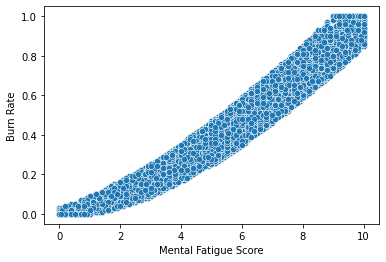

In [48]:
sns.scatterplot(x=train['Mental Fatigue Score'],y=train['Burn Rate'])
# seems like we found the jackpot

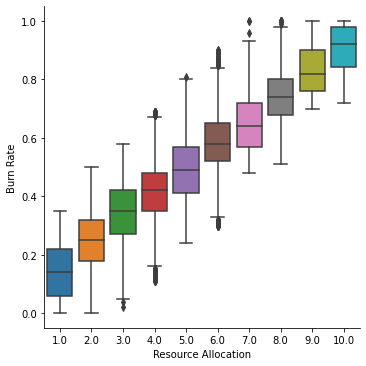

In [49]:
sns.catplot(data=data, x='Resource Allocation', y='Burn Rate', kind='box')

In [50]:
train.dtypes

Designation                float64
Resource Allocation          int64
Mental Fatigue Score       float64
Burn Rate                  float64
Gender_Male                float64
Company Type_Service       float64
WFH Setup Available_Yes    float64
dtype: object

#### Resource Allocation Imputation

## Feature Reduction and Selection

In [51]:
# train=exp

In [52]:
# train['Resource Allocation']=train['Resource Allocation'].astype(str)

In [53]:
# train=train.drop(['Day'],axis=1)

In [54]:
# train.insert(1,'Month',exp["Month"].to_numpy())

In [55]:
# train['Month']=train['Month'].astype(str)

In [56]:
# train=train.drop(['Month'],axis=1)

In [57]:
train=pd.get_dummies(train,drop_first=True)

<AxesSubplot:>

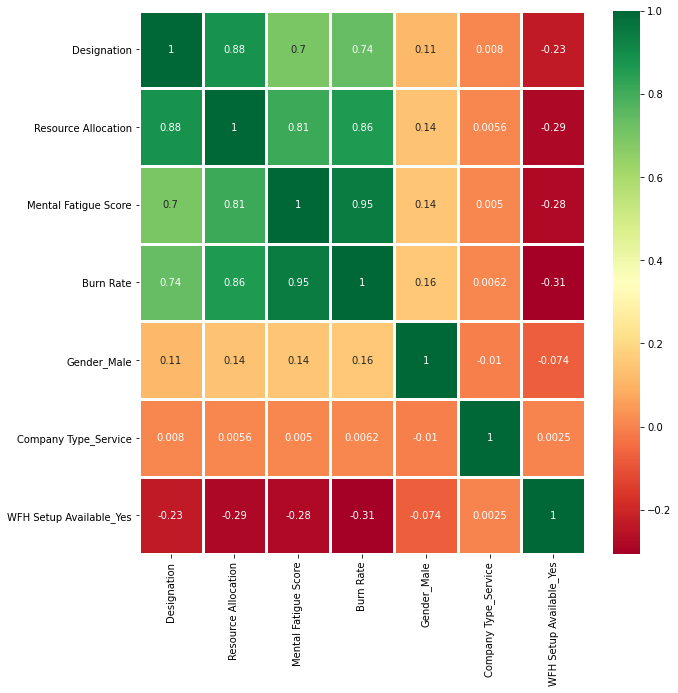

In [58]:
corrMat=train.corr()
corrFeat=corrMat.index
plt.figure(figsize=(10,10))
sns.heatmap(corrMat,annot=True,cmap='RdYlGn',linewidths=1.2)

In [59]:
#High correlation with Burn Rate is great news we should keep Designation and Mental Fatigue rate as they are strong Predictor

### Model Building

In [60]:
Y=train['Burn Rate']
X=train.drop(['Burn Rate'],axis=1)

In [61]:
X.shape

(21439, 6)

In [62]:
X.head()

Designation  Resource Allocation  Mental Fatigue Score  Gender_Male  \
0          2.0                    3                   3.8          0.0   
1          1.0                    2                   5.0          1.0   
2          2.0                    4                   5.8          0.0   
3          1.0                    1                   2.6          1.0   
4          3.0                    7                   6.9          0.0   

   Company Type_Service  WFH Setup Available_Yes  
0                   1.0                      0.0  
1                   1.0                      1.0  
2                   0.0                      1.0  
3                   1.0                      1.0  
4                   1.0                      0.0

In [63]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=200)

### Decision tree dot plot to indentify key drivers

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt_mod=DecisionTreeRegressor(criterion='mse',random_state=200,splitter="random")

In [65]:
dt_mod.fit(X_train,Y_train)
dt_mod.score(X_test,Y_test)

0.912306581821661

In [66]:
dt_mod.feature_importances_

array([0.36022697, 0.2631869 , 0.36430525, 0.00404103, 0.00337908,
       0.00486077])

In [67]:
# import pydotplus as pdt
# import os
# from sklearn import tree
# dot_data=tree.export_graphviz(dt_mod, filled=True, rounded=True, special_characters=True,
#                              proportion=True,feature_names=X.columns)
# graph=pdt.graph_from_dot_data(dot_data)
# from IPython.display import Image
# Image(graph.create_png())


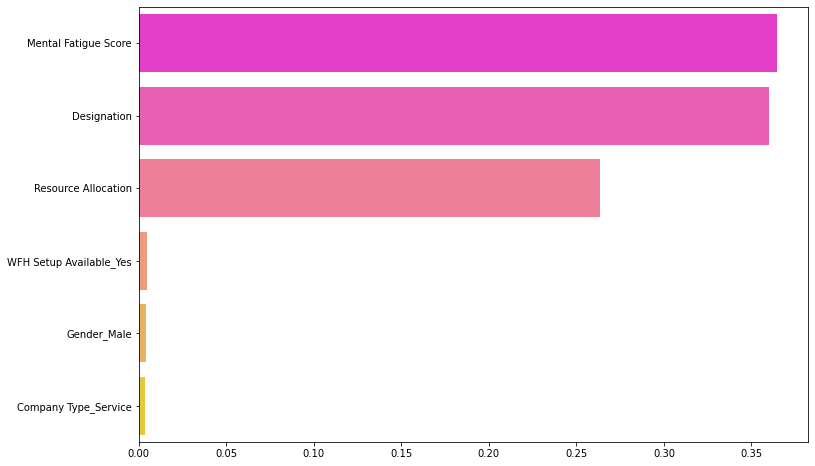

In [68]:
key_drivers=pd.Series(dt_mod.feature_importances_,index=X.columns).sort_values(ascending=False, kind="heapsort")
fig, axes = plt.subplots(1,1,figsize=(12,8))
sns.barplot(x=key_drivers.values,y=key_drivers.index, palette='spring',ax=axes)
fig.savefig("keydrivers.png")

### Bagging Ensemble

In [69]:
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [70]:
# for i in range(1200,1300,30):
#     bagMod=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=i,max_samples=1.0,
#                       random_state=200,base_estimator=DecisionTreeRegressor())
#     bagMod.fit(X_train,Y_train)
#     print(f"for {i} estimators accuracy is {bagMod.oob_score_}")

In [71]:
bagMod=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=200,max_samples=1.0,
                      random_state=200,base_estimator=DecisionTreeRegressor())

In [72]:
bagMod.fit(X,Y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200,
                 n_jobs=-1, oob_score=True, random_state=200)

In [73]:
bagMod.oob_score_

0.9228275842239341

In [74]:
bagMod.score(X_test,Y_test)

0.9516576188838395

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lm1=LinearRegression(n_jobs=-1,normalize=True)
lm1.fit(X_train,Y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [77]:
lm1.score(X_test,Y_test)

0.9243868385821757

### XGBRegressor

In [78]:
params={
 "learning_rate"    : [0.03] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7,9 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3,0.4]
}

In [79]:
X_train.dtypes

Designation                float64
Resource Allocation          int64
Mental Fatigue Score       float64
Gender_Male                float64
Company Type_Service       float64
WFH Setup Available_Yes    float64
dtype: object

In [80]:
X_train.shape

(17151, 6)

In [81]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
xgBoost=XGBRegressor()
# random_search=RandomizedSearchCV(xgBoost,param_distributions=params,n_iter=8,cv=6,verbose=3)
grid_search=GridSearchCV(xgBoost,param_grid=params,cv=10)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [82]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
grid_search.best_params_

{'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 8, 'min_child_weight': 3}

In [84]:
xgBoost=XGBRegressor(gamma=0.0,learning_rate=0.03,max_depth=8,min_child_weight=1)

In [85]:
xgBoost.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
xgBoost.score(X_test,Y_test)

0.9348217374218041

In [87]:
# random_search.best_estimator_

In [88]:
# xg=XGBRegressor(base_score=0.5, booster='gbtree',n_estimators=500,n_jobs=-1,max_depth=4,learning_rate=0.03)

In [89]:
# xg.fit(X_train,Y_train)

In [90]:
# xg.score(X_test,Y_test)

# Test Data Preparation

In [91]:
test=pd.read_csv('test.csv')

In [92]:
test.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
dtype: object

In [93]:
test.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [94]:
test['Resource Allocation'].nunique()

10

In [95]:
# test['Resource Allocation']=test['Resource Allocation'].astype(int).astype(str)
# test['Designation']=test['Designation'].astype(int).astype(str)

In [96]:
# test.to_csv('TestID.csv',index=False)

In [97]:
testX=test.drop(['Employee ID','Date of Joining'],axis=1)

In [98]:
testX.dtypes

Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
dtype: object

In [99]:
testX.head(1)

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  5.0   

   Mental Fatigue Score  
0                   7.7

In [100]:
# testX=pd.get_dummies(testX,drop_first=True)

In [101]:
testX.shape

(12250, 6)

In [102]:
testX.head(2)

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  5.0   
1  Female      Product                 Yes          1.0                  2.0   

   Mental Fatigue Score  
0                   7.7  
1                   5.2

In [103]:
# X.to_csv('TestFilter.csv',index=False)

In [104]:
# train= pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
testX.head(1)

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  5.0   

   Mental Fatigue Score  
0                   7.7

### XGBOOST

In [105]:
testX.dtypes

Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
dtype: object

In [106]:
dummy=pd.get_dummies(testX,drop_first=True)

In [107]:
dummy.dtypes

Designation                float64
Resource Allocation        float64
Mental Fatigue Score       float64
Gender_Male                  uint8
Company Type_Service         uint8
WFH Setup Available_Yes      uint8
dtype: object

In [108]:
dummy.shape

(12250, 6)

In [109]:
preds=xgBoost.predict(dummy)

In [110]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [111]:
result.to_csv('xgBoost.csv',index=False)

## Bagging

In [112]:
# preds=random_search.predict(X)

In [113]:
# preds

In [114]:
# result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [115]:
# result.to_csv('xgBoost.csv',index=False)

In [116]:
bagMod.score(X_test,Y_test)

0.9516576188838395

In [117]:
preds=bagMod.predict(pd.get_dummies(testX))

In [118]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [119]:
result.to_csv('bag.csv',index=False)

## Linear Regression

In [120]:
preds=lm1.predict(dummy)
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})
result.to_csv('lm.csv',index=False)

# Experimental

## CatBoost

In [121]:
testX['Designation']=testX['Designation'].astype(int)
testX['Resource Allocation']=testX['Resource Allocation'].astype(int)
testX['Mental Fatigue Score']=testX['Mental Fatigue Score'].astype(int)
# testX=pd.get_dummies(testX)

In [122]:
testX.dtypes

Gender                  object
Company Type            object
WFH Setup Available     object
Designation              int64
Resource Allocation      int64
Mental Fatigue Score     int64
dtype: object

In [123]:
exp=data.drop(['Employee ID','Date of Joining','Day','Month'],axis=1)

In [124]:
exp['Mental Fatigue Score']=train['Mental Fatigue Score'].to_numpy()
exp['Resource Allocation']=train['Resource Allocation'].to_numpy().astype(int)
train['Mental Fatigue Score']=train['Mental Fatigue Score'].astype(int)

In [125]:
# data=data.dropna(subset=['Burn Rate'])
exp.isna().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

##### Feature Scaling

In [126]:
trainX=exp.drop(['Burn Rate'],axis=1)
trainY=exp['Burn Rate']
# trainX=train.drop(['Burn Rate'],axis=1)
# trainY=train['Burn Rate']

In [127]:
# trainX=pd.get_dummies(trainX)

In [128]:
# train.isna().sum()

In [142]:
trainX['Mental Fatigue Score']=trainX['Mental Fatigue Score'].astype(int)
trainX.dtypes

Gender                  object
Company Type            object
WFH Setup Available     object
Designation              int64
Resource Allocation      int64
Mental Fatigue Score     int64
dtype: object

In [143]:
# trainX=trainX.drop(['Month'],axis=1)

In [144]:
cat_features=[0,1,2,3,4]

In [145]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(trainX, trainY, test_size=0.2, random_state=0)

In [146]:
X_train.dtypes

Gender                  object
Company Type            object
WFH Setup Available     object
Designation              int64
Resource Allocation      int64
Mental Fatigue Score     int64
dtype: object

In [147]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [148]:
# model = CatBoostRegressor()

# grid = {'learning_rate': [0.03,0.05],
#         'l2_leaf_reg': [1, 3, 5, 7, 9, 11]}

# grid_search_result = model.randomized_search(grid,cv=20,n_iter=20 ,
#                                        X=trainX, 
#                                        y=trainY, 
#                                        plot=True)

In [149]:
# clf=CatBoostRegressor(depth=10,l2_leaf_reg=7,learning_rate=0.03,iterations=500)

In [150]:
clf = CatBoostRegressor(iterations=1800, learning_rate=0.05,random_seed=200,l2_leaf_reg=13)#1800 best,leaf 13

In [151]:
# for i in range(1000,3000,100):
#     clf = CatBoostRegressor(iterations=i, learning_rate=0.03,random_seed=200,l2_leaf_reg=30)#1800 best,leaf 13
#     clf.fit(X_train,Y_train, cat_features=cat_features,verbose=False)
    
#     print(f"for {i} iterations test score is{clf.score(X_test, Y_test)}")
# # clf.fit(trainX,trainY,verbose=True)
# # clf.fit(trainX,trainY,verbose=True)

In [152]:
# print('CatBoost model is fitted: ' + str(clf.is_fitted()))
# print('CatBoost model parameters:')
# print(clf.get_params())

In [153]:
clf.fit(X_train,Y_train,cat_features=cat_features)

0:	learn: 0.1903817	total: 5.94ms	remaining: 10.7s
1:	learn: 0.1824947	total: 11.6ms	remaining: 10.4s
2:	learn: 0.1754461	total: 16.6ms	remaining: 9.94s
3:	learn: 0.1682139	total: 21.2ms	remaining: 9.52s
4:	learn: 0.1615591	total: 26.7ms	remaining: 9.57s
5:	learn: 0.1551747	total: 32.4ms	remaining: 9.68s
6:	learn: 0.1491429	total: 36.5ms	remaining: 9.36s
7:	learn: 0.1436817	total: 40.8ms	remaining: 9.14s
8:	learn: 0.1384127	total: 45.2ms	remaining: 8.98s
9:	learn: 0.1336322	total: 49.4ms	remaining: 8.84s
10:	learn: 0.1289606	total: 53.7ms	remaining: 8.73s
11:	learn: 0.1244760	total: 58.5ms	remaining: 8.72s
12:	learn: 0.1203432	total: 63ms	remaining: 8.66s
13:	learn: 0.1163381	total: 68.3ms	remaining: 8.72s
14:	learn: 0.1127377	total: 72.9ms	remaining: 8.67s
15:	learn: 0.1091875	total: 76.9ms	remaining: 8.58s
16:	learn: 0.1059410	total: 82.2ms	remaining: 8.62s
17:	learn: 0.1029787	total: 87.3ms	remaining: 8.64s
18:	learn: 0.1002921	total: 92.3ms	remaining: 8.65s
19:	learn: 0.0976144	tot

198:	learn: 0.0551360	total: 784ms	remaining: 6.3s
199:	learn: 0.0551271	total: 788ms	remaining: 6.3s
200:	learn: 0.0551216	total: 791ms	remaining: 6.29s
201:	learn: 0.0551168	total: 795ms	remaining: 6.29s
202:	learn: 0.0551163	total: 800ms	remaining: 6.29s
203:	learn: 0.0551162	total: 801ms	remaining: 6.27s
204:	learn: 0.0551107	total: 806ms	remaining: 6.27s
205:	learn: 0.0551020	total: 810ms	remaining: 6.26s
206:	learn: 0.0550980	total: 814ms	remaining: 6.26s
207:	learn: 0.0550927	total: 817ms	remaining: 6.25s
208:	learn: 0.0550850	total: 821ms	remaining: 6.25s
209:	learn: 0.0550799	total: 826ms	remaining: 6.26s
210:	learn: 0.0550743	total: 830ms	remaining: 6.25s
211:	learn: 0.0550711	total: 835ms	remaining: 6.25s
212:	learn: 0.0550702	total: 838ms	remaining: 6.24s
213:	learn: 0.0550642	total: 842ms	remaining: 6.24s
214:	learn: 0.0550634	total: 845ms	remaining: 6.23s
215:	learn: 0.0550618	total: 849ms	remaining: 6.23s
216:	learn: 0.0550499	total: 854ms	remaining: 6.23s
217:	learn: 0.

360:	learn: 0.0546181	total: 1.36s	remaining: 5.44s
361:	learn: 0.0546168	total: 1.37s	remaining: 5.44s
362:	learn: 0.0546136	total: 1.37s	remaining: 5.43s
363:	learn: 0.0546129	total: 1.38s	remaining: 5.43s
364:	learn: 0.0546123	total: 1.38s	remaining: 5.42s
365:	learn: 0.0546105	total: 1.38s	remaining: 5.42s
366:	learn: 0.0546078	total: 1.39s	remaining: 5.42s
367:	learn: 0.0546060	total: 1.39s	remaining: 5.41s
368:	learn: 0.0546055	total: 1.39s	remaining: 5.4s
369:	learn: 0.0546050	total: 1.4s	remaining: 5.4s
370:	learn: 0.0546045	total: 1.4s	remaining: 5.39s
371:	learn: 0.0546043	total: 1.4s	remaining: 5.38s
372:	learn: 0.0546040	total: 1.41s	remaining: 5.38s
373:	learn: 0.0546031	total: 1.41s	remaining: 5.38s
374:	learn: 0.0546008	total: 1.41s	remaining: 5.38s
375:	learn: 0.0545957	total: 1.42s	remaining: 5.37s
376:	learn: 0.0545950	total: 1.42s	remaining: 5.37s
377:	learn: 0.0545909	total: 1.43s	remaining: 5.37s
378:	learn: 0.0545884	total: 1.43s	remaining: 5.36s
379:	learn: 0.054

524:	learn: 0.0543891	total: 1.95s	remaining: 4.73s
525:	learn: 0.0543867	total: 1.95s	remaining: 4.72s
526:	learn: 0.0543862	total: 1.95s	remaining: 4.72s
527:	learn: 0.0543847	total: 1.96s	remaining: 4.72s
528:	learn: 0.0543838	total: 1.96s	remaining: 4.71s
529:	learn: 0.0543830	total: 1.97s	remaining: 4.71s
530:	learn: 0.0543809	total: 1.97s	remaining: 4.71s
531:	learn: 0.0543795	total: 1.97s	remaining: 4.7s
532:	learn: 0.0543790	total: 1.98s	remaining: 4.7s
533:	learn: 0.0543784	total: 1.98s	remaining: 4.69s
534:	learn: 0.0543778	total: 1.98s	remaining: 4.69s
535:	learn: 0.0543772	total: 1.99s	remaining: 4.68s
536:	learn: 0.0543765	total: 1.99s	remaining: 4.68s
537:	learn: 0.0543759	total: 1.99s	remaining: 4.68s
538:	learn: 0.0543746	total: 2s	remaining: 4.67s
539:	learn: 0.0543744	total: 2s	remaining: 4.67s
540:	learn: 0.0543728	total: 2.01s	remaining: 4.67s
541:	learn: 0.0543724	total: 2.01s	remaining: 4.66s
542:	learn: 0.0543721	total: 2.01s	remaining: 4.66s
543:	learn: 0.054370

715:	learn: 0.0541886	total: 2.73s	remaining: 4.13s
716:	learn: 0.0541881	total: 2.73s	remaining: 4.12s
717:	learn: 0.0541874	total: 2.73s	remaining: 4.12s
718:	learn: 0.0541872	total: 2.74s	remaining: 4.12s
719:	learn: 0.0541870	total: 2.74s	remaining: 4.11s
720:	learn: 0.0541866	total: 2.75s	remaining: 4.11s
721:	learn: 0.0541859	total: 2.75s	remaining: 4.1s
722:	learn: 0.0541856	total: 2.75s	remaining: 4.1s
723:	learn: 0.0541845	total: 2.76s	remaining: 4.1s
724:	learn: 0.0541825	total: 2.76s	remaining: 4.09s
725:	learn: 0.0541822	total: 2.76s	remaining: 4.09s
726:	learn: 0.0541817	total: 2.77s	remaining: 4.08s
727:	learn: 0.0541815	total: 2.77s	remaining: 4.08s
728:	learn: 0.0541801	total: 2.77s	remaining: 4.08s
729:	learn: 0.0541795	total: 2.78s	remaining: 4.07s
730:	learn: 0.0541790	total: 2.78s	remaining: 4.07s
731:	learn: 0.0541769	total: 2.79s	remaining: 4.07s
732:	learn: 0.0541753	total: 2.79s	remaining: 4.06s
733:	learn: 0.0541745	total: 2.79s	remaining: 4.06s
734:	learn: 0.0

874:	learn: 0.0540596	total: 3.31s	remaining: 3.5s
875:	learn: 0.0540586	total: 3.31s	remaining: 3.5s
876:	learn: 0.0540584	total: 3.32s	remaining: 3.49s
877:	learn: 0.0540545	total: 3.33s	remaining: 3.49s
878:	learn: 0.0540539	total: 3.33s	remaining: 3.49s
879:	learn: 0.0540533	total: 3.33s	remaining: 3.48s
880:	learn: 0.0540532	total: 3.34s	remaining: 3.48s
881:	learn: 0.0540527	total: 3.34s	remaining: 3.48s
882:	learn: 0.0540512	total: 3.34s	remaining: 3.47s
883:	learn: 0.0540512	total: 3.35s	remaining: 3.47s
884:	learn: 0.0540502	total: 3.35s	remaining: 3.46s
885:	learn: 0.0540485	total: 3.35s	remaining: 3.46s
886:	learn: 0.0540469	total: 3.35s	remaining: 3.45s
887:	learn: 0.0540468	total: 3.36s	remaining: 3.45s
888:	learn: 0.0540466	total: 3.36s	remaining: 3.44s
889:	learn: 0.0540460	total: 3.36s	remaining: 3.44s
890:	learn: 0.0540457	total: 3.37s	remaining: 3.44s
891:	learn: 0.0540447	total: 3.37s	remaining: 3.43s
892:	learn: 0.0540439	total: 3.38s	remaining: 3.43s
893:	learn: 0.

1078:	learn: 0.0539133	total: 4.09s	remaining: 2.73s
1079:	learn: 0.0539129	total: 4.09s	remaining: 2.73s
1080:	learn: 0.0539125	total: 4.09s	remaining: 2.72s
1081:	learn: 0.0539124	total: 4.1s	remaining: 2.72s
1082:	learn: 0.0539121	total: 4.1s	remaining: 2.72s
1083:	learn: 0.0539115	total: 4.11s	remaining: 2.71s
1084:	learn: 0.0539106	total: 4.11s	remaining: 2.71s
1085:	learn: 0.0539103	total: 4.11s	remaining: 2.71s
1086:	learn: 0.0539098	total: 4.12s	remaining: 2.7s
1087:	learn: 0.0539094	total: 4.12s	remaining: 2.7s
1088:	learn: 0.0539092	total: 4.13s	remaining: 2.69s
1089:	learn: 0.0539083	total: 4.13s	remaining: 2.69s
1090:	learn: 0.0539077	total: 4.13s	remaining: 2.69s
1091:	learn: 0.0539070	total: 4.14s	remaining: 2.68s
1092:	learn: 0.0539070	total: 4.14s	remaining: 2.68s
1093:	learn: 0.0539068	total: 4.14s	remaining: 2.67s
1094:	learn: 0.0539054	total: 4.14s	remaining: 2.67s
1095:	learn: 0.0539050	total: 4.15s	remaining: 2.67s
1096:	learn: 0.0539049	total: 4.15s	remaining: 2.6

1244:	learn: 0.0538245	total: 4.67s	remaining: 2.08s
1245:	learn: 0.0538241	total: 4.67s	remaining: 2.08s
1246:	learn: 0.0538239	total: 4.67s	remaining: 2.07s
1247:	learn: 0.0538226	total: 4.68s	remaining: 2.07s
1248:	learn: 0.0538224	total: 4.68s	remaining: 2.06s
1249:	learn: 0.0538224	total: 4.69s	remaining: 2.06s
1250:	learn: 0.0538219	total: 4.69s	remaining: 2.06s
1251:	learn: 0.0538215	total: 4.7s	remaining: 2.06s
1252:	learn: 0.0538213	total: 4.7s	remaining: 2.05s
1253:	learn: 0.0538198	total: 4.7s	remaining: 2.05s
1254:	learn: 0.0538197	total: 4.71s	remaining: 2.04s
1255:	learn: 0.0538194	total: 4.71s	remaining: 2.04s
1256:	learn: 0.0538188	total: 4.71s	remaining: 2.04s
1257:	learn: 0.0538187	total: 4.72s	remaining: 2.03s
1258:	learn: 0.0538182	total: 4.72s	remaining: 2.03s
1259:	learn: 0.0538180	total: 4.73s	remaining: 2.03s
1260:	learn: 0.0538177	total: 4.73s	remaining: 2.02s
1261:	learn: 0.0538174	total: 4.73s	remaining: 2.02s
1262:	learn: 0.0538160	total: 4.74s	remaining: 2.

1410:	learn: 0.0537452	total: 5.25s	remaining: 1.45s
1411:	learn: 0.0537447	total: 5.25s	remaining: 1.44s
1412:	learn: 0.0537447	total: 5.26s	remaining: 1.44s
1413:	learn: 0.0537441	total: 5.26s	remaining: 1.44s
1414:	learn: 0.0537440	total: 5.26s	remaining: 1.43s
1415:	learn: 0.0537438	total: 5.27s	remaining: 1.43s
1416:	learn: 0.0537435	total: 5.27s	remaining: 1.43s
1417:	learn: 0.0537433	total: 5.28s	remaining: 1.42s
1418:	learn: 0.0537421	total: 5.28s	remaining: 1.42s
1419:	learn: 0.0537419	total: 5.28s	remaining: 1.41s
1420:	learn: 0.0537409	total: 5.29s	remaining: 1.41s
1421:	learn: 0.0537401	total: 5.29s	remaining: 1.41s
1422:	learn: 0.0537395	total: 5.29s	remaining: 1.4s
1423:	learn: 0.0537392	total: 5.3s	remaining: 1.4s
1424:	learn: 0.0537390	total: 5.3s	remaining: 1.4s
1425:	learn: 0.0537387	total: 5.31s	remaining: 1.39s
1426:	learn: 0.0537381	total: 5.31s	remaining: 1.39s
1427:	learn: 0.0537379	total: 5.31s	remaining: 1.38s
1428:	learn: 0.0537376	total: 5.32s	remaining: 1.38

1603:	learn: 0.0536431	total: 6.02s	remaining: 736ms
1604:	learn: 0.0536429	total: 6.03s	remaining: 732ms
1605:	learn: 0.0536422	total: 6.03s	remaining: 728ms
1606:	learn: 0.0536419	total: 6.03s	remaining: 725ms
1607:	learn: 0.0536416	total: 6.04s	remaining: 721ms
1608:	learn: 0.0536408	total: 6.04s	remaining: 717ms
1609:	learn: 0.0536395	total: 6.04s	remaining: 713ms
1610:	learn: 0.0536394	total: 6.05s	remaining: 710ms
1611:	learn: 0.0536376	total: 6.05s	remaining: 706ms
1612:	learn: 0.0536375	total: 6.05s	remaining: 702ms
1613:	learn: 0.0536369	total: 6.06s	remaining: 698ms
1614:	learn: 0.0536353	total: 6.06s	remaining: 695ms
1615:	learn: 0.0536351	total: 6.07s	remaining: 691ms
1616:	learn: 0.0536344	total: 6.07s	remaining: 687ms
1617:	learn: 0.0536342	total: 6.07s	remaining: 683ms
1618:	learn: 0.0536335	total: 6.08s	remaining: 679ms
1619:	learn: 0.0536328	total: 6.08s	remaining: 676ms
1620:	learn: 0.0536327	total: 6.08s	remaining: 672ms
1621:	learn: 0.0536324	total: 6.09s	remaining:

In [154]:
clf.score(X_test, Y_test)

0.9195764007156246

In [155]:
# testX=pd.get_dummies(testX)
# testX=scaler.transform(testX)
testX.dtypes

Gender                  object
Company Type            object
WFH Setup Available     object
Designation              int64
Resource Allocation      int64
Mental Fatigue Score     int64
dtype: object

In [156]:
testX['Mental Fatigue Score']=testX['Mental Fatigue Score'].astype(int)
preds=clf.predict(testX)

In [157]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [158]:
result.to_csv('catboost.csv',index=False)

In [159]:
import dill
dill.dump_session('notebook_env.db')

In [160]:
dill.load_session('notebook_env.db')

# Stacking

In [161]:
from sklearn.ensemble import StackingRegressor

In [165]:
X_train, X_test, Y_train, Y_test = tts(pd.get_dummies(trainX), trainY, test_size=0.2, random_state=0)

In [166]:
estimators=[('bagging',BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=1600,random_state=200,
            base_estimator=DecisionTreeRegressor()))
            ,('xgboost',XGBRegressor(n_estimator=900,n_jobs=-1,learning_rate=0.05,random_state=200)),
            ('catboost',CatBoostRegressor(iterations=1500, learning_rate=0.03,random_seed=200,l2_leaf_reg=13))]

In [167]:
reg=StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=600,
                                                                                  oob_score=True,random_state=200))

In [168]:
reg.fit(X_train,Y_train)

[09:11:13] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0:	learn: 0.1934846	total: 1.7ms	remaining: 2.54s
1:	learn: 0.1887046	total: 3.12ms	remaining: 2.34s
2:	learn: 0.1839669	total: 4.89ms	remaining: 2.44s
3:	learn: 0.1793189	total: 6.72ms	remaining: 2.52s
4:	learn: 0.1748279	total: 8.73ms	remaining: 2.61s
5:	learn: 0.1706190	total: 11.6ms	remaining: 2.89s
6:	learn: 0.1664457	total: 14.6ms	remaining: 3.11s
7:	learn: 0.1623964	total: 17.1ms	remaining: 3.18s
8:	learn: 0.1584891	total: 18.8ms	remaining: 3.12s
9:	learn: 0.1546904	total: 20.5ms	remaining: 3.05s
10:	learn: 0.1510393	total: 22.1ms	remaining: 3s
11:	learn: 0.1475538	total: 24.1ms	remaining: 2.99s
12:	learn: 0.1442593	total: 27.5ms	remaining: 3.14s
13:	l

182:	learn: 0.0559288	total: 378ms	remaining: 2.72s
183:	learn: 0.0559275	total: 380ms	remaining: 2.72s
184:	learn: 0.0559214	total: 382ms	remaining: 2.71s
185:	learn: 0.0559153	total: 386ms	remaining: 2.73s
186:	learn: 0.0559114	total: 388ms	remaining: 2.72s
187:	learn: 0.0559029	total: 390ms	remaining: 2.72s
188:	learn: 0.0558962	total: 391ms	remaining: 2.71s
189:	learn: 0.0558912	total: 393ms	remaining: 2.71s
190:	learn: 0.0558894	total: 394ms	remaining: 2.7s
191:	learn: 0.0558838	total: 396ms	remaining: 2.7s
192:	learn: 0.0558762	total: 400ms	remaining: 2.71s
193:	learn: 0.0558715	total: 403ms	remaining: 2.71s
194:	learn: 0.0558598	total: 405ms	remaining: 2.71s
195:	learn: 0.0558432	total: 407ms	remaining: 2.71s
196:	learn: 0.0558398	total: 409ms	remaining: 2.7s
197:	learn: 0.0558315	total: 411ms	remaining: 2.7s
198:	learn: 0.0558260	total: 413ms	remaining: 2.7s
199:	learn: 0.0558140	total: 418ms	remaining: 2.72s
200:	learn: 0.0558082	total: 420ms	remaining: 2.71s
201:	learn: 0.055

353:	learn: 0.0551223	total: 762ms	remaining: 2.46s
354:	learn: 0.0551170	total: 764ms	remaining: 2.46s
355:	learn: 0.0551150	total: 766ms	remaining: 2.46s
356:	learn: 0.0551123	total: 767ms	remaining: 2.46s
357:	learn: 0.0551098	total: 769ms	remaining: 2.45s
358:	learn: 0.0551067	total: 771ms	remaining: 2.45s
359:	learn: 0.0551055	total: 773ms	remaining: 2.45s
360:	learn: 0.0550979	total: 775ms	remaining: 2.44s
361:	learn: 0.0550978	total: 776ms	remaining: 2.44s
362:	learn: 0.0550949	total: 778ms	remaining: 2.44s
363:	learn: 0.0550934	total: 780ms	remaining: 2.43s
364:	learn: 0.0550887	total: 782ms	remaining: 2.43s
365:	learn: 0.0550861	total: 784ms	remaining: 2.43s
366:	learn: 0.0550832	total: 785ms	remaining: 2.42s
367:	learn: 0.0550792	total: 787ms	remaining: 2.42s
368:	learn: 0.0550764	total: 789ms	remaining: 2.42s
369:	learn: 0.0550742	total: 791ms	remaining: 2.41s
370:	learn: 0.0550716	total: 792ms	remaining: 2.41s
371:	learn: 0.0550654	total: 794ms	remaining: 2.41s
372:	learn: 

541:	learn: 0.0547135	total: 1.14s	remaining: 2.01s
542:	learn: 0.0547118	total: 1.14s	remaining: 2.01s
543:	learn: 0.0547112	total: 1.14s	remaining: 2.01s
544:	learn: 0.0547100	total: 1.15s	remaining: 2.01s
545:	learn: 0.0547095	total: 1.15s	remaining: 2.01s
546:	learn: 0.0547073	total: 1.15s	remaining: 2.01s
547:	learn: 0.0547065	total: 1.15s	remaining: 2s
548:	learn: 0.0547043	total: 1.16s	remaining: 2s
549:	learn: 0.0547026	total: 1.16s	remaining: 2s
550:	learn: 0.0547004	total: 1.16s	remaining: 2s
551:	learn: 0.0546987	total: 1.16s	remaining: 2s
552:	learn: 0.0546974	total: 1.17s	remaining: 2s
553:	learn: 0.0546963	total: 1.17s	remaining: 1.99s
554:	learn: 0.0546933	total: 1.17s	remaining: 1.99s
555:	learn: 0.0546911	total: 1.17s	remaining: 1.99s
556:	learn: 0.0546901	total: 1.17s	remaining: 1.99s
557:	learn: 0.0546891	total: 1.18s	remaining: 1.99s
558:	learn: 0.0546883	total: 1.18s	remaining: 1.98s
559:	learn: 0.0546878	total: 1.18s	remaining: 1.98s
560:	learn: 0.0546872	total: 1

750:	learn: 0.0544461	total: 1.52s	remaining: 1.52s
751:	learn: 0.0544451	total: 1.52s	remaining: 1.52s
752:	learn: 0.0544447	total: 1.53s	remaining: 1.51s
753:	learn: 0.0544439	total: 1.53s	remaining: 1.51s
754:	learn: 0.0544426	total: 1.53s	remaining: 1.51s
755:	learn: 0.0544422	total: 1.53s	remaining: 1.51s
756:	learn: 0.0544416	total: 1.53s	remaining: 1.5s
757:	learn: 0.0544408	total: 1.53s	remaining: 1.5s
758:	learn: 0.0544404	total: 1.54s	remaining: 1.5s
759:	learn: 0.0544401	total: 1.54s	remaining: 1.5s
760:	learn: 0.0544394	total: 1.54s	remaining: 1.5s
761:	learn: 0.0544385	total: 1.54s	remaining: 1.49s
762:	learn: 0.0544377	total: 1.54s	remaining: 1.49s
763:	learn: 0.0544373	total: 1.55s	remaining: 1.49s
764:	learn: 0.0544351	total: 1.55s	remaining: 1.49s
765:	learn: 0.0544342	total: 1.55s	remaining: 1.49s
766:	learn: 0.0544334	total: 1.55s	remaining: 1.48s
767:	learn: 0.0544328	total: 1.55s	remaining: 1.48s
768:	learn: 0.0544324	total: 1.55s	remaining: 1.48s
769:	learn: 0.054

970:	learn: 0.0542738	total: 1.91s	remaining: 1.04s
971:	learn: 0.0542731	total: 1.91s	remaining: 1.03s
972:	learn: 0.0542729	total: 1.91s	remaining: 1.03s
973:	learn: 0.0542720	total: 1.91s	remaining: 1.03s
974:	learn: 0.0542715	total: 1.91s	remaining: 1.03s
975:	learn: 0.0542706	total: 1.91s	remaining: 1.03s
976:	learn: 0.0542704	total: 1.92s	remaining: 1.02s
977:	learn: 0.0542696	total: 1.92s	remaining: 1.02s
978:	learn: 0.0542687	total: 1.92s	remaining: 1.02s
979:	learn: 0.0542683	total: 1.92s	remaining: 1.02s
980:	learn: 0.0542680	total: 1.92s	remaining: 1.02s
981:	learn: 0.0542678	total: 1.93s	remaining: 1.01s
982:	learn: 0.0542671	total: 1.93s	remaining: 1.01s
983:	learn: 0.0542665	total: 1.93s	remaining: 1.01s
984:	learn: 0.0542662	total: 1.93s	remaining: 1.01s
985:	learn: 0.0542660	total: 1.93s	remaining: 1.01s
986:	learn: 0.0542647	total: 1.93s	remaining: 1s
987:	learn: 0.0542635	total: 1.94s	remaining: 1s
988:	learn: 0.0542629	total: 1.94s	remaining: 1s
989:	learn: 0.0542627

1181:	learn: 0.0541543	total: 2.29s	remaining: 616ms
1182:	learn: 0.0541540	total: 2.29s	remaining: 614ms
1183:	learn: 0.0541535	total: 2.29s	remaining: 612ms
1184:	learn: 0.0541530	total: 2.29s	remaining: 610ms
1185:	learn: 0.0541523	total: 2.3s	remaining: 608ms
1186:	learn: 0.0541521	total: 2.3s	remaining: 606ms
1187:	learn: 0.0541512	total: 2.3s	remaining: 604ms
1188:	learn: 0.0541506	total: 2.3s	remaining: 602ms
1189:	learn: 0.0541502	total: 2.3s	remaining: 600ms
1190:	learn: 0.0541491	total: 2.31s	remaining: 598ms
1191:	learn: 0.0541489	total: 2.31s	remaining: 596ms
1192:	learn: 0.0541487	total: 2.31s	remaining: 594ms
1193:	learn: 0.0541482	total: 2.31s	remaining: 593ms
1194:	learn: 0.0541478	total: 2.31s	remaining: 591ms
1195:	learn: 0.0541474	total: 2.31s	remaining: 589ms
1196:	learn: 0.0541467	total: 2.32s	remaining: 587ms
1197:	learn: 0.0541466	total: 2.32s	remaining: 585ms
1198:	learn: 0.0541462	total: 2.32s	remaining: 583ms
1199:	learn: 0.0541458	total: 2.32s	remaining: 581m

1393:	learn: 0.0540654	total: 2.67s	remaining: 203ms
1394:	learn: 0.0540649	total: 2.67s	remaining: 201ms
1395:	learn: 0.0540647	total: 2.67s	remaining: 199ms
1396:	learn: 0.0540645	total: 2.68s	remaining: 197ms
1397:	learn: 0.0540644	total: 2.68s	remaining: 195ms
1398:	learn: 0.0540643	total: 2.68s	remaining: 193ms
1399:	learn: 0.0540639	total: 2.68s	remaining: 192ms
1400:	learn: 0.0540638	total: 2.68s	remaining: 190ms
1401:	learn: 0.0540635	total: 2.69s	remaining: 188ms
1402:	learn: 0.0540632	total: 2.69s	remaining: 186ms
1403:	learn: 0.0540629	total: 2.69s	remaining: 184ms
1404:	learn: 0.0540627	total: 2.69s	remaining: 182ms
1405:	learn: 0.0540619	total: 2.69s	remaining: 180ms
1406:	learn: 0.0540618	total: 2.69s	remaining: 178ms
1407:	learn: 0.0540616	total: 2.7s	remaining: 176ms
1408:	learn: 0.0540613	total: 2.7s	remaining: 174ms
1409:	learn: 0.0540610	total: 2.7s	remaining: 172ms
1410:	learn: 0.0540604	total: 2.7s	remaining: 170ms
1411:	learn: 0.0540602	total: 2.7s	remaining: 169m

104:	learn: 0.0578807	total: 195ms	remaining: 2.59s
105:	learn: 0.0578112	total: 197ms	remaining: 2.6s
106:	learn: 0.0577421	total: 199ms	remaining: 2.6s
107:	learn: 0.0576785	total: 201ms	remaining: 2.59s
108:	learn: 0.0576274	total: 203ms	remaining: 2.59s
109:	learn: 0.0575679	total: 205ms	remaining: 2.58s
110:	learn: 0.0575101	total: 206ms	remaining: 2.58s
111:	learn: 0.0574504	total: 208ms	remaining: 2.58s
112:	learn: 0.0573979	total: 210ms	remaining: 2.58s
113:	learn: 0.0573492	total: 212ms	remaining: 2.58s
114:	learn: 0.0572976	total: 214ms	remaining: 2.57s
115:	learn: 0.0572456	total: 215ms	remaining: 2.57s
116:	learn: 0.0571960	total: 217ms	remaining: 2.57s
117:	learn: 0.0571575	total: 219ms	remaining: 2.56s
118:	learn: 0.0571155	total: 221ms	remaining: 2.56s
119:	learn: 0.0570749	total: 222ms	remaining: 2.56s
120:	learn: 0.0570382	total: 224ms	remaining: 2.55s
121:	learn: 0.0570029	total: 226ms	remaining: 2.55s
122:	learn: 0.0569557	total: 228ms	remaining: 2.55s
123:	learn: 0.

321:	learn: 0.0552566	total: 578ms	remaining: 2.11s
322:	learn: 0.0552535	total: 580ms	remaining: 2.11s
323:	learn: 0.0552488	total: 582ms	remaining: 2.11s
324:	learn: 0.0552421	total: 584ms	remaining: 2.11s
325:	learn: 0.0552395	total: 586ms	remaining: 2.11s
326:	learn: 0.0552373	total: 590ms	remaining: 2.12s
327:	learn: 0.0552337	total: 592ms	remaining: 2.12s
328:	learn: 0.0552315	total: 595ms	remaining: 2.12s
329:	learn: 0.0552243	total: 597ms	remaining: 2.12s
330:	learn: 0.0552232	total: 600ms	remaining: 2.12s
331:	learn: 0.0552212	total: 603ms	remaining: 2.12s
332:	learn: 0.0552181	total: 605ms	remaining: 2.12s
333:	learn: 0.0552117	total: 607ms	remaining: 2.12s
334:	learn: 0.0552085	total: 610ms	remaining: 2.12s
335:	learn: 0.0552021	total: 616ms	remaining: 2.13s
336:	learn: 0.0551996	total: 620ms	remaining: 2.14s
337:	learn: 0.0551936	total: 622ms	remaining: 2.14s
338:	learn: 0.0551893	total: 624ms	remaining: 2.14s
339:	learn: 0.0551870	total: 627ms	remaining: 2.14s
340:	learn: 

493:	learn: 0.0547928	total: 955ms	remaining: 1.94s
494:	learn: 0.0547914	total: 957ms	remaining: 1.94s
495:	learn: 0.0547883	total: 959ms	remaining: 1.94s
496:	learn: 0.0547870	total: 960ms	remaining: 1.94s
497:	learn: 0.0547853	total: 962ms	remaining: 1.94s
498:	learn: 0.0547835	total: 964ms	remaining: 1.93s
499:	learn: 0.0547820	total: 966ms	remaining: 1.93s
500:	learn: 0.0547811	total: 968ms	remaining: 1.93s
501:	learn: 0.0547796	total: 970ms	remaining: 1.93s
502:	learn: 0.0547761	total: 972ms	remaining: 1.93s
503:	learn: 0.0547752	total: 973ms	remaining: 1.92s
504:	learn: 0.0547738	total: 975ms	remaining: 1.92s
505:	learn: 0.0547726	total: 977ms	remaining: 1.92s
506:	learn: 0.0547707	total: 979ms	remaining: 1.92s
507:	learn: 0.0547687	total: 981ms	remaining: 1.91s
508:	learn: 0.0547661	total: 982ms	remaining: 1.91s
509:	learn: 0.0547644	total: 984ms	remaining: 1.91s
510:	learn: 0.0547624	total: 986ms	remaining: 1.91s
511:	learn: 0.0547613	total: 988ms	remaining: 1.91s
512:	learn: 

670:	learn: 0.0545124	total: 1.33s	remaining: 1.65s
671:	learn: 0.0545112	total: 1.34s	remaining: 1.65s
672:	learn: 0.0545076	total: 1.34s	remaining: 1.65s
673:	learn: 0.0545070	total: 1.34s	remaining: 1.64s
674:	learn: 0.0545053	total: 1.34s	remaining: 1.64s
675:	learn: 0.0545016	total: 1.35s	remaining: 1.64s
676:	learn: 0.0545010	total: 1.35s	remaining: 1.64s
677:	learn: 0.0545001	total: 1.35s	remaining: 1.64s
678:	learn: 0.0544971	total: 1.35s	remaining: 1.64s
679:	learn: 0.0544957	total: 1.36s	remaining: 1.64s
680:	learn: 0.0544929	total: 1.36s	remaining: 1.64s
681:	learn: 0.0544921	total: 1.36s	remaining: 1.64s
682:	learn: 0.0544913	total: 1.36s	remaining: 1.63s
683:	learn: 0.0544899	total: 1.37s	remaining: 1.63s
684:	learn: 0.0544897	total: 1.37s	remaining: 1.63s
685:	learn: 0.0544870	total: 1.37s	remaining: 1.63s
686:	learn: 0.0544861	total: 1.37s	remaining: 1.63s
687:	learn: 0.0544853	total: 1.38s	remaining: 1.62s
688:	learn: 0.0544841	total: 1.38s	remaining: 1.62s
689:	learn: 

852:	learn: 0.0543139	total: 1.71s	remaining: 1.3s
853:	learn: 0.0543131	total: 1.72s	remaining: 1.3s
854:	learn: 0.0543116	total: 1.72s	remaining: 1.3s
855:	learn: 0.0543109	total: 1.72s	remaining: 1.29s
856:	learn: 0.0543101	total: 1.72s	remaining: 1.29s
857:	learn: 0.0543094	total: 1.72s	remaining: 1.29s
858:	learn: 0.0543091	total: 1.73s	remaining: 1.29s
859:	learn: 0.0543086	total: 1.73s	remaining: 1.28s
860:	learn: 0.0543077	total: 1.73s	remaining: 1.28s
861:	learn: 0.0543076	total: 1.73s	remaining: 1.28s
862:	learn: 0.0543061	total: 1.73s	remaining: 1.28s
863:	learn: 0.0543055	total: 1.74s	remaining: 1.28s
864:	learn: 0.0543040	total: 1.74s	remaining: 1.27s
865:	learn: 0.0543036	total: 1.74s	remaining: 1.27s
866:	learn: 0.0543025	total: 1.74s	remaining: 1.27s
867:	learn: 0.0543018	total: 1.74s	remaining: 1.27s
868:	learn: 0.0543015	total: 1.75s	remaining: 1.27s
869:	learn: 0.0542999	total: 1.75s	remaining: 1.26s
870:	learn: 0.0542992	total: 1.75s	remaining: 1.26s
871:	learn: 0.0

1041:	learn: 0.0541616	total: 2.1s	remaining: 922ms
1042:	learn: 0.0541609	total: 2.1s	remaining: 920ms
1043:	learn: 0.0541593	total: 2.1s	remaining: 918ms
1044:	learn: 0.0541589	total: 2.1s	remaining: 916ms
1045:	learn: 0.0541586	total: 2.11s	remaining: 914ms
1046:	learn: 0.0541583	total: 2.11s	remaining: 912ms
1047:	learn: 0.0541580	total: 2.11s	remaining: 910ms
1048:	learn: 0.0541572	total: 2.11s	remaining: 908ms
1049:	learn: 0.0541570	total: 2.11s	remaining: 906ms
1050:	learn: 0.0541562	total: 2.12s	remaining: 904ms
1051:	learn: 0.0541554	total: 2.12s	remaining: 902ms
1052:	learn: 0.0541548	total: 2.12s	remaining: 900ms
1053:	learn: 0.0541542	total: 2.12s	remaining: 898ms
1054:	learn: 0.0541538	total: 2.12s	remaining: 896ms
1055:	learn: 0.0541529	total: 2.13s	remaining: 894ms
1056:	learn: 0.0541517	total: 2.13s	remaining: 891ms
1057:	learn: 0.0541513	total: 2.13s	remaining: 889ms
1058:	learn: 0.0541507	total: 2.13s	remaining: 887ms
1059:	learn: 0.0541489	total: 2.13s	remaining: 885

1224:	learn: 0.0540526	total: 2.48s	remaining: 557ms
1225:	learn: 0.0540517	total: 2.48s	remaining: 555ms
1226:	learn: 0.0540512	total: 2.48s	remaining: 553ms
1227:	learn: 0.0540507	total: 2.48s	remaining: 550ms
1228:	learn: 0.0540505	total: 2.49s	remaining: 548ms
1229:	learn: 0.0540501	total: 2.49s	remaining: 546ms
1230:	learn: 0.0540498	total: 2.49s	remaining: 544ms
1231:	learn: 0.0540496	total: 2.49s	remaining: 542ms
1232:	learn: 0.0540490	total: 2.5s	remaining: 540ms
1233:	learn: 0.0540487	total: 2.5s	remaining: 538ms
1234:	learn: 0.0540484	total: 2.5s	remaining: 536ms
1235:	learn: 0.0540476	total: 2.5s	remaining: 534ms
1236:	learn: 0.0540472	total: 2.5s	remaining: 532ms
1237:	learn: 0.0540469	total: 2.5s	remaining: 530ms
1238:	learn: 0.0540466	total: 2.51s	remaining: 528ms
1239:	learn: 0.0540454	total: 2.51s	remaining: 526ms
1240:	learn: 0.0540450	total: 2.51s	remaining: 524ms
1241:	learn: 0.0540444	total: 2.51s	remaining: 522ms
1242:	learn: 0.0540439	total: 2.51s	remaining: 520ms

1410:	learn: 0.0539643	total: 2.86s	remaining: 180ms
1411:	learn: 0.0539640	total: 2.86s	remaining: 178ms
1412:	learn: 0.0539634	total: 2.86s	remaining: 176ms
1413:	learn: 0.0539625	total: 2.87s	remaining: 174ms
1414:	learn: 0.0539618	total: 2.87s	remaining: 172ms
1415:	learn: 0.0539616	total: 2.87s	remaining: 170ms
1416:	learn: 0.0539608	total: 2.87s	remaining: 168ms
1417:	learn: 0.0539604	total: 2.87s	remaining: 166ms
1418:	learn: 0.0539602	total: 2.88s	remaining: 164ms
1419:	learn: 0.0539595	total: 2.88s	remaining: 162ms
1420:	learn: 0.0539590	total: 2.88s	remaining: 160ms
1421:	learn: 0.0539577	total: 2.88s	remaining: 158ms
1422:	learn: 0.0539574	total: 2.88s	remaining: 156ms
1423:	learn: 0.0539561	total: 2.89s	remaining: 154ms
1424:	learn: 0.0539559	total: 2.89s	remaining: 152ms
1425:	learn: 0.0539557	total: 2.89s	remaining: 150ms
1426:	learn: 0.0539549	total: 2.9s	remaining: 148ms
1427:	learn: 0.0539544	total: 2.9s	remaining: 146ms
1428:	learn: 0.0539535	total: 2.9s	remaining: 14

78:	learn: 0.0612016	total: 146ms	remaining: 2.63s
79:	learn: 0.0609809	total: 148ms	remaining: 2.63s
80:	learn: 0.0607768	total: 150ms	remaining: 2.63s
81:	learn: 0.0605816	total: 152ms	remaining: 2.62s
82:	learn: 0.0603790	total: 154ms	remaining: 2.62s
83:	learn: 0.0602018	total: 155ms	remaining: 2.62s
84:	learn: 0.0600321	total: 157ms	remaining: 2.62s
85:	learn: 0.0598634	total: 159ms	remaining: 2.61s
86:	learn: 0.0596920	total: 160ms	remaining: 2.61s
87:	learn: 0.0595255	total: 162ms	remaining: 2.6s
88:	learn: 0.0593885	total: 164ms	remaining: 2.6s
89:	learn: 0.0592421	total: 166ms	remaining: 2.6s
90:	learn: 0.0591079	total: 167ms	remaining: 2.59s
91:	learn: 0.0589777	total: 169ms	remaining: 2.59s
92:	learn: 0.0588530	total: 171ms	remaining: 2.58s
93:	learn: 0.0587411	total: 172ms	remaining: 2.58s
94:	learn: 0.0586357	total: 174ms	remaining: 2.57s
95:	learn: 0.0585207	total: 176ms	remaining: 2.57s
96:	learn: 0.0584190	total: 177ms	remaining: 2.57s
97:	learn: 0.0583261	total: 179ms	

291:	learn: 0.0551408	total: 530ms	remaining: 2.19s
292:	learn: 0.0551352	total: 532ms	remaining: 2.19s
293:	learn: 0.0551280	total: 534ms	remaining: 2.19s
294:	learn: 0.0551252	total: 536ms	remaining: 2.19s
295:	learn: 0.0551162	total: 538ms	remaining: 2.19s
296:	learn: 0.0551107	total: 540ms	remaining: 2.19s
297:	learn: 0.0551005	total: 542ms	remaining: 2.18s
298:	learn: 0.0550940	total: 544ms	remaining: 2.18s
299:	learn: 0.0550888	total: 545ms	remaining: 2.18s
300:	learn: 0.0550831	total: 547ms	remaining: 2.18s
301:	learn: 0.0550785	total: 549ms	remaining: 2.18s
302:	learn: 0.0550741	total: 551ms	remaining: 2.18s
303:	learn: 0.0550700	total: 553ms	remaining: 2.17s
304:	learn: 0.0550669	total: 554ms	remaining: 2.17s
305:	learn: 0.0550641	total: 556ms	remaining: 2.17s
306:	learn: 0.0550579	total: 558ms	remaining: 2.17s
307:	learn: 0.0550554	total: 560ms	remaining: 2.17s
308:	learn: 0.0550491	total: 561ms	remaining: 2.16s
309:	learn: 0.0550462	total: 563ms	remaining: 2.16s
310:	learn: 

497:	learn: 0.0545541	total: 912ms	remaining: 1.83s
498:	learn: 0.0545535	total: 915ms	remaining: 1.83s
499:	learn: 0.0545529	total: 917ms	remaining: 1.83s
500:	learn: 0.0545485	total: 920ms	remaining: 1.83s
501:	learn: 0.0545455	total: 923ms	remaining: 1.83s
502:	learn: 0.0545431	total: 925ms	remaining: 1.83s
503:	learn: 0.0545425	total: 926ms	remaining: 1.83s
504:	learn: 0.0545420	total: 929ms	remaining: 1.83s
505:	learn: 0.0545409	total: 932ms	remaining: 1.83s
506:	learn: 0.0545404	total: 934ms	remaining: 1.83s
507:	learn: 0.0545375	total: 936ms	remaining: 1.83s
508:	learn: 0.0545369	total: 938ms	remaining: 1.83s
509:	learn: 0.0545331	total: 940ms	remaining: 1.82s
510:	learn: 0.0545318	total: 942ms	remaining: 1.82s
511:	learn: 0.0545312	total: 946ms	remaining: 1.82s
512:	learn: 0.0545285	total: 948ms	remaining: 1.82s
513:	learn: 0.0545263	total: 950ms	remaining: 1.82s
514:	learn: 0.0545249	total: 952ms	remaining: 1.82s
515:	learn: 0.0545232	total: 954ms	remaining: 1.82s
516:	learn: 

700:	learn: 0.0542399	total: 1.29s	remaining: 1.48s
701:	learn: 0.0542385	total: 1.3s	remaining: 1.47s
702:	learn: 0.0542365	total: 1.3s	remaining: 1.47s
703:	learn: 0.0542362	total: 1.3s	remaining: 1.47s
704:	learn: 0.0542333	total: 1.3s	remaining: 1.47s
705:	learn: 0.0542329	total: 1.3s	remaining: 1.47s
706:	learn: 0.0542326	total: 1.31s	remaining: 1.47s
707:	learn: 0.0542306	total: 1.31s	remaining: 1.46s
708:	learn: 0.0542303	total: 1.31s	remaining: 1.46s
709:	learn: 0.0542286	total: 1.31s	remaining: 1.46s
710:	learn: 0.0542260	total: 1.31s	remaining: 1.46s
711:	learn: 0.0542255	total: 1.31s	remaining: 1.46s
712:	learn: 0.0542249	total: 1.32s	remaining: 1.45s
713:	learn: 0.0542231	total: 1.32s	remaining: 1.45s
714:	learn: 0.0542211	total: 1.32s	remaining: 1.45s
715:	learn: 0.0542209	total: 1.32s	remaining: 1.45s
716:	learn: 0.0542204	total: 1.32s	remaining: 1.45s
717:	learn: 0.0542192	total: 1.33s	remaining: 1.45s
718:	learn: 0.0542175	total: 1.33s	remaining: 1.44s
719:	learn: 0.054

891:	learn: 0.0540447	total: 1.67s	remaining: 1.14s
892:	learn: 0.0540445	total: 1.68s	remaining: 1.14s
893:	learn: 0.0540443	total: 1.68s	remaining: 1.14s
894:	learn: 0.0540435	total: 1.68s	remaining: 1.14s
895:	learn: 0.0540427	total: 1.68s	remaining: 1.13s
896:	learn: 0.0540422	total: 1.68s	remaining: 1.13s
897:	learn: 0.0540415	total: 1.69s	remaining: 1.13s
898:	learn: 0.0540413	total: 1.69s	remaining: 1.13s
899:	learn: 0.0540402	total: 1.69s	remaining: 1.13s
900:	learn: 0.0540395	total: 1.69s	remaining: 1.13s
901:	learn: 0.0540383	total: 1.69s	remaining: 1.12s
902:	learn: 0.0540370	total: 1.7s	remaining: 1.12s
903:	learn: 0.0540358	total: 1.7s	remaining: 1.12s
904:	learn: 0.0540354	total: 1.7s	remaining: 1.12s
905:	learn: 0.0540342	total: 1.71s	remaining: 1.12s
906:	learn: 0.0540334	total: 1.71s	remaining: 1.11s
907:	learn: 0.0540319	total: 1.71s	remaining: 1.11s
908:	learn: 0.0540315	total: 1.71s	remaining: 1.11s
909:	learn: 0.0540307	total: 1.71s	remaining: 1.11s
910:	learn: 0.0

1088:	learn: 0.0538939	total: 2.06s	remaining: 776ms
1089:	learn: 0.0538929	total: 2.06s	remaining: 774ms
1090:	learn: 0.0538921	total: 2.06s	remaining: 772ms
1091:	learn: 0.0538915	total: 2.06s	remaining: 770ms
1092:	learn: 0.0538904	total: 2.06s	remaining: 769ms
1093:	learn: 0.0538888	total: 2.06s	remaining: 767ms
1094:	learn: 0.0538885	total: 2.07s	remaining: 765ms
1095:	learn: 0.0538876	total: 2.07s	remaining: 763ms
1096:	learn: 0.0538873	total: 2.07s	remaining: 761ms
1097:	learn: 0.0538867	total: 2.07s	remaining: 759ms
1098:	learn: 0.0538862	total: 2.07s	remaining: 757ms
1099:	learn: 0.0538859	total: 2.08s	remaining: 755ms
1100:	learn: 0.0538852	total: 2.08s	remaining: 753ms
1101:	learn: 0.0538838	total: 2.08s	remaining: 751ms
1102:	learn: 0.0538821	total: 2.08s	remaining: 749ms
1103:	learn: 0.0538813	total: 2.08s	remaining: 747ms
1104:	learn: 0.0538806	total: 2.08s	remaining: 745ms
1105:	learn: 0.0538799	total: 2.09s	remaining: 743ms
1106:	learn: 0.0538793	total: 2.09s	remaining:

1303:	learn: 0.0537733	total: 2.44s	remaining: 367ms
1304:	learn: 0.0537731	total: 2.44s	remaining: 365ms
1305:	learn: 0.0537725	total: 2.45s	remaining: 364ms
1306:	learn: 0.0537724	total: 2.45s	remaining: 362ms
1307:	learn: 0.0537720	total: 2.45s	remaining: 360ms
1308:	learn: 0.0537718	total: 2.45s	remaining: 358ms
1309:	learn: 0.0537712	total: 2.45s	remaining: 356ms
1310:	learn: 0.0537705	total: 2.46s	remaining: 354ms
1311:	learn: 0.0537701	total: 2.46s	remaining: 352ms
1312:	learn: 0.0537692	total: 2.46s	remaining: 350ms
1313:	learn: 0.0537682	total: 2.46s	remaining: 349ms
1314:	learn: 0.0537673	total: 2.46s	remaining: 347ms
1315:	learn: 0.0537672	total: 2.46s	remaining: 345ms
1316:	learn: 0.0537668	total: 2.47s	remaining: 343ms
1317:	learn: 0.0537667	total: 2.47s	remaining: 341ms
1318:	learn: 0.0537663	total: 2.47s	remaining: 339ms
1319:	learn: 0.0537657	total: 2.47s	remaining: 337ms
1320:	learn: 0.0537653	total: 2.47s	remaining: 335ms
1321:	learn: 0.0537651	total: 2.48s	remaining:

0:	learn: 0.1932280	total: 1.76ms	remaining: 2.63s
1:	learn: 0.1884104	total: 3.56ms	remaining: 2.67s
2:	learn: 0.1836919	total: 5.33ms	remaining: 2.66s
3:	learn: 0.1790645	total: 7.15ms	remaining: 2.67s
4:	learn: 0.1746275	total: 9.11ms	remaining: 2.72s
5:	learn: 0.1704256	total: 11ms	remaining: 2.73s
6:	learn: 0.1662760	total: 12.8ms	remaining: 2.73s
7:	learn: 0.1622242	total: 14.7ms	remaining: 2.74s
8:	learn: 0.1583792	total: 16.7ms	remaining: 2.76s
9:	learn: 0.1546053	total: 18.5ms	remaining: 2.75s
10:	learn: 0.1509710	total: 20.2ms	remaining: 2.74s
11:	learn: 0.1474879	total: 22ms	remaining: 2.72s
12:	learn: 0.1440835	total: 23.7ms	remaining: 2.71s
13:	learn: 0.1408567	total: 25.5ms	remaining: 2.71s
14:	learn: 0.1376797	total: 27.3ms	remaining: 2.7s
15:	learn: 0.1345482	total: 29ms	remaining: 2.69s
16:	learn: 0.1316046	total: 30.8ms	remaining: 2.69s
17:	learn: 0.1286885	total: 32.7ms	remaining: 2.69s
18:	learn: 0.1258289	total: 34.5ms	remaining: 2.69s
19:	learn: 0.1231482	total: 3

216:	learn: 0.0556650	total: 389ms	remaining: 2.3s
217:	learn: 0.0556639	total: 390ms	remaining: 2.29s
218:	learn: 0.0556545	total: 392ms	remaining: 2.29s
219:	learn: 0.0556500	total: 394ms	remaining: 2.29s
220:	learn: 0.0556449	total: 396ms	remaining: 2.29s
221:	learn: 0.0556349	total: 398ms	remaining: 2.29s
222:	learn: 0.0556303	total: 399ms	remaining: 2.29s
223:	learn: 0.0556249	total: 401ms	remaining: 2.28s
224:	learn: 0.0556213	total: 403ms	remaining: 2.28s
225:	learn: 0.0556170	total: 404ms	remaining: 2.28s
226:	learn: 0.0556122	total: 406ms	remaining: 2.28s
227:	learn: 0.0556063	total: 408ms	remaining: 2.27s
228:	learn: 0.0556012	total: 410ms	remaining: 2.27s
229:	learn: 0.0555889	total: 412ms	remaining: 2.27s
230:	learn: 0.0555750	total: 414ms	remaining: 2.27s
231:	learn: 0.0555734	total: 415ms	remaining: 2.27s
232:	learn: 0.0555709	total: 417ms	remaining: 2.27s
233:	learn: 0.0555664	total: 419ms	remaining: 2.27s
234:	learn: 0.0555589	total: 421ms	remaining: 2.26s
235:	learn: 0

408:	learn: 0.0548707	total: 768ms	remaining: 2.05s
409:	learn: 0.0548681	total: 770ms	remaining: 2.05s
410:	learn: 0.0548605	total: 772ms	remaining: 2.04s
411:	learn: 0.0548583	total: 774ms	remaining: 2.04s
412:	learn: 0.0548522	total: 776ms	remaining: 2.04s
413:	learn: 0.0548483	total: 777ms	remaining: 2.04s
414:	learn: 0.0548466	total: 779ms	remaining: 2.04s
415:	learn: 0.0548445	total: 781ms	remaining: 2.04s
416:	learn: 0.0548430	total: 783ms	remaining: 2.03s
417:	learn: 0.0548394	total: 785ms	remaining: 2.03s
418:	learn: 0.0548380	total: 786ms	remaining: 2.03s
419:	learn: 0.0548366	total: 788ms	remaining: 2.03s
420:	learn: 0.0548323	total: 790ms	remaining: 2.02s
421:	learn: 0.0548286	total: 792ms	remaining: 2.02s
422:	learn: 0.0548266	total: 794ms	remaining: 2.02s
423:	learn: 0.0548249	total: 796ms	remaining: 2.02s
424:	learn: 0.0548220	total: 798ms	remaining: 2.02s
425:	learn: 0.0548204	total: 799ms	remaining: 2.01s
426:	learn: 0.0548139	total: 801ms	remaining: 2.01s
427:	learn: 

617:	learn: 0.0544258	total: 1.15s	remaining: 1.65s
618:	learn: 0.0544250	total: 1.16s	remaining: 1.65s
619:	learn: 0.0544244	total: 1.16s	remaining: 1.64s
620:	learn: 0.0544232	total: 1.16s	remaining: 1.64s
621:	learn: 0.0544198	total: 1.16s	remaining: 1.64s
622:	learn: 0.0544171	total: 1.16s	remaining: 1.64s
623:	learn: 0.0544160	total: 1.17s	remaining: 1.64s
624:	learn: 0.0544145	total: 1.17s	remaining: 1.63s
625:	learn: 0.0544123	total: 1.17s	remaining: 1.63s
626:	learn: 0.0544112	total: 1.17s	remaining: 1.63s
627:	learn: 0.0544103	total: 1.17s	remaining: 1.63s
628:	learn: 0.0544094	total: 1.17s	remaining: 1.63s
629:	learn: 0.0544085	total: 1.18s	remaining: 1.62s
630:	learn: 0.0544054	total: 1.18s	remaining: 1.62s
631:	learn: 0.0544032	total: 1.18s	remaining: 1.62s
632:	learn: 0.0544027	total: 1.18s	remaining: 1.62s
633:	learn: 0.0544020	total: 1.18s	remaining: 1.62s
634:	learn: 0.0544011	total: 1.19s	remaining: 1.61s
635:	learn: 0.0543987	total: 1.19s	remaining: 1.61s
636:	learn: 

823:	learn: 0.0541851	total: 1.54s	remaining: 1.26s
824:	learn: 0.0541846	total: 1.54s	remaining: 1.26s
825:	learn: 0.0541838	total: 1.54s	remaining: 1.26s
826:	learn: 0.0541825	total: 1.54s	remaining: 1.26s
827:	learn: 0.0541814	total: 1.55s	remaining: 1.25s
828:	learn: 0.0541810	total: 1.55s	remaining: 1.25s
829:	learn: 0.0541807	total: 1.55s	remaining: 1.25s
830:	learn: 0.0541798	total: 1.55s	remaining: 1.25s
831:	learn: 0.0541792	total: 1.55s	remaining: 1.25s
832:	learn: 0.0541789	total: 1.56s	remaining: 1.25s
833:	learn: 0.0541774	total: 1.56s	remaining: 1.24s
834:	learn: 0.0541765	total: 1.56s	remaining: 1.24s
835:	learn: 0.0541758	total: 1.56s	remaining: 1.24s
836:	learn: 0.0541731	total: 1.56s	remaining: 1.24s
837:	learn: 0.0541725	total: 1.56s	remaining: 1.24s
838:	learn: 0.0541721	total: 1.57s	remaining: 1.24s
839:	learn: 0.0541718	total: 1.57s	remaining: 1.23s
840:	learn: 0.0541705	total: 1.57s	remaining: 1.23s
841:	learn: 0.0541689	total: 1.57s	remaining: 1.23s
842:	learn: 

1028:	learn: 0.0540050	total: 1.92s	remaining: 881ms
1029:	learn: 0.0540047	total: 1.93s	remaining: 879ms
1030:	learn: 0.0540038	total: 1.93s	remaining: 877ms
1031:	learn: 0.0540026	total: 1.93s	remaining: 875ms
1032:	learn: 0.0540022	total: 1.93s	remaining: 873ms
1033:	learn: 0.0540008	total: 1.93s	remaining: 871ms
1034:	learn: 0.0539996	total: 1.94s	remaining: 869ms
1035:	learn: 0.0539987	total: 1.94s	remaining: 868ms
1036:	learn: 0.0539981	total: 1.94s	remaining: 866ms
1037:	learn: 0.0539978	total: 1.94s	remaining: 864ms
1038:	learn: 0.0539973	total: 1.94s	remaining: 862ms
1039:	learn: 0.0539969	total: 1.95s	remaining: 860ms
1040:	learn: 0.0539960	total: 1.95s	remaining: 859ms
1041:	learn: 0.0539958	total: 1.95s	remaining: 857ms
1042:	learn: 0.0539956	total: 1.95s	remaining: 855ms
1043:	learn: 0.0539953	total: 1.95s	remaining: 853ms
1044:	learn: 0.0539936	total: 1.95s	remaining: 851ms
1045:	learn: 0.0539930	total: 1.96s	remaining: 849ms
1046:	learn: 0.0539926	total: 1.96s	remaining:

1235:	learn: 0.0538781	total: 2.31s	remaining: 493ms
1236:	learn: 0.0538774	total: 2.31s	remaining: 491ms
1237:	learn: 0.0538767	total: 2.31s	remaining: 490ms
1238:	learn: 0.0538754	total: 2.31s	remaining: 488ms
1239:	learn: 0.0538752	total: 2.32s	remaining: 486ms
1240:	learn: 0.0538749	total: 2.32s	remaining: 484ms
1241:	learn: 0.0538747	total: 2.32s	remaining: 482ms
1242:	learn: 0.0538743	total: 2.32s	remaining: 480ms
1243:	learn: 0.0538741	total: 2.32s	remaining: 478ms
1244:	learn: 0.0538733	total: 2.33s	remaining: 476ms
1245:	learn: 0.0538728	total: 2.33s	remaining: 474ms
1246:	learn: 0.0538725	total: 2.33s	remaining: 473ms
1247:	learn: 0.0538723	total: 2.33s	remaining: 471ms
1248:	learn: 0.0538716	total: 2.33s	remaining: 469ms
1249:	learn: 0.0538708	total: 2.33s	remaining: 467ms
1250:	learn: 0.0538702	total: 2.34s	remaining: 465ms
1251:	learn: 0.0538701	total: 2.34s	remaining: 463ms
1252:	learn: 0.0538697	total: 2.34s	remaining: 461ms
1253:	learn: 0.0538694	total: 2.34s	remaining:

1444:	learn: 0.0537808	total: 2.69s	remaining: 103ms
1445:	learn: 0.0537804	total: 2.7s	remaining: 101ms
1446:	learn: 0.0537800	total: 2.7s	remaining: 98.8ms
1447:	learn: 0.0537796	total: 2.7s	remaining: 97ms
1448:	learn: 0.0537788	total: 2.7s	remaining: 95.1ms
1449:	learn: 0.0537784	total: 2.7s	remaining: 93.2ms
1450:	learn: 0.0537780	total: 2.71s	remaining: 91.4ms
1451:	learn: 0.0537775	total: 2.71s	remaining: 89.5ms
1452:	learn: 0.0537774	total: 2.71s	remaining: 87.6ms
1453:	learn: 0.0537771	total: 2.71s	remaining: 85.8ms
1454:	learn: 0.0537769	total: 2.71s	remaining: 83.9ms
1455:	learn: 0.0537765	total: 2.71s	remaining: 82ms
1456:	learn: 0.0537761	total: 2.72s	remaining: 80.2ms
1457:	learn: 0.0537757	total: 2.72s	remaining: 78.3ms
1458:	learn: 0.0537754	total: 2.72s	remaining: 76.4ms
1459:	learn: 0.0537749	total: 2.72s	remaining: 74.6ms
1460:	learn: 0.0537748	total: 2.72s	remaining: 72.7ms
1461:	learn: 0.0537745	total: 2.73s	remaining: 70.8ms
1462:	learn: 0.0537742	total: 2.73s	rem

140:	learn: 0.0566448	total: 247ms	remaining: 2.38s
141:	learn: 0.0566239	total: 249ms	remaining: 2.38s
142:	learn: 0.0566054	total: 251ms	remaining: 2.38s
143:	learn: 0.0565876	total: 252ms	remaining: 2.38s
144:	learn: 0.0565703	total: 254ms	remaining: 2.37s
145:	learn: 0.0565567	total: 256ms	remaining: 2.37s
146:	learn: 0.0565389	total: 258ms	remaining: 2.37s
147:	learn: 0.0565230	total: 259ms	remaining: 2.37s
148:	learn: 0.0565027	total: 261ms	remaining: 2.37s
149:	learn: 0.0564829	total: 263ms	remaining: 2.37s
150:	learn: 0.0564668	total: 265ms	remaining: 2.36s
151:	learn: 0.0564511	total: 266ms	remaining: 2.36s
152:	learn: 0.0564346	total: 268ms	remaining: 2.36s
153:	learn: 0.0564175	total: 270ms	remaining: 2.36s
154:	learn: 0.0564033	total: 272ms	remaining: 2.36s
155:	learn: 0.0563864	total: 273ms	remaining: 2.35s
156:	learn: 0.0563763	total: 275ms	remaining: 2.35s
157:	learn: 0.0563643	total: 277ms	remaining: 2.35s
158:	learn: 0.0563510	total: 279ms	remaining: 2.35s
159:	learn: 

356:	learn: 0.0552047	total: 630ms	remaining: 2.02s
357:	learn: 0.0552027	total: 633ms	remaining: 2.02s
358:	learn: 0.0552013	total: 634ms	remaining: 2.02s
359:	learn: 0.0551988	total: 636ms	remaining: 2.01s
360:	learn: 0.0551964	total: 638ms	remaining: 2.01s
361:	learn: 0.0551912	total: 640ms	remaining: 2.01s
362:	learn: 0.0551888	total: 642ms	remaining: 2.01s
363:	learn: 0.0551877	total: 643ms	remaining: 2.01s
364:	learn: 0.0551861	total: 645ms	remaining: 2.01s
365:	learn: 0.0551797	total: 647ms	remaining: 2s
366:	learn: 0.0551757	total: 649ms	remaining: 2s
367:	learn: 0.0551741	total: 651ms	remaining: 2s
368:	learn: 0.0551728	total: 653ms	remaining: 2s
369:	learn: 0.0551689	total: 654ms	remaining: 2s
370:	learn: 0.0551649	total: 656ms	remaining: 2s
371:	learn: 0.0551596	total: 658ms	remaining: 2s
372:	learn: 0.0551535	total: 660ms	remaining: 1.99s
373:	learn: 0.0551497	total: 662ms	remaining: 1.99s
374:	learn: 0.0551450	total: 663ms	remaining: 1.99s
375:	learn: 0.0551428	total: 665m

572:	learn: 0.0547402	total: 1.01s	remaining: 1.64s
573:	learn: 0.0547393	total: 1.02s	remaining: 1.64s
574:	learn: 0.0547381	total: 1.02s	remaining: 1.64s
575:	learn: 0.0547373	total: 1.02s	remaining: 1.64s
576:	learn: 0.0547367	total: 1.02s	remaining: 1.64s
577:	learn: 0.0547360	total: 1.02s	remaining: 1.63s
578:	learn: 0.0547327	total: 1.03s	remaining: 1.63s
579:	learn: 0.0547302	total: 1.03s	remaining: 1.63s
580:	learn: 0.0547282	total: 1.03s	remaining: 1.63s
581:	learn: 0.0547251	total: 1.03s	remaining: 1.63s
582:	learn: 0.0547240	total: 1.03s	remaining: 1.63s
583:	learn: 0.0547233	total: 1.03s	remaining: 1.62s
584:	learn: 0.0547202	total: 1.04s	remaining: 1.62s
585:	learn: 0.0547187	total: 1.04s	remaining: 1.62s
586:	learn: 0.0547167	total: 1.04s	remaining: 1.62s
587:	learn: 0.0547142	total: 1.04s	remaining: 1.62s
588:	learn: 0.0547139	total: 1.04s	remaining: 1.61s
589:	learn: 0.0547136	total: 1.05s	remaining: 1.61s
590:	learn: 0.0547129	total: 1.05s	remaining: 1.61s
591:	learn: 

785:	learn: 0.0544618	total: 1.4s	remaining: 1.27s
786:	learn: 0.0544614	total: 1.4s	remaining: 1.27s
787:	learn: 0.0544609	total: 1.41s	remaining: 1.27s
788:	learn: 0.0544606	total: 1.41s	remaining: 1.27s
789:	learn: 0.0544597	total: 1.41s	remaining: 1.26s
790:	learn: 0.0544568	total: 1.41s	remaining: 1.26s
791:	learn: 0.0544559	total: 1.41s	remaining: 1.26s
792:	learn: 0.0544556	total: 1.41s	remaining: 1.26s
793:	learn: 0.0544554	total: 1.42s	remaining: 1.26s
794:	learn: 0.0544543	total: 1.42s	remaining: 1.26s
795:	learn: 0.0544539	total: 1.42s	remaining: 1.25s
796:	learn: 0.0544535	total: 1.42s	remaining: 1.25s
797:	learn: 0.0544525	total: 1.42s	remaining: 1.25s
798:	learn: 0.0544514	total: 1.42s	remaining: 1.25s
799:	learn: 0.0544508	total: 1.43s	remaining: 1.25s
800:	learn: 0.0544501	total: 1.43s	remaining: 1.25s
801:	learn: 0.0544495	total: 1.43s	remaining: 1.24s
802:	learn: 0.0544476	total: 1.43s	remaining: 1.24s
803:	learn: 0.0544471	total: 1.43s	remaining: 1.24s
804:	learn: 0.

959:	learn: 0.0543076	total: 1.78s	remaining: 1s
960:	learn: 0.0543072	total: 1.78s	remaining: 1s
961:	learn: 0.0543066	total: 1.79s	remaining: 999ms
962:	learn: 0.0543059	total: 1.79s	remaining: 998ms
963:	learn: 0.0543053	total: 1.79s	remaining: 996ms
964:	learn: 0.0543048	total: 1.79s	remaining: 994ms
965:	learn: 0.0543041	total: 1.79s	remaining: 992ms
966:	learn: 0.0543027	total: 1.8s	remaining: 990ms
967:	learn: 0.0543017	total: 1.8s	remaining: 988ms
968:	learn: 0.0543002	total: 1.8s	remaining: 987ms
969:	learn: 0.0542995	total: 1.8s	remaining: 985ms
970:	learn: 0.0542981	total: 1.8s	remaining: 983ms
971:	learn: 0.0542957	total: 1.81s	remaining: 981ms
972:	learn: 0.0542934	total: 1.81s	remaining: 979ms
973:	learn: 0.0542928	total: 1.81s	remaining: 978ms
974:	learn: 0.0542921	total: 1.81s	remaining: 976ms
975:	learn: 0.0542916	total: 1.81s	remaining: 974ms
976:	learn: 0.0542911	total: 1.81s	remaining: 972ms
977:	learn: 0.0542908	total: 1.82s	remaining: 970ms
978:	learn: 0.0542900	t

1143:	learn: 0.0541841	total: 2.16s	remaining: 673ms
1144:	learn: 0.0541836	total: 2.16s	remaining: 671ms
1145:	learn: 0.0541832	total: 2.17s	remaining: 669ms
1146:	learn: 0.0541825	total: 2.17s	remaining: 667ms
1147:	learn: 0.0541815	total: 2.17s	remaining: 665ms
1148:	learn: 0.0541809	total: 2.17s	remaining: 663ms
1149:	learn: 0.0541806	total: 2.17s	remaining: 661ms
1150:	learn: 0.0541803	total: 2.17s	remaining: 660ms
1151:	learn: 0.0541801	total: 2.18s	remaining: 658ms
1152:	learn: 0.0541796	total: 2.18s	remaining: 656ms
1153:	learn: 0.0541792	total: 2.18s	remaining: 654ms
1154:	learn: 0.0541790	total: 2.18s	remaining: 652ms
1155:	learn: 0.0541784	total: 2.18s	remaining: 650ms
1156:	learn: 0.0541782	total: 2.19s	remaining: 648ms
1157:	learn: 0.0541778	total: 2.19s	remaining: 646ms
1158:	learn: 0.0541768	total: 2.19s	remaining: 644ms
1159:	learn: 0.0541749	total: 2.19s	remaining: 642ms
1160:	learn: 0.0541745	total: 2.19s	remaining: 641ms
1161:	learn: 0.0541742	total: 2.19s	remaining:

1329:	learn: 0.0540945	total: 2.54s	remaining: 325ms
1330:	learn: 0.0540941	total: 2.54s	remaining: 323ms
1331:	learn: 0.0540938	total: 2.54s	remaining: 321ms
1332:	learn: 0.0540935	total: 2.55s	remaining: 319ms
1333:	learn: 0.0540932	total: 2.55s	remaining: 317ms
1334:	learn: 0.0540930	total: 2.55s	remaining: 315ms
1335:	learn: 0.0540917	total: 2.55s	remaining: 313ms
1336:	learn: 0.0540915	total: 2.55s	remaining: 311ms
1337:	learn: 0.0540903	total: 2.56s	remaining: 310ms
1338:	learn: 0.0540894	total: 2.56s	remaining: 308ms
1339:	learn: 0.0540879	total: 2.56s	remaining: 306ms
1340:	learn: 0.0540872	total: 2.56s	remaining: 304ms
1341:	learn: 0.0540870	total: 2.56s	remaining: 302ms
1342:	learn: 0.0540863	total: 2.56s	remaining: 300ms
1343:	learn: 0.0540857	total: 2.57s	remaining: 298ms
1344:	learn: 0.0540855	total: 2.57s	remaining: 296ms
1345:	learn: 0.0540841	total: 2.57s	remaining: 294ms
1346:	learn: 0.0540838	total: 2.57s	remaining: 292ms
1347:	learn: 0.0540835	total: 2.58s	remaining:

0:	learn: 0.1945555	total: 3.71ms	remaining: 5.57s
1:	learn: 0.1897089	total: 7.25ms	remaining: 5.43s
2:	learn: 0.1849487	total: 10.5ms	remaining: 5.25s
3:	learn: 0.1802863	total: 13.7ms	remaining: 5.14s
4:	learn: 0.1758028	total: 17ms	remaining: 5.1s
5:	learn: 0.1715659	total: 20.4ms	remaining: 5.08s
6:	learn: 0.1673648	total: 23.6ms	remaining: 5.02s
7:	learn: 0.1632885	total: 26.8ms	remaining: 5s
8:	learn: 0.1594107	total: 30.1ms	remaining: 4.99s
9:	learn: 0.1555339	total: 33.3ms	remaining: 4.97s
10:	learn: 0.1518662	total: 36.4ms	remaining: 4.92s
11:	learn: 0.1483423	total: 39.4ms	remaining: 4.88s
12:	learn: 0.1449110	total: 42.8ms	remaining: 4.89s
13:	learn: 0.1417094	total: 46.1ms	remaining: 4.89s
14:	learn: 0.1385002	total: 49.3ms	remaining: 4.88s
15:	learn: 0.1353413	total: 52.5ms	remaining: 4.87s
16:	learn: 0.1323387	total: 56.3ms	remaining: 4.91s
17:	learn: 0.1294075	total: 59.4ms	remaining: 4.89s
18:	learn: 0.1266162	total: 62.8ms	remaining: 4.89s
19:	learn: 0.1239167	total: 

172:	learn: 0.0562168	total: 385ms	remaining: 2.96s
173:	learn: 0.0562094	total: 388ms	remaining: 2.96s
174:	learn: 0.0561947	total: 390ms	remaining: 2.96s
175:	learn: 0.0561885	total: 392ms	remaining: 2.95s
176:	learn: 0.0561801	total: 394ms	remaining: 2.95s
177:	learn: 0.0561652	total: 397ms	remaining: 2.94s
178:	learn: 0.0561534	total: 399ms	remaining: 2.95s
179:	learn: 0.0561442	total: 401ms	remaining: 2.94s
180:	learn: 0.0561326	total: 403ms	remaining: 2.93s
181:	learn: 0.0561248	total: 405ms	remaining: 2.93s
182:	learn: 0.0561208	total: 406ms	remaining: 2.92s
183:	learn: 0.0561146	total: 408ms	remaining: 2.92s
184:	learn: 0.0561008	total: 409ms	remaining: 2.91s
185:	learn: 0.0560941	total: 411ms	remaining: 2.9s
186:	learn: 0.0560882	total: 413ms	remaining: 2.9s
187:	learn: 0.0560817	total: 414ms	remaining: 2.89s
188:	learn: 0.0560705	total: 416ms	remaining: 2.89s
189:	learn: 0.0560658	total: 418ms	remaining: 2.88s
190:	learn: 0.0560636	total: 419ms	remaining: 2.87s
191:	learn: 0.

362:	learn: 0.0552388	total: 763ms	remaining: 2.39s
363:	learn: 0.0552360	total: 766ms	remaining: 2.39s
364:	learn: 0.0552342	total: 767ms	remaining: 2.39s
365:	learn: 0.0552312	total: 769ms	remaining: 2.38s
366:	learn: 0.0552279	total: 771ms	remaining: 2.38s
367:	learn: 0.0552261	total: 773ms	remaining: 2.38s
368:	learn: 0.0552244	total: 774ms	remaining: 2.37s
369:	learn: 0.0552195	total: 776ms	remaining: 2.37s
370:	learn: 0.0552176	total: 778ms	remaining: 2.37s
371:	learn: 0.0552160	total: 780ms	remaining: 2.36s
372:	learn: 0.0552135	total: 782ms	remaining: 2.36s
373:	learn: 0.0552122	total: 783ms	remaining: 2.36s
374:	learn: 0.0552106	total: 785ms	remaining: 2.35s
375:	learn: 0.0552097	total: 787ms	remaining: 2.35s
376:	learn: 0.0552070	total: 789ms	remaining: 2.35s
377:	learn: 0.0552044	total: 791ms	remaining: 2.35s
378:	learn: 0.0552005	total: 793ms	remaining: 2.34s
379:	learn: 0.0551982	total: 794ms	remaining: 2.34s
380:	learn: 0.0551952	total: 796ms	remaining: 2.34s
381:	learn: 

561:	learn: 0.0548320	total: 1.15s	remaining: 1.91s
562:	learn: 0.0548312	total: 1.15s	remaining: 1.91s
563:	learn: 0.0548296	total: 1.15s	remaining: 1.91s
564:	learn: 0.0548274	total: 1.15s	remaining: 1.91s
565:	learn: 0.0548258	total: 1.15s	remaining: 1.9s
566:	learn: 0.0548238	total: 1.16s	remaining: 1.9s
567:	learn: 0.0548231	total: 1.16s	remaining: 1.9s
568:	learn: 0.0548208	total: 1.16s	remaining: 1.9s
569:	learn: 0.0548190	total: 1.16s	remaining: 1.89s
570:	learn: 0.0548170	total: 1.16s	remaining: 1.89s
571:	learn: 0.0548157	total: 1.16s	remaining: 1.89s
572:	learn: 0.0548135	total: 1.17s	remaining: 1.89s
573:	learn: 0.0548123	total: 1.17s	remaining: 1.88s
574:	learn: 0.0548113	total: 1.17s	remaining: 1.88s
575:	learn: 0.0548103	total: 1.17s	remaining: 1.88s
576:	learn: 0.0548099	total: 1.17s	remaining: 1.88s
577:	learn: 0.0548093	total: 1.18s	remaining: 1.88s
578:	learn: 0.0548064	total: 1.18s	remaining: 1.87s
579:	learn: 0.0548045	total: 1.18s	remaining: 1.87s
580:	learn: 0.05

769:	learn: 0.0545638	total: 1.53s	remaining: 1.45s
770:	learn: 0.0545627	total: 1.53s	remaining: 1.45s
771:	learn: 0.0545600	total: 1.53s	remaining: 1.45s
772:	learn: 0.0545575	total: 1.54s	remaining: 1.44s
773:	learn: 0.0545568	total: 1.54s	remaining: 1.44s
774:	learn: 0.0545563	total: 1.54s	remaining: 1.44s
775:	learn: 0.0545558	total: 1.54s	remaining: 1.44s
776:	learn: 0.0545554	total: 1.54s	remaining: 1.44s
777:	learn: 0.0545545	total: 1.54s	remaining: 1.43s
778:	learn: 0.0545533	total: 1.55s	remaining: 1.43s
779:	learn: 0.0545516	total: 1.55s	remaining: 1.43s
780:	learn: 0.0545507	total: 1.55s	remaining: 1.43s
781:	learn: 0.0545496	total: 1.55s	remaining: 1.43s
782:	learn: 0.0545487	total: 1.55s	remaining: 1.42s
783:	learn: 0.0545462	total: 1.56s	remaining: 1.42s
784:	learn: 0.0545453	total: 1.56s	remaining: 1.42s
785:	learn: 0.0545448	total: 1.56s	remaining: 1.42s
786:	learn: 0.0545439	total: 1.56s	remaining: 1.41s
787:	learn: 0.0545406	total: 1.56s	remaining: 1.41s
788:	learn: 

972:	learn: 0.0543688	total: 1.91s	remaining: 1.04s
973:	learn: 0.0543683	total: 1.92s	remaining: 1.03s
974:	learn: 0.0543675	total: 1.92s	remaining: 1.03s
975:	learn: 0.0543666	total: 1.92s	remaining: 1.03s
976:	learn: 0.0543663	total: 1.92s	remaining: 1.03s
977:	learn: 0.0543659	total: 1.92s	remaining: 1.03s
978:	learn: 0.0543642	total: 1.92s	remaining: 1.02s
979:	learn: 0.0543640	total: 1.93s	remaining: 1.02s
980:	learn: 0.0543627	total: 1.93s	remaining: 1.02s
981:	learn: 0.0543625	total: 1.93s	remaining: 1.02s
982:	learn: 0.0543618	total: 1.93s	remaining: 1.02s
983:	learn: 0.0543616	total: 1.93s	remaining: 1.01s
984:	learn: 0.0543597	total: 1.94s	remaining: 1.01s
985:	learn: 0.0543593	total: 1.94s	remaining: 1.01s
986:	learn: 0.0543576	total: 1.94s	remaining: 1.01s
987:	learn: 0.0543570	total: 1.94s	remaining: 1.01s
988:	learn: 0.0543562	total: 1.94s	remaining: 1s
989:	learn: 0.0543558	total: 1.95s	remaining: 1s
990:	learn: 0.0543555	total: 1.95s	remaining: 1s
991:	learn: 0.0543539

1170:	learn: 0.0542398	total: 2.3s	remaining: 646ms
1171:	learn: 0.0542396	total: 2.31s	remaining: 645ms
1172:	learn: 0.0542384	total: 2.31s	remaining: 644ms
1173:	learn: 0.0542377	total: 2.31s	remaining: 642ms
1174:	learn: 0.0542374	total: 2.31s	remaining: 640ms
1175:	learn: 0.0542372	total: 2.31s	remaining: 638ms
1176:	learn: 0.0542371	total: 2.32s	remaining: 636ms
1177:	learn: 0.0542363	total: 2.32s	remaining: 634ms
1178:	learn: 0.0542358	total: 2.32s	remaining: 632ms
1179:	learn: 0.0542356	total: 2.32s	remaining: 630ms
1180:	learn: 0.0542353	total: 2.33s	remaining: 628ms
1181:	learn: 0.0542348	total: 2.33s	remaining: 626ms
1182:	learn: 0.0542336	total: 2.33s	remaining: 624ms
1183:	learn: 0.0542332	total: 2.33s	remaining: 623ms
1184:	learn: 0.0542322	total: 2.33s	remaining: 621ms
1185:	learn: 0.0542320	total: 2.34s	remaining: 619ms
1186:	learn: 0.0542317	total: 2.34s	remaining: 617ms
1187:	learn: 0.0542311	total: 2.34s	remaining: 615ms
1188:	learn: 0.0542308	total: 2.34s	remaining: 

1359:	learn: 0.0541409	total: 2.68s	remaining: 276ms
1360:	learn: 0.0541402	total: 2.68s	remaining: 274ms
1361:	learn: 0.0541396	total: 2.69s	remaining: 272ms
1362:	learn: 0.0541393	total: 2.69s	remaining: 270ms
1363:	learn: 0.0541388	total: 2.69s	remaining: 268ms
1364:	learn: 0.0541385	total: 2.69s	remaining: 266ms
1365:	learn: 0.0541383	total: 2.69s	remaining: 264ms
1366:	learn: 0.0541378	total: 2.69s	remaining: 262ms
1367:	learn: 0.0541375	total: 2.7s	remaining: 260ms
1368:	learn: 0.0541373	total: 2.7s	remaining: 258ms
1369:	learn: 0.0541363	total: 2.7s	remaining: 256ms
1370:	learn: 0.0541359	total: 2.7s	remaining: 254ms
1371:	learn: 0.0541358	total: 2.71s	remaining: 253ms
1372:	learn: 0.0541355	total: 2.71s	remaining: 251ms
1373:	learn: 0.0541352	total: 2.71s	remaining: 249ms
1374:	learn: 0.0541348	total: 2.71s	remaining: 247ms
1375:	learn: 0.0541342	total: 2.72s	remaining: 245ms
1376:	learn: 0.0541340	total: 2.72s	remaining: 243ms
1377:	learn: 0.0541337	total: 2.72s	remaining: 241

StackingRegressor(estimators=[('bagging',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                                n_estimators=1600, n_jobs=-1,
                                                oob_score=True,
                                                random_state=200)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=N...
                                            n_estimator=900, n_estimators=100,
                                            n_jobs=-1, num_parallel_tree=None,
                 

In [169]:
reg.score(X_test,Y_test)

0.9148900896305339

In [170]:
preds=reg.predict(pd.get_dummies(testX))

In [171]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [172]:
result.to_csv('stack.csv',index=False)